In [1]:
import numpy as np
import scipy.stats as st
import scipy as scp
import matplotlib.pyplot as plt
import matplotlib as ply
import os
import collections, numpy
#from scipy.interpolate import spline
from collections import defaultdict

import pickle
from datetime import datetime, date
from collections import namedtuple
import sys
from itertools import groupby
from scipy.ndimage import gaussian_filter1d
from scipy.stats import linregress

import os
from joblib import dump, load
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
import pandas as pd
import time

import pandas as pd
import seaborn as sns

from itertools import product
import csv

import pingouin as pg
from statsmodels.stats.anova import AnovaRM

import sklearn


C:\Users\moham\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\moham\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
print(np.__version__)
print(pd.__version__)
print(scp.__version__)
print(sklearn.__version__)
print(ply.__version__)
print(sns.__version__)


1.22.0
2.0.3
1.10.1
1.3.2
3.7.3
0.13.2


In [3]:
###Defining directories

Data_folder='/Taskspace_abstraction/Data/'
Data_folder_P='P:/Taskspace_abstraction/Data/' ## if working in P
base_dropbox='C:/Users/moham/team_mouse Dropbox/Mohamady El-Gaby/'

#base_dropbox='D:/team_mouse Dropbox/Mohamady El-Gaby/'

Data_folder_dropbox=base_dropbox+'/Taskspace_abstraction/Data/' ##if working in C
Behaviour_output_folder = 'P:/Taskspace_abstraction/Results/Behaviour/'
Ephys_output_folder = 'P:/Taskspace_abstraction/Results/Ephys/'
Ephys_output_folder_dropbox = base_dropbox+'/Taskspace_abstraction/Results/Ephys/'
Behaviour_output_folder_dropbox = base_dropbox+'/Taskspace_abstraction/Results/Behaviour/'
Intermediate_object_folder_dropbox = Data_folder_dropbox+'/Intermediate_objects/'

Intermediate_object_folder = Data_folder_dropbox+'/Intermediate_objects/'

Code_folder='/Taskspace_abstraction/Code/'

base_ceph='Z:/mohamady_el-gaby/'
Data_folder_ceph='Z:/mohamady_el-gaby/Taskspace_abstraction_2/Data/'
Data_folder_ceph1='Z:/mohamady_el-gaby/Taskspace_abstraction/Data/'
Data_folder_ceph2='Z:/mohamady_el-gaby/Taskspace_abstraction_2/Data/'

Intermediate_object_folder_ceph = Data_folder_ceph1+'/Intermediate_objects/'


In [4]:
def rec_dd():
    return defaultdict(rec_dd)
def indicesX2(z,thr):
    indicesx=[]
    for xx in range(0,len(z)):
        diffx=(z[xx,1]-z[xx,0]+1)
        if diffx>thr:
            indicesx.append(np.linspace\
                            (z[xx,0],z[xx,1],diffx))
    indices=np.asarray(indicesx)
    return(indices)

def create_binary(a):
    ax=np.copy(a)
    a_values=np.unique(ax)

    try:
        len(a_values)==2
    except ValueError:
        print ("Not a valid Sync file")
    else:
        ax[a==np.max(a)]=1
        ax[a==np.min(a)]=0
    return(ax)
def unique_adjacent(a):
    return(np.asarray([k for k,g in groupby(a)]))

def flatten(d):    
    res = []  # Result list
    for key, val in d.items():
        res.extend(dict_to_array(val))
    return (res)

def remove_empty(xx):

    yy= [x for x in xx if len(x) > 0]
    return(yy)

def num_routes(start,end):
    num_steps=int(distance_mat[start][end])
    node=[start]
    nodes=[]
    for num_step in range(num_steps):
        next_nodes=[]
        for ii in node:
            next_nodes.append(np.where(distance_mat[ii]==1)[0])
        node=np.concatenate(next_nodes)
        nodes.append(node)
    prob_chance=len(np.where(node==end)[0])/len(node)
    return(prob_chance,len(node),nodes)

def mean_complex2(x):
    means=[]
    for i in x:
        meanx=np.nanmean(i)
        means.append(meanx)
    means=np.asarray(means)
    return(means)
def noplot_timecourseBx(x,y,color):
    ymean=mean_complex2(y)
    yerr=[st.sem(i,nan_policy='omit') for i in y]
    plt.errorbar(x,y=ymean, color=color, marker='o')
    plt.fill_between(x, ymean-yerr, ymean+yerr, color=color,alpha=0.5)

##convert nested dict into array
def dict_to_array(d):
    dictlist=[]
    for key, value in d.items():
        dictlist.append(value)
    return(np.asarray(dictlist))

def flatten(d):    
    res = []  # Result list
    for key, val in d.items():
        res.extend(dict_to_array(val))
    return (np.asarray(res))
def rand_jitter(arr):
    stdev = .05*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def rand_jitterX(arr, X):
    stdev = X*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev
def bar_plotX(y,name,ymin,ymax,points,pairing,jitt):
    leny=len(y)
    plt.figure(figsize=(leny*(3/2),6))
    
    if ymin =='auto':
        ymin=np.min(np.concatenate(y))
    if ymax =='auto':
        ymax=np.max(np.concatenate(y))
    
    ##bars
    y_mean=((np.zeros(len(y))))
    y_sem=((np.zeros(len(y))))
    for ii in range(0, len(y)):
        ymeanx=np.nanmean(y[ii])
        y_mean[ii]=ymeanx
        ysemx=st.sem(y[ii], nan_policy='omit')
        y_sem[ii]=ysemx
   
    
    xxx=np.linspace(0.15, 0.2+(0.2*(leny-1)), leny)

    xlocations = np.array(range(len(xxx)))
    width=0.2
    plt.bar(xxx, y_mean, width, yerr=y_sem, alpha=1, 
           error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2), align='center')
    
    if points != 'points' and ymin == 'auto':
        ymin=np.min(y_mean-y_sem) #-np.max(y_sem)
        ymax=np.max(y_mean+y_sem) #+np.max(y_sem)
    
    #if ymin>0:
    #    ymin=0
    plt.ylim(ymin-(0.05*(ymax-ymin)),ymax+(0.05*(ymax-ymin)))
    plt.xlim(0,np.max(xxx)+0.15)
    
    

    ###points and lines
    if points == 'points':
        yyALL=[]
        for ii in range(0, len(y)):
            yy=np.column_stack((y[ii],np.repeat(xxx[ii],len(y[ii]))))
            yyALL.append(yy)

        xy=np.vstack((yyALL))
        jittered=rand_jitterX(xy[:,1],jitt)

        if pairing == 'paired':
            for ii in range(0, leny):
                x1=np.split(jittered,len(y))[ii]
                if ii == 0:
                    x1_all=x1
                else:
                    x1_all=np.column_stack((x1_all,x1))

            for jj in range(0,np.shape(y)[1]):
                yyyy=np.asarray(y)[:,jj]
                plt.plot(x1_all[jj],yyyy, color='gray')
        plt.plot(jittered,xy[:,0],'o',markersize=7,color='white',markeredgecolor='black')
    
    if name != 'none':
        plt.savefig(name)
    
    #plt.show()
    
def remove_nan(x):
    x=x[~np.isnan(x)]
    return(x)

def remove_nanX(x):
    xx=[]
    for ii in x:
        if len(np.shape(ii)) != 0:
            xx.append(ii)
        else:
            if np.isnan(ii) == False:
                xx.append(ii)
    xx=np.asarray(xx)
    return(xx)

def rearrange_for_ANOVA(xxx):
    x=np.repeat(np.arange(len(xxx)),np.shape(xxx)[1])
    y=(np.tile(np.arange(np.shape(xxx)[1]),len(xxx))).astype(int)
    z=np.concatenate(xxx)
    
    return(np.column_stack(((x).astype(int),(y).astype(int),z)))



def rearrange_for_ANOVAX(dicX):
    all_xxx=[]
    for label,array in dicX.items():
        xxx=array
        indx_all=[]
        for ii in np.arange(len(xxx)):
            indx=np.repeat(ii,len(xxx[ii]))
            indx_all.append(indx)

        all_xxx.extend(np.column_stack((np.repeat(label,len(np.concatenate(xxx))),\
                                        np.concatenate(indx_all),np.concatenate(xxx))))
    return(np.asarray(all_xxx))

def column_stack_clean(x,y):
    xy=np.column_stack((x,y))
    xy=xy[~np.isnan(xy).any(axis=1)]
    xy=xy[~np.isinf(xy).any(axis=1)]
    x=xy[:,0]
    y=xy[:,1]
    xy_new=np.column_stack((x,y))
    return(xy_new)

###function to plot scatter plots (e.g. comparing assembly strength at correct vs incorrect dispensers)
def plot_scatter(x,y,name='none'):
    plt.plot(x, y, 'o')
    z= [-10000, 0, 10000]
    plt.plot(z,z,'k--')

    xy=np.hstack((x,y))

    xmin=min(xy)-np.mean(xy)*0.1
    xmax=max(xy)+np.mean(xy)*0.1
    ymin=min(xy)-np.mean(xy)*0.1
    ymax=max(xy)+np.mean(xy)*0.1
    


    #plt.xlim(-0.2,0.2)
    #plt.ylim(-0.2,0.2)

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    
    plt.gca().set_aspect('equal', adjustable='box')
    
    if name != 'none':
        plt.savefig(name)
    plt.show()

###function to plot scatter plots (e.g. comparing assembly strength at correct vs incorrect dispensers)
def noplot_scatter(x,y, color):
    plt.plot(x, y, 'o', color=color, alpha=0.7)
    z= [-10000, 0, 10000]
    plt.plot(z,z,'k--')

    xy=np.hstack((x,y))
    
    global xmin
    global xmax
    global ymin
    global ymax
    
    xmin=min(xy)-np.mean(xy)*0.1
    xmax=max(xy)+np.mean(xy)*0.1    
    ymin=min(xy)-np.mean(xy)*0.1
    ymax=max(xy)+np.mean(xy)*0.1

    


    #plt.xlim(-0.2,0.2)
    #plt.ylim(-0.2,0.2)

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.gca().set_aspect('equal', adjustable='box')
    
def number_of_repeats_ALL(array):
    unique_rows=np.unique(array,axis=0)
    return(np.asarray([sum((array == unique_rows[ii]).all(1)) for ii in range(len(unique_rows))]))

def bin_arrayX(array,factor):
    bins=np.arange(len(array.T)//factor+1)*factor
    array_binned=np.vstack(([st.binned_statistic(np.arange(len(array.T)),array[ii],\
                                bins=bins,statistic=np.nanmean)[0] for ii in np.arange(len(array))]))
    return(array_binned)

def matrix_triangle(a,direction='upper',return_indices=False):
    if direction=='upper':
        indices=np.triu_indices(len(a), k = 1)
    if direction=='lower':
        indices=np.tril_indices(len(a), k = -1)
    triangle=a[indices]
    if return_indices==True:
        return(triangle,indices)
    else:
        return(triangle)

In [5]:
##Importing custom functions
module_path = os.path.abspath(os.path.join(Code_folder))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from mBaseFunctions import rec_dd, remove_empty, rank_repeat, dict_to_array, concatenate_complex2, smooth_circular,\
polar_plot_stateX2, indep_roll, bar_plotX, plot_scatter, non_repeat_ses_maker, two_proportions_test, noplot_timecourseA

In [6]:
##Importing meta Data
Mice_cohort_dic={'me03':2,'me04':2,'me05':2,'me06':2,'me08':3,'ah02':3,'ah03':3,'me10':4,'me11':4,'ah04':4,'ah05':4,\
                'ab03':6,'ah07':6} 
Mice_recnode_dic={'me03':110,'me08':131,'ah02':129,'ah03':110}
Mouse_FPGAno={'me03':'109.0','me08':'121.0','ah02':'109.0','ah03':'109.0'}
Mice=np.asarray(list(Mice_cohort_dic.keys()))
Nonephys_mice=['me04','me05','me06','ah02','ah05']
Ephys_mice=np.setdiff1d(Mice,Nonephys_mice)

Cohort_ephys_type_dic={2:'Cambridge_neurotech',3:'Cambridge_neurotech',4:'Cambridge_neurotech',\
                      5:'Neuropixels',6:'Neuropixels'}

Mice_sleep=[mouse+'_sleep' for mouse in Ephys_mice]
Mice_withsleep=np.hstack((Mice,Mice_sleep))

Variable_dic=rec_dd()

for mouse in Mice_withsleep:
    cohort=Mice_cohort_dic[mouse[:4]]
    data_directory=Data_folder_dropbox+'/cohort'+str(cohort)+'/'#+mouse[:4]+'/'
    MetaDatafile_path=data_directory+'MetaData.xlsx - '+mouse+'.csv'
    with open(MetaDatafile_path, 'r') as f:
        MetaData = np.genfromtxt(f, delimiter=',',dtype=str, usecols=np.arange(0,18))
    MetaData_structure=MetaData[0]
    Include_mask=MetaData[1:,np.where(MetaData[0]=='Include')[0][0]]=='1' ##added 06/07/2021
    for indx, variable in enumerate(MetaData_structure):
        if variable != 'Weight_pre':
            Variable_dic[mouse][variable]=np.asarray(remove_empty(MetaData[1:,indx][Include_mask]))
        else:
            Variable_dic[mouse][variable]=MetaData[1:,indx][Include_mask]

structure_nums=(np.linspace(1,10,10)).astype(int)
states=np.asarray(['A','B','C','D'])
place_type_dic={1:2,2:1,3:2,4:1,5:0,6:1,7:2,8:1,9:2}

In [8]:
##To do
##remake metaData files
##loop over structure numbers and create dictionary that divides times up by structure
##use both structure number and structure_abstract for this as first structure of AB also labelled 1
##calcukate number of trials to criteria

In [9]:
#LOADING FILES
tt=time.time()

try:
    os.mkdir(Intermediate_object_folder)
except FileExistsError:
    pass


objects_list=['trialtimes_state_dic', 'scores_dic', 'nodes_cut_dic','structure_dic','times_dic',\
              'trialtimes_stateAB_dic', 'scoresAB_dic', 'nodes_cutAB_dic','ROI_accuracy_dic',\
             'Nodes_trials_dic','Session_structure_dic','Num_trials_dic','day_type_dicX']
             #'trialtimes_stateABCAD_dic', 'scoresABCAD_dic','nodes_cutABCAD_dic']
              
for name in objects_list:
    data_filename_memmap = os.path.join(Intermediate_object_folder, name)
    data = load(data_filename_memmap)#, mmap_mode='r')
    exec(name+'= data')

print(time.time()-tt)

130.34467267990112


In [173]:
#Importing Behavioural Data

times_dic=rec_dd()
structure_dic=rec_dd()
for mouse in Mice:
    #mouse='me10'
    cohort=Mice_cohort_dic[mouse]
    data_directory='P:/Taskspace_abstraction/Data/cohort'+str(cohort)+'/'+mouse[:4]+'/'
    
    Variables=Variable_dic[mouse]
    
    
    
    num_sessions=len(Variables['Date'])

    for session in range(num_sessions):
        try:
            Behaviourfile_path=data_directory+'/Behaviour/'+str(mouse)+'-'+str(Variables['Date'][session])+'-'+\
            str(Variables['Behaviour'][session])+'.txt'
            #file_path='me04-2020-11-12-145650.txt'
            with open(Behaviourfile_path, 'r') as f:
                print('Importing data file: '+os.path.split(Behaviourfile_path)[1])
                all_lines = [line.strip() for line in f.readlines() if line.strip()]
        

            int_subject_IDs=True
            # Extract and store session information.

            file_name = os.path.split(Behaviourfile_path)[1]

            Event = namedtuple('Event', ['time','name'])


            info_lines = [line[2:] for line in all_lines if line[0]=='I']

            experiment_name = next(line for line in info_lines if 'Experiment name' in line).split(' : ')[1]
            task_name       = next(line for line in info_lines if 'Task name'       in line).split(' : ')[1]
            subject_ID_string    = next(line for line in info_lines if 'Subject ID'      in line).split(' : ')[1]
            datetime_string      = next(line for line in info_lines if 'Start date'      in line).split(' : ')[1]

            #ephys_path  = '/media/behrenslab/My Book/Ephys_Reversal_Learning/neurons'+'/'+ subject_ID_string
            #ephys_path  = '/C/Data/Abstraction1/'+ subject_ID_string
            if int_subject_IDs: # Convert subject ID string to integer.
                subject_ID = int(''.join([i for i in subject_ID_string if i.isdigit()]))
            else:
                subject_ID = subject_ID_string

            datetime = datetime.strptime(datetime_string, '%Y/%m/%d %H:%M:%S')
            datetime_string = datetime.strftime('%Y-%m-%d %H:%M:%S')

            # Extract and store session data.

            state_IDs = eval(next(line for line in all_lines if line[0]=='S')[2:])
            event_IDs = eval(next(line for line in all_lines if line[0]=='E')[2:])
            
            variable_lines = [line[2:] for line in all_lines if line[0]=='V']
            
            Structure_abstract=Variables['Structure_abstract'][session]
            
            if Structure_abstract not in ['ABCD','AB','ABCDA2']:
                continue
            
            structurexx = next(line for line in variable_lines if 'active_poke' in line).split(' active_poke ')[1]
            if 'ot' in structurexx:
                structurex=structurexx[:8]+']'
            else:
                structurex=structurexx
            
            Structure_no=int(Variables['Structure_no'][session])
            
            
            #if len(times_dic[mouse][Structure_abstract][Structure_no][session])==0:
            if Structure_abstract in ['ABCD','AB']:
                structure=np.asarray((structurex[1:-1]).split(',')).astype(int)
            else:
                structure=structurex

            #data_lines = [line[2:] for line in all_lines if line[0]=='D']

            ID2name = {v: k for k, v in {**state_IDs, **event_IDs}.items()}

            data_lines = [line[2:].split(' ') for line in all_lines if line[0]=='D']

            events = [Event(int(dl[0]), ID2name[int(dl[1])]) for dl in data_lines]

            times = {event_name: np.array([ev.time for ev in events if ev.name == event_name])  
                          for event_name in ID2name.values()}

            times_dic[mouse][Structure_abstract][Structure_no][session]=times
            structure_dic[mouse][Structure_abstract][Structure_no][session]=structure

            #print_lines = [line[2:].split(' ',1) for line in all_lines if line[0]=='P'] 
        except FileNotFoundError:
            print("File: "+Behaviourfile_path+" Not Found")
            


Importing data file: me03-2020-11-03-143910.txt
Importing data file: me03-2020-11-03-154559.txt
Importing data file: me03-2020-11-03-172417.txt
Importing data file: me03-2020-11-03-181759.txt
Importing data file: me03-2020-11-04-135158.txt
Importing data file: me03-2020-11-04-144512.txt
Importing data file: me03-2020-11-04-162512.txt
Importing data file: me03-2020-11-04-171523.txt
Importing data file: me03-2020-11-05-134745.txt
Importing data file: me03-2020-11-05-143931.txt
Importing data file: me03-2020-11-05-161621.txt
Importing data file: me03-2020-11-05-171739.txt
Importing data file: me03-2020-11-06-133729.txt
Importing data file: me03-2020-11-06-142730.txt
Importing data file: me03-2020-11-06-160601.txt
Importing data file: me03-2020-11-09-133926.txt
Importing data file: me03-2020-11-09-143307.txt
Importing data file: me03-2020-11-09-161548.txt
Importing data file: me03-2020-11-09-170659.txt
Importing data file: me03-2020-11-10-135922.txt
Importing data file: me03-2020-11-10-144

Importing data file: me03-2021-02-05-172701.txt
Importing data file: me03-2021-02-07-135446.txt
Importing data file: me03-2021-02-07-143000.txt
Importing data file: me03-2021-02-07-160506.txt
Importing data file: me03-2021-02-07-170039.txt
Importing data file: me04-2020-11-03-151931.txt
Importing data file: me04-2020-11-03-161731.txt
Importing data file: me04-2020-11-03-175125.txt
Importing data file: me04-2020-11-03-184314.txt
Importing data file: me04-2020-11-04-141820.txt
Importing data file: me04-2020-11-04-151245.txt
Importing data file: me04-2020-11-04-165040.txt
Importing data file: me04-2020-11-04-174048.txt
Importing data file: me04-2020-11-05-141332.txt
Importing data file: me04-2020-11-05-150625.txt
Importing data file: me04-2020-11-05-164216.txt
Importing data file: me04-2020-11-05-174312.txt
Importing data file: me04-2020-11-06-140254.txt
Importing data file: me04-2020-11-06-145332.txt
Importing data file: me04-2020-11-06-171532.txt
Importing data file: me04-2020-11-09-140

Importing data file: me05-2020-11-16-134943.txt
Importing data file: me05-2020-11-16-143956.txt
Importing data file: me05-2020-11-16-162322.txt
Importing data file: me05-2020-11-16-172222.txt
Importing data file: me05-2020-11-17-141641.txt
Importing data file: me05-2020-11-17-150700.txt
Importing data file: me05-2020-11-17-164621.txt
Importing data file: me05-2020-11-17-174739.txt
Importing data file: me05-2020-11-18-135837.txt
Importing data file: me05-2020-11-18-145138.txt
Importing data file: me05-2020-11-18-161521.txt
Importing data file: me05-2020-11-18-170640.txt
Importing data file: me05-2020-11-20-134117.txt
Importing data file: me05-2020-11-20-143056.txt
Importing data file: me05-2020-11-20-162717.txt
Importing data file: me05-2020-11-20-171710.txt
Importing data file: me05-2020-11-22-145133.txt
Importing data file: me05-2020-11-22-154136.txt
Importing data file: me05-2020-11-22-173211.txt
Importing data file: me05-2020-11-22-182314.txt
Importing data file: me05-2020-11-23-143

Importing data file: me06-2020-11-27-183105.txt
Importing data file: me06-2020-11-28-141051.txt
Importing data file: me06-2020-11-28-150424.txt
Importing data file: me06-2020-11-28-171741.txt
Importing data file: me06-2020-11-28-181728.txt
Importing data file: me06-2020-12-02-135424.txt
Importing data file: me06-2020-12-02-144458.txt
Importing data file: me06-2020-12-02-162707.txt
Importing data file: me06-2020-12-02-171703.txt
Importing data file: me06-2020-12-03-142805.txt
Importing data file: me06-2020-12-03-151939.txt
Importing data file: me06-2020-12-03-165936.txt
Importing data file: me06-2020-12-03-174944.txt
Importing data file: me06-2020-12-04-144921.txt
Importing data file: me06-2020-12-04-154040.txt
Importing data file: me06-2020-12-04-174953.txt
Importing data file: me06-2020-12-04-183935.txt
Importing data file: me06-2020-12-06-162343.txt
Importing data file: me06-2020-12-06-171618.txt
Importing data file: me06-2020-12-06-190934.txt
Importing data file: me06-2020-12-06-201

Importing data file: me08-2021-08-08-124719.txt
Importing data file: me08-2021-08-08-133801.txt
Importing data file: me08-2021-08-08-143550.txt
Importing data file: me08-2021-08-08-152529.txt
Importing data file: me08-2021-08-09-143138.txt
Importing data file: me08-2021-08-09-152556.txt
Importing data file: me08-2021-08-09-163952.txt
Importing data file: me08-2021-08-09-173442.txt
Importing data file: me08-2021-08-10-132839.txt
Importing data file: me08-2021-08-10-142324.txt
Importing data file: me08-2021-08-10-155419.txt
Importing data file: me08-2021-08-10-164827.txt
Importing data file: me08-2021-08-11-131449.txt
Importing data file: me08-2021-08-11-140556.txt
Importing data file: me08-2021-08-11-152215.txt
Importing data file: me08-2021-08-11-162131.txt
Importing data file: me08-2021-08-15-133409.txt
Importing data file: me08-2021-08-15-142437.txt
Importing data file: me08-2021-08-15-153704.txt
Importing data file: me08-2021-08-15-162545.txt
Importing data file: me08-2021-08-16-123

Importing data file: ah02-2021-07-25-154721.txt
Importing data file: ah02-2021-07-25-173411.txt
Importing data file: ah02-2021-07-25-182513.txt
Importing data file: ah02-2021-07-26-130517.txt
Importing data file: ah02-2021-07-26-135810.txt
Importing data file: ah02-2021-07-26-150740.txt
Importing data file: ah02-2021-07-26-155636.txt
Importing data file: ah02-2021-07-27-132217.txt
Importing data file: ah02-2021-07-27-141314.txt
Importing data file: ah02-2021-07-27-155046.txt
Importing data file: ah02-2021-07-27-164206.txt
Importing data file: ah02-2021-07-28-133929.txt
Importing data file: ah02-2021-07-28-143053.txt
Importing data file: ah02-2021-07-28-153740.txt
Importing data file: ah02-2021-07-28-162905.txt
Importing data file: ah02-2021-07-29-133419.txt
Importing data file: ah02-2021-07-29-142547.txt
Importing data file: ah02-2021-07-29-162932.txt
Importing data file: ah02-2021-07-29-172509.txt
Importing data file: ah02-2021-07-30-134624.txt
Importing data file: ah02-2021-07-30-144

Importing data file: ah03-2021-07-07-153542.txt
Importing data file: ah03-2021-07-08-142341.txt
Importing data file: ah03-2021-07-08-151744.txt
Importing data file: ah03-2021-07-09-130714.txt
Importing data file: ah03-2021-07-09-140634.txt
Importing data file: ah03-2021-07-11-142855.txt
Importing data file: ah03-2021-07-11-152026.txt
Importing data file: ah03-2021-07-11-161130.txt
Importing data file: ah03-2021-07-11-170347.txt
Importing data file: ah03-2021-07-12-142257.txt
Importing data file: ah03-2021-07-12-151536.txt
Importing data file: ah03-2021-07-12-164058.txt
Importing data file: ah03-2021-07-12-173350.txt
Importing data file: ah03-2021-07-13-141717.txt
Importing data file: ah03-2021-07-13-150919.txt
Importing data file: ah03-2021-07-13-164210.txt
Importing data file: ah03-2021-07-13-173040.txt
Importing data file: ah03-2021-07-14-131639.txt
Importing data file: ah03-2021-07-14-140902.txt
Importing data file: ah03-2021-07-14-151322.txt
Importing data file: ah03-2021-07-14-154

Importing data file: ah03-2021-09-09-175432.txt
Importing data file: ah03-2021-09-09-184347.txt
Importing data file: ah03-2021-09-10-143948.txt
Importing data file: ah03-2021-09-10-153255.txt
Importing data file: ah03-2021-09-10-164653.txt
Importing data file: ah03-2021-09-10-174236.txt
Importing data file: ah03-2021-09-11-130054.txt
Importing data file: ah03-2021-09-11-134948.txt
Importing data file: ah03-2021-09-11-151558.txt
Importing data file: ah03-2021-09-11-160413.txt
Importing data file: ah03-2021-09-12-122125.txt
Importing data file: ah03-2021-09-12-131152.txt
Importing data file: ah03-2021-09-12-142452.txt
Importing data file: ah03-2021-09-12-151210.txt
Importing data file: ah03-2021-09-13-131131.txt
Importing data file: ah03-2021-09-13-135948.txt
Importing data file: ah03-2021-09-13-154451.txt
Importing data file: ah03-2021-09-13-163402.txt
Importing data file: ah03-2021-09-14-125955.txt
Importing data file: ah03-2021-09-14-134806.txt
Importing data file: ah03-2021-09-14-153

Importing data file: me10-2021-12-07-140635.txt
Importing data file: me10-2021-12-07-155150.txt
Importing data file: me10-2021-12-07-164311.txt
Importing data file: me10-2021-12-08-140014.txt
Importing data file: me10-2021-12-08-145000.txt
Importing data file: me10-2021-12-08-163827.txt
Importing data file: me10-2021-12-08-173127.txt
Importing data file: me10-2021-12-09-142634.txt
Importing data file: me10-2021-12-09-152231.txt
Importing data file: me10-2021-12-09-171146.txt
Importing data file: me10-2021-12-09-180617.txt
Importing data file: me10-2021-12-10-133955.txt
Importing data file: me10-2021-12-10-134839.txt
Importing data file: me10-2021-12-10-143120.txt
Importing data file: me10-2021-12-10-161703.txt
Importing data file: me10-2021-12-10-170813.txt
Importing data file: me10-2021-12-12-124738.txt
Importing data file: me10-2021-12-12-134623.txt
Importing data file: me10-2021-12-12-152447.txt
Importing data file: me10-2021-12-12-161934.txt
Importing data file: me10-2021-12-13-135

Importing data file: me11-2021-11-03-160855.txt
Importing data file: me11-2021-11-03-170711.txt
Importing data file: me11-2021-11-04-134157.txt
Importing data file: me11-2021-11-04-143353.txt
Importing data file: me11-2021-11-04-165142.txt
Importing data file: me11-2021-11-04-175700.txt
Importing data file: me11-2021-11-05-144236.txt
Importing data file: me11-2021-11-05-153727.txt
Importing data file: me11-2021-11-05-171645.txt
Importing data file: me11-2021-11-07-135600.txt
Importing data file: me11-2021-11-07-144718.txt
Importing data file: me11-2021-11-07-161103.txt
Importing data file: me11-2021-11-07-170052.txt
Importing data file: me11-2021-11-08-142435.txt
Importing data file: me11-2021-11-08-151748.txt
Importing data file: me11-2021-11-08-172214.txt
Importing data file: me11-2021-11-08-181703.txt
Importing data file: me11-2021-11-09-125522.txt
Importing data file: me11-2021-11-09-130810.txt
Importing data file: me11-2021-11-09-134931.txt
Importing data file: me11-2021-11-09-154

Importing data file: me11-2022-01-24-125403.txt
File: P:/Taskspace_abstraction/Data/cohort4/me11//Behaviour/me11-2022-01-24-152007.txt Not Found
File: P:/Taskspace_abstraction/Data/cohort4/me11//Behaviour/me11-2022-01-24-172859.txt Not Found
Importing data file: me11-2022-01-26-112845.txt
File: P:/Taskspace_abstraction/Data/cohort4/me11//Behaviour/me11-2022-01-26-125809.txt Not Found
File: P:/Taskspace_abstraction/Data/cohort4/me11//Behaviour/me11-2022-01-26-152939.txt Not Found
File: P:/Taskspace_abstraction/Data/cohort4/me11//Behaviour/me11-2022-01-27-121129.txt Not Found
File: P:/Taskspace_abstraction/Data/cohort4/me11//Behaviour/me11-2022-01-27-143525.txt Not Found
File: P:/Taskspace_abstraction/Data/cohort4/me11//Behaviour/me11-2022-01-28-133759.txt Not Found
File: P:/Taskspace_abstraction/Data/cohort4/me11//Behaviour/me11-2022-01-28-153318.txt Not Found
File: P:/Taskspace_abstraction/Data/cohort4/me11//Behaviour/me11-2022-01-31-133205.txt Not Found
File: P:/Taskspace_abstraction/

Importing data file: ah04-2021-12-05-175437.txt
Importing data file: ah04-2021-12-06-132115.txt
Importing data file: ah04-2021-12-06-140706.txt
Importing data file: ah04-2021-12-06-155557.txt
Importing data file: ah04-2021-12-06-164806.txt
Importing data file: ah04-2021-12-07-134149.txt
Importing data file: ah04-2021-12-07-143207.txt
Importing data file: ah04-2021-12-07-161757.txt
Importing data file: ah04-2021-12-07-170835.txt
Importing data file: ah04-2021-12-08-142441.txt
Importing data file: ah04-2021-12-08-151551.txt
Importing data file: ah04-2021-12-08-170611.txt
Importing data file: ah04-2021-12-08-175825.txt
Importing data file: ah04-2021-12-09-145337.txt
Importing data file: ah04-2021-12-09-154934.txt
Importing data file: ah04-2021-12-09-173941.txt
Importing data file: ah04-2021-12-09-183150.txt
Importing data file: ah04-2021-12-10-140554.txt
Importing data file: ah04-2021-12-10-145600.txt
Importing data file: ah04-2021-12-10-164252.txt
Importing data file: ah04-2021-12-10-173

Importing data file: ah05-2021-11-11-153845.txt
Importing data file: ah05-2021-11-11-174103.txt
Importing data file: ah05-2021-11-11-183348.txt
Importing data file: ah05-2021-11-12-145253.txt
Importing data file: ah05-2021-11-12-154548.txt
Importing data file: ah05-2021-11-12-175330.txt
Importing data file: ah05-2021-11-12-184319.txt
Importing data file: ah05-2021-11-14-152436.txt
Importing data file: ah05-2021-11-14-161433.txt
Importing data file: ah05-2021-11-14-180416.txt
Importing data file: ah05-2021-11-14-185323.txt
Importing data file: ah05-2021-11-15-142530.txt
Importing data file: ah05-2021-11-15-150957.txt
Importing data file: ah05-2021-11-15-164825.txt
Importing data file: ah05-2021-11-15-173714.txt
Importing data file: ah05-2021-11-16-152315.txt
Importing data file: ah05-2021-11-16-161205.txt
Importing data file: ah05-2021-11-16-175335.txt
Importing data file: ah05-2021-11-16-184310.txt
Importing data file: ah05-2021-11-17-151545.txt
Importing data file: ah05-2021-11-17-160

Importing data file: ah05-2022-02-02-102639.txt
File: P:/Taskspace_abstraction/Data/cohort4/ah05//Behaviour/ah05-2022-02-02-120627.txt Not Found
File: P:/Taskspace_abstraction/Data/cohort4/ah05//Behaviour/ah05-2022-02-02-141148.txt Not Found
Importing data file: ah05-2022-02-03-115440.txt
Importing data file: ah05-2022-02-03-124645.txt
File: P:/Taskspace_abstraction/Data/cohort4/ah05//Behaviour/ah05-2022-02-03-150325.txt Not Found
File: P:/Taskspace_abstraction/Data/cohort4/ah05//Behaviour/ah05-2022-02-03-170119.txt Not Found
Importing data file: ab03-2023-06-09-174832.txt
Importing data file: ab03-2023-06-09-180045.txt
Importing data file: ab03-2023-06-11-141018.txt
Importing data file: ab03-2023-06-11-162955.txt
Importing data file: ab03-2023-06-11-173948.txt
Importing data file: ab03-2023-06-13-145233.txt
Importing data file: ab03-2023-06-13-161228.txt
Importing data file: ab03-2023-06-13-172542.txt
Importing data file: ab03-2023-06-13-183105.txt
Importing data file: ab03-2023-06-14

Importing data file: ab03-2023-08-04-173606.txt
Importing data file: ab03-2023-08-05-135052.txt
Importing data file: ab03-2023-08-05-144538.txt
Importing data file: ab03-2023-08-05-154642.txt
Importing data file: ab03-2023-08-05-163913.txt
Importing data file: ab03-2023-08-07-131812.txt
Importing data file: ab03-2023-08-07-141419.txt
Importing data file: ab03-2023-08-07-152627.txt
Importing data file: ab03-2023-08-07-162345.txt
Importing data file: ab03-2023-08-08-142352.txt
Importing data file: ab03-2023-08-08-153948.txt
Importing data file: ab03-2023-08-08-164426.txt
Importing data file: ab03-2023-08-08-173716.txt
Importing data file: ab03-2023-08-09-141302.txt
Importing data file: ab03-2023-08-09-150930.txt
Importing data file: ab03-2023-08-09-161225.txt
Importing data file: ab03-2023-08-09-171912.txt
File: P:/Taskspace_abstraction/Data/cohort6/ab03//Behaviour/ab03-2023-08-10-160550.txt Not Found
Importing data file: ab03-2023-08-13-151709.txt
Importing data file: ab03-2023-08-14-16

Importing data file: ab03-2023-10-31-124334.txt
Importing data file: ab03-2023-10-31-150931.txt
Importing data file: ab03-2023-10-31-160343.txt
Importing data file: ab03-2023-11-01-120014.txt
Importing data file: ab03-2023-11-01-142651.txt
Importing data file: ab03-2023-11-01-152018.txt
Importing data file: ab03-2023-11-01-162012.txt
Importing data file: ab03-2023-11-02-110956.txt
Importing data file: ab03-2023-11-02-131930.txt
Importing data file: ab03-2023-11-02-145827.txt
Importing data file: ab03-2023-11-02-155148.txt
Importing data file: ab03-2023-11-03-114426.txt
Importing data file: ab03-2023-11-03-142714.txt
Importing data file: ab03-2023-11-03-152115.txt
Importing data file: ab03-2023-11-03-161354.txt
Importing data file: ab03-2023-11-06-122742.txt
Importing data file: ab03-2023-11-06-145121.txt
Importing data file: ab03-2023-11-06-154801.txt
Importing data file: ab03-2023-11-06-164016.txt
Importing data file: ab03-2023-11-07-133138.txt
Importing data file: ab03-2023-11-07-154

Importing data file: ah07-2023-07-09-171337.txt
Importing data file: ah07-2023-07-09-181044.txt
Importing data file: ah07-2023-07-09-191429.txt
Importing data file: ah07-2023-07-09-201653.txt
Importing data file: ah07-2023-07-10-154154.txt
Importing data file: ah07-2023-07-10-163305.txt
Importing data file: ah07-2023-07-10-172240.txt
Importing data file: ah07-2023-07-10-175252.txt
Importing data file: ah07-2023-07-11-151325.txt
Importing data file: ah07-2023-07-11-162114.txt
Importing data file: ah07-2023-07-11-171919.txt
Importing data file: ah07-2023-07-11-182358.txt
Importing data file: ah07-2023-07-12-154326.txt
Importing data file: ah07-2023-07-12-165025.txt
Importing data file: ah07-2023-07-12-174404.txt
Importing data file: ah07-2023-07-12-182520.txt
Importing data file: ah07-2023-07-13-134855.txt
Importing data file: ah07-2023-07-13-145009.txt
Importing data file: ah07-2023-07-13-155308.txt
Importing data file: ah07-2023-07-13-164949.txt
Importing data file: ah07-2023-07-14-160

Importing data file: ah07-2023-08-27-165239.txt
Importing data file: ah07-2023-08-27-180258.txt
Importing data file: ah07-2023-08-27-191102.txt
Importing data file: ah07-2023-08-27-201004.txt
Importing data file: ah07-2023-08-28-155054.txt
Importing data file: ah07-2023-08-28-170042.txt
Importing data file: ah07-2023-08-28-182642.txt
Importing data file: ah07-2023-08-28-193903.txt
Importing data file: ah07-2023-08-29-152135.txt
Importing data file: ah07-2023-08-29-164743.txt
Importing data file: ah07-2023-08-29-175436.txt
Importing data file: ah07-2023-08-29-190204.txt
Importing data file: ah07-2023-08-30-145131.txt
Importing data file: ah07-2023-08-30-161316.txt
Importing data file: ah07-2023-08-30-172642.txt
Importing data file: ah07-2023-08-31-144246.txt
File: P:/Taskspace_abstraction/Data/cohort6/ah07//Behaviour/ah07-2023-08-31-160002.txt Not Found
Importing data file: ah07-2023-08-31-170341.txt
Importing data file: ah07-2023-09-01-150317.txt
Importing data file: ah07-2023-09-01-16

Importing data file: ah07-2023-11-23-182447.txt
Importing data file: ah07-2023-11-24-120836.txt
Importing data file: ah07-2023-11-24-135139.txt
Importing data file: ah07-2023-11-24-144101.txt
Importing data file: ah07-2023-11-24-152859.txt


In [11]:
times_dic['me10']['ABCD'][35].keys()#[201]['rsync']

dict_keys([170, 173])

In [ ]:
Variables['Structure_no'][172]

In [12]:
##Number of trials (+sessions per structure dic)
Num_trials_dic=rec_dd()
Session_structure_dic=rec_dd()
for mouse in Mice:
    Variables=Variable_dic[mouse]
    #Structure_no=(Variables['Structure_no']).astype(int)
    structure_no_=np.copy(Variables['Structure_no'])
    structure_no_[structure_no_=='-']=-1
    Structure_no=(structure_no_).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']
    
    for structure_num in np.unique(ABCD_structure_no):
        dicX=times_dic[mouse]['ABCD'][structure_num]
        structure_sessions=dict_to_array(dicX)
        num_trials_all=np.zeros(len(structure_sessions))
        
        for indx, session_struc in enumerate(structure_sessions):
            if len(session_struc['A_on']) > 0:
                if 'A_on_first' in session_struc.keys():
                    num_trials_indx=int(len(session_struc['A_on'][1:])+len(session_struc['A_on_first']))
                else:
                    num_trials_indx=int(len(session_struc['A_on'][1:]))

                num_trials_all[indx]=num_trials_indx
        Num_trials_dic[mouse][structure_num]=num_trials_all
        Session_structure_dic[mouse][structure_num]=np.asarray([*dicX])#.keys()

In [13]:
###shortest distances 
from scipy.spatial import distance_matrix
from itertools import product
x=(0,1,2)
Task_grid=np.asarray(list(product(x, x)))

mapping_pyth={2:2,5:3,8:4}

distance_mat_raw=distance_matrix(Task_grid, Task_grid)
len_matrix=len(distance_mat_raw)
distance_mat=np.zeros((len_matrix,len_matrix))
for ii in range(len_matrix):
    for jj in range(len_matrix):
        if (distance_mat_raw[ii,jj]).is_integer()==False:
            hyp=int((distance_mat_raw[ii,jj])**2)
            distance_mat[ii,jj]=mapping_pyth[hyp]
        else:
            distance_mat[ii,jj]=distance_mat_raw[ii,jj]
mindistance_mat=distance_mat.astype(int)



corners=[0,2,6,8]
cardinals=[1,3,5,7]
middle=[4]

opposites={'0':8,'2':6,'1':7,'3':5,'8':0,'6':2,'7':1,'5':3}


##Number of shortest distances - refine analytically!
numshortest_path_mat=np.zeros((9,9))
for node_start in np.arange(9):
    for node_end in np.arange(9):
        node_start_end=node_start,node_end
        if node_start==node_end:
            num_shortest_paths=np.nan
        elif node_start in corners and node_end in corners: 
            if opposites[str(node_start)]==node_end:
                num_shortest_paths=6
            else:
                num_shortest_paths=1
        elif (node_start in corners and node_end in cardinals) or (node_start in cardinals and node_end in corners):
            if distance_mat[node_start,node_end]==1:
                num_shortest_paths=1
            else:
                num_shortest_paths=3
        elif (node_start in corners and node_end in middle) or (node_start in middle and node_end in corners):
                num_shortest_paths=2
                
                
        elif node_start in cardinals and node_end in cardinals:
            if opposites[str(node_start)]==node_end:
                num_shortest_paths=1
            else:
                num_shortest_paths=2
        elif (node_start in cardinals and node_end in middle) or (node_start in middle and node_end in cardinals):
                num_shortest_paths=1
                
        numshortest_path_mat[node_start,node_end]=num_shortest_paths    

In [14]:
##defining chance probabilities of all transitions 
prob_mat=[[0 for x in range(9)] for y in range(9)]
for ii in range(9):
    for jj in range(9):
        if ii==jj:
            prob_mat[ii][jj]=0
        else:
            prob_mat[ii][jj]=num_routes(ii,jj)[0]
            
prob_mat=np.asarray(prob_mat)

In [15]:
###Defining dictionaries
state_ind_dic={'A':0,'B':1,'C':2,'D':3}
state_nextstate_dic={'A':'B','B':'C','C':'D','D':'A'}


A_trial_indx=['A_on','B_on']
B_trial_indx=['B_on','C_on']
C_trial_indx=['C_on','D_on']
D_trial_indx=['D_on','A_on']
All_trials_indx=np.vstack((A_trial_indx,B_trial_indx,C_trial_indx,D_trial_indx))

In [ ]:
'''
-Identify exploration sessions for each mouse
-import ROIs for those sessions
-find unique adjacent
-remove bridges
-find unique adjacent again
-make transition matrix for 1,2,3 and 4 steps

'''

In [15]:
num_steps_transition=4
num_nodes=9
#use_interp=False
#mouse='ab03'

for mouse in Mice:
    print(mouse)
    cohort=Mice_cohort_dic[mouse[:4]]
    if int(cohort) in [3,4]:
        use_interp=True
    else:
        use_interp=False
    
    Behaviour_base=Data_folder_P+'cohort'+str(cohort)+'/'+mouse[:4]+'/Behaviour/'

    exploration_boolean=Variable_dic[mouse]['Structure_abstract']=='exploration'
    
    non_exploration_boolean=~exploration_boolean
    first_nonexploration=np.where(non_exploration_boolean==True)[0][0]
    exploration_boolean[first_nonexploration:]=False
    if np.sum(exploration_boolean)==0:
        print('No Pre-task exploration sessions')
        continue
    
    
    Dates=Variable_dic[mouse]['Date']
    Tracking_timestamps=Variable_dic[mouse]['Tracking']
    exploration_dates=Dates[exploration_boolean]
    exploration_timestamps=Tracking_timestamps[exploration_boolean]

    trans_mat_all=np.zeros((len(exploration_timestamps),num_steps_transition,num_nodes,num_nodes))
    for ses_ind in np.arange(len(exploration_timestamps)):
        date_=exploration_dates[ses_ind]
        timestamp_=exploration_timestamps[ses_ind]
        ROIfile_path=Behaviour_base+'ROIs_'+str(mouse)+'_'+str(date_)+'-'+\
                            str(timestamp_)+'.csv' ##change this!
        
        try:
            with open(ROIfile_path, 'r') as f:
                print('Importing data file: '+os.path.split(ROIfile_path)[1])
                data = np.genfromtxt(f, delimiter=',',dtype=str)
        except:
            print(os.path.split(ROIfile_path)[1]+' not found')
            continue
        #backHead = data[1:, 4]
        #betweenShoulders = data[1:, 5]
        #Majority = data[1:, 9]

        if use_interp==True:
            body_part_name,body_part_namex='0','0' ###uses betweenShoulders

        else:
            body_part_name='majority'#'betweenShoulders' ###choice of what point on animal to track
            body_part_namex='Majority'
        body_part_name_used = \
        np.asarray([body_part_name,body_part_namex])[[body_part_name in data[0],\
                                                      body_part_namex in data[0]]][0]

        body_part=(data[1:,data[0]==body_part_name_used]).squeeze()
        
        if len(body_part)/60/60 < 10:
            print('session shorter than 10 mins')
            continue

        ###nodes
        nodes=np.hstack(([int(body_part[ii][5:]) for ii in range(len(body_part)) if 'node' in body_part[ii] ]))
        nodes_unique=unique_adjacent(nodes)

        ##Transition matrices

        for num_steps in np.arange(num_steps_transition)+1:
            df = pd.DataFrame(nodes_unique)
            df['shift'] = df[0].shift(-num_steps)
            df['count'] = 1
            trans_mat = df.groupby([0, 'shift']).count().unstack().fillna(0)
            trans_mat = trans_mat.div(trans_mat.sum(axis=1), axis=0).values

            trans_mat_all[ses_ind,num_steps-1]=trans_mat
    trans_mat_mean=np.nanmean(trans_mat_all,axis=0)

    np.save(Intermediate_object_folder_dropbox+'/'+mouse+'_Exploration_Transition_matrix.npy',trans_mat_mean)

me03
No Pre-task exploration sessions
me04
No Pre-task exploration sessions
me05
No Pre-task exploration sessions
me06
No Pre-task exploration sessions
me08
No Pre-task exploration sessions
ah02
No Pre-task exploration sessions
ah03
No Pre-task exploration sessions
me10
No Pre-task exploration sessions
me11
No Pre-task exploration sessions
ah04
No Pre-task exploration sessions
ah05
No Pre-task exploration sessions
ab03
ROIs_ab03_2023-06-09-174645.csv not found
ROIs_ab03_2023-06-09-180005.csv not found
ROIs_ab03_2023-06-11-140943.csv not found
ah07
ROIs_ah07_2023-06-09-174645.csv not found
ROIs_ah07_2023-06-09-182924.csv not found
ROIs_ah07_2023-06-11-144127.csv not found


In [59]:
len(body_part)/60/60

21.105555555555554

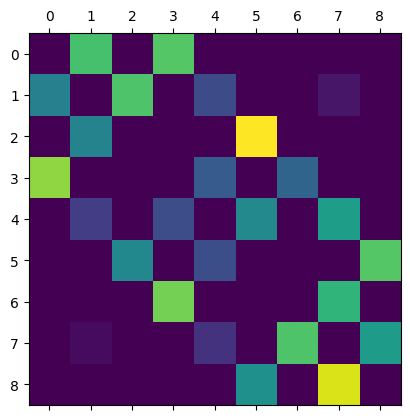

In [13]:
plt.matshow(trans_mat_mean[0])

In [36]:
data_directory

'/Taskspace_abstraction/Data/cohort6/ab03/'

In [13]:
##Importing files and calculating scores
tt=time.time()

#current_cohort=4

#nodes_cut_dic=rec_dd()
#trialtimes_state_dic=rec_dd()
#scores_dic=rec_dd()
re_run=True
tracking_oversampling_factor=50 ##oversampling of nodes_cut_dic
behaviour_oversampling_factor=3 ##oversampling of trialtimes_dic

state_ind_dic={'A':0,'B':1,'C':2,'D':3}
state_nextstate_dic={'A':'B','B':'C','C':'D','D':'A'}


A_trial_indx=['A_on','B_on']
B_trial_indx=['B_on','C_on']
C_trial_indx=['C_on','D_on']
D_trial_indx=['D_on','A_on']
All_trials_indx=np.vstack((A_trial_indx,B_trial_indx,C_trial_indx,D_trial_indx))
mouse_recdays_todo=[]
abstract_structure_type='ABCD'
for mouse in ['ah07']:
    print(mouse)
    cohort=Mice_cohort_dic[mouse[:4]]
    
    ephys_type=Cohort_ephys_type_dic[int(cohort)]

    if int(cohort) in [3,4]:
        use_interp=True
    else:
        use_interp=False

    data_directory='P:/Taskspace_abstraction/Data/cohort'+str(cohort)+'/'+mouse[:4]+'/'
    Behaviour_base=Data_folder_P+'cohort'+str(cohort)+'/'+mouse[:4]+'/Behaviour/'

    Variables=Variable_dic[mouse]
    #Structure_no=(Variables['Structure_no']).astype(int)
    structure_no_=np.copy(Variables['Structure_no'])
    structure_no_[structure_no_=='-']=-1
    Structure_no=(structure_no_).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract==abstract_structure_type]



    for structure_num in np.unique(ABCD_structure_no):
        print(structure_num)

        for structure_ses, (session, content) in enumerate(times_dic[mouse][abstract_structure_type]\
                                                           [structure_num].items()):
            
            if re_run==False:
                if len(scores_dic[mouse][structure_num]['ALL'][session])>0:
                    print('Already analysed')
                    continue
                

            session_Date=Variables['Date'][session]
            session_timestamp=Variables['Behaviour'][session]
            rec_day=session_Date[8:10]+session_Date[5:7]+session_Date[:4]
            mouse_recday=mouse+'_'+rec_day
            ses_day=Variables['Behaviour'][Variable_dic[mouse]['Date']==session_Date]
            ses_ind=np.where(ses_day==session_timestamp)[0][0]

            ROI_accuracy_all=dict_to_array(ROI_accuracy_dic['accuracy'][mouse_recday])

            #if 0==0:
                
            #if mouse_recday not in mouse_recdays_todo:
            #    continue

            ##Importing pinstate and ROI files##

            try:
                pinstatefile_path=data_directory+'/Behaviour/'+str(mouse)+'_pinstate_'+str(Variables['Date']\
                                                                                           [session])+'-'+\
                str(Variables['Tracking'][session])+'.csv'

                #file_path='me04-2020-11-12-145650.txt'
                with open(pinstatefile_path, 'r') as f:
                    print('Importing data file: '+os.path.split(pinstatefile_path)[1])
                    ttl_tracking = np.asarray([line.strip() for line in f.readlines() if line.strip()]).astype(int)
                ttl_binary=create_binary(ttl_tracking)

                #pinstate_dic[mouse][session]=ttl_binary

            except FileNotFoundError:
                print("File: "+pinstatefile_path+" Not Found")



            try:
                #ROIfile_path=data_directory+'/Behaviour/ROIs_'+str(mouse)+'_'+str(Variables['Date'][session])+'-'+\
                #str(Variables['Tracking'][session])+'.csv' ##change this!

                if use_interp==False:
                    ROIfile_path=Behaviour_base+'ROIs_'+str(mouse)+'_'+str(Variables['Date'][session])+'-'+\
                    str(Variables['Tracking'][session])+'.csv' ##change this!
                elif use_interp==True:
                    if len(ROI_accuracy_all)>ses_ind+1:
                        print('Tracking accuracy: '+str(ROI_accuracy_all[ses_ind])+'%')
                    else:
                        print('Tracking accuracy: Not calculated')

                    ROIfile_path=Behaviour_base+'rescaled_ROIs'+str(mouse)+'_'+rec_day+'_'+str(ses_ind)+'_interp.csv'

                #file_path='me04-2020-11-12-145650.txt'
                with open(ROIfile_path, 'r') as f:
                    print('Importing data file: '+os.path.split(ROIfile_path)[1])
                    data = np.genfromtxt(f, delimiter=',',dtype=str)
                #backHead = data[1:, 4]
                #betweenShoulders = data[1:, 5]
                #Majority = data[1:, 9]

                if use_interp==True:
                    body_part_name,body_part_namex='0','0' ###uses betweenShoulders

                else:
                    body_part_name='majority'#'betweenShoulders' ###choice of what point on animal to track
                    body_part_namex='Majority'
                body_part_name_used = \
                np.asarray([body_part_name,body_part_namex])[[body_part_name in data[0],\
                                                              body_part_namex in data[0]]][0]

                body_part=(data[1:,data[0]==body_part_name_used]).squeeze()



            except FileNotFoundError:
                print("File: "+ROIfile_path+" Not Found")
                continue




            ###Matching ROI and behaviour timestamps###

            structure=structure_dic[mouse]['ABCD'][structure_num][session]
            times=times_dic[mouse]['ABCD'][structure_num][session]
            #body_part=ROI_dic[mouse][session]['body_part']
            #ttl_binary=pinstate_dic[mouse][session]
            
            if len(times['A_on'])==0:
                print('Behaviour not found')
                continue



            if len(body_part)>0:
                print(len(ttl_binary)/len(body_part))
                if (len(ttl_binary)/len(body_part))==2:
                    body_part=np.repeat(body_part,2)

                elif (len(ttl_binary)/len(body_part))>1.99 and (len(ttl_binary)/len(body_part))!=2:
                    body_part=np.repeat(body_part,2)[:len(ttl_binary)]

                nodes=[np.nan if body_part[ii][:4]!='node' else int(body_part[ii][-1])\
                       for ii in range(len(body_part))]
                edges=[np.nan if body_part[ii][:4]!='edge' else [int(body_part[ii][-3]),int(body_part[ii][-1])]\
                       for ii in range(len(body_part)) ]
                
                times_oversampled=rec_dd()
                for index,item in times.items():
                    times_oversampled[index]=item*behaviour_oversampling_factor

                if 'A_on_first' in times_oversampled.keys():
                    times_oversampled['A_on']=np.hstack((times_oversampled['A_on_first'],\
                                                         times_oversampled['A_on']))

                ##Aligning behaviour and tracking
                if use_interp==False:


                    if ephys_type!='Neuropixels':
                        diff_behTrack=len(times['rsync'])-len(np.where(unique_adjacent(ttl_binary)==1)[0])
                        if diff_behTrack<0:
                            print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+\
                                  ' '+session_Date+'-'+str(session_timestamp)+\
                                  ': more rsync pulses in pinstate than in behaviour files - SESSION NOT USED')
                            print(diff_behTrack)
                            continue
                        num_sync_missed=times_oversampled['rsync'][diff_behTrack]
                    else:
                        diff_behTrack=0
                        num_sync_missed=0
                    
                    if len(np.where(ttl_binary==1)[0])==0:
                        print('No sync pulses detected by camera!')
                        continue
                    ttl_first=np.where(ttl_binary==1)[0][diff_behTrack]
                    nodes_cut=nodes[ttl_first:]
                    nodes_cut_oversampledx=np.repeat(nodes_cut,tracking_oversampling_factor)
                    nodes_cut_oversampled=np.hstack((np.repeat(np.nan,num_sync_missed),nodes_cut_oversampledx))               

                    ##checks
                    if diff_behTrack>0:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+\
                              ' '+session_Date+'-'+str(session_timestamp)+\
                              ': less rsync pulses in pinstate than in behaviour files')
                        print('Realigned ROI timestamps')


                    if len(ttl_binary)-len(body_part)!=0:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)\
                              +' '+session_Date+'-'+str(session_timestamp)+\
                              ': mismatch between length of pinstate file and ROI file')
                        if len(ttl_binary)-len(body_part)==1:
                            ttl_binary=ttl_binary[:-1]
                            print('But only one off so cut end of ttl_binary')
                        else:
                            continue

                    tracking_length_mins=(len(ttl_binary))/(60*60)
                    behaviour_length_mins=times['rsync'][-1]/(1000*60)
                    metaData_length_mins=int(Variable_dic[mouse]['Session_time'][session])

                    if np.abs(tracking_length_mins-metaData_length_mins)>10 or np.abs\
                    (behaviour_length_mins-metaData_length_mins)>10:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+\
                              session_Date+'-'+str(session_timestamp)+\
                              ': session length does not match metaData file')
                        #continue
                        print('Error Ignored')

                    numdigits_times_oversampled=len(str(times_oversampled['rsync'][-1]))
                    numdigits_nodes_cut_oversampled=len(str(len(nodes_cut_oversampled)))

                    if (numdigits_nodes_cut_oversampled-numdigits_times_oversampled)>1:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date\
                              +'-'+str(session_timestamp)+\
                              ': Oversampling causes mismatch between tracking and behaviour')
                        continue

                else:
                    nodes_cut=nodes
                    nodes_cut_oversampledx=np.repeat(nodes_cut,50)
                    nodes_cut_oversampled=nodes_cut_oversampledx 




                print(mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date\
                          +'-'+str(session_timestamp)+\
                          ': Passed all checks')
                ##ADD EXTRA CHECK THAT SYNC PULSES AND TTL PULSES RECEIVED BY CAMERA ARE AN EXACT MATCH

                #times_oversampled_dic[mouse][structure_num][session]=times_oversampled
                nodes_cut_dic[mouse][structure_num][session]=nodes_cut



                ## Scoring ##
                All_scores=[]
                All_scoresx=[]
                All_entropies=np.zeros(4)
                All_entropies[:]=np.nan
                for indx, state in enumerate(states):

                    ##Trail times per state
                    X=state
                    Y=state_nextstate_dic[X]

                    current_port=structure[indx]
                    next_port=np.roll(structure,-1)[indx]
                    if len(times_oversampled[All_trials_indx[indx,0]])>0:
                        if state != 'D':
                            if len(times_oversampled[All_trials_indx[indx,0]])==\
                            len(times_oversampled[All_trials_indx[indx,1]]):
                                trialtimes_=\
                                np.column_stack((times_oversampled[All_trials_indx[indx,0]],\
                                                 times_oversampled[All_trials_indx[indx,1]]))
                            else:

                                trialtimes_=\
                                np.column_stack((times_oversampled[All_trials_indx[indx,0]][:-1],\
                                                 times_oversampled[All_trials_indx[indx,1]]))
                        else:
                            trialtimes_=\
                            np.column_stack((times_oversampled['D_on'][:len(times_oversampled['A_on'])-1],\
                                             times_oversampled['A_on'][1:len(times_oversampled['A_on'])]))

                        if len(trialtimes_)>1:
                            print(session)
                            trialtimes_state_dic[mouse][structure_num][session][state]=trialtimes_


                            ###scoring
                            state_timesx=indicesX2(trialtimes_,0)
                            state_times =[(state_timesx[ii]).astype(int) for ii in range(len(state_timesx))]

                            if len(state_times)>0: 
                                if state_times[-1][-1]>len(nodes_cut_oversampled):
                                    print(mouse+' structure'+str(structure_num)+' session'+str(session)+\
                                          ' '+session_Date+'-'+str(session_timestamp)+\
                                          ' Behaviour longer than tracking')
                                    state_times =[(state_timesx[ii]).astype(int)\
                                                  for ii in range(len(state_timesx))\
                                                 if state_timesx[ii][-1]<len(nodes_cut_oversampled)]

                            portX=structure[state_ind_dic[X]]
                            portY=structure[state_ind_dic[Y]]
                            ###remove first instances of start node from node_times_trial


                            if len(nodes_cut_oversampled)>0 and len(state_times)>0 and \
                            np.isnan(np.nanmean(nodes_cut_oversampled))==False:

                                all_trials=np.asarray([(remove_nan(nodes_cut_oversampled[state_times[ii]]))\
                                                       .astype(int) for ii in range(len(state_times))])
                                
                                #all_trials=remove_empty(all_trials)

                                dists=np.asarray([len(unique_adjacent(trial[trial>=0])[1:]) for trial in all_trials])

                                ###removing tracking errors

                                error_mask_first=np.asarray([unique_adjacent(trial[trial>=0])[0]!=current_port\
                                                             if len(trial)>0 else False for trial in all_trials])
                                error_mask_next=np.asarray([unique_adjacent(trial[trial>=0])[-1]!=next_port\
                                                       if len(trial)>0 else False for trial in all_trials])

                                error_mask=np.logical_or(error_mask_first,error_mask_next)

                                dists=dists.astype(float)
                                dists[error_mask]=np.nan

                                mindist=mindistance_mat[portX-1,portY-1]
                                correct_boolean=dists==mindist
                                scores=dists==mindist

                                scores=(scores.astype(int)).astype(float)
                                scores[error_mask]=np.nan

                                exec(X+'_scores=scores')
                                exec(X+'_dists=dists')
                                exec(X+'_mindist=mindist')

                                ###path entropy
                                num_shortest_paths=numshortest_path_mat[int(portX-1),int(portY-1)]

                                if num_shortest_paths>1:
                                    paths=np.asarray([unique_adjacent(trial[trial>=0])[1:] for trial in all_trials])

                                    paths_correctx=paths[correct_boolean]
                                    if len(paths_correctx)>0:
                                        paths_correct=np.vstack(paths_correctx).tolist()
                                        num_times_pathx=number_of_repeats_ALL(paths_correct)
                                        num_times_path=np.hstack((np.repeat(0,\
                                                                            int(num_shortest_paths-len(num_times_pathx)))\
                                                                  ,num_times_pathx))
                                        prob_path=num_times_path/np.sum(num_times_path)
                                        transition_entropy=st.entropy(prob_path,base=num_shortest_paths)
                                else:
                                    transition_entropy=np.nan


                                All_scores.append(scores)
                                scores_dic[mouse][structure_num][X][session]=\
                                len(np.where(scores==True)[0])/len(scores)

                                scores_dic['entropy'][mouse][structure_num][X][session]=transition_entropy
                                All_entropies[indx]=transition_entropy

                                ##scoring non-task transitions (e.g. CA,BA,DB,DC...etc)
                                trial_nodes=[unique_adjacent(trial[trial>=0])[1:] for trial in all_trials]
                                for state_, indx_ in state_ind_dic.items():
                                    port_state=structure[indx_]
                                    distancesX_state=[np.where(trial_nodes[ii]==port_state)[0]+1 \
                                                      for ii in range(len(trial_nodes))]
                                    mindistX_state=mindistance_mat[portX-1,port_state-1]
                                    X_state_score=(np.asarray([mindistX_state in distancesX_state[ii] \
                                                                       for ii in range(len(trial_nodes))])).\
                                    astype(float)
                                    X_state_score[error_mask]=np.nan
                                    exec('X'+str(state_)+'_score=X_state_score')

                                    X_state_dists=(np.asarray([distancesX_state[ii][0] if len(distancesX_state[ii])>0\
                                                              else np.nan for ii in range(len(distancesX_state))]))\
                                    .astype(float)
                                    X_state_dists[error_mask]=np.nan
                                    exec('X'+str(state_)+'_dists=X_state_dists')

                                    exec('X_state_mindist=X'+str(state_)+'_mindist=mindistX_state')


                            else:
                                All_scores=[]
                                for state_, indx_ in state_ind_dic.items():
                                    exec('X'+str(state_)+'_score=[]')
                                    exec('X'+str(state_)+'_dists=[]')
                                    exec('X'+str(state_)+'_mindist=[]')

                                exec(X+'_scores=[]')
                                exec(X+'_dists=[]')
                                exec(X+'_mindist=np.nan')

                            for state_, indx_ in state_ind_dic.items():
                                exec('scores_dic[mouse][structure_num][X+state_][session]=X'+str(state_)+'_score')
                                exec('scores_dic["dists"][mouse][structure_num][X+state_][session]=X'+str(state_)+\
                                     '_dists')
                                exec('scores_dic["mindist"][mouse][structure_num][X+state_][session]=X'+str(state_)+\
                                     '_mindist')
                        else:
                            trialtimes_state_dic[mouse][structure_num][session][state]=[]
                            print('Not enough trials')
                            continue
                scores_dic['entropy'][mouse][structure_num]['ALL'][session]=All_entropies

                if len(trialtimes_)>1:
                    if len(All_scores)>0 and len(A_scores)>=len(D_scores):        
                        All_scores=np.concatenate(All_scores)
                        Overall_score=len(np.where(All_scores==True)[0])/len(All_scores)

                        stacked_scores=np.column_stack((A_scores[:len(D_scores)],B_scores[:len(D_scores)],\
                                                        C_scores[:len(D_scores)],D_scores))

                        stacked_dists=np.column_stack((A_dists[:len(D_dists)],B_dists[:len(D_dists)],\
                                                        C_dists[:len(D_dists)],D_dists))

                        all_mindist=np.asarray([A_mindist,B_mindist,C_mindist,D_mindist])

                else:
                    Overall_score=np.nan
                    num_trials=Num_trials_dic[mouse][structure_num][structure_ses]#[session]
                    stacked_scores=stacked_dists=np.asarray([[np.nan for x in range(len(All_trials_indx))]\
                                               for y in range(int(num_trials))])
                    all_mindist=[]


                scores_dic[mouse][structure_num]['Mean'][session]=Overall_score 
                scores_dic[mouse][structure_num]['ALL'][session]=stacked_scores
                scores_dic['dists'][mouse][structure_num]['ALL'][session]=stacked_dists
                scores_dic['mindist'][mouse][structure_num]['ALL'][session]=all_mindist


            else:
                print(mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date+'-'+\
                      str(session_timestamp)+' ROI file not found')

        #else:
        #    print(mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date+'-'+\
        #              str(session_timestamp)+' Already Analyzed!')
print(time.time()-tt)

ah07
1
Importing data file: ah07_pinstate_2023-06-13-153930.csv
Importing data file: ROIs_ah07_2023-06-13-153930.csv
1.0
ah07 structure1 session5 2023-06-13-154017: Passed all checks
5


C:\Users\moham\AppData\Local\Temp\ipykernel_12740\1347984989.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.asarray(indicesx)
C:\Users\moham\AppData\Local\Temp\ipykernel_12740\3232816886.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_trials=np.asarray([(remove_nan(nodes_cut_oversampled[state_times[ii]]))\
C:\Users\moham\AppData\Local\Temp\ipykernel_12740\3232816886.py:345: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

5
5
5
Importing data file: ah07_pinstate_2023-06-13-164738.csv
Importing data file: ROIs_ah07_2023-06-13-164738.csv
Behaviour not found
Importing data file: ah07_pinstate_2023-06-13-175718.csv
Importing data file: ROIs_ah07_2023-06-13-175718.csv
1.0
ah07 structure1 session7 2023-06-13-175758: Passed all checks
7
7
7
7
Importing data file: ah07_pinstate_2023-06-13-190213.csv
Importing data file: ROIs_ah07_2023-06-13-190213.csv
1.0
ah07 structure1 session8 2023-06-13-190410: Passed all checks
8
8
8
8
Importing data file: ah07_pinstate_2023-06-14-142732.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-06-14-142732.csv Not Found
Importing data file: ah07_pinstate_2023-06-14-160355.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-06-14-160355.csv Not Found
Importing data file: ah07_pinstate_2023-06-14-170931.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-06-14-170931.csv Not Found
Importing data file: a

File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-06-28-145626.csv Not Found
Importing data file: ah07_pinstate_2023-06-30-142915.csv
Importing data file: ROIs_ah07_2023-06-30-142915.csv
1.0
ah07 structure2 session59 2023-06-30-142947: Passed all checks
59
59
59
59
Importing data file: ah07_pinstate_2023-06-30-152208.csv
Importing data file: ROIs_ah07_2023-06-30-152208.csv
1.0
ah07 structure2 session60 2023-06-30-152235: Passed all checks
60
60
60
60
3
Importing data file: ah07_pinstate_2023-06-30-162202.csv
Importing data file: ROIs_ah07_2023-06-30-162202.csv
1.0
ah07 structure3 session61 2023-06-30-162221: Passed all checks
61
61
61
61
Importing data file: ah07_pinstate_2023-06-30-171420.csv
Importing data file: ROIs_ah07_2023-06-30-171420.csv
Behaviour not found
Importing data file: ah07_pinstate_2023-07-01-153131.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-07-01-153131.csv Not Found
Importing data file: ah07_pinstate_2023-07

File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-07-16-190539.csv Not Found
Importing data file: ah07_pinstate_2023-07-16-200110.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-07-16-200110.csv Not Found
Importing data file: ah07_pinstate_2023-07-17-153152.csv
Importing data file: ROIs_ah07_2023-07-17-153152.csv
1.0
ah07 structure4 session111 2023-07-17-153204: Passed all checks
111
111
111
111
Importing data file: ah07_pinstate_2023-07-17-163037.csv
Importing data file: ROIs_ah07_2023-07-17-163037.csv
1.0
ah07 structure4 session112 2023-07-17-163054: Passed all checks
112
112
112
112
5
Importing data file: ah07_pinstate_2023-07-17-174746.csv
Importing data file: ROIs_ah07_2023-07-17-174746.csv
1.0
ah07 structure5 session113 2023-07-17-174814: Passed all checks
Not enough trials
Not enough trials
Not enough trials
Importing data file: ah07_pinstate_2023-07-17-185015.csv
Importing data file: ROIs_ah07_2023-07-17-185015.csv
1.0
ah07 

File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-08-02-142613.csv Not Found
Importing data file: ah07_pinstate_2023-08-02-155921.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-08-02-155921.csv Not Found
Importing data file: ah07_pinstate_2023-08-02-165954.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-08-02-165954.csv Not Found
Importing data file: ah07_pinstate_2023-08-02-180957.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-08-02-180957.csv Not Found
Importing data file: ah07_pinstate_2023-08-03-160545.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-08-03-160545.csv Not Found
Importing data file: ah07_pinstate_2023-08-03-171511.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-08-03-171511.csv Not Found
Importing data file: ah07_pinstate_2023-08-03-181932.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Beh

1.0
ah07 structure9 session205 2023-08-18-160807: Passed all checks
205
205
205
205
Importing data file: ah07_pinstate_2023-08-18-164818.csv
Importing data file: ROIs_ah07_2023-08-18-164818.csv
Behaviour not found
10
Importing data file: ah07_pinstate_2023-08-18-173345.csv
Importing data file: ROIs_ah07_2023-08-18-173345.csv
1.0
ah07 structure10 session207 2023-08-18-173420: Passed all checks
207
207
207
207
Importing data file: ah07_pinstate_2023-08-18-181841.csv
Importing data file: ROIs_ah07_2023-08-18-181841.csv
1.0
ah07 structure10 session208 2023-08-18-181909: Passed all checks
208
208
Not enough trials
Not enough trials
File: P:/Taskspace_abstraction/Data/cohort6/ah07//Behaviour/ah07_pinstate_2023-08-19-165715.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-08-19-165715.csv Not Found
Importing data file: ah07_pinstate_2023-08-22-151009.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-08-22-151009.csv Not Found


File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-06-160853.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07//Behaviour/ah07_pinstate_2023-10-08-125521.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-08-125521.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07//Behaviour/ah07_pinstate_2023-10-09-151629.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-09-151629.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07//Behaviour/ah07_pinstate_2023-10-09-162400.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-09-162400.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07//Behaviour/ah07_pinstate_2023-10-09-172557.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-09-172557.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07//Behaviour/ah07_pinsta

File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-25-181313.csv Not Found
64
Importing data file: ah07_pinstate_2023-10-26-133746.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-26-133746.csv Not Found
65
Importing data file: ah07_pinstate_2023-10-26-143409.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-26-143409.csv Not Found
66
Importing data file: ah07_pinstate_2023-10-26-181142.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-26-181142.csv Not Found
67
Importing data file: ah07_pinstate_2023-10-26-190848.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-26-190848.csv Not Found
68
Importing data file: ah07_pinstate_2023-10-27-123816.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-10-27-123816.csv Not Found
69
Importing data file: ah07_pinstate_2023-10-27-145332.csv
File: P:/Taskspace_abstraction/Dat

File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-11-13-151617.csv Not Found
115
Importing data file: ah07_pinstate_2023-11-13-160920.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-11-13-160920.csv Not Found
116
Importing data file: ah07_pinstate_2023-11-14-132218.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-11-14-132218.csv Not Found
117
Importing data file: ah07_pinstate_2023-11-14-154321.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-11-14-154321.csv Not Found
118
Importing data file: ah07_pinstate_2023-11-14-180115.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-11-14-180115.csv Not Found
119
Importing data file: ah07_pinstate_2023-11-14-185400.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-11-14-185400.csv Not Found
120
Importing data file: ah07_pinstate_2023-11-15-133852.csv
File: P:/Taskspace_abstracti

ValueError: invalid literal for int() with base 10: '-'

In [163]:
#Nodes_trials_dic=rec_dd()

tracking_oversampling_factor=50 ##oversampling of nodes_cut_dic
behaviour_oversampling_factor=3 ##oversampling of trialtimes_dic

state_ind_dic={'A':0,'B':1,'C':2,'D':3}
state_nextstate_dic={'A':'B','B':'C','C':'D','D':'A'}


A_trial_indx=['A_on','B_on']
B_trial_indx=['B_on','C_on']
C_trial_indx=['C_on','D_on']
D_trial_indx=['D_on','A_on']
All_trials_indx=np.vstack((A_trial_indx,B_trial_indx,C_trial_indx,D_trial_indx))
re_run=True
abstract_structure_type='ABCD'
#mouse_recdays_todo=['me03_14122020']
for mouse in ['ab03','ah07']:
    print(mouse)
    cohort=Mice_cohort_dic[mouse[:4]]
    
    ephys_type=Cohort_ephys_type_dic[int(cohort)]
     

    if int(cohort) in [3,4]:
        use_interp=True
    else:
        use_interp=False

    data_directory='P:/Taskspace_abstraction/Data/cohort'+str(cohort)+'/'+mouse[:4]+'/'
    Behaviour_base=Data_folder_P+'cohort'+str(cohort)+'/'+mouse[:4]+'/Behaviour/'

    Variables=Variable_dic[mouse]
    structure_no_=np.copy(Variables['Structure_no'])
    structure_no_[structure_no_=='-']=-1
    Structure_no=(structure_no_).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract==abstract_structure_type]



    for structure_num in np.unique(ABCD_structure_no):
        if structure_num>40:
            continue
        print(structure_num)
        
        num_trials_=Num_trials_dic[mouse][structure_num]
        num_trials_reached=0
        for structure_ses, (session, content) in enumerate(times_dic[mouse][abstract_structure_type]\
                                                           [structure_num].items()):
            
            
            if num_trials_reached>30:
                continue
            num_trials_reached+=num_trials_[structure_ses]
            
            session_Date=Variables['Date'][session]
            session_timestamp=Variables['Behaviour'][session]
            rec_day=session_Date[8:10]+session_Date[5:7]+session_Date[:4]
            mouse_recday=mouse+'_'+rec_day
            ses_day=Variables['Behaviour'][Variable_dic[mouse]['Date']==session_Date]
            ses_ind=np.where(ses_day==session_timestamp)[0][0]

            ROI_accuracy_all=dict_to_array(ROI_accuracy_dic['accuracy'][mouse_recday])

            #if mouse_recday not in mouse_recdays_todo:
            #    continue


            ##Importing pinstate and ROI files##

            try:
                pinstatefile_path=data_directory+'/Behaviour/'+str(mouse)+'_pinstate_'+str(Variables['Date']\
                                                                                           [session])+'-'+\
                str(Variables['Tracking'][session])+'.csv'

                #file_path='me04-2020-11-12-145650.txt'
                with open(pinstatefile_path, 'r') as f:
                    print('Importing data file: '+os.path.split(pinstatefile_path)[1])
                    ttl_tracking = np.asarray([line.strip() for line in f.readlines() if line.strip()]).astype(int)
                ttl_binary=create_binary(ttl_tracking)

                #pinstate_dic[mouse][session]=ttl_binary

            except FileNotFoundError:
                print("File: "+pinstatefile_path+" Not Found")



            try:
                #ROIfile_path=data_directory+'/Behaviour/ROIs_'+str(mouse)+'_'+str(Variables['Date'][session])+'-'+\
                #str(Variables['Tracking'][session])+'.csv' ##change this!

                if use_interp==False:
                    ROIfile_path=Behaviour_base+'ROIs_'+str(mouse)+'_'+str(Variables['Date'][session])+'-'+\
                    str(Variables['Tracking'][session])+'.csv' ##change this!
                elif use_interp==True:
                    if len(ROI_accuracy_all)>ses_ind+1:
                        print('Tracking accuracy: '+str(ROI_accuracy_all[ses_ind])+'%')
                    else:
                        print('Tracking accuracy: Not calculated')

                    ROIfile_path=Behaviour_base+'rescaled_ROIs'+str(mouse)+'_'+rec_day+'_'+str(ses_ind)+'_interp.csv'

                #file_path='me04-2020-11-12-145650.txt'
                with open(ROIfile_path, 'r') as f:
                    print('Importing data file: '+os.path.split(ROIfile_path)[1])
                    data = np.genfromtxt(f, delimiter=',',dtype=str)
                #backHead = data[1:, 4]
                #betweenShoulders = data[1:, 5]
                #Majority = data[1:, 9]
                
                if len(np.shape(data))==0:
                    continue

                if use_interp==True:
                    body_part_name,body_part_namex='0','0' ###uses betweenShoulders

                else:
                    body_part_name='majority'#'betweenShoulders' ###choice of what point on animal to track
                    body_part_namex='Majority'
                body_part_name_used = \
                np.asarray([body_part_name,body_part_namex])[[body_part_name in data[0],\
                                                              body_part_namex in data[0]]][0]

                body_part=(data[1:,data[0]==body_part_name_used]).squeeze()



            except FileNotFoundError:
                print("File: "+ROIfile_path+" Not Found")
                continue




            ###Matching ROI and behaviour timestamps###

            structure=structure_dic[mouse]['ABCD'][structure_num][session]
            times=times_dic[mouse]['ABCD'][structure_num][session]
            #body_part=ROI_dic[mouse][session]['body_part']
            #ttl_binary=pinstate_dic[mouse][session]
            
            if len(times['A_on'])==0:
                print('No Behaviour')
                continue



            if len(body_part)>0:
                print(len(ttl_binary)/len(body_part))
                if (len(ttl_binary)/len(body_part))==2:
                    body_part=np.repeat(body_part,2)

                elif (len(ttl_binary)/len(body_part))>1.99 and (len(ttl_binary)/len(body_part))!=2:
                    body_part=np.repeat(body_part,2)[:len(ttl_binary)]

                nodes=[np.nan if body_part[ii][:4]!='node' else int(body_part[ii][-1])\
                       for ii in range(len(body_part))]
                edges=[np.nan if body_part[ii][:4]!='edge' else [int(body_part[ii][-3]),int(body_part[ii][-1])]\
                       for ii in range(len(body_part)) ]

                times_oversampled=rec_dd()
                for index,item in times.items():
                    times_oversampled[index]=item*behaviour_oversampling_factor

                if 'A_on_first' in times_oversampled.keys():
                    times_oversampled['A_on']=np.hstack((times_oversampled['A_on_first'],\
                                                         times_oversampled['A_on']))

                ##Aligning behaviour and tracking
                if use_interp==False:


                    #diff_behTrack=len(times['rsync'])-len(np.where(unique_adjacent(ttl_binary)==1)[0])
                    #if diff_behTrack<0:
                    #    print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+\
                    #          ' '+session_Date+'-'+str(session_timestamp)+\
                    #          ': more rsync pulses in pinstate than in behaviour files - SESSION NOT USED')
                    #    continue
                        
                    
                    if ephys_type!='Neuropixels':
                        diff_behTrack=len(times['rsync'])-len(np.where(unique_adjacent(ttl_binary)==1)[0])
                        if diff_behTrack<0:
                            print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+\
                                  ' '+session_Date+'-'+str(session_timestamp)+\
                                  ': more rsync pulses in pinstate than in behaviour files - SESSION NOT USED')
                            print(diff_behTrack)
                            continue
                        num_sync_missed=times_oversampled['rsync'][diff_behTrack]
                    else:
                        diff_behTrack=0
                        num_sync_missed=0
                    
                    num_sync_missed=times_oversampled['rsync'][diff_behTrack]

                    ttl_first=np.where(ttl_binary==1)[0][diff_behTrack]
                    nodes_cut=nodes[ttl_first:]
                    nodes_cut_oversampledx=np.repeat(nodes_cut,tracking_oversampling_factor)
                    nodes_cut_oversampled=np.hstack((np.repeat(np.nan,num_sync_missed),nodes_cut_oversampledx))               

                    ##checks
                    if diff_behTrack>0:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+\
                              ' '+session_Date+'-'+str(session_timestamp)+\
                              ': less rsync pulses in pinstate than in behaviour files')
                        print('Realigned ROI timestamps')
                        
                    


                    if len(ttl_binary)-len(body_part)!=0:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)\
                              +' '+session_Date+'-'+str(session_timestamp)+\
                              ': mismatch between length of pinstate file and ROI file')
                        if len(ttl_binary)-len(body_part)==1:
                            ttl_binary=ttl_binary[:-1]
                            print('But only one off so cut end of ttl_binary')
                        else:
                            continue
                            
                            
                    

                    tracking_length_mins=(len(ttl_binary))/(60*60)
                    behaviour_length_mins=times['rsync'][-1]/(1000*60)
                    metaData_length_mins=int(Variable_dic[mouse]['Session_time'][session])

                    if np.abs(tracking_length_mins-metaData_length_mins)>10 or np.abs\
                    (behaviour_length_mins-metaData_length_mins)>10:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+\
                              session_Date+'-'+str(session_timestamp)+\
                              ': session length does not match metaData file')
                        #continue
                        print('Error Ignored')

                    numdigits_times_oversampled=len(str(times_oversampled['rsync'][-1]))
                    numdigits_nodes_cut_oversampled=len(str(len(nodes_cut_oversampled)))

                    if (numdigits_nodes_cut_oversampled-numdigits_times_oversampled)>1:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date\
                              +'-'+str(session_timestamp)+\
                              ': Oversampling causes mismatch between tracking and behaviour')
                        continue

                else:
                    nodes_cut=nodes
                    nodes_cut_oversampledx=np.repeat(nodes_cut,50)
                    nodes_cut_oversampled=nodes_cut_oversampledx 




                print(mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date\
                          +'-'+str(session_timestamp)+\
                          ': Passed all checks')
                ##ADD EXTRA CHECK THAT SYNC PULSES AND TTL PULSES RECEIVED BY CAMERA ARE AN EXACT MATCH

                #times_oversampled_dic[mouse][structure_num][session]=times_oversampled
                nodes_cut_dic[mouse][structure_num][session]=nodes_cut



                ## Scoring ##
                All_trials_allstates=[]
                error_mask_all=[]
                for indx, state in enumerate(states):

                    ##Trail times per state
                    X=state
                    Y=state_nextstate_dic[X]

                    current_port=structure[indx]
                    next_port=np.roll(structure,-1)[indx]
                    if len(times_oversampled[All_trials_indx[indx,0]])>0:
                        if state != 'D':
                            if len(times_oversampled[All_trials_indx[indx,0]])==\
                            len(times_oversampled[All_trials_indx[indx,1]]):
                                trialtimes_=\
                                np.column_stack((times_oversampled[All_trials_indx[indx,0]],\
                                                 times_oversampled[All_trials_indx[indx,1]]))
                            else:

                                trialtimes_=\
                                np.column_stack((times_oversampled[All_trials_indx[indx,0]][:-1],\
                                                 times_oversampled[All_trials_indx[indx,1]]))
                        else:
                            trialtimes_=\
                            np.column_stack((times_oversampled['D_on'][:len(times_oversampled['A_on'])-1],\
                                             times_oversampled['A_on'][1:len(times_oversampled['A_on'])]))

                        if len(trialtimes_)>1:
                            print(session)
                            trialtimes_state_dic[mouse][structure_num][session][state]=trialtimes_


                            ###scoring
                            state_timesx=indicesX2(trialtimes_,0)
                            state_times =[(state_timesx[ii]).astype(int) for ii in range(len(state_timesx))]

                            if len(state_times)>0: 
                                if state_times[-1][-1]>len(nodes_cut_oversampled):
                                    print(mouse+' structure'+str(structure_num)+' session'+str(session)+\
                                          ' '+session_Date+'-'+str(session_timestamp)+\
                                          ' Behaviour longer than tracking')
                                    state_times =[(state_timesx[ii]).astype(int)\
                                                  for ii in range(len(state_timesx))\
                                                 if state_timesx[ii][-1]<len(nodes_cut_oversampled)]

                            portX=structure[state_ind_dic[X]]
                            portY=structure[state_ind_dic[Y]]
                            ###remove first instances of start node from node_times_trial


                            if len(nodes_cut_oversampled)>0 and len(state_times)>0 and \
                            np.isnan(np.nanmean(nodes_cut_oversampled))==False:

                                all_trials=np.asarray([(remove_nan(nodes_cut_oversampled[state_times[ii]]))\
                                                       .astype(int) for ii in range(len(state_times))])
                                
                                #all_trials=remove_empty(all_trials)


                                ###removing tracking errors
                                #error_mask_first=np.asarray([unique_adjacent(trial[trial>=0])[0]!=current_port\
                                #                       for trial in all_trials])
                                #error_mask_next=np.asarray([unique_adjacent(trial[trial>=0])[-1]!=next_port\
                                #                       for trial in all_trials])
                                
                                error_mask_first=np.asarray([unique_adjacent(trial[trial>=0])[0]!=current_port\
                                                             if len(trial)>0 else False for trial in all_trials])
                                error_mask_next=np.asarray([unique_adjacent(trial[trial>=0])[-1]!=next_port\
                                                       if len(trial)>0 else False for trial in all_trials])
                                error_mask=np.logical_or(error_mask_first,error_mask_next)

                                #all_trials=all_trials[~error_mask]

                                all_trials_unique_nodes=np.asarray([unique_adjacent(trial[trial>=0])[:-1]\
                                                                    for trial in all_trials])

                                All_trials_allstates.append(all_trials_unique_nodes)
                                error_mask_all.append(error_mask)
                Nodes_trials_dic[mouse]['Nodes'][structure_num][structure_ses]=All_trials_allstates
                Nodes_trials_dic[mouse]['Tracking_errors'][structure_num][structure_ses]=error_mask_all

ab03
1
Importing data file: ab03_pinstate_2023-06-13-145155.csv
Importing data file: ROIs_ab03_2023-06-13-145155.csv
1.0
ab03 structure1 session5 2023-06-13-145233: Passed all checks
5


C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1347984989.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indices=np.asarray(indicesx)
C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1050299481.py:319: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_trials=np.asarray([(remove_nan(nodes_cut_oversampled[state_times[ii]]))\
C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1050299481.py:339: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

5
5
5
Importing data file: ab03_pinstate_2023-06-13-161049.csv
Importing data file: ROIs_ab03_2023-06-13-161049.csv
1.0
ab03 structure1 session6 2023-06-13-161228: Passed all checks
6
6
6
6
Importing data file: ab03_pinstate_2023-06-13-172456.csv
Importing data file: ROIs_ab03_2023-06-13-172456.csv
1.0
ab03 structure1 session7 2023-06-13-172542: Passed all checks
7
7
7
7
Importing data file: ab03_pinstate_2023-06-13-182924.csv
Importing data file: ROIs_ab03_2023-06-13-182924.csv
1.0
ab03 structure1 session8 2023-06-13-183105: Passed all checks
8
8
8
8
Importing data file: ab03_pinstate_2023-06-14-135120.csv
Importing data file: ROIs_ab03_2023-06-14-135120.csv
1.0
ab03 structure1 session9 2023-06-14-135226: Passed all checks
9
9
9
9
Importing data file: ab03_pinstate_2023-06-14-150134.csv
Importing data file: ROIs_ab03_2023-06-14-150134.csv
1.0
ab03 structure1 session10 2023-06-14-150252: Passed all checks
10
10
10
10
2
Importing data file: ab03_pinstate_2023-06-22-163240.csv
Importing 

Importing data file: ROIs_ab03_2023-08-29-182005.csv
1.0
ab03 structure20 session227 2023-08-29-182042: Passed all checks
227
227
227
227
21
Importing data file: ab03_pinstate_2023-08-29-160016.csv
Importing data file: ROIs_ab03_2023-08-29-160016.csv
1.0
ab03 structure21 session225 2023-08-29-160054: Passed all checks
225
225
225
225
22
Importing data file: ab03_pinstate_2023-08-29-171918.csv
Importing data file: ROIs_ab03_2023-08-29-171918.csv
1.0
ab03 structure22 session226 2023-08-29-172000: Passed all checks
226
226
226
226
23
Importing data file: ab03_pinstate_2023-08-30-141844.csv
Importing data file: ROIs_ab03_2023-08-30-141844.csv
1.0
ab03 structure23 session228 2023-08-30-141914: Passed all checks
228
228
228
228
Importing data file: ab03_pinstate_2023-08-30-143145.csv
Importing data file: ROIs_ab03_2023-08-30-143145.csv
1.0
ab03 structure23 session229 2023-08-30-143213: Passed all checks
229
229
229
229
Importing data file: ab03_pinstate_2023-08-30-180332.csv
Importing data f

File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-06-23-181925.csv Not Found
Importing data file: ah07_pinstate_2023-06-24-151354.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-06-24-151354.csv Not Found
Importing data file: ah07_pinstate_2023-06-24-151354.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-06-24-151354.csv Not Found
Importing data file: ah07_pinstate_2023-06-24-160000.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-06-24-160000.csv Not Found
Importing data file: ah07_pinstate_2023-06-26-145306.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-06-26-145306.csv Not Found
Importing data file: ah07_pinstate_2023-06-26-162147.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-06-26-162147.csv Not Found
Importing data file: ah07_pinstate_2023-06-26-174643.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Beh

1.0
ah07 structure10 session207 2023-08-18-173420: Passed all checks
207
207
207
207
Importing data file: ah07_pinstate_2023-08-18-181841.csv
Importing data file: ROIs_ah07_2023-08-18-181841.csv
1.0
ah07 structure10 session208 2023-08-18-181909: Passed all checks
208
208
File: P:/Taskspace_abstraction/Data/cohort6/ah07//Behaviour/ah07_pinstate_2023-08-19-165715.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-08-19-165715.csv Not Found
Importing data file: ah07_pinstate_2023-08-22-151009.csv
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-08-22-151009.csv Not Found
11
Importing data file: ah07_pinstate_2023-08-23-154058.csv
Importing data file: ROIs_ah07_2023-08-23-154058.csv
1.0
ah07 structure11 session213 2023-08-23-154128: Passed all checks
213
213
213
213
Importing data file: ah07_pinstate_2023-08-23-185141.csv
Importing data file: ROIs_ah07_2023-08-23-185141.csv
No Behaviour
12
Importing data file: ah07_pinstate_2023

Importing data file: ROIs_ah07_2023-09-02-134152.csv
1.0
ah07 structure38 session246 2023-09-02-134341: Passed all checks
246
246
246
246
39
Importing data file: ah07_pinstate_2023-09-02-151335.csv
Importing data file: ROIs_ah07_2023-09-02-151335.csv
1.0
ah07 structure39 session247 2023-09-02-151421: Passed all checks
247
247
247
247
File: P:/Taskspace_abstraction/Data/cohort6/ah07//Behaviour/ah07_pinstate_2023-09-22-120230.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-09-22-120230.csv Not Found
40
Importing data file: ah07_pinstate_2023-09-02-161046.csv
Importing data file: ROIs_ah07_2023-09-02-161046.csv
1.0
ah07 structure40 session248 2023-09-02-161111: Passed all checks
248
248
248
248
File: P:/Taskspace_abstraction/Data/cohort6/ah07//Behaviour/ah07_pinstate_2023-09-21-122107.csv Not Found
File: P:/Taskspace_abstraction/Data/cohort6/ah07/Behaviour/ROIs_ah07_2023-09-21-122107.csv Not Found


In [164]:
for mouse in Mice:
    print(mouse)
    cohort=Mice_cohort_dic[mouse[:4]]
    Variables=Variable_dic[mouse]
    #Structure_no=(Variables['Structure_no']).astype(int)
    structure_no_=np.copy(Variables['Structure_no'])
    structure_no_[structure_no_=='-']=-1
    Structure_no=(structure_no_).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract==abstract_structure_type]

    for structure_num in np.unique(ABCD_structure_no):
        
        if structure_num>40:
            continue

        sessions_used=list(Nodes_trials_dic[mouse]['Nodes'][structure_num].keys())

        Nodes_pertrial_all=[]
        Nodes_pertrial_perstate_all=[]
        for structure_ses in sessions_used:
            Nodes_=Nodes_trials_dic[mouse]['Nodes'][structure_num][structure_ses]
            if len(Nodes_)<4:
                continue
            #Nodes_trials_dic[mouse]['Tracking_errors'][structure_num][structure_ses]
            if structure_ses==sessions_used[0]:
                Nodes_firsttrial=[Nodes_[state][0] for state in range(len(Nodes_))]
                Nodes_firsttrial_=np.copy(Nodes_firsttrial)
                num_outofturn_first_states=np.asarray([np.sum(np.isin(Nodes_firsttrial_[-ii-1],\
                                                                      structure[:len(structure)-ii]))-1\
                             for ii in range(len(structure))])
                num_outofturn_first=np.sum(num_outofturn_first_states)
                Prop_outofturn_rewardvisits_firsttrial=num_outofturn_first/\
                (len(np.hstack((Nodes_firsttrial_)))-len(structure))
                
                if Prop_outofturn_rewardvisits_firsttrial<0:
                    Prop_outofturn_rewardvisits_firsttrial=np.nan


            Nodes_pertrial=list([np.hstack(([Nodes_[state][trial] for state in range(len(Nodes_))]))\
                            for trial in np.arange(len(Nodes_[-1]))])
            Nodes_pertrial_perstate=list([[Nodes_[state][trial] for state in range(len(Nodes_))]\
                            for trial in np.arange(len(Nodes_[-1]))])
            
            if len(np.shape(Nodes_pertrial))>1:
                Nodes_pertrial=Nodes_pertrial,[]
        

            Nodes_pertrial_all.append(Nodes_pertrial)
            Nodes_pertrial_perstate_all.append(Nodes_pertrial_perstate)
        if len(Nodes_pertrial_all)==0:
            continue
        Nodes_pertrial_all=remove_empty(np.hstack((Nodes_pertrial_all)))
        
        

        Prop_outofturn_rewardvisits=np.asarray([(np.sum(np.isin(Nodes_pertrial_all[trial], structure))-len(structure))\
        /(len(Nodes_pertrial_all[trial])-len(structure))\
        for trial in np.arange(len(Nodes_pertrial_all))])
        
        Prop_outofturn_rewardvisits[Prop_outofturn_rewardvisits<0]=np.nan

        
        
        Nodes_trials_dic['Nodes_pertrial_all'][mouse][structure_num]=Nodes_pertrial_all
        Nodes_trials_dic['Nodes_pertrial_perstate_all'][mouse][structure_num]=Nodes_pertrial_perstate_all
        Nodes_trials_dic['Prop_outofturn_rewardvisits_firsttrial'][mouse][structure_num]=\
        Prop_outofturn_rewardvisits_firsttrial
        Nodes_trials_dic['Prop_outofturn_rewardvisits'][mouse][structure_num]=Prop_outofturn_rewardvisits


me03
me04
me05
me06
me08
ah02
ah03


C:\Users\moham\AppData\Local\Temp\ipykernel_28064\283418127.py:57: RuntimeWarning: invalid value encountered in long_scalars
  Prop_outofturn_rewardvisits=np.asarray([(np.sum(np.isin(Nodes_pertrial_all[trial], structure))-len(structure))\


me10
me11
ah04
ah05
ab03
ah07


C:\Users\moham\AppData\Local\Temp\ipykernel_28064\283418127.py:57: RuntimeWarning: divide by zero encountered in long_scalars
  Prop_outofturn_rewardvisits=np.asarray([(np.sum(np.isin(Nodes_pertrial_all[trial], structure))-len(structure))\


In [ ]:
'''
on trial 1:
count out of turn Ds in D (1 is optimal)
cont out of turn Cs in D and C (1 is optimal)
...etc

on all other trials -
count out of turn visits in all trials - just all visits minus 1

'''

In [16]:
file = open(Intermediate_object_folder+"full_session_summary_1back.pickle",'rb')
structure_probabilities = pickle.load(file)
file.close()

file = open(Intermediate_object_folder+"ab_full_session_summary_1back.pickle",'rb')
structure_probabilitiesAB = pickle.load(file)
file.close()

#file = open(Intermediate_object_folder+"exp_session_summary_1back.pickle",'rb')
#structure_probabilities_exp = pickle.load(file)
#file.close()



file = open(Intermediate_object_folder+'all_mice_exp.pickle','rb')
structure_probabilities_exp = pickle.load(file)
file.close()

In [23]:
##calculating behavioural biases - exploration
behbias_mat_dic=rec_dd()

for mouse in Mice:
    print(mouse)
    cohort=Mice_cohort_dic[mouse]
    if cohort<=2:
        num_tasks_mouse=10
    else:
        num_tasks_mouse=40
    
    Variables=Variable_dic[mouse]
    #Structure_no=(Variables['Structure_no']).astype(int)
    structure_no_=np.copy(Variables['Structure_no'])
    structure_no_[structure_no_=='-']=-1
    Structure_no=(structure_no_).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']


    for structure_num in np.arange(num_tasks_mouse)+1:
        Prob_mat=np.zeros((4,4))
        Prob_mat[:]=np.nan
        structurex=dict_to_array(structure_dic[mouse]['ABCD'][structure_num])
        if len(structurex)>0:
            structure=structurex[0]
            
            if len(structure)<4:
                structure=structurex[-1]
            if len(structure)<4:
                continue
            for X_ind, (X, X_) in enumerate(state_nextstate_dic.items()):
                for Y_ind, (Y, Y_) in enumerate(state_nextstate_dic.items()):
                    if X!=Y:
                        portX=structure[state_ind_dic[X]]
                        portY=structure[state_ind_dic[Y]]

                        min_dist=mindistance_mat[portX-1,portY-1]
                        
                        if cohort<5:
                            structure_probdicX=structure_probabilities_exp[mouse][str(min_dist)]
                            portXs=(structure_probdicX['past_nodes']).values
                            portYs=(structure_probdicX['next_state']).values
                            probs=(structure_probdicX['prob']).values
                            mask1=[portXs==str(portX)]
                            mask2=[portYs==portY]
                            prob=probs[(np.asarray(mask1) & np.asarray(mask2)).squeeze()][0]
                        elif cohort>=5:
                            trans_mat_mean=np.load(Intermediate_object_folder_dropbox+'/'+\
                                                   mouse+'_Exploration_Transition_matrix.npy')
                            prob=trans_mat_mean[min_dist-1][portX-1,portY-1]
                            
                        Prob_mat[X_ind,Y_ind]=prob


        behbias_mat_dic[mouse][structure_num]=Prob_mat

me03
me04
me05
me06
me08
ah02
ah03
me10
me11
ah04
ah05
ab03


C:\Users\moham\Code\Manuscript1\mBaseFunctions.py:325: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(dictlist))


ah07


In [39]:
len(structure)

2

In [19]:
###Making per recording_day/session dictionary and npy arrays
abstract_structure_type='ABCD'
for mouse in Mice:
    
    #mouse='me08'
    print(mouse)
    cohort=Mice_cohort_dic[mouse[:4]]

    if int(cohort)>2:
        use_interp=True
    else:
        use_interp=False

    data_directory='/Taskspace_abstraction/Data/cohort'+str(cohort)+'/'+mouse[:4]+'/'
    Behaviour_base=Data_folder_P+'cohort'+str(cohort)+'/'+mouse[:4]+'/Behaviour/'

    Variables=Variable_dic[mouse]
    structure_no_=np.copy(Variables['Structure_no'])
    structure_no_[structure_no_=='-']=-1
    Structure_no=(structure_no_).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract==abstract_structure_type]



    for structure_num in np.unique(ABCD_structure_no):
        print(structure_num)

        for structure_ses, (session, content) in enumerate(times_dic[mouse][abstract_structure_type]\
                                                           [structure_num].items()):
            session_Date=Variables['Date'][session]
            session_timestamp=Variables['Behaviour'][session]
            rec_day=session_Date[8:10]+session_Date[5:7]+session_Date[:4]
            mouse_recday=mouse+'_'+rec_day
            ses_day=Variables['Behaviour'][Variable_dic[mouse]['Date']==session_Date]
            ses_ind=np.where(ses_day==session_timestamp)[0][0]
            
            scores_ses=scores_dic[mouse][structure_num]['ALL'][session]
            #structure_ses=structure_dic[mouse]['ABCD'][task_num+1][session]
            structure_ses=structure_dic[mouse]['ABCD'][structure_num][session]
            
            if len(scores_ses)==0:
                scores_ses=[]
                
            scores_dic[mouse_recday][ses_ind]['ALL']=scores_ses
            structure_dic[mouse_recday][ses_ind]=structure_ses
            
            #np.save(Intermediate_object_folder+'Scores_'+mouse_recday+'_'+str(ses_ind)+'.npy',\
            #        scores_ses)
            ##this is done seperately in the tidying data notebook   

me03
1
2
3
4
5
6
7
8
9
10
me04
1
2
3
4
5
6
7
8
9
10
11
me05
1
2
3
4
5
6
7
8
9
10
11
me06
-1
1
2
3
4
5
6
7
8
9
10
11
me08
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
35
36
37
38
39
40
41
42
43
44
45
ah02
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
ah03
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
me10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
me11
-1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
ah04
-1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28

###cleaning up (removing old entries that may need updating due to re-loading metadata)
structure_num_ses_dicX=rec_dd()
for mouse in Mice:
    print(mouse)
    cohort=Mice_cohort_dic[mouse[:4]]
    
    
    data_directory='/Taskspace_abstraction/Data/cohort'+str(cohort)+'/'+mouse[:4]+'/'

    Variables=Variable_dic[mouse]
    Structure_no=(Variables['Structure_no']).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract==abstract_structure_type]

    for structure_num in np.unique(ABCD_structure_no):
        print(structure_num)
        
        structure_num_sessions=[]
        for structure_ses, (session, content) in enumerate(times_dic[mouse][abstract_structure_type]\
                                                           [structure_num].items()):
            structure_num_sessions.append(session)
        
        
        for dicX in [trialtimes_state_dic,nodes_cut_dic]:
            ses_actual_all=list(dicX[mouse][structure_num].keys())
            for ses_actual in ses_actual_all:
                if ses_actual not in structure_num_sessions:
                    print('cleaned')
                    #del(dicX[mouse][structure_num][ses_actual])
        
        keys_scores=scores_dic[mouse][structure_num].keys()
        for key_ in keys_scores: 
            ses_actual_all=list(scores_dic[mouse][structure_num][key_].keys())
            
            for ses_actual in ses_actual_all:
                if ses_actual not in structure_num_sessions:
                    print('cleaned')
                    #del(scores_dic[mouse][structure_num][key_][ses_actual])
                    #del(scores_dic['dists'][mouse][structure_num][key_][ses_actual])
                    #del(scores_dic['mindist'][mouse][structure_num][key_][ses_actual])
        


In [ ]:
#structure_dic.keys()

In [ ]:


                
                

            

'''
corner to opposite corner=6
corner to non opposite corner =1
corner to cardinal 1 = 1
corner to cardinal non 1 = 3
corner to middle = 2

cardinal to opposite cardinal = 1
cardinal to non-opposite cardinal = 2
cardinal to middle=1


'''

In [184]:
half_way_implanted_mice=['me03']
All_task_mice=np.setdiff1d(Ephys_mice,half_way_implanted_mice)

In [430]:
mean_entropy_dic=rec_dd()
for mouse in Mice:
    mean_entropy_all=np.zeros(40)
    mean_entropy_all[:]=np.nan
    for Task in np.arange(40)+1:
        entropy_all=dict_to_array(scores_dic['entropy'][mouse][Task]['ALL'])
        if len(entropy_all)>0:
            mean_entropy=np.nanmean(entropy_all)
        else:
            mean_entropy=np.nan
        mean_entropy_all[Task-1]=mean_entropy
    mean_entropy_dic['mean_entropy'][mouse]=mean_entropy_all

C:\Users\moham\AppData\Local\Temp\ipykernel_28064\4184693313.py:8: RuntimeWarning: Mean of empty slice
  mean_entropy=np.nanmean(entropy_all)


In [431]:
All_task_mice

array(['ab03', 'ah02', 'ah03', 'ah04', 'ah05', 'ah07', 'me08', 'me10',
       'me11'], dtype='<U4')

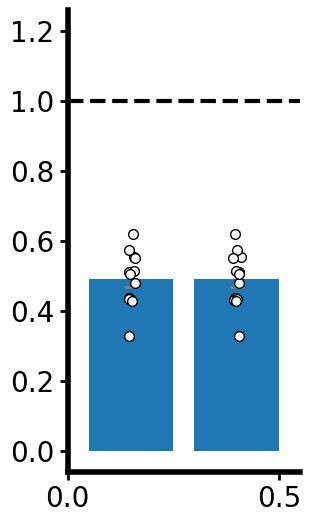

TtestResult(statistic=-23.64585008633572, pvalue=1.958638916624811e-11, df=12)


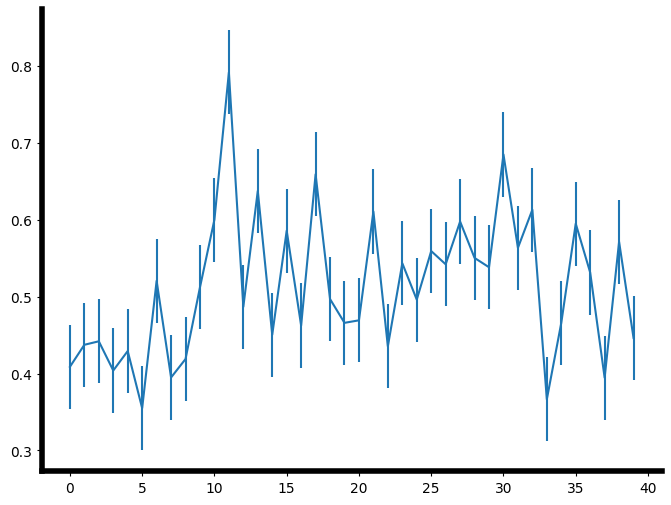

In [432]:
mean_entropy=dict_to_array(mean_entropy_dic['mean_entropy'])
mouse_mean_entropy=np.nanmean(mean_entropy,axis=1)
mouse_sem_entropy=st.sem(mean_entropy,axis=1,nan_policy='omit')[0]
task_mean_entropy=np.nanmean(mean_entropy,axis=0)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

bar_plotX([mouse_mean_entropy,mouse_mean_entropy],'none',0,1.2,'points','unpaired',0.025)
plt.axhline(1,ls='dashed',color='black',linewidth=3)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'mean_entropy_bar.svg')
plt.show()
print(st.ttest_1samp(mouse_mean_entropy,1))
plt.errorbar(x=np.arange(len(task_mean_entropy)),y=task_mean_entropy, yerr=mouse_sem_entropy)

plt.show()

In [427]:
np.shape(mouse_mean_entropy)

(9,)

In [187]:
for mouse in All_task_mice:
    task_performance_allsessions=[]
    mean_entropy_allsessions=[]

    task_performance_session1=np.zeros(40)
    mean_entropy_session1=np.zeros(40)

    task_performance_session1[:]=np.nan
    mean_entropy_session1[:]=np.nan


    for Task in np.arange(40)+1:
        task_performance=dict_to_array(scores_dic[mouse][Task]['Mean'])
        task_entropies=dict_to_array(scores_dic['entropy'][mouse][Task]['ALL'])
        if len(task_entropies)>0:
            task_entropies_means=np.nanmean(task_entropies,axis=1)

            task_performance_allsessions.append(task_performance)
            mean_entropy_allsessions.append(task_entropies_means)

            task_performance_session1[Task-1]=task_performance[0]
            mean_entropy_session1[Task-1]=task_entropies_means[0]

    mean_entropy_dic['performance_session'][mouse]=task_performance_allsessions
    mean_entropy_dic['entropy_session'][mouse]=mean_entropy_allsessions

    mean_entropy_dic['performance_firstsession'][mouse]=task_performance_session1
    mean_entropy_dic['entropy_firstsession'][mouse]=mean_entropy_session1


C:\Users\moham\AppData\Local\Temp\ipykernel_28064\144597323.py:16: RuntimeWarning: Mean of empty slice
  task_entropies_means=np.nanmean(task_entropies,axis=1)


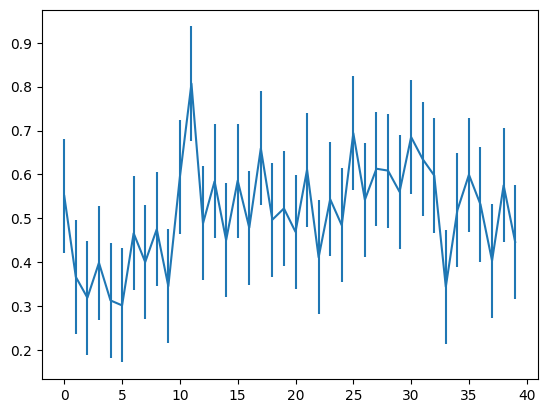

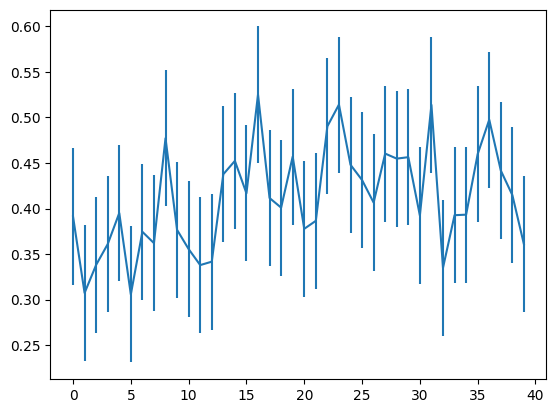

In [188]:
for measure in ['entropy_firstsession','performance_firstsession']:
    _first_ses=dict_to_array(mean_entropy_dic[measure])

    mouse_firstses_=np.nanmean(_first_ses,axis=0)
    mouse_sem_firstses_=st.sem(_first_ses,axis=0,nan_policy='omit')[0]
    plt.errorbar(x=np.arange(len(mouse_firstses_)),y=mouse_firstses_, yerr=mouse_sem_firstses_)
    plt.show()


In [190]:
for mouse in All_task_mice:
    print(mouse)
    all_perf=np.hstack((mean_entropy_dic['performance_session'][mouse]))
    all_entropy=np.hstack((mean_entropy_dic['entropy_session'][mouse]))

    xy=column_stack_clean(all_perf,all_entropy)
    #sns.regplot(xy[:,0],xy[:,1])
    plt.show()
    print(st.pearsonr(xy[:,0],xy[:,1]))

ab03
PearsonRResult(statistic=0.46524150548642684, pvalue=3.039957542779098e-07)
ah02
PearsonRResult(statistic=-0.11895915208311529, pvalue=0.12804657476284356)
ah03
PearsonRResult(statistic=-0.13880435270611455, pvalue=0.11526522666722427)
ah04
PearsonRResult(statistic=-0.2069908467881485, pvalue=0.012800856537137329)
ah05
PearsonRResult(statistic=-0.2252594632438524, pvalue=0.010888426240342572)
ah07
PearsonRResult(statistic=-0.09905733407122694, pvalue=0.47606676251869795)
me08
PearsonRResult(statistic=0.07486402164101878, pvalue=0.28604716637698596)
me10
PearsonRResult(statistic=0.19041612522837995, pvalue=0.014595927090538913)
me11
PearsonRResult(statistic=-0.07360633694203575, pvalue=0.4071070051762748)


In [193]:
all_perf=np.hstack((np.hstack((dict_to_array(mean_entropy_dic['performance_session'])))))
all_entropy=np.hstack((np.hstack((dict_to_array(mean_entropy_dic['entropy_session'])))))

xy=column_stack_clean(all_perf,all_entropy)
#sns.regplot(pd.DataFrame(xy))
st.pearsonr(xy[:,0],xy[:,1])

C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1347984989.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(dictlist))


PearsonRResult(statistic=0.01678922893653278, pvalue=0.5566770329555477)

In [18]:
##exclusions - IGNORED

'''
me05: 9 triggered first A by foot 
me08: 37 task was a shifted version of another task on same day
ah02: 23 had to check during trialwhether node was delivering reliably
'''

exclusions_dic={'me03':[],'me04':[],'me05':[9],'me06':[],'me08':[37],'ah02':[23],'ah03':[19,24,32], 'me10':[10,13,28,37],\
                'me11':[],'ah04':[16,22,31,33,34],'ah05':[24,37,38,39,40],'ab03':[],'ah07':[]}



In [19]:
Mice

array(['me03', 'me04', 'me05', 'me06', 'me08', 'ah02', 'ah03', 'me10',
       'me11', 'ah04', 'ah05', 'ab03', 'ah07'], dtype='<U4')

In [91]:
###Calculating zero-shot performance
zero_shot_dic=rec_dd()
num_trials_thr=2
Other_exclusions=False
transition_array=np.asarray(['DA','CA','BA','DB','DC'])
for mouse in Ephys_mice_3task:
    print(mouse)
    cohort=Mice_cohort_dic[mouse]
    if cohort<=2:
        num_tasks_mouse=10
    else:
        num_tasks_mouse=40
        
    excluded_tasks=exclusions_dic[mouse]
        
    zero_shot_array=np.zeros((num_tasks_mouse,len(transition_array)))
    zero_shot_array[:]=np.nan
    
    mindist_array=np.zeros((num_tasks_mouse,len(transition_array)))
    mindist_array[:]=np.nan
    
    chance_array=np.zeros((num_tasks_mouse,len(transition_array)))
    chance_array[:]=np.nan
    
    behbias_array=np.zeros((num_tasks_mouse,len(transition_array)))
    behbias_array[:]=np.nan
    
    for task_num in np.arange(num_tasks_mouse):
        
        if Other_exclusions==True and task_num in excluded_tasks:
            print('Not calculated - in exclusion list')
            continue
            
        
        
        print(task_num+1)
        for transition_ind, transition in enumerate(transition_array):

            sessions_all=np.sort(list(scores_dic[mouse][task_num+1]['ALL'].keys()))
            Num_trials_allses=Num_trials_dic[mouse][task_num+1]
            
            num_Num_trials_allses=len(Num_trials_allses)

            if len(sessions_all)==1:
                first_session=sessions_all[0]
                scores_all=scores_dic[mouse][task_num+1][transition][first_session]
            elif len(sessions_all)>1:
                trials_done_bool=np.zeros((len(sessions_all),2))
                scores_all=[]
                for session_ind_ind, session_ind in enumerate(sessions_all):
                    if session_ind_ind+1>num_Num_trials_allses:
                        print('Note: mismatch between num sessions in Num_trials_dic and scores_dic')
                        continue
                    
                    scores_session=scores_dic[mouse][task_num+1][transition][session_ind]
                    
                    Num_trials=Num_trials_allses[session_ind_ind]
                    if isinstance(Num_trials,float)==False and\
                    isinstance(Num_trials,int)==False:
                        print('Files not found')
                        continue
                    if Num_trials>1:
                        trials_done_bool[session_ind_ind,0]=1
                    
                    if len(scores_session)>0:
                        trials_done_bool[session_ind_ind,1]=1
                        scores_all.append(scores_session)
                        
                if len(scores_all)>0 and len(np.where(trials_done_bool[:,0]==1)[0])>0:
                    scores_all=np.hstack((scores_all))
                else:
                    print('Not calculated - no trials completed')
                    continue
                
                first_session_withtrials=np.where(trials_done_bool[:,0]==1)[0][0]
                if trials_done_bool[first_session_withtrials,1]==0:
                    zero_shot_array[task_num,transition_ind]=np.nan
                    print('Not calculated - first session not imported - remport!')
            elif len(sessions_all)==0:
                scores_all=[]

            if len(scores_all)>num_trials_thr:
                score_first_trial=scores_all[0]
                zero_shot_array[task_num,transition_ind]=score_first_trial
                
                min_dist_task=dict_to_array(scores_dic['mindist'][mouse][task_num+1][transition])[0]
                mindist_array[task_num,transition_ind]=min_dist_task
            else:
                print('Not calculated - number of trials too low')
                continue
            
            if len(structure_dic[mouse]['ABCD'][task_num+1])==0:
                print('Not calculated - no Structures_dic entry')
                continue
            structure_task=dict_to_array(structure_dic[mouse]['ABCD'][task_num+1])[0]
            
            if len(structure_task)<4:
                structure_task=dict_to_array(structure_dic[mouse]['ABCD'][task_num+1])[-1]
            
            if len(structure_task)<4:
                continue
                
                
            state_chance_mat=np.zeros((4,4))
            state_chance_mat[:]=np.nan
            for state_x in np.arange(4):
                for state_y in np.arange(4):
                    state_chance_mat[state_x,state_y]=prob_mat[structure_task[state_x]-1,structure_task[state_y]-1]

            state_indx=state_ind_dic[transition[0]]
            state_indy=state_ind_dic[transition[1]]
            chance_transition=state_chance_mat[state_indx,state_indy]
            chance_array[task_num,transition_ind]=chance_transition
            
            behbias_mat=behbias_mat_dic[mouse][task_num+1]
            behbias_transition=behbias_mat[state_indx,state_indy]
            behbias_array[task_num,transition_ind]=behbias_transition

            


    

    early_tasks=np.nanmean(zero_shot_array[:num_tasks_mouse//2],axis=0)
    late_tasks=np.nanmean(zero_shot_array[num_tasks_mouse//2:],axis=0)
    
    early_tasks_mindist=np.nanmean(mindist_array[:num_tasks_mouse//2],axis=0)
    late_tasks_mindist=np.nanmean(mindist_array[num_tasks_mouse//2:],axis=0)
    
    early_tasks_chance_array=np.nanmean(chance_array[:num_tasks_mouse//2],axis=0)
    late_tasks_chance_array=np.nanmean(chance_array[num_tasks_mouse//2:],axis=0)
    
    early_tasks_behbias_array=np.nanmean(behbias_array[:num_tasks_mouse//2],axis=0)
    late_tasks_behbias_array=np.nanmean(behbias_array[num_tasks_mouse//2:],axis=0)
    
    zero_shot_dic[mouse]=zero_shot_array
    zero_shot_dic['min_dist'][mouse]=mindist_array
    zero_shot_dic['chance_array'][mouse]=chance_array
    zero_shot_dic['chance_array'][mouse]=behbias_array
    
    zero_shot_dic['Early_tasks'][mouse]=early_tasks
    zero_shot_dic['Late_tasks'][mouse]=late_tasks
    
    zero_shot_dic['min_dist']['Early_tasks'][mouse]=early_tasks_mindist
    zero_shot_dic['min_dist']['Late_tasks'][mouse]=late_tasks_mindist
    
    zero_shot_dic['chance_array']['Early_tasks'][mouse]=early_tasks_chance_array
    zero_shot_dic['chance_array']['Late_tasks'][mouse]=late_tasks_chance_array
    
    zero_shot_dic['behbias_array']['Early_tasks'][mouse]=early_tasks_behbias_array
    zero_shot_dic['behbias_array']['Late_tasks'][mouse]=late_tasks_behbias_array

ab03
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
ah02
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
ah03
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
ah04
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
Not calculated - number of trials too low
Not calculated - number of trials too low
Not calculated - number of trials too low
Not calculated - number of trials too low
Not calculated - number of trials too low
32
33
34
35
36
37
38
39
40
ah05
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
Not calculated - no trials completed
Not calculated - no trials completed
Not calculated - no trials completed
Not calculated - no trials completed
Not calculated - no trials completed
38
Not calculated - no trials comp

C:\Users\moham\Code\Manuscript1\mBaseFunctions.py:325: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(dictlist))


In [67]:
'''
Missing sessions

me03 - accounted for: 8 - tried first session once and no trials so re-did transition on next day

me05 - accounted for: 3,4 no trials first session - FIXED

me08 - accounted for: 9 (first session - only one trial) - FIXED 34 (file not found) -  15,16 (no complete trials)

me10 - accounted for: 2 (FIXED?) 37 (only one trial)
     
me11 - accounted for: 3 - FIXED!

ah04 - accounted for: 31 (only two full trials) 

ah05 - accounted for: 37,38,39,40 (no or very few trials)
     
     - not accounted for: 32


'''

'\nMissing sessions\n\nme03 - accounted for: 8 - tried first session once and no trials so re-did transition on next day\n\nme05 - accounted for: 3,4 no trials first session - FIXED\n\nme08 - accounted for: 9 (first session - only one trial) - FIXED 34 (file not found) -  15,16 (no complete trials)\n\nme10 - accounted for: 2 (FIXED?) 37 (only one trial)\n     \nme11 - accounted for: 3 - FIXED!\n\nah04 - accounted for: 31 (only two full trials) \n\nah05 - accounted for: 37,38,39,40 (no or very few trials)\n     \n     - not accounted for: 32\n\n\n'

In [68]:
Ephys_mice_3task=Ephys_mice[Ephys_mice!='me03']

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., nan,
        0.,  0.,  1.,  1.,  1.,  1.,  1.])


Early_tasks
DA CA BA


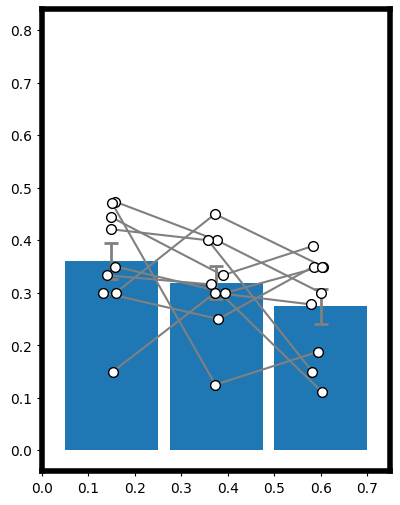

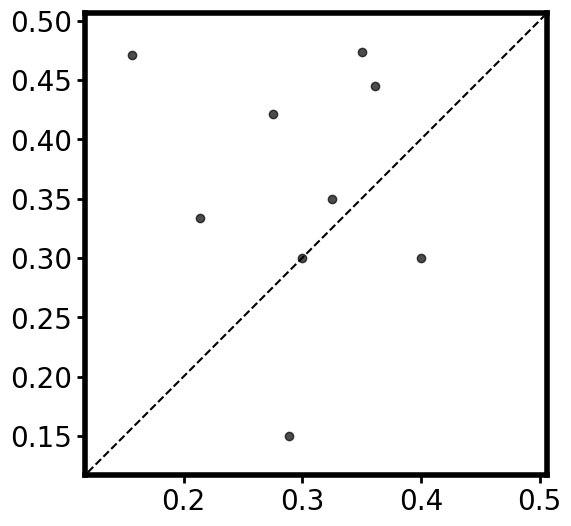

C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=9.0, pvalue=0.20757844233562428)
F_onewayResult(statistic=1.665766239092418, pvalue=0.21016824684147675)
DA DB DC


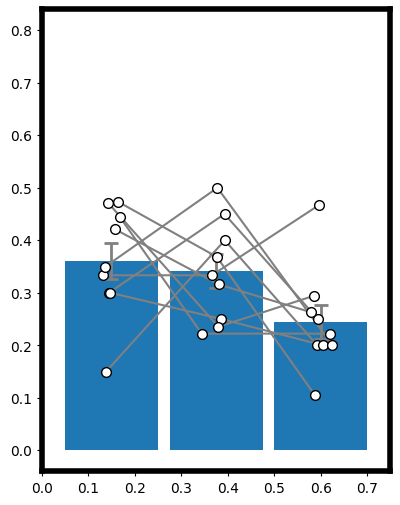

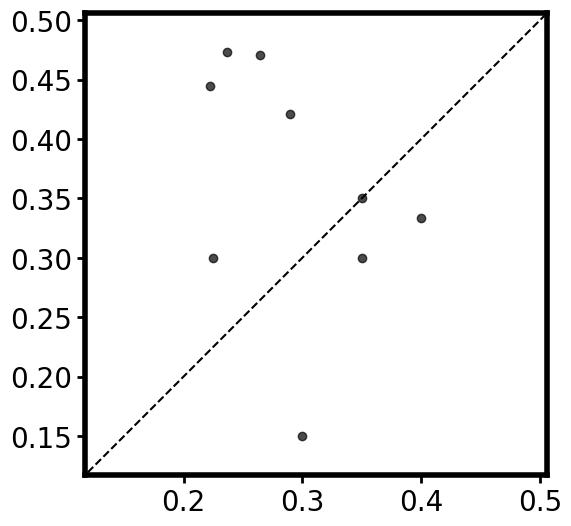

WilcoxonResult(statistic=8.0, pvalue=0.16142946236708333)
F_onewayResult(statistic=3.449349248565661, pvalue=0.04822282636369628)
_____

Late_tasks
DA CA BA


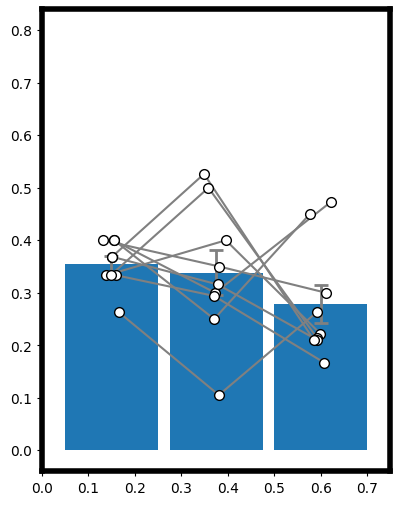

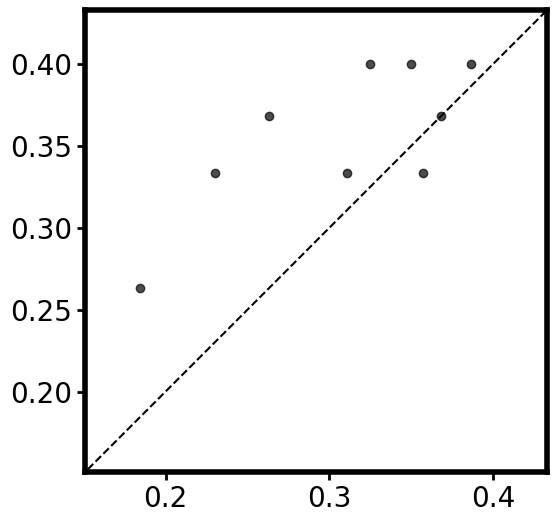

WilcoxonResult(statistic=3.0, pvalue=0.03569190011680441)
F_onewayResult(statistic=1.4170279583994057, pvalue=0.26199865116303706)
DA DB DC


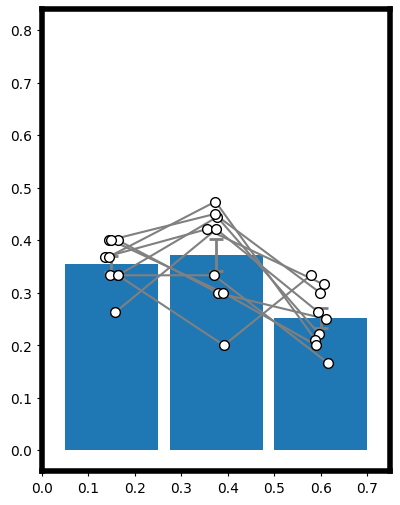

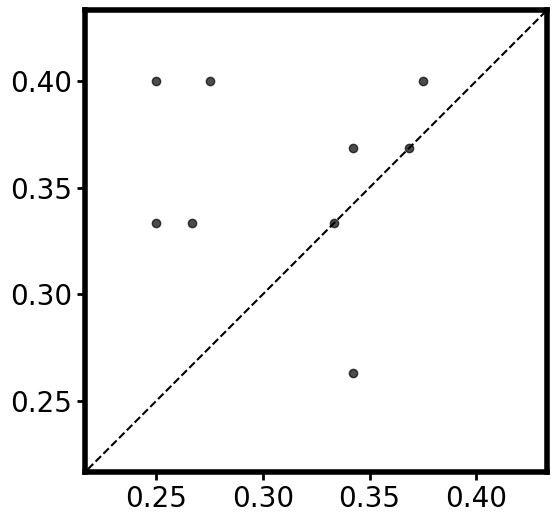

WilcoxonResult(statistic=4.0, pvalue=0.09096894797535775)
F_onewayResult(statistic=8.376454977797628, pvalue=0.0017403291779625922)
_____


In [92]:
for task_group in ['Early_tasks','Late_tasks']:
    print('')
    print(task_group)
    zero_shots_=dict_to_array(zero_shot_dic[task_group])
    min_dist_=dict_to_array(zero_shot_dic['min_dist'][task_group])
    DA_CA_BA=zero_shots_[:,:3]
    DA_DB_DC=zero_shots_[:,[0,-2,-1]]
    
    DA_CA_BA_min_dist=min_dist_[:,:3]
    DA_DB_DC_min_dist=min_dist_[:,[0,-2,-1]]

    print('DA CA BA')
    
    bar_plotX(DA_CA_BA.T,'none',0,0.8,'points','paired',0.025)
    plt.savefig(Behaviour_output_folder_dropbox+task_group+'_DA_CA_BA_bar.svg')
    plt.show()
    plt.rcParams["figure.figsize"] = (6,6)
    plt.rcParams['axes.linewidth'] = 4
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.top'] = True

    noplot_scatter(np.nanmean(DA_CA_BA[:,1:],axis=1),DA_CA_BA[:,0],color='black')
    plt.tick_params(axis='both',  labelsize=20)
    plt.tick_params(width=2, length=6)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.savefig(Behaviour_output_folder_dropbox+task_group+'_DA_CA_BA_scatter.svg')
    plt.show()
    print(st.wilcoxon(np.nanmean(DA_CA_BA[:,1:],axis=1),DA_CA_BA[:,0]))
    print(st.f_oneway(DA_CA_BA[:,0],DA_CA_BA[:,1],DA_CA_BA[:,2]))

    print('DA DB DC')
    zero_shots_=dict_to_array(zero_shot_dic['Late_tasks'])
    bar_plotX(DA_DB_DC.T,'none',0,0.8,'points','paired',0.025)
    plt.savefig(Behaviour_output_folder_dropbox+task_group+'_DA_DB_DC_bar.svg',\
               bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams['axes.linewidth'] = 4
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.top'] = True

    noplot_scatter(np.nanmean(DA_DB_DC[:,1:],axis=1),DA_DB_DC[:,0],color='black')
    plt.tick_params(axis='both',  labelsize=20)
    plt.tick_params(width=2, length=6)
    plt.tick_params(axis='both',  labelsize=20)
    plt.tick_params(width=2, length=6)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig(Behaviour_output_folder_dropbox+task_group+'_DA_DB_DC_scatter.svg',\
               bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    print(st.wilcoxon(np.nanmean(DA_DB_DC[:,1:],axis=1),DA_DB_DC[:,0]))
    print(st.f_oneway(DA_DB_DC[:,0],DA_DB_DC[:,1],DA_DB_DC[:,2]))
    
    print('_____')

In [95]:
zero_shot_differential=DA_CA_BA[:,0]-np.nanmean(DA_CA_BA[:,1:],axis=1)
print(np.mean(zero_shot_differential))
np.std(zero_shot_differential)

0.047080255103990915


0.043868239835335526

In [142]:
anchoring=[0.06,0.12,0.06,0.06,0.12,0.09,0.08]

print(np.mean(anchoring))
print(np.std(anchoring))

0.08428571428571428
0.024989793835051288


In [143]:
(0.08-(0.08*0.8))/0.02

0.8

In [135]:
trial_inds1=np.arange(10)*2
trial_inds2=(np.arange(10)*2)+1

Late_zs1=np.hstack(([np.nanmean(zero_shot_dic[mouse][:,0][20:40][trial_inds1]) for mouse in Ephys_mice_3task]))
Late_zs2=np.hstack(([np.nanmean(zero_shot_dic[mouse][:,0][20:40][trial_inds2]) for mouse in Ephys_mice_3task]))


In [136]:
Late_zs_diff=Late_zs1-Late_zs2
print(np.nanmean(Late_zs_diff))
print(np.std(Late_zs_diff))

-0.01587301587301588
0.23841600967131066


In [137]:
Late_zs1

array([0.11111111, 0.4       , 0.3       , 0.44444444, 0.5       ,
       0.22222222, 0.4       , 0.33333333, 0.4       ])

In [96]:
print(np.mean(DA_CA_BA[:,0]))
print(np.std(DA_CA_BA[:,0]))

0.3555555555555555
0.04252551804139848


In [140]:
print(np.mean(DA_CA_BA[:,0])*0.2)
(0.36-(0.36*0.8))/0.04

0.07111111111111111


1.8000000000000003

In [84]:
(np.nanmean(DA_CA_BA[:,0])*0.8)-np.nanmean(DA_CA_BA[:,1:])

0.03874786891814752

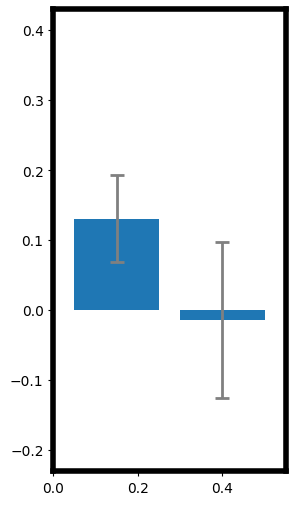

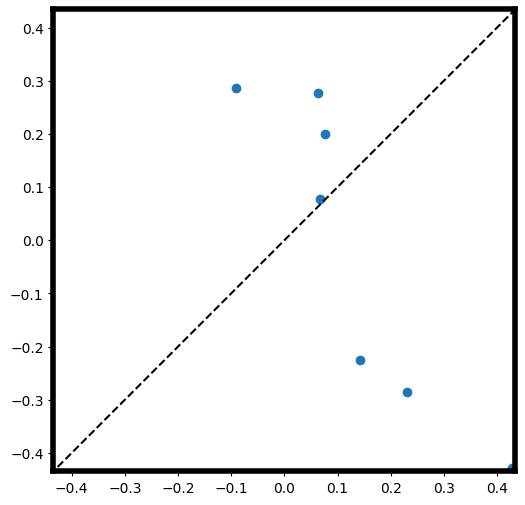

TtestResult(statistic=2.125696577165557, pvalue=0.07766971826375255, df=6)
TtestResult(statistic=-0.12800496812202472, pvalue=0.9023276381102554, df=6)
WilcoxonResult(statistic=11.0, pvalue=0.6875)
['me03' 'me04' 'me05' 'me06' 'me08' 'ah02' 'ah03' 'me10' 'me11' 'ah04'
 'ah05' 'ab03' 'ah07']
['ah02' 'ah03' 'me10' 'me11' 'ah04' 'ab03' 'ah07']
[ 0.36734694  0.51648352  0.85714286 -0.01025641 -0.21409574 -0.37662338
 -0.12307692]


In [244]:
DAvsCA=(DA_CA_BA[:,0]-DA_CA_BA[:,1])/(DA_CA_BA[:,0]+DA_CA_BA[:,1])
CAvsBA=(DA_CA_BA[:,1]-DA_CA_BA[:,2])/(DA_CA_BA[:,1]+DA_CA_BA[:,2])
DAvsBA=(DA_CA_BA[:,0]-DA_CA_BA[:,2])/(DA_CA_BA[:,0]+DA_CA_BA[:,2])

DAvsDB=(DA_DB_DC[:,0]-DA_DB_DC[:,1])/(DA_DB_DC[:,0]+DA_DB_DC[:,1])
DBvsDC=(DA_DB_DC[:,1]-DA_DB_DC[:,2])/(DA_DB_DC[:,1]+DA_DB_DC[:,2])
DAvsDC=(DA_DB_DC[:,0]-DA_DB_DC[:,2])/(DA_DB_DC[:,0]+DA_DB_DC[:,2])

diff=(DA_CA_BA[:,0]-np.nanmean(DA_CA_BA[:,1:],axis=1))/np.nanmean(DA_CA_BA[:,1:],axis=1)
###i.e. which mice express the zero shot

#bool_used=np.repeat(True,len(DAvsBA))
bool_used=diff>0


bool_used[:4]=False



DAvsCA=DAvsCA[bool_used]
CAvsBA=CAvsBA[bool_used]
DAvsBA=DAvsBA[bool_used]

Mice_used=np.asarray(list(zero_shot_dic[task_group].keys()))[bool_used]

###i.e. of the mice that express the zero shot, do they show a generic novelty preference

bar_plotX([DAvsCA,CAvsBA],'none',-0.2,0.4,'nopoints','paired',0.025)
plt.show()
plot_scatter(DAvsCA,CAvsBA)
plt.show()
print(st.ttest_1samp(DAvsCA,0))
print(st.ttest_1samp(CAvsBA,0))
print(st.wilcoxon(DAvsCA,CAvsBA))

print(Mice)
print(Mice_used)
print(np.subtract(DAvsCA,CAvsBA))

In [247]:
###Regression to tease out effect of novelty vs zeroshot 
from sklearn.linear_model import LinearRegression

novelty=np.hstack((np.repeat(0,len(DAvsCA)),np.repeat(0,len(CAvsBA)),np.repeat(1,len(DAvsBA)),\
                  ))
zeroshot=np.hstack((np.repeat(1,len(DAvsCA)),np.repeat(0,len(CAvsBA)),np.repeat(1,len(DAvsBA))\
                   ))
diffs=np.hstack((DAvsCA,CAvsBA,DAvsBA))

###Regression
X=np.vstack((zeroshot,novelty)).T
y=diffs
reg=LinearRegression(positive=True).fit(X, y)
coeff_real=reg.coef_

###shuffles
num_iterations=1000
coeffs_shuff=np.zeros((num_iterations,2))
coeffs_shuff[:]=np.nan

coeffs_shuff_diff=np.zeros(num_iterations)
coeffs_shuff_diff[:]=np.nan


for iteration in np.arange(num_iterations):
    y_shuff=np.copy(y)
    np.random.shuffle(y_shuff)
    X=np.vstack((zeroshot,novelty)).T
    reg=LinearRegression().fit(X, y_shuff)
    coeffs_shuff[iteration]=reg.coef_
    coeffs_shuff_diff[iteration]=reg.coef_[0]-reg.coef_[1]





In [253]:
np.shape(coeffs_shuff)

(1000, 2)

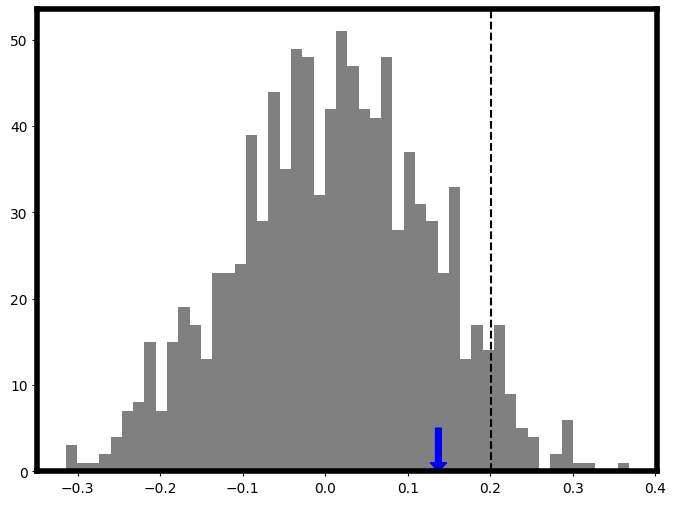

85.5


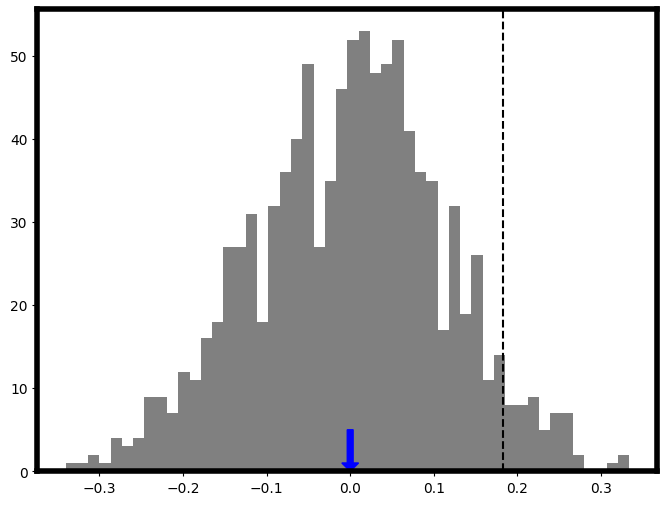

48.2


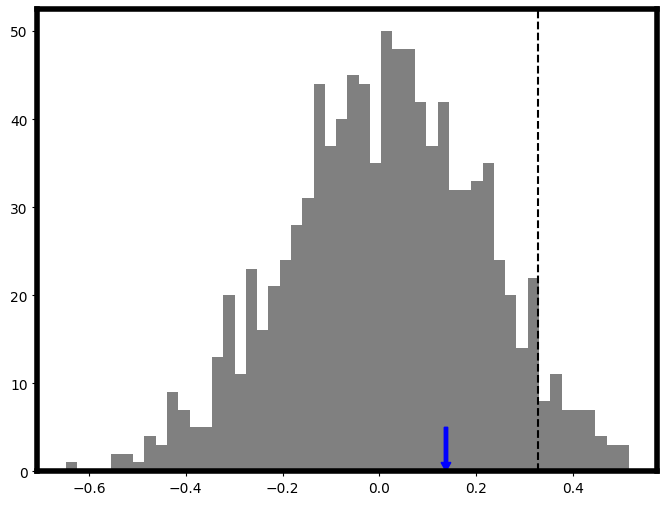

73.0


In [254]:
for coeff_ind in np.arange(2):
    plt.hist(coeffs_shuff[:,coeff_ind],bins=50,color='grey')
    plt.axvline(np.percentile(coeffs_shuff[:,coeff_ind],95),ls='dashed',color='black')
    plt.arrow(coeff_real[coeff_ind],5,0,-4, width=0.007,head_width=0.02,head_length=1,color='blue')
    
    plt.show()
    print(st.percentileofscore(coeffs_shuff[:,coeff_ind],coeff_real[coeff_ind]))
    
plt.hist(coeffs_shuff_diff,bins=50,color='grey')
plt.axvline(np.percentile(coeffs_shuff_diff,95),ls='dashed',color='black')
plt.arrow(coeff_real[0]-coeff_real[1],5,0,-4, width=0.007,head_width=0.02,head_length=1,color='blue')
plt.show()
print(st.percentileofscore(coeffs_shuff_diff,coeff_real[0]-coeff_real[1]))


________
________
min_dist

Early_tasks
DA CA BA


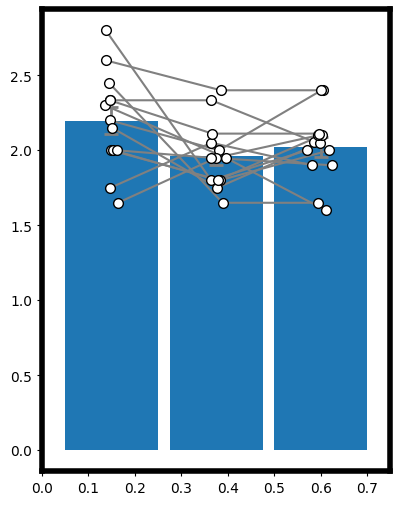

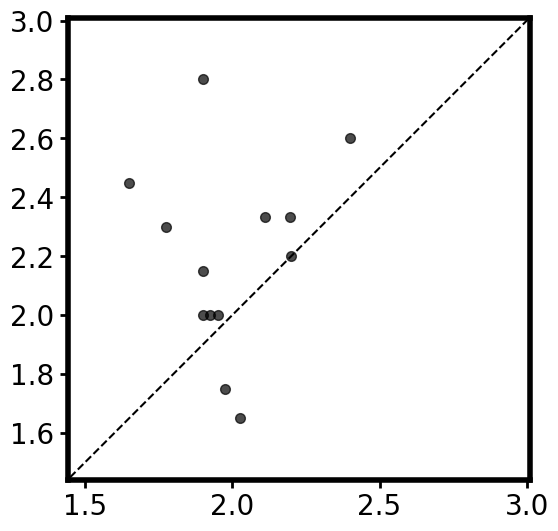

WilcoxonResult(statistic=16.0, pvalue=0.07118923429208965)
F_onewayResult(statistic=2.7669872954800874, pvalue=0.07623986909923729)
DA DB DC


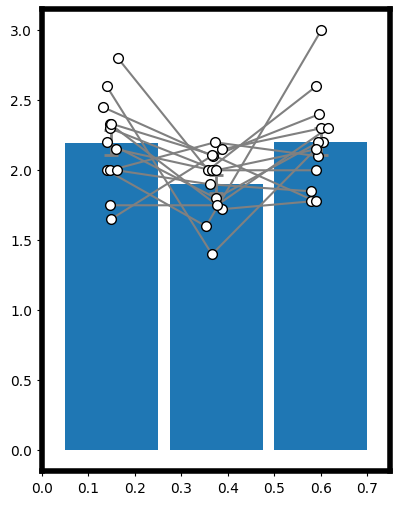

_____

Late_tasks
DA CA BA


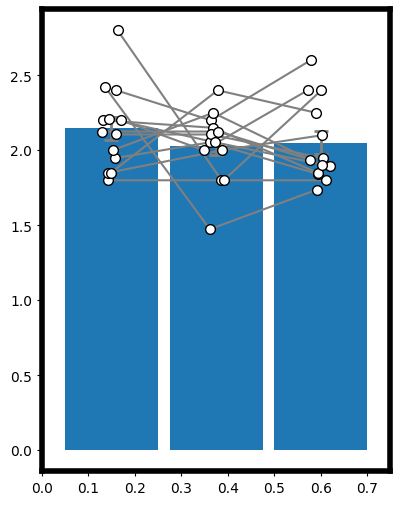

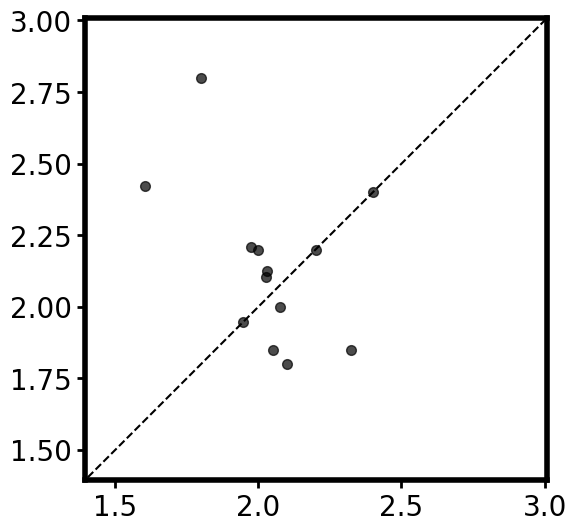

WilcoxonResult(statistic=25.0, pvalue=0.47690655496758394)
F_onewayResult(statistic=0.7154438746107376, pvalue=0.4957956595985885)
DA DB DC


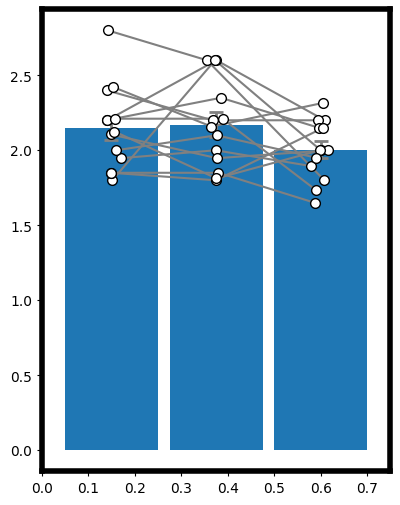

_____

________
________
chance_array

Early_tasks
DA CA BA


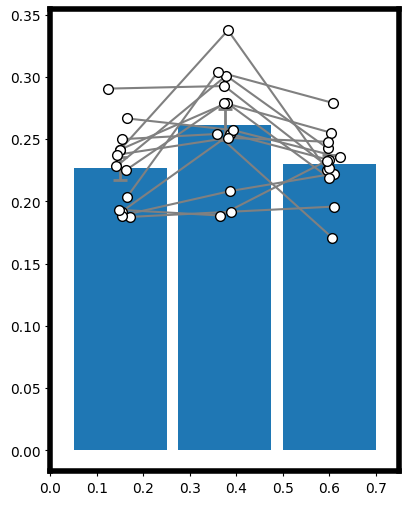

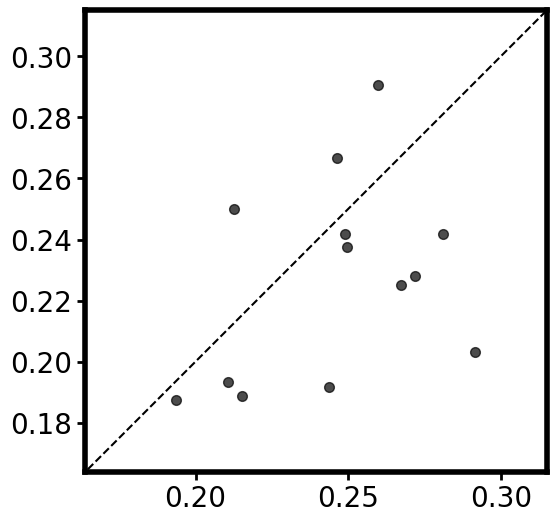

WilcoxonResult(statistic=20.0, pvalue=0.080322265625)
F_onewayResult(statistic=3.8631781933430402, pvalue=0.030204092494432296)
DA DB DC


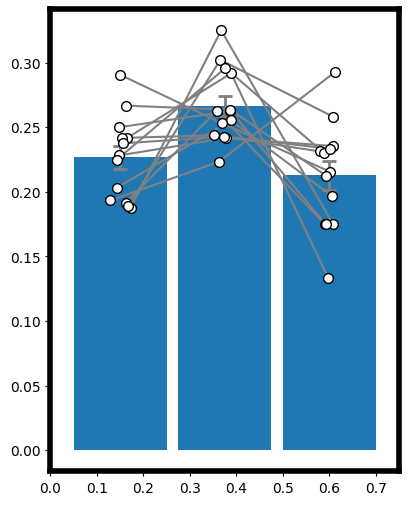

_____

Late_tasks
DA CA BA


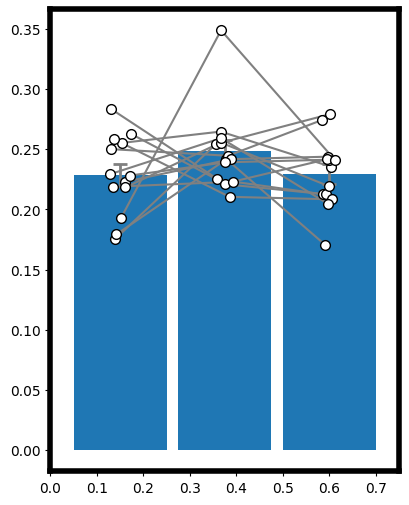

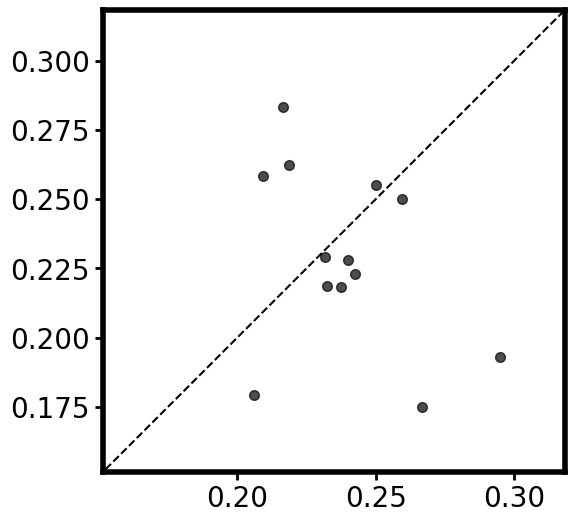

WilcoxonResult(statistic=32.0, pvalue=0.375732421875)
F_onewayResult(statistic=1.5308996024745403, pvalue=0.23009365127603498)
DA DB DC


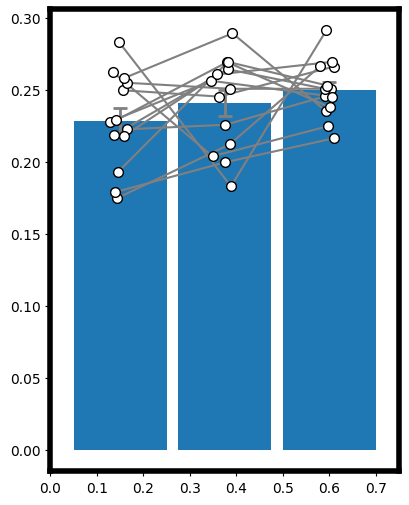

_____

________
________
behbias_array

Early_tasks
DA CA BA


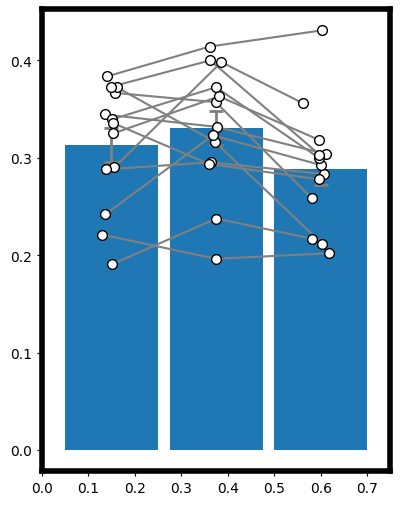

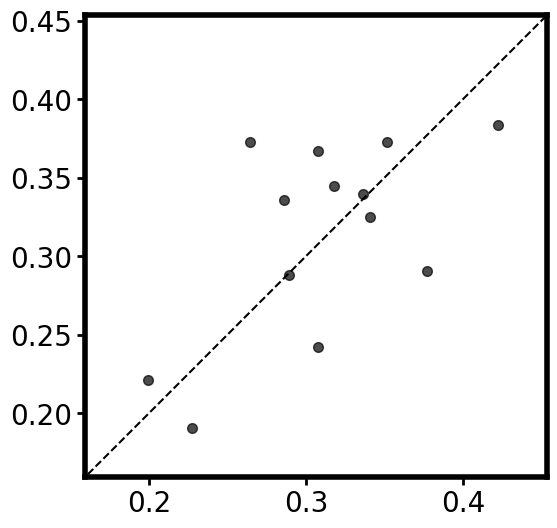

WilcoxonResult(statistic=42.0, pvalue=0.83935546875)
F_onewayResult(statistic=1.4578439543857609, pvalue=0.24615020443975116)
DA DB DC


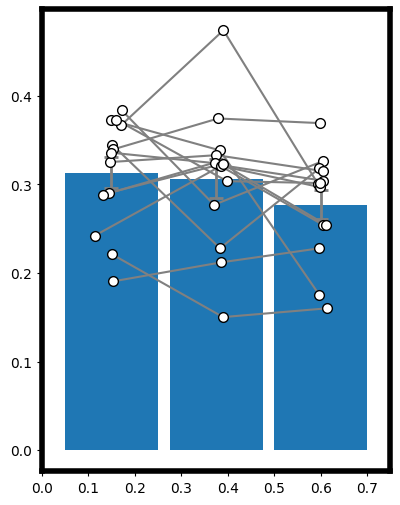

_____

Late_tasks
DA CA BA


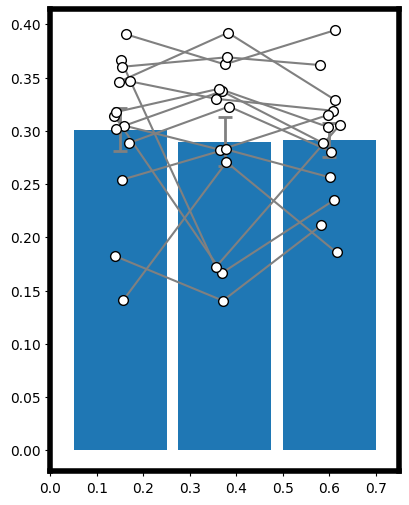

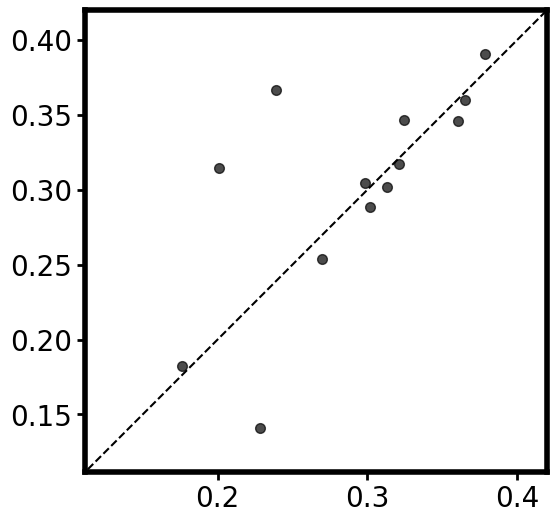

WilcoxonResult(statistic=43.0, pvalue=0.892578125)
F_onewayResult(statistic=0.09749555111024882, pvalue=0.9073450581145971)
DA DB DC


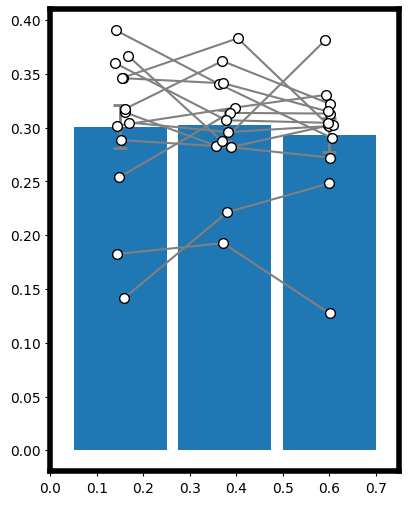

_____


In [410]:
##controls

for control in ['min_dist','chance_array','behbias_array']:
    print('')
    print('________')
    print('________')
    print(control)
    for task_group in ['Early_tasks','Late_tasks']:
        print('')
        print(task_group)
        zero_shots_=dict_to_array(zero_shot_dic[task_group])
        control_=dict_to_array(zero_shot_dic[control][task_group])
        DA_CA_BA=control_[:,:3]
        DA_DB_DC=control_[:,[0,-2,-1]]

        DA_CA_BA=control_[:,:3]
        DA_DB_DC=control_[:,[0,-2,-1]]

        print('DA CA BA')
        bar_plotX(DA_CA_BA.T,'none',0,np.nanmax(DA_CA_BA),'points','paired',0.025)
        plt.savefig(Behaviour_output_folder_dropbox+task_group+'_'+control+'_bar.svg')
        plt.show()
        
        plt.rcParams["figure.figsize"] = (8,6)
        plt.rcParams['axes.linewidth'] = 4
        plt.rcParams['axes.spines.right'] = True
        plt.rcParams['axes.spines.top'] = True
        
        noplot_scatter(np.nanmean(DA_CA_BA[:,1:],axis=1),DA_CA_BA[:,0],color='black')
        plt.tick_params(axis='both',  labelsize=20)
        plt.tick_params(width=2, length=6)
        plt.gca().set_aspect('equal', adjustable='box')
        
        plt.savefig(Behaviour_output_folder_dropbox+task_group+'_'+control+'_scatter.svg',\
                   bbox_inches = 'tight', pad_inches = 0)
        plt.show()
        print(st.wilcoxon(np.nanmean(DA_CA_BA[:,1:],axis=1),DA_CA_BA[:,0]))
        print(st.f_oneway(DA_CA_BA[:,0],DA_CA_BA[:,1],DA_CA_BA[:,2]))

        print('DA DB DC')
        zero_shots_=dict_to_array(zero_shot_dic['Late_tasks'])
        bar_plotX(DA_DB_DC.T,'none',0,np.nanmax(DA_DB_DC),'points','paired',0.025)
        plt.show()
        #noplot_scatter(np.nanmean(DA_DB_DC[:,1:],axis=1),DA_DB_DC[:,0],color='black')
        #plt.tick_params(axis='both',  labelsize=20)
        #plt.tick_params(width=2, length=6)
        #plt.gca().set_aspect('equal', adjustable='box')
        
        #plt.show()
        #print(st.wilcoxon(np.nanmean(DA_DB_DC[:,1:],axis=1),DA_DB_DC[:,0]))
        #print(st.f_oneway(DA_DB_DC[:,0],DA_DB_DC[:,1],DA_DB_DC[:,2]))

        print('_____')


In [98]:
###Initial performance calculation
performance_dic=rec_dd()
reldist_dic=rec_dd()
num_trials_first=20
num_states=len(states)
for mouse in Mice:
    print(mouse)
    cohort=Mice_cohort_dic[mouse]
    if cohort<=2:
        num_tasks_mouse=10
    else:
        num_tasks_mouse=40

    excluded_tasks=exclusions_dic[mouse]

    performance_array=np.zeros((num_tasks_mouse,num_trials_first,num_states))
    performance_array[:]=np.nan
    
    relative_distance_array=np.zeros((num_tasks_mouse,num_trials_first))
    relative_distance_array[:]=np.nan
    for task_num in np.arange(num_tasks_mouse):
        print(task_num+1)
        try:
            sessions=np.sort(list(scores_dic[mouse][task_num+1]['ALL'].keys()))
            Num_trials_allses=Num_trials_dic[mouse][task_num+1]
            num_Num_trials_allses=len(Num_trials_allses)

            scores_all=[]
            for session_ind, session in enumerate(sessions):
                if session_ind+1>num_Num_trials_allses:
                    print('Note: mismatch between num sessions in Num_trials_dic and scores_dic')
                    continue
                scores_session=scores_dic[mouse][task_num+1]['ALL'][session]
                if len(scores_session)>0:
                    scores_all.append(scores_session)

            scores_all=np.vstack((scores_all))
            scores_N=scores_all[:num_trials_first]
            if len(scores_N)<num_trials_first:
                added_array=np.zeros((num_trials_first-len(scores_N),4))
                added_array[:]=np.nan
                scores_N=np.vstack((scores_N,added_array))
            performance_array[task_num]=scores_N
            
            
            
            
            ###distances
            dists_task_=dict_to_array(scores_dic['dists'][mouse][task_num+1]['ALL'])
            if len(dists_task_)==1:
                dists_task=np.vstack((dists_task_))
            else:
                if len(dists_task_[1])==0:
                    dists_task=dists_task_[0]
                else:
                    dists_task=np.vstack((dists_task_))
            
            min_dists_task=dict_to_array(scores_dic['mindist'][mouse][task_num+1]['ALL'])[0]
            
            min_dists_task_sum=np.sum(min_dists_task)
            if min_dists_task_sum==0:
                min_dists_task_sum=np.nan
            relative_dists_task=(np.sum(dists_task,axis=1)/min_dists_task_sum)[:num_trials_first]
            if len(relative_dists_task)<num_trials_first:
                added_array=np.zeros((num_trials_first-len(relative_dists_task)))
                added_array[:]=np.nan
                relative_dists_task=np.concatenate((relative_dists_task,added_array))
            
            relative_distance_array[task_num]=relative_dists_task
            
        except Exception as e:
            print('Not calculated - non-existent')
            print(e)
            exc_type, exc_obj, exc_tb = sys.exc_info()
            fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
            print(exc_type, fname, exc_tb.tb_lineno)

    early_tasks=np.nanmean(performance_array[:num_tasks_mouse//2],axis=0)
    late_tasks=np.nanmean(performance_array[num_tasks_mouse//2:],axis=0)
    
    early_tasks_reldists=np.nanmean(relative_distance_array[:num_tasks_mouse//2],axis=0)
    late_tasks_reldists=np.nanmean(relative_distance_array[num_tasks_mouse//2:],axis=0)

    performance_dic[mouse]=performance_array
    performance_dic['Early_tasks'][mouse]=early_tasks
    performance_dic['Late_tasks'][mouse]=late_tasks
    
    reldist_dic[mouse]=relative_distance_array
    reldist_dic['Early_tasks'][mouse]=early_tasks_reldists
    reldist_dic['Late_tasks'][mouse]=late_tasks_reldists

me03
1
Not calculated - non-existent
all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 5 has size 0
<class 'ValueError'> 985874824.py 56
2
3
4
5
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Not calculated - non-existent
all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 4
<class 'ValueError'> 985874824.py 56
6
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Note: mismatch between num sessions in Num_trials_dic and scores_dic
7
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Note: mismatch between num sessions in Num_trials_dic and scores_dic
8
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Note: mismatch between n

In [105]:
np.shape(dists_task)
trial_inds1=np.arange(10)*2
trial_inds2=(np.arange(10)*2)+1

In [107]:
trial_inds2

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [132]:
trial_inds1=np.arange(10)*2
trial_inds2=(np.arange(10)*2)+1


Late_perf=[np.nanmean(performance_dic['Late_tasks'][mouse]) for mouse in Ephys_mice_3task]
print(np.nanmean(Late_perf))
print(np.std(Late_perf))

0.43054552736183277
0.024762861718991433


In [133]:
trial_inds1=np.arange(10)*2
trial_inds2=(np.arange(10)*2)+1

Late_perf1=np.hstack(([np.nanmean(performance_dic['Late_tasks'][mouse][trial_inds1]) for mouse in Ephys_mice_3task]))
Late_perf2=np.hstack(([np.nanmean(performance_dic['Late_tasks'][mouse][trial_inds2]) for mouse in Ephys_mice_3task]))


Late_perf_diff=Late_perf1-Late_perf2
print(np.nanmean(Late_perf_diff))
print(np.std(Late_perf_diff))

0.006507978080475485
0.01711023554263941


In [117]:
0.42*0.2




0.084

In [209]:
###Initial Performance calculation - full trial
num_trials_first=20
performance_dic2=rec_dd()
for mouse in Mice:
    print(mouse)
    try:
        cohort=Mice_cohort_dic[mouse]
        if cohort<=2:
            num_tasks_mouse=10
        else:
            num_tasks_mouse=40
            
        if cohort==5:
            continue

        excluded_tasks=exclusions_dic[mouse]

        performance_array_trial=[]
        performance_array_trial_end=[]
        for structure_num in np.arange(num_tasks_mouse)+1:
            if len(remove_empty(dict_to_array(scores_dic['dists'][mouse][structure_num]['ALL'])))==0:
                print('Missing entry for task'+str(structure_num))
                continue
            dists_all_structurenum=np.vstack((remove_empty(dict_to_array(scores_dic['dists'][mouse]\
                                                                         [structure_num]['ALL']))))

            min_dists_structurenum=dict_to_array(scores_dic['mindist'][mouse][structure_num]['ALL'])[0]
            Actual_trial_distance=np.sum(dists_all_structurenum,axis=1)
            min_trial_distance=np.sum(min_dists_structurenum)

            if min_trial_distance==0:
                print('Error in calculating min distance for structure num'+str(structure_num))
                Norm_trial_distance=np.repeat(np.nan,num_trials_first)
            else:
                Norm_trial_distance=Actual_trial_distance/min_trial_distance

            if len(Norm_trial_distance)<num_trials_first:
                Norm_trial_distance=np.hstack((Norm_trial_distance,\
                                                   np.repeat(np.nan,num_trials_first-len(Norm_trial_distance))))
            performance_array_trial.append(Norm_trial_distance[:num_trials_first])

            performance_array_trial_end.append(Norm_trial_distance[-num_trials_first:])

        performance_dic2['Norm_trial_distance'][mouse]=np.vstack((performance_array_trial))
        performance_dic2['Norm_trial_distance_early'][mouse]=np.vstack((performance_array_trial))[:num_tasks_mouse//2]
        performance_dic2['Norm_trial_distance_late'][mouse]=np.vstack((performance_array_trial))[num_tasks_mouse//2:]

        performance_dic2['Norm_trial_distance_end'][mouse]=np.vstack((performance_array_trial_end))
        performance_dic2['Norm_trial_distance_early_end'][mouse]=np.vstack((performance_array_trial_end))\
        [:num_tasks_mouse//2]
        performance_dic2['Norm_trial_distance_late_end'][mouse]=np.vstack((performance_array_trial_end))\
        [num_tasks_mouse//2:]

    except Exception as e:
        print(e)

me03
Error in calculating min distance for structure num5
Error in calculating min distance for structure num8
me04
Error in calculating min distance for structure num2
Error in calculating min distance for structure num3
me05
Error in calculating min distance for structure num3
Error in calculating min distance for structure num4
Error in calculating min distance for structure num5
me06
me08
Error in calculating min distance for structure num4
Error in calculating min distance for structure num9
Missing entry for task15
Missing entry for task16
ah02
ah03
me10
Error in calculating min distance for structure num13
Error in calculating min distance for structure num28
Missing entry for task37
me11
ah04
ah05
Error in calculating min distance for structure num37
Error in calculating min distance for structure num38
Missing entry for task39
Missing entry for task40
ab03
Error in calculating min distance for structure num5
ah07
Error in calculating min distance for structure num5
Missing ent

C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1347984989.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(dictlist))


In [ ]:
print(np.mean(zero_shot_differential))
np.std(zero_shot_differential)

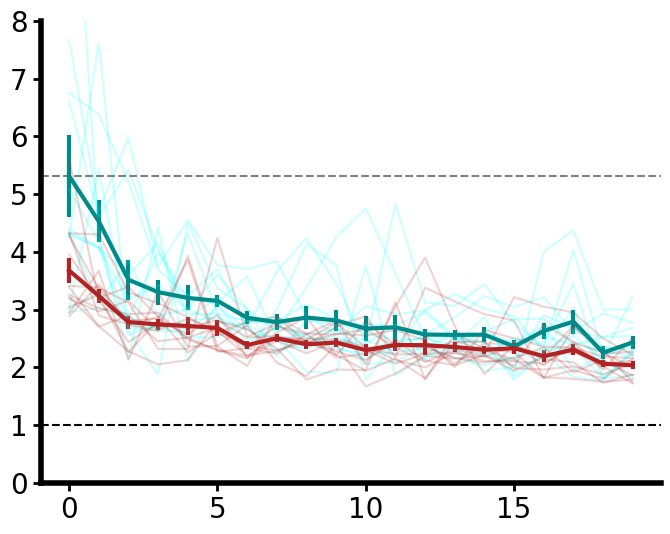

In [333]:
Norm_trial_distance_early_allmice=np.vstack(([np.nanmean(performance_dic2['Norm_trial_distance_early'][mouse],axis=0)\
for mouse in performance_dic2['Norm_trial_distance_early'].keys()]))

Norm_trial_distance_late_allmice=np.vstack(([np.nanmean(performance_dic2['Norm_trial_distance_late'][mouse],axis=0)\
for mouse in performance_dic2['Norm_trial_distance_late'].keys()]))

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

plt.errorbar(np.arange(num_trials_first),np.nanmean(Norm_trial_distance_early_allmice,axis=0),\
             st.sem(Norm_trial_distance_early_allmice,axis=0,nan_policy='omit'),color='darkcyan',linewidth=3)
plt.errorbar(np.arange(num_trials_first),np.nanmean(Norm_trial_distance_late_allmice,axis=0),\
             st.sem(Norm_trial_distance_late_allmice,axis=0,nan_policy='omit'),color='firebrick', linewidth=3)

chance_wholetrial=np.nanmean(Norm_trial_distance_early_allmice,axis=0)[0]

plt.plot(Norm_trial_distance_early_allmice.T,color='cyan',alpha=0.2)
plt.plot(Norm_trial_distance_late_allmice.T,color='firebrick',alpha=0.2)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)

plt.axhline(chance_wholetrial,ls='dashed',color='grey')
plt.axhline(1,ls='dashed',color='black')
plt.ylim(0,8)

plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_timeline_distances_wholetrial.svg')
plt.show()

In [375]:
Distance=np.hstack((np.hstack((Norm_trial_distance_early_allmice)),np.hstack((Norm_trial_distance_late_allmice))))
Mouse=np.tile(np.repeat(np.arange(len(Mice)),np.shape(late_task_timeline)[1]),2)
Trial=np.tile(np.tile(np.arange(num_trials_first),np.shape(late_task_timeline)[0]),2)
Task=np.repeat(np.arange(2),len(np.hstack((late_task_timeline))))


dataframe = pd.DataFrame({'Mouse': Mouse,
                          'Trial': Trial,
                          'Task': Task,\
                         'Distance':Distance})

import pingouin as pg

# Compute the 2-way repeated measures ANOVA. This will return a dataframe.
pg.rm_anova(dv='Distance', within=['Trial','Task'], subject='Mouse', data=dataframe)

# Optional post-hoc tests
#pg.pairwise_ttests(dv='Distance', within=['Trial','Task'], subject='Mouse', data=dataframe)

#dataframe.rm_anova(dv='Distance', within=['Trial','Task'], subject='Mouse')

Source          SS  ddof1  ddof2         MS          F         p-unc  \
0         Trial  156.009376     19    228   8.211020  19.114651  4.051112e-37   
1          Task   30.244169      1     12  30.244169  28.148297  1.866597e-04   
2  Trial * Task   17.257072     19    228   0.908267   2.539835  6.088955e-04   

      p-GG-corr       np2       eps  
0  9.087097e-08  0.614330  0.163031  
1  1.866597e-04  0.701108  1.000000  
2  6.627436e-02  0.174681  0.170608

In [374]:
np.shape(Norm_trial_distance_early_allmice)

(13, 20)

C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1152133630.py:14: RuntimeWarning: Mean of empty slice
  behavioural_biases=np.hstack(([np.nanmean([np.nanmean(np.hstack((np.diag(behbias_mat_dic[mouse][int(task_num)],1),\


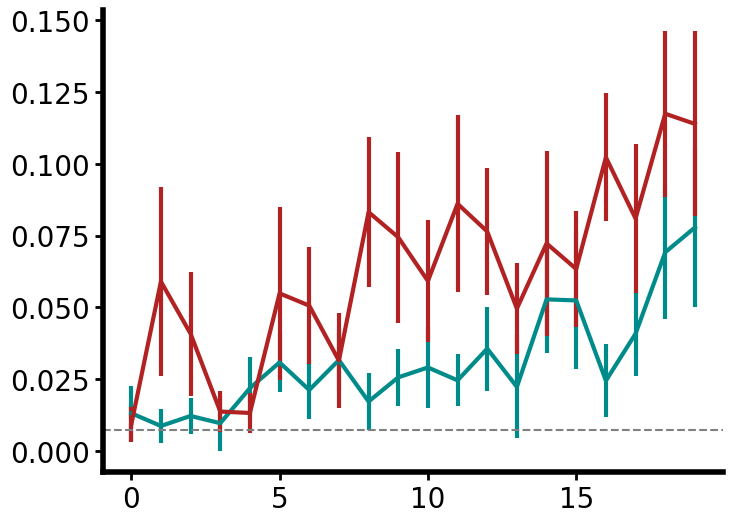

In [372]:
##Proportion perfect trials first 20 trials

prop_perfect_early=np.vstack(([[np.sum(remove_nan(performance_dic2['Norm_trial_distance_early'][mouse][:,trial_no])==1)/\
len(remove_nan(performance_dic2['Norm_trial_distance_early'][mouse][:,trial_no])) \
for trial_no in np.arange(len(performance_dic2['Norm_trial_distance_early'][mouse].T))]\
for mouse in performance_dic2['Norm_trial_distance_early'].keys()]))

prop_perfect_late=np.vstack(([[np.sum(remove_nan(performance_dic2['Norm_trial_distance_late'][mouse][:,trial_no])==1)/\
len(remove_nan(performance_dic2['Norm_trial_distance_late'][mouse][:,trial_no])) \
for trial_no in np.arange(len(performance_dic2['Norm_trial_distance_late'][mouse].T))]\
for mouse in performance_dic2['Norm_trial_distance_late'].keys()]))


behavioural_biases=np.hstack(([np.nanmean([np.nanmean(np.hstack((np.diag(behbias_mat_dic[mouse][int(task_num)],1),\
                                                          behbias_mat_dic[mouse][int(task_num)][-1,0])))\
for task_num in behbias_mat_dic[mouse].keys()]) for mouse in Mice]))

behavioural_biases_wholetrial=np.hstack(([np.nanmean([np.product(np.hstack((np.diag(behbias_mat_dic[mouse][int(task_num)],1),\
                                                          behbias_mat_dic[mouse][int(task_num)][-1,0])))\
for task_num in behbias_mat_dic[mouse].keys()]) for mouse in Mice]))

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

plt.errorbar(np.arange(num_trials_first),np.nanmean(prop_perfect_early,axis=0),\
             st.sem(prop_perfect_early,axis=0,nan_policy='omit'),color='darkcyan',linewidth=3)
plt.errorbar(np.arange(num_trials_first),np.nanmean(prop_perfect_late,axis=0),\
             st.sem(prop_perfect_late,axis=0,nan_policy='omit'),color='firebrick', linewidth=3)

plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
chance_wholetrial_prop=np.nanmean(behavioural_biases_wholetrial)
plt.axhline(chance_wholetrial_prop,ls='dashed',color='grey')
plt.savefig(Behaviour_output_folder_dropbox+task_group+'_prop_perfect_earlylate_line.svg')
plt.show()

In [377]:
Prop_perfect=np.hstack((np.hstack((prop_perfect_early)),np.hstack((prop_perfect_late))))
Mouse=np.tile(np.repeat(np.arange(len(Mice)),np.shape(late_task_timeline)[1]),2)
Trial=np.tile(np.tile(np.arange(num_trials_first),np.shape(late_task_timeline)[0]),2)
Task=np.repeat(np.arange(2),len(np.hstack((late_task_timeline))))


dataframe = pd.DataFrame({'Mouse': Mouse,
                          'Trial': Trial,
                          'Task': Task,\
                         'Prop_perfect':Prop_perfect})

import pingouin as pg

# Compute the 2-way repeated measures ANOVA. This will return a dataframe.
pg.rm_anova(dv='Prop_perfect', within=['Trial','Task'], subject='Mouse', data=dataframe)

# Optional post-hoc tests
#pg.pairwise_ttests(dv='Distance', within=['Trial','Task'], subject='Mouse', data=dataframe)

#dataframe.rm_anova(dv='Distance', within=['Trial','Task'], subject='Mouse')

Source        SS  ddof1  ddof2        MS         F         p-unc  \
0         Trial  0.260830     19    228  0.013728  4.171361  7.669087e-08   
1          Task  0.129366      1     12  0.129366  2.717949  1.251391e-01   
2  Trial * Task  0.069138     19    228  0.003639  0.959818  5.098526e-01   

   p-GG-corr       np2       eps  
0   0.001656  0.257947  0.292760  
1   0.125139  0.184669  1.000000  
2   0.451189  0.074061  0.271352

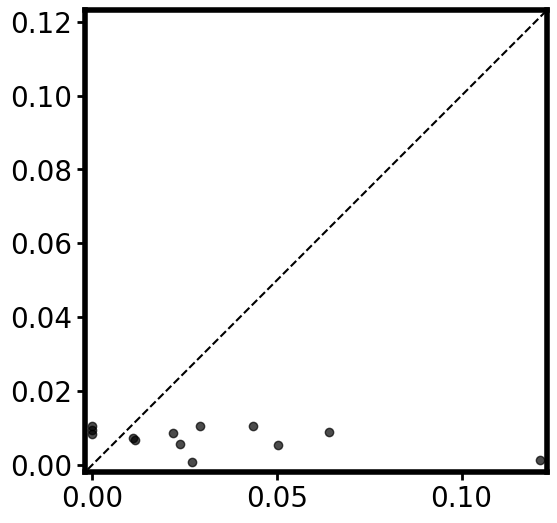

WilcoxonResult(statistic=12.0, pvalue=0.01708984375)


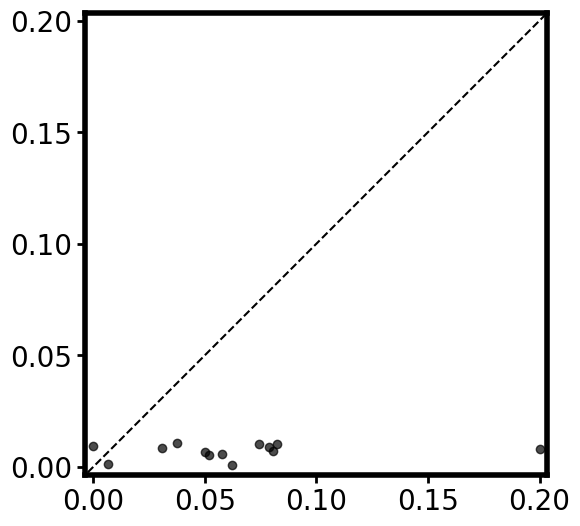

WilcoxonResult(statistic=2.0, pvalue=0.000732421875)


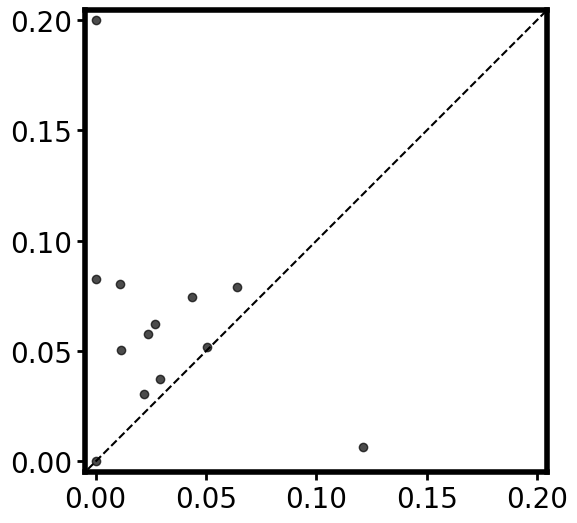

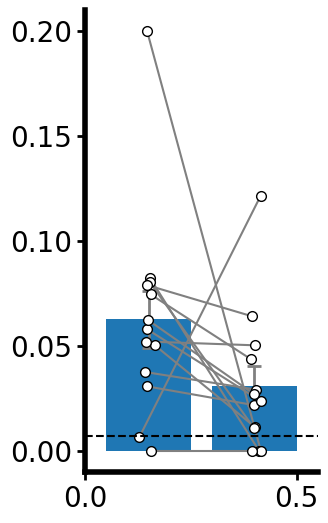

WilcoxonResult(statistic=11.0, pvalue=0.0280561241492436)
TtestResult(statistic=2.5517886726291685, pvalue=0.025382066572332423, df=12)
TtestResult(statistic=4.060911283907898, pvalue=0.0015791232217184344, df=12)


In [388]:
mean_early=np.nanmean(prop_perfect_early,axis=1)
mean_late=np.nanmean(prop_perfect_late,axis=1)

xyz=np.column_stack((mean_early,mean_late,behavioural_biases_wholetrial))

#bar_plotX(xyz.T,'none', 0, 0.2, 'points', 'paired', 0.025)

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True

noplot_scatter(mean_early,behavioural_biases_wholetrial,color='black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig(Behaviour_output_folder_dropbox+task_group+'_prop_perfect_early_scatter.svg')
plt.show()
print(st.wilcoxon(mean_early,behavioural_biases_wholetrial))


noplot_scatter(mean_late,behavioural_biases_wholetrial,color='black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig(Behaviour_output_folder_dropbox+task_group+'_prop_perfect_late_scatter.svg')
plt.show()
print(st.wilcoxon(mean_late,behavioural_biases_wholetrial))

noplot_scatter(mean_early,mean_late,color='black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig(Behaviour_output_folder_dropbox+task_group+'_prop_perfect_latevsearly_scatter.svg')
plt.show()
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
bar_plotX([mean_late,mean_early],'none',0, 0.2, 'points', 'paired', 0.025)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.axhline(np.nanmean(behavioural_biases_wholetrial),color='black',ls='dashed')
plt.savefig(Behaviour_output_folder_dropbox+task_group+'_prop_perfect_latevsearly_bar.svg')
plt.show()
print(st.wilcoxon(mean_late,mean_early))
print(st.ttest_1samp(mean_early,np.nanmean(behavioural_biases_wholetrial)))
print(st.ttest_1samp(mean_late,np.nanmean(behavioural_biases_wholetrial)))

In [366]:
behavioural_biases_wholetrial

array([0.01054894, 0.01044063, 0.00828662, 0.00941242, 0.00662365,
       0.00850839, 0.00569739, 0.00532866, 0.01041289, 0.00725845,
       0.00892096, 0.00076688, 0.00139188])

In [435]:
np.nanmean(behavioural_biases_wholetrial)

0.007199826682905543

In [ ]:
'''
consistent across mice?
replicates to cohorts 5 and 6?

'''

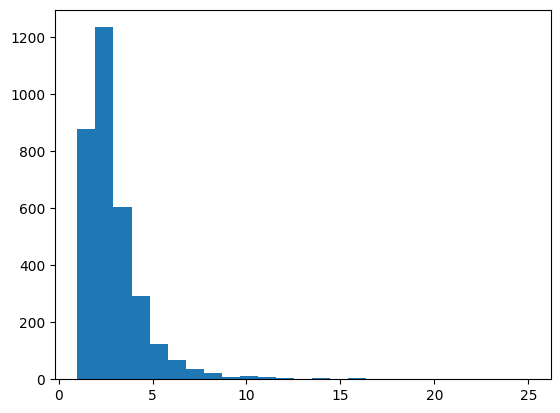

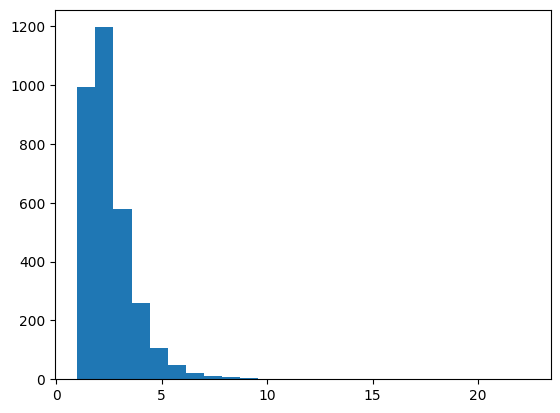

In [213]:
###distribution of relative lengths

Norm_trial_distance_early_allmice_all=np.concatenate(np.vstack(([performance_dic2['Norm_trial_distance_early'][mouse]\
for mouse in performance_dic2['Norm_trial_distance_early'].keys()])))

Norm_trial_distance_late_allmice_all=np.concatenate(np.vstack(([performance_dic2['Norm_trial_distance_late'][mouse]\
for mouse in performance_dic2['Norm_trial_distance_late'].keys()])))

plt.hist(Norm_trial_distance_early_allmice_all,bins=25)
plt.show()

plt.hist(Norm_trial_distance_late_allmice_all,bins=25)
plt.show()

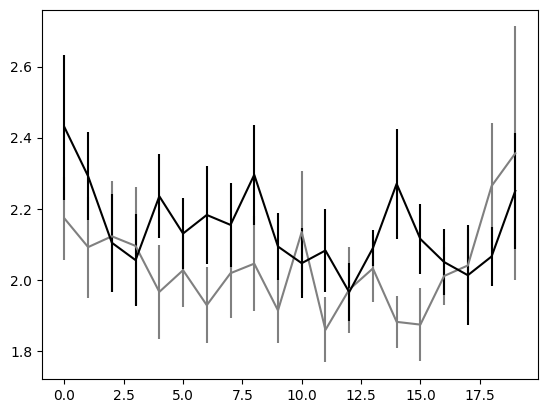

In [214]:
Norm_trial_distance_early_allmice=np.vstack(([np.nanmean(performance_dic2['Norm_trial_distance_early_end'][mouse],axis=0)\
for mouse in performance_dic2['Norm_trial_distance_early_end'].keys()]))

Norm_trial_distance_late_allmice=np.vstack(([np.nanmean(performance_dic2['Norm_trial_distance_late_end'][mouse],axis=0)\
for mouse in performance_dic2['Norm_trial_distance_late_end'].keys()]))


plt.errorbar(np.arange(num_trials_first),np.nanmean(Norm_trial_distance_early_allmice,axis=0),\
             st.sem(Norm_trial_distance_early_allmice,axis=0,nan_policy='omit'),color='grey')
plt.errorbar(np.arange(num_trials_first),np.nanmean(Norm_trial_distance_late_allmice,axis=0),\
             st.sem(Norm_trial_distance_late_allmice,axis=0,nan_policy='omit'),color='black')
plt.show()

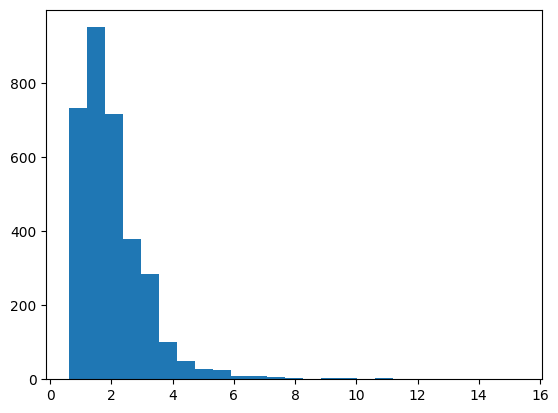

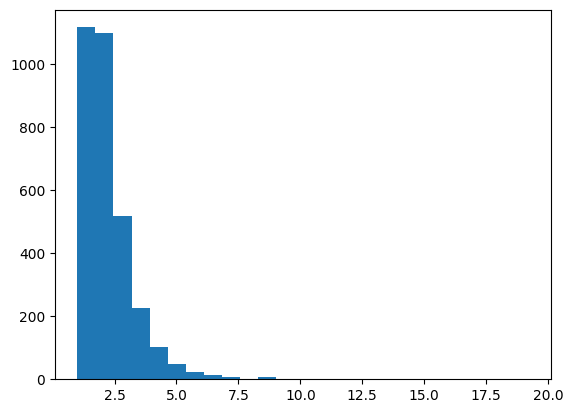

In [215]:
###distribution of relative lengths

Norm_trial_distance_early_allmice_all_end=np.concatenate(np.vstack(([performance_dic2['Norm_trial_distance_early_end']\
    [mouse] for mouse in performance_dic2['Norm_trial_distance_early_end'].keys()])))

Norm_trial_distance_late_allmice_all_end=np.concatenate(np.vstack(([performance_dic2['Norm_trial_distance_late_end']\
    [mouse] for mouse in performance_dic2['Norm_trial_distance_late_end'].keys()])))

plt.hist(Norm_trial_distance_early_allmice_all_end,bins=25)
plt.show()

plt.hist(Norm_trial_distance_late_allmice_all_end,bins=25)
plt.show()

In [216]:
##Proportion perfect trials last 20 trials
proportion_perfect_early_end=np.sum((remove_nan(Norm_trial_distance_early_allmice_all_end)==1))/\
len(remove_nan(Norm_trial_distance_late_allmice_all))

proportion_perfect_late_end=np.sum((remove_nan(Norm_trial_distance_late_allmice_all_end)==1))/\
len(remove_nan(Norm_trial_distance_late_allmice_all))

print(proportion_perfect_late_end)
print(proportion_perfect_early_end)

0.1038961038961039
0.21212121212121213


In [393]:
rec_days_



ab03_21112023_22112023
ab03_23112023_24112023
ah07_21112023_22112023
ah07_23112023_24112023


In [394]:
Tasknum_used_dic

defaultdict(<function mBaseFunctions.rec_dd()>,
            {'ab03_21112023_22112023': array([0, 1, 2, 3, 4]),
             'ab03_23112023_24112023': array([ 5,  6,  7,  8,  9, 10, 11, 12]),
             'ah07_21112023_22112023': array([0, 1, 2, 3, 4]),
             'ah07_23112023_24112023': array([ 5,  6,  7,  8,  9, 10])})

ab03_21112023_22112023
ab03_23112023_24112023
ah07_21112023_22112023
ah07_23112023_24112023


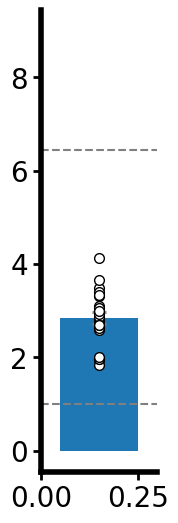

24
TtestResult(statistic=-29.969724351902485, pvalue=6.184269188316399e-20, df=23)


In [ ]:
'''
Import location per ABCDE day
Import trial times
unique adjacent
compare to minimum length
plot

'''

In [31]:
Ephys_mice

['ah02','ah05']

array(['ab03', 'ah02', 'ah03', 'ah04', 'ah05', 'ah07', 'me03', 'me08',
       'me10', 'me11'], dtype='<U4')

All


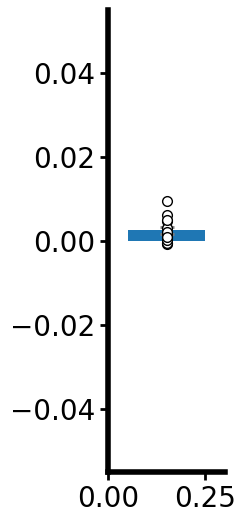

13
0.002473066217689177
TtestResult(statistic=2.914045263529364, pvalue=0.012983145515264709, df=12)


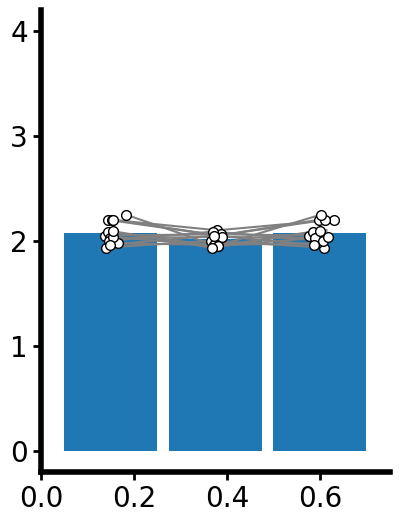

F_onewayResult(statistic=2.1187945941695814, pvalue=0.13491799293625514)
Early


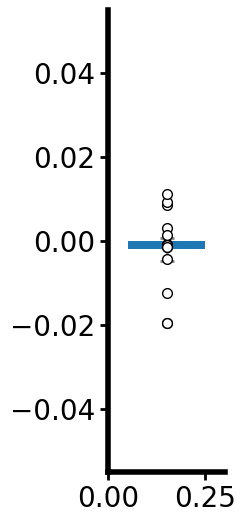

13
-0.0020668983686592214
TtestResult(statistic=-0.7498479526615647, pvalue=0.4677933392188076, df=12)


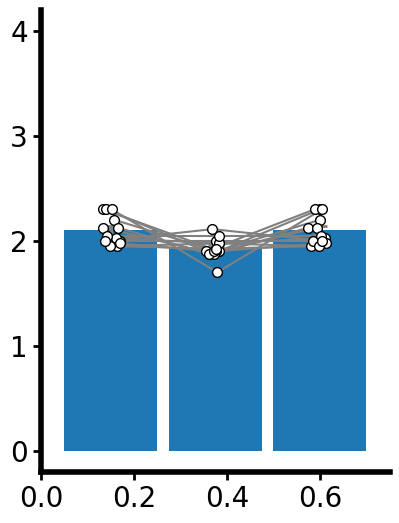

F_onewayResult(statistic=8.097507808018356, pvalue=0.0012477352379377906)
Late


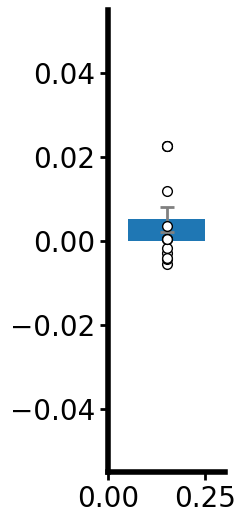

13
0.005092358299595126
TtestResult(statistic=1.6799115418073762, pvalue=0.11879896681316725, df=12)


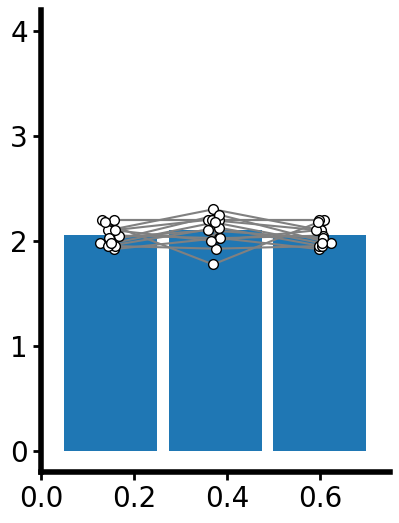

F_onewayResult(statistic=0.6362012620587446, pvalue=0.5351456953037248)
3_task


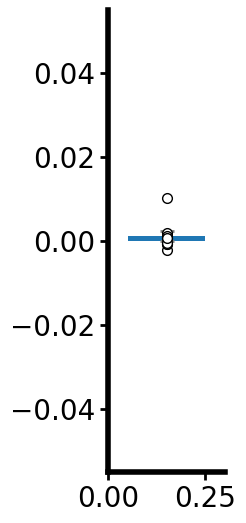

9
0.0011237684729063873
TtestResult(statistic=0.9409177673761123, pvalue=0.374286174128008, df=8)


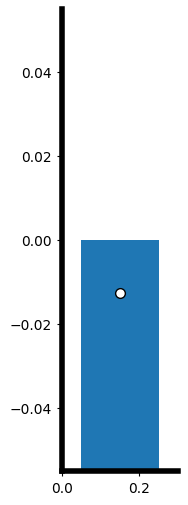

-0.084375
TtestResult(statistic=-7.714285714285719, pvalue=5.668149551101786e-05, df=8)


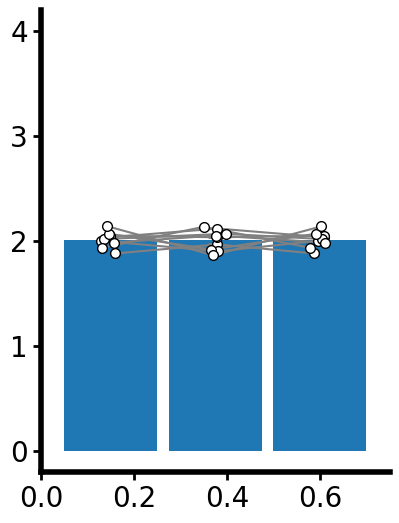

F_onewayResult(statistic=0.016840946084510783, pvalue=0.9833116791768263)
Neural_days


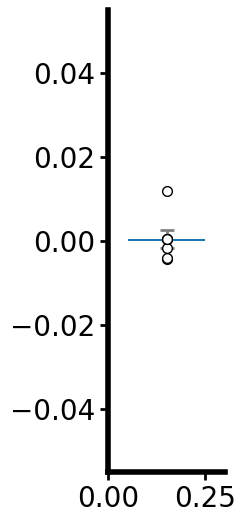

7
0.0004523026315789303
TtestResult(statistic=0.21884628217526544, pvalue=0.8340241248393409, df=6)


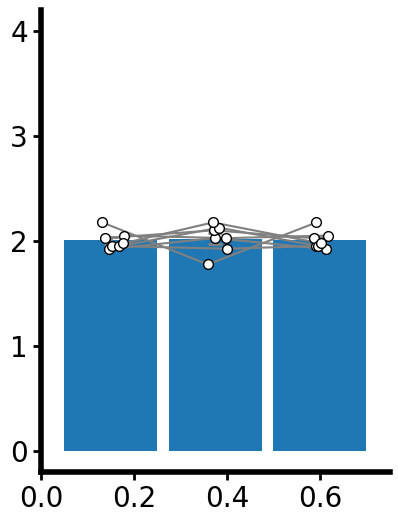

F_onewayResult(statistic=0.04721423705973351, pvalue=0.95400074661247)
Neural_cohort


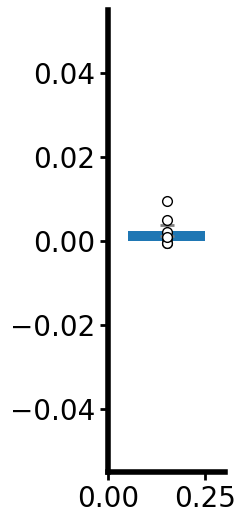

7
0.0024422534702139794
TtestResult(statistic=1.8110280696972956, pvalue=0.12010383723424457, df=6)


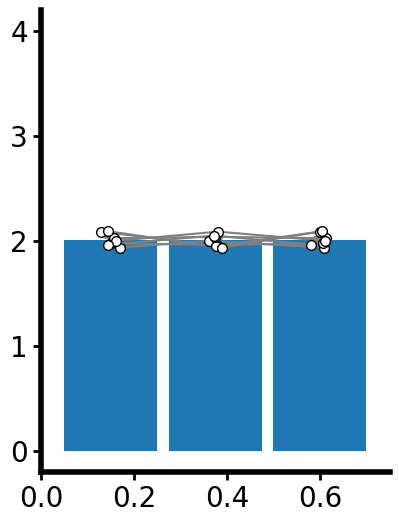

F_onewayResult(statistic=0.042571573820215515, pvalue=0.9584180630492694)
Neural_cohort_early


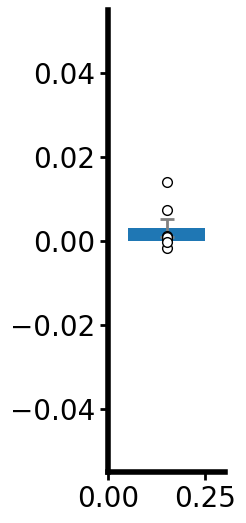

7
0.003114547628261813
TtestResult(statistic=1.4738440448344177, pvalue=0.1909590387049535, df=6)


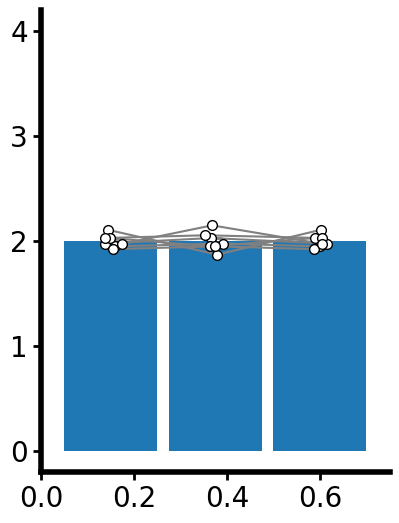

F_onewayResult(statistic=0.0005448601525607936, pvalue=0.9994553047400497)


In [37]:
###How correlated are the tasks?
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.anova import AnovaRM
from scipy.stats import tukey_hsd

num_nodes=9
num_states=4
use_sequence=True
use_shifted=True
remove_first2=False
abstract_structure='ABCD'

unrecorded_ephys_mice=['ah02','ah05']

for task_group in ['All','Early','Late','3_task','Neural_days','Neural_cohort','Neural_cohort_early']:
    print(task_group)
    Corrs_tasks_all=[]
    Corrs_tasks_perday_all=[]
    distances_mean_combined_all_all=[]
    distances_mean_combined_mouse_all=[]
    for mouse in Mice:
        cohort=Mice_cohort_dic[mouse]
        if cohort<=2:
            #continue
            num_tasks_mouse=10
        else:
            num_tasks_mouse=40
        multi_hot_array_all=[]
        
        if task_group=='All':
            tasks_used=np.arange(num_tasks_mouse)+1
            if remove_first2==True:
                tasks_used=tasks_used[2:]
        elif task_group=='Early':
            tasks_used=np.arange(num_tasks_mouse//2)+1
        elif task_group=='Late':
            tasks_used=np.arange(num_tasks_mouse//2)+num_tasks_mouse//2+1
        elif task_group=='3_task':
            tasks_used=np.arange(30)+11
            if cohort<=2:
                continue
        elif task_group=='Neural_days':
            tasks_used=np.arange(20)+21
            if cohort<=2 or mouse in unrecorded_ephys_mice:
                continue
                
        elif task_group=='Neural_cohort':
            tasks_used=np.arange(num_tasks_mouse)+1
            if cohort<=2 or mouse in unrecorded_ephys_mice:
                continue
                
        elif task_group=='Neural_cohort_early':
            tasks_used=np.arange(20)
            if cohort<=2 or mouse in unrecorded_ephys_mice:
                continue
                
        distances_mean_combined_all=[]
        for structure_num in tasks_used:

            if len(remove_empty(dict_to_array(structure_dic[mouse]['ABCD'][structure_num])))==0:
                continue
            structure=remove_empty(dict_to_array(structure_dic[mouse]['ABCD'][structure_num]))[0]
            if len(structure)==len(abstract_structure):
                
                if use_sequence==True:
                    multi_hot_array=np.zeros(num_nodes*num_states)

                    for state_ind in np.arange(num_states):
                        multi_hot_array[(structure[state_ind]-1).astype(int)+(state_ind*num_nodes)]=1
                else:
                    multi_hot_array=np.zeros(num_nodes)
                    multi_hot_array[(structure-1).astype(int)]=1

            multi_hot_array_all.append(multi_hot_array)
            
            distances_mean_combined=[]
            structure_=structure-1
            for task_distance in np.arange(3)+1:
                exec('distances_'+str(task_distance)+'=distances_=np.hstack(([distance_mat[structure_[ii],\
                np.roll(structure_,-task_distance)[ii]]for ii in range(len(structure_))]))')

                exec('distances_mean_'+str(task_distance)+'=distances_mean_=np.nanmean(distances_)')
                distances_mean_combined.append(distances_mean_)
            distances_mean_combined=np.hstack((distances_mean_combined))
            distances_mean_combined_all.append(distances_mean_combined)
            
        distances_mean_combined_all=np.vstack((distances_mean_combined_all))
        distances_mean_combined_mouse=np.nanmean(distances_mean_combined_all,axis=0)
        
        distances_mean_combined_all_all.append(distances_mean_combined_all)
        distances_mean_combined_mouse_all.append(distances_mean_combined_mouse)

        multi_hot_array_all=np.vstack((multi_hot_array_all))
        
        
        
        if use_shifted==True:
            corrs_all=[]
            for task_indX in np.arange(len(multi_hot_array_all)):
                for task_indY in np.arange(len(multi_hot_array_all)):
                    if task_indX==task_indY:
                        continue
                    for indx_roll in np.arange(num_states):
                        corr=st.pearsonr(multi_hot_array_all[task_indX],\
                                    np.roll(multi_hot_array_all[task_indY],num_nodes*indx_roll))[0]
                        corrs_all.append(corr)

            corrs_all=np.hstack((corrs_all))
            corrs_mean=np.nanmean(corrs_all)
            
        else:
            corrs_all=matrix_triangle(np.corrcoef(multi_hot_array_all))
            corrs_mean=np.nanmean(corrs_all)
        
        
        Corrs_tasks_all.append(corrs_mean)
        
        if cohort>2 and task_group=='3_task':
            day_corrs=[]
            for day in np.arange(10):
                
                multi_hot_array_day=multi_hot_array_all[3*day:3*(day+1)]
                if len(multi_hot_array_day)<2:
                    continue
                day_corr=matrix_triangle(np.corrcoef(multi_hot_array_day))
                day_corr_mean=np.nanmean(day_corr)
                day_corrs.append(day_corr_mean)

            Corrs_tasks_perday_all.append(np.nanmean(day_corrs))
    
    plt.rcParams["figure.figsize"] = (3,6)
    plt.rcParams['axes.linewidth'] = 4
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.bottom'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    
    bar_plotX([Corrs_tasks_all], 'none', -0.05, 0.05, 'points', 'paired', 0.025)
    plt.tick_params(axis='both',  labelsize=20)
    plt.tick_params(width=2, length=6)
    plt.savefig(Behaviour_output_folder_dropbox+'Task_correlation_'+task_group+'.svg')
    plt.show()
    print(len(Corrs_tasks_all))
    print(np.nanmean(Corrs_tasks_all))
    print(st.ttest_1samp(Corrs_tasks_all,0))
    
    if task_group=='3_task':
        bar_plotX([Corrs_tasks_perday_all], 'none', -0.05, 0.05, 'points', 'paired', 0.025)
        plt.show()
        print(np.nanmean(Corrs_tasks_perday_all))
        print(st.ttest_1samp(Corrs_tasks_perday_all,0))
    
    distances_mean_combined_all_all=np.vstack((distances_mean_combined_all_all))
    distances_mean_combined_mouse_all=np.vstack((distances_mean_combined_mouse_all))
    
    bar_plotX(distances_mean_combined_mouse_all.T,'none',0,4,'points','paired',0.025)
    plt.tick_params(axis='both',  labelsize=20)
    plt.tick_params(width=2, length=6)
    plt.savefig(Behaviour_output_folder_dropbox+'Taskspace_physicalspace_correlation_'+task_group+'.svg')
    plt.show()
    
    stats=st.f_oneway(remove_nan(distances_mean_combined_mouse_all[:,0]),\
                      remove_nan(distances_mean_combined_mouse_all[:,1]),\
                      remove_nan(distances_mean_combined_mouse_all[:,2]))
    print(stats)
    

In [37]:
multi_hot_array
num_states=4
multi_hot_array=np.zeros(num_nodes*num_states)

for state_ind in np.arange(num_states):
    multi_hot_array[(structure[state_ind]-1).astype(int)+(state_ind*num_nodes)]=1

In [63]:
np.roll(multi_hot_array_all[task_indY],num_nodes*indx_roll)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1.])

In [64]:
len(multi_hot_array_all[task_indY])

36

In [43]:
multi_hot_array_all=np.vstack((multi_hot_array_all))
        all_corr=matrix_triangle(np.corrcoef(multi_hot_array_all))

array([0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [59]:
corrs_all=[]
for task_indX in np.arange(len(multi_hot_array_all)):
    for task_indY in np.arange(len(multi_hot_array_all)):
        if task_indX==task_indY:
            continue
        for indx_roll in np.arange(num_states):
            corr=st.pearsonr(multi_hot_array_all[task_indX],\
                        np.roll(multi_hot_array_all[task_indY],num_nodes*indx_roll))[0]
            corrs_all.append(corr)
                
corrs_all=np.hstack((corrs_all))
corrs_mean=np.nanmean(corrs_all)

In [58]:
corrs_all

array([-0.125  ,  0.15625, -0.125  , ..., -0.125  , -0.125  , -0.125  ])

PearsonRResult(statistic=6.044427111606687e-18, pvalue=1.0)

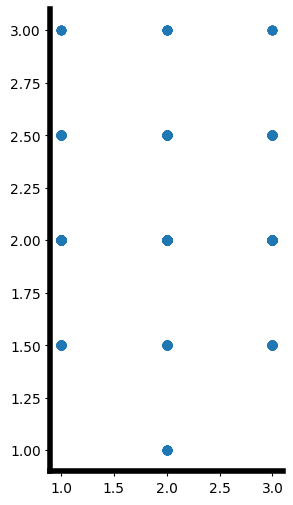

In [228]:
x=np.hstack((np.tile(np.arange(3)+1,len(distances_mean_combined_all_all))\
             .reshape(len(distances_mean_combined_all_all),3)))
y=np.hstack((distances_mean_combined_all_all))

plt.scatter(x,y)
st.pearsonr(x,y)

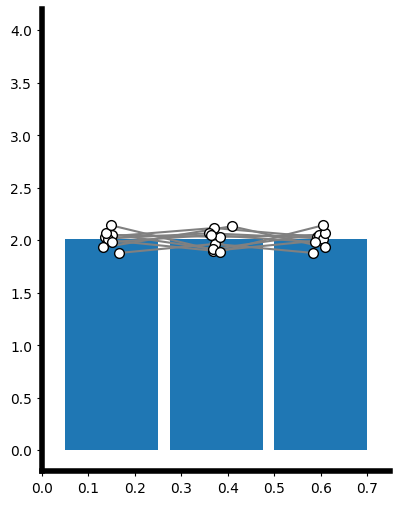

In [229]:
bar_plotX(distances_mean_combined_mouse_all.T,'none',0,4,'points','paired',0.025)

C:\Users\moham\AppData\Local\Temp\ipykernel_28064\2447472545.py:7: RuntimeWarning: Mean of empty slice
  mean_firstN_=np.nanmean(np.nanmean(performance_dic[mouse],axis=1),axis=1)
C:\Users\moham\AppData\Local\Temp\ipykernel_28064\2447472545.py:20: RuntimeWarning: Mean of empty slice
  mean_per_mouse=np.nanmean(mean_firstN_all[:,bin_*factor_perf:(bin_+1)*factor_perf],axis=1)


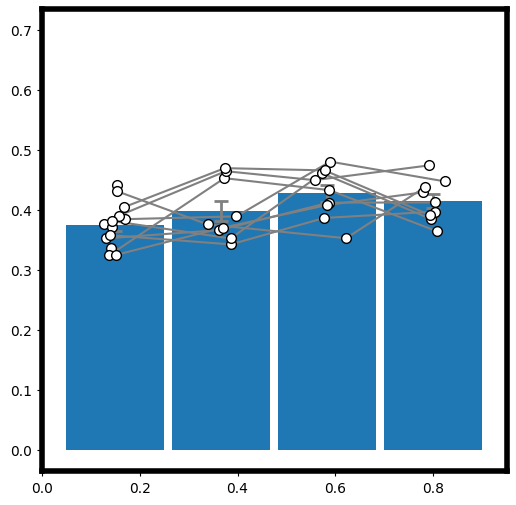

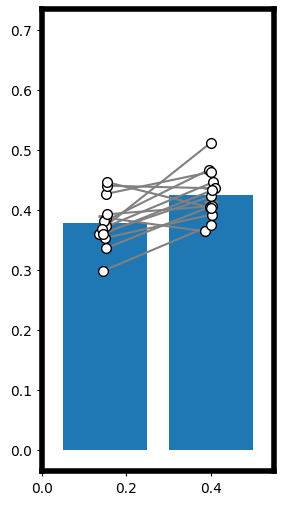

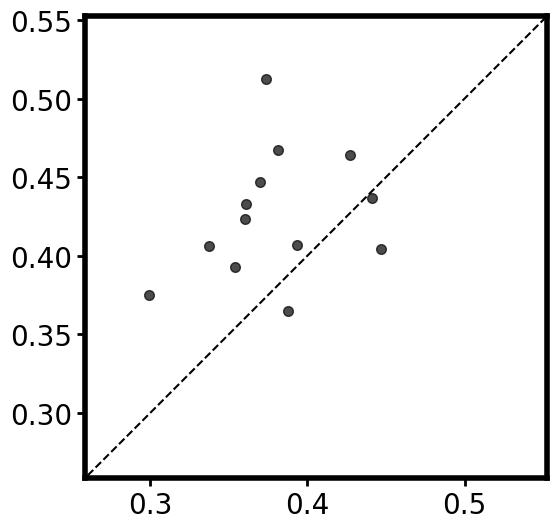

WilcoxonResult(statistic=10.0, pvalue=0.010498046875)


C:\Users\moham\AppData\Local\Temp\ipykernel_28064\2447472545.py:43: RuntimeWarning: Mean of empty slice
  early_task_timeline=np.asarray([np.nanmean(np.nanmean(performance_dic[mouse][:20],axis=2),axis=0) for mouse in Mice])
C:\Users\moham\AppData\Local\Temp\ipykernel_28064\2447472545.py:44: RuntimeWarning: Mean of empty slice
  late_task_timeline=np.asarray([np.nanmean(np.nanmean(performance_dic[mouse][20:],axis=2),axis=0) for mouse in Mice])


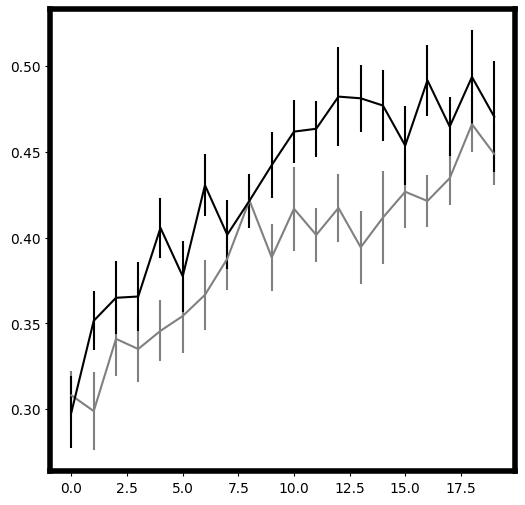

In [402]:

mean_firstN_all=np.zeros((len(Mice),40))
mean_firstN_all[:]=np.nan

mean_earlylate_all=np.zeros((len(Mice),2))
mean_earlylate_all[:]=np.nan
for mouse_ind, mouse in enumerate(Mice):
    mean_firstN_=np.nanmean(np.nanmean(performance_dic[mouse],axis=1),axis=1)
    mean_firstN=np.hstack((mean_firstN_,np.repeat(np.nan,40-len(mean_firstN_))))
    mean_firstN_all[mouse_ind]=mean_firstN
    
    early_tasks_mean=np.nanmean(performance_dic['Early_tasks'][mouse])
    late_tasks_mean=np.nanmean(performance_dic['Late_tasks'][mouse])
    mean_earlylate_all[mouse_ind]=np.asarray([early_tasks_mean,late_tasks_mean])
    
num_bins_perf=4
factor_perf=int(40/num_bins_perf)
binned_perf=np.zeros((len(Mice),num_bins_perf))
binned_perf[:]=np.nan
for bin_ in np.arange(num_bins_perf):
    mean_per_mouse=np.nanmean(mean_firstN_all[:,bin_*factor_perf:(bin_+1)*factor_perf],axis=1)
    binned_perf[:,bin_]=mean_per_mouse
    
bar_plotX(binned_perf.T,'none',0,0.7,'points','paired',0.025)
plt.show()

bar_plotX(mean_earlylate_all.T,'none',0,0.7,'points','paired',0.025)
plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_bar.svg')
plt.show()

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True

noplot_scatter(mean_earlylate_all[:,0],mean_earlylate_all[:,1],color='black')
plt.gca().set_aspect('equal', adjustable='box')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_scatter.svg')
plt.show()
print(st.wilcoxon(mean_earlylate_all[:,0],mean_earlylate_all[:,1]))

early_task_timeline=np.asarray([np.nanmean(np.nanmean(performance_dic[mouse][:20],axis=2),axis=0) for mouse in Mice])
late_task_timeline=np.asarray([np.nanmean(np.nanmean(performance_dic[mouse][20:],axis=2),axis=0) for mouse in Mice])

plt.errorbar(np.arange(num_trials_first),np.nanmean(early_task_timeline,axis=0),st.sem(early_task_timeline,axis=0,\
                                                                                       nan_policy='omit'),color='grey')
plt.errorbar(np.arange(num_trials_first),np.nanmean(late_task_timeline,axis=0),st.sem(late_task_timeline,axis=0,\
                                                                                     nan_policy='omit'),color='black')
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_28064\244432371.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rel_dist_first_=np.asarray([reldist_dic[mouse][:,0] for mouse in Mice])
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy

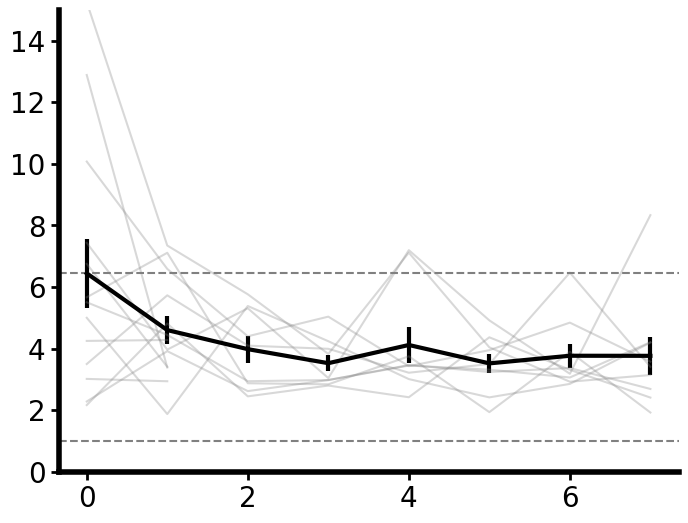

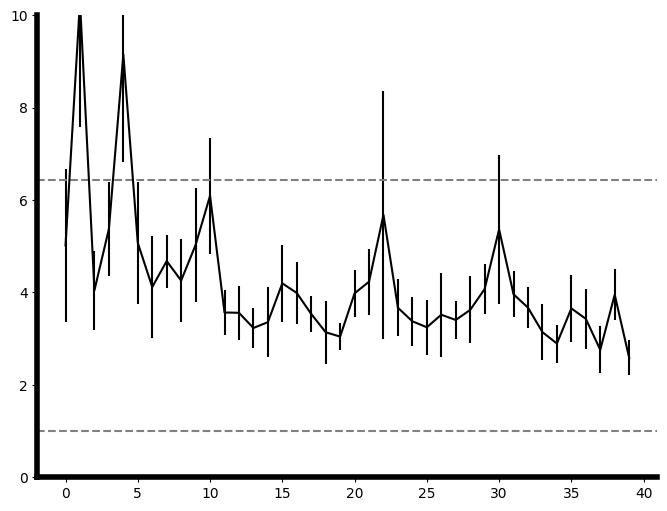

In [417]:
rel_dist_first_=np.asarray([reldist_dic[mouse][:,0] for mouse in Mice])
rel_dist_first=np.vstack(([np.hstack((rel_dist_first_[ii],np.repeat(np.nan,int(40-len(rel_dist_first_[ii])))))\
 for ii in range(len(rel_dist_first_))]))



factor=5
bins=np.arange(len(rel_dist_first.T)//factor+1)*factor
rel_dist_first_binned=np.vstack(([st.binned_statistic(np.arange(len(rel_dist_first.T)),rel_dist_first[ii],\
                            bins=bins,statistic=np.nanmean)[0] for ii in np.arange(len(rel_dist_first))]))
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.errorbar(np.arange(len(rel_dist_first_binned.T)),np.nanmean(rel_dist_first_binned,axis=0),\
             st.sem(rel_dist_first_binned,axis=0,nan_policy='omit'),color='black',linewidth=3)
plt.plot(rel_dist_first_binned.T,color='grey',alpha=0.3)
chance=np.nanmean(rel_dist_first_binned,axis=0)[0]
plt.axhline(chance,ls='dashed',color='grey')
plt.axhline(1,ls='dashed',color='grey')
plt.ylim(0,15)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)

plt.savefig(Behaviour_output_folder_dropbox+'Firsttrial_timeline_distances.svg')
plt.show()

plt.errorbar(np.arange(len(rel_dist_first.T)),np.nanmean(rel_dist_first,axis=0),st.sem(rel_dist_first,axis=0,\
                                                                                      nan_policy='omit'),color='black')

plt.axhline(chance,ls='dashed',color='grey')
plt.axhline(1,ls='dashed',color='grey')
plt.ylim(0,10)
plt.show()

In [420]:
rel_dist_first_binned

array([[12.88333333,  3.3875    ,         nan,         nan,         nan,
                nan,         nan,         nan],
       [ 3.01666667,  2.94      ,         nan,         nan,         nan,
                nan,         nan,         nan],
       [ 4.25      ,  4.28      ,         nan,         nan,         nan,
                nan,         nan,         nan],
       [ 6.75      ,  3.41      ,         nan,         nan,         nan,
                nan,         nan,         nan],
       [ 5.50416667,  4.44444444,  2.94166667,  2.97916667,  3.45      ,
         3.31666667,  3.0625    ,  4.20833333],
       [15.25      ,  7.34666667,  5.76333333,  3.82666667,  7.115     ,
         4.04166667,  2.925     ,  3.14166667],
       [10.07333333,  6.5875    ,  4.4       ,  5.0375    ,  3.43      ,
         3.95      ,  4.84333333,  3.57666667],
       [ 5.66666667,  7.11111111,  2.875     ,  2.84      ,  3.75      ,
         1.9375    ,  3.89666667,  1.925     ],
       [ 2.28333333,  3.91666667

In [424]:
###note - stats only on mice that spanned full 40 tasks
rel_dist_first_complete=rel_dist_first_binned[4:]
Distance=np.hstack((rel_dist_first_complete))
Mouse=np.repeat(np.arange(len(rel_dist_first_complete)),np.shape(rel_dist_first_complete)[1])
Task=np.tile(np.arange(np.shape(rel_dist_first_complete)[1]),np.shape(rel_dist_first_complete)[0])


dataframe = pd.DataFrame({'Mouse': Mouse,
                          'Task': Task,
                         'Distance':Distance})

for key_ in ['Mouse','Task','Distance']:
    dataframe[[key_]] = dataframe[[key_]].astype(int)



# Compute the 1-way repeated measures ANOVA. This will return a dataframe.
pg.rm_anova(dv='Distance', within=['Task'], subject='Mouse', data=dataframe)

# Optional post-hoc tests
#pg.pairwise_ttests(dv='Distance', within=['Task'], subject='Mouse', data=dataframe)

#dataframe.rm_anova(dv='Distance', within=['Task'], subject='Mouse')

Source  ddof1  ddof2        F     p-unc  p-GG-corr       np2      eps  \
0   Task      7     56  2.73225  0.016389    0.08175  0.254583  0.34512   

   sphericity   W-spher   p-spher  
0       False  0.000247  0.035761

C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1891355651.py:7: RuntimeWarning: Mean of empty slice
  mean_firstN_=np.nanmean(reldist_dic[mouse],axis=1)
C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1891355651.py:20: RuntimeWarning: Mean of empty slice
  mean_per_mouse=np.nanmean(mean_firstN_all[:,bin_*factor_perf:(bin_+1)*factor_perf],axis=1)


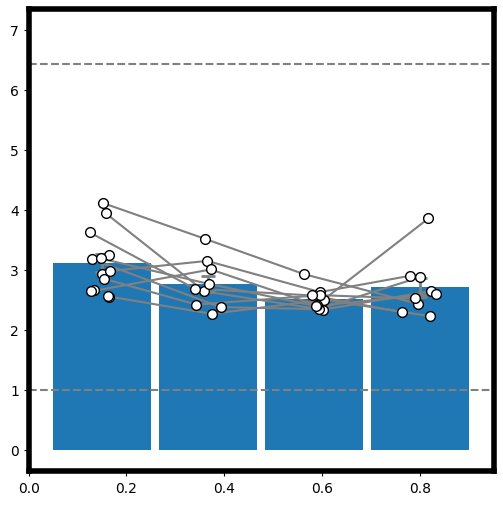

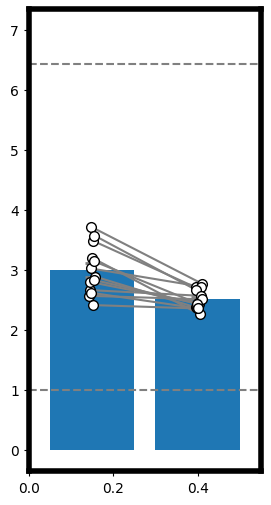

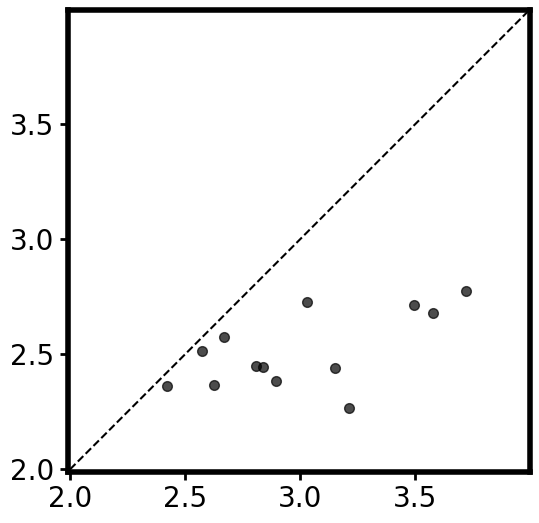

WilcoxonResult(statistic=0.0, pvalue=0.000244140625)


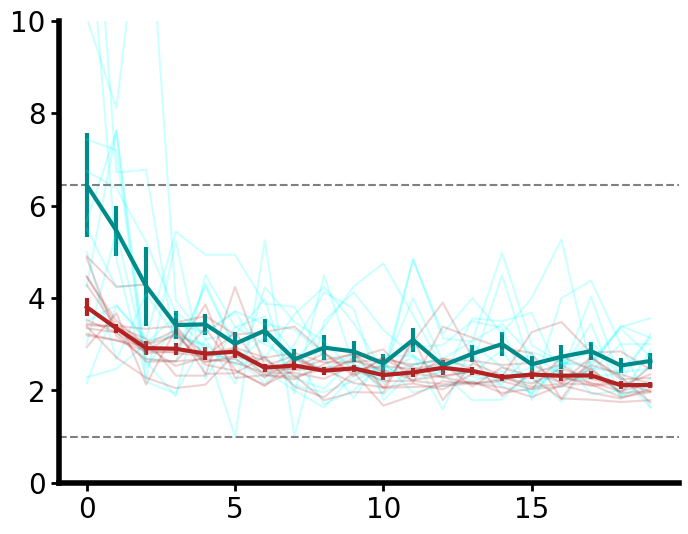

In [403]:
mean_firstN_all=np.zeros((len(Mice),40))
mean_firstN_all[:]=np.nan

mean_earlylate_all=np.zeros((len(Mice),2))
mean_earlylate_all[:]=np.nan
for mouse_ind, mouse in enumerate(Mice):
    mean_firstN_=np.nanmean(reldist_dic[mouse],axis=1)
    mean_firstN=np.hstack((mean_firstN_,np.repeat(np.nan,40-len(mean_firstN_))))
    mean_firstN_all[mouse_ind]=mean_firstN
    
    early_tasks_mean=np.nanmean(reldist_dic['Early_tasks'][mouse])
    late_tasks_mean=np.nanmean(reldist_dic['Late_tasks'][mouse])
    mean_earlylate_all[mouse_ind]=np.asarray([early_tasks_mean,late_tasks_mean])
    
num_bins_perf=4
factor_perf=int(40/num_bins_perf)
binned_perf=np.zeros((len(Mice),num_bins_perf))
binned_perf[:]=np.nan
for bin_ in np.arange(num_bins_perf):
    mean_per_mouse=np.nanmean(mean_firstN_all[:,bin_*factor_perf:(bin_+1)*factor_perf],axis=1)
    binned_perf[:,bin_]=mean_per_mouse
    
bar_plotX(binned_perf.T,'none',0,7,'points','paired',0.025)
plt.axhline(chance,ls='dashed',color='grey')
plt.axhline(1,ls='dashed',color='grey')
#plt.savefig(Behaviour_output_folder_dropbox+'last_20_reldist.svg')
plt.show()

bar_plotX(mean_earlylate_all.T,'none',0,7,'points','paired',0.025)
plt.axhline(chance,ls='dashed',color='grey')
plt.axhline(1,ls='dashed',color='grey')

plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_reldist_bar.svg')
plt.show()

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True

noplot_scatter(mean_earlylate_all[:,0],mean_earlylate_all[:,1],color='black')
plt.gca().set_aspect('equal', adjustable='box')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_reldist_scatter.svg')

plt.show()
print(st.wilcoxon(mean_earlylate_all[:,0],mean_earlylate_all[:,1]))

early_task_timeline=np.asarray([np.nanmean(reldist_dic[mouse][:5],axis=0) for mouse in Mice])
late_task_timeline=np.asarray([np.nanmean(reldist_dic[mouse][5:],axis=0) for mouse in Mice])

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.errorbar(np.arange(num_trials_first),np.nanmean(early_task_timeline,axis=0),st.sem(early_task_timeline,axis=0,\
                                                                nan_policy='omit'),color='darkcyan',linewidth=3)
plt.errorbar(np.arange(num_trials_first),np.nanmean(late_task_timeline,axis=0),st.sem(late_task_timeline,axis=0,\
                                                                nan_policy='omit'),color='firebrick',linewidth=3)

plt.plot(early_task_timeline.T,color='cyan',alpha=0.2)
plt.plot(late_task_timeline.T,color='firebrick',alpha=0.2)

plt.axhline(chance,ls='dashed',color='grey')
plt.axhline(1,ls='dashed',color='grey')
plt.ylim(0,10)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_timeline_distances.svg')
plt.show()

In [415]:
Distance=np.hstack((np.hstack((early_task_timeline)),np.hstack((late_task_timeline))))
Mouse=np.tile(np.repeat(np.arange(len(Mice)),np.shape(late_task_timeline)[1]),2)
Trial=np.tile(np.tile(np.arange(num_trials_first),np.shape(late_task_timeline)[0]),2)
Task=np.repeat(np.arange(2),len(np.hstack((late_task_timeline))))


dataframe = pd.DataFrame({'Mouse': Mouse,
                          'Trial': Trial,
                          'Task': Task,\
                         'Distance':Distance})

import pingouin as pg

# Compute the 2-way repeated measures ANOVA. This will return a dataframe.
pg.rm_anova(dv='Distance', within=['Trial','Task'], subject='Mouse', data=dataframe)

# Optional post-hoc tests
#pg.pairwise_ttests(dv='Distance', within=['Trial','Task'], subject='Mouse', data=dataframe)

#dataframe.rm_anova(dv='Distance', within=['Trial','Task'], subject='Mouse')

Source          SS  ddof1  ddof2         MS          F         p-unc  \
0         Trial  247.857302     19    228  13.045121  11.672109  2.209850e-24   
1          Task   58.525733      1     12  58.525733  34.992994  7.081046e-05   
2  Trial * Task   52.905781     19    228   2.784515   2.986745  5.537347e-05   

   p-GG-corr       np2       eps  
0   0.000015  0.493074  0.160223  
1   0.000071  0.744643  1.000000  
2   0.030348  0.199292  0.200613

In [ ]:
'''
animals perform well on very first trial of late tasks

is this purely because of zeroshot (DA)? or also because other transitions are above chance? - 
-look at distances of other transitions
if latter , is it because less likely to return to re-visit previously rewarded locations-
-quantify all visits to previous locations

'''

C:\Users\moham\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


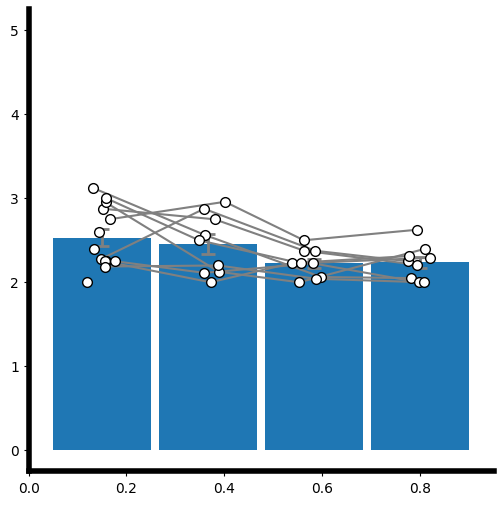

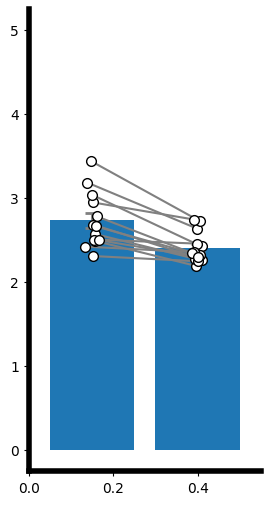

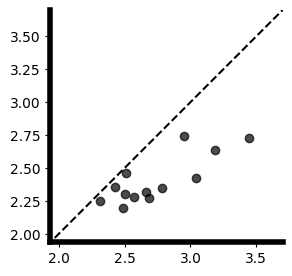

WilcoxonResult(statistic=0.0, pvalue=0.000244140625)


In [237]:
median_firstN_all=np.zeros((len(Mice),40))
median_firstN_all[:]=np.nan

median_earlylate_all=np.zeros((len(Mice),2))
median_earlylate_all[:]=np.nan
for mouse_ind, mouse in enumerate(Mice):
    median_firstN_=np.nanmedian(reldist_dic[mouse],axis=1)
    median_firstN=np.hstack((median_firstN_,np.repeat(np.nan,40-len(median_firstN_))))
    median_firstN_all[mouse_ind]=median_firstN
    
    early_tasks_median=np.nanmedian(reldist_dic['Early_tasks'][mouse])
    late_tasks_median=np.nanmedian(reldist_dic['Late_tasks'][mouse])
    median_earlylate_all[mouse_ind]=np.asarray([early_tasks_median,late_tasks_median])
    
num_bins_perf=4
factor_perf=int(40/num_bins_perf)
binned_perf=np.zeros((len(Mice),num_bins_perf))
binned_perf[:]=np.nan
for bin_ in np.arange(num_bins_perf):
    median_per_mouse=np.nanmedian(median_firstN_all[:,bin_*factor_perf:(bin_+1)*factor_perf],axis=1)
    binned_perf[:,bin_]=median_per_mouse
    
bar_plotX(binned_perf.T,'none',0,5,'points','paired',0.025)
plt.savefig(Behaviour_output_folder_dropbox+'last_20_reldist_median.svg')
plt.show()

bar_plotX(median_earlylate_all.T,'none',0,5,'points','paired',0.025)
#plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_reldist_median_bar.svg')
plt.show()
noplot_scatter(median_earlylate_all[:,0],median_earlylate_all[:,1],color='black')
plt.gca().set_aspect('equal', adjustable='box')
#plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_reldist_median_scatter.svg')
plt.show()
print(st.wilcoxon(median_earlylate_all[:,0],median_earlylate_all[:,1]))

C:\Users\moham\AppData\Local\Temp\ipykernel_28064\2565396747.py:7: RuntimeWarning: All-NaN slice encountered
  min_firstN_=np.nanmin(reldist_dic[mouse],axis=1)
C:\Users\moham\AppData\Local\Temp\ipykernel_28064\2565396747.py:20: RuntimeWarning: All-NaN slice encountered
  min_per_mouse=np.nanmin(min_firstN_all[:,bin_*factor_perf:(bin_+1)*factor_perf],axis=1)


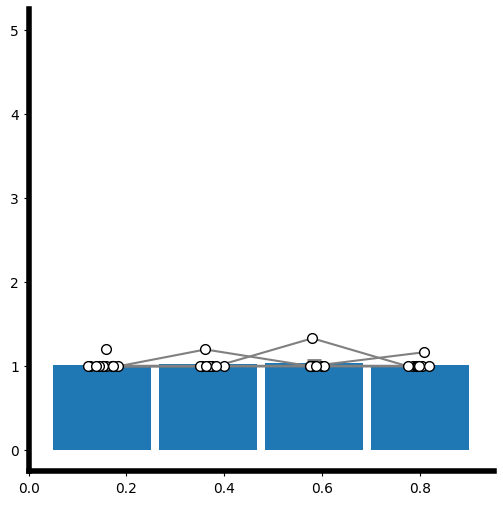

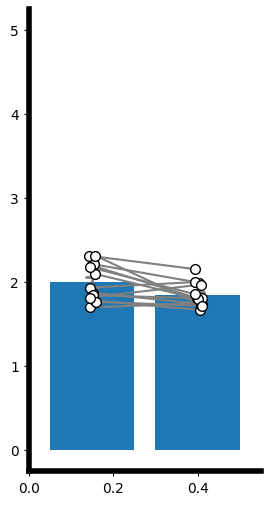

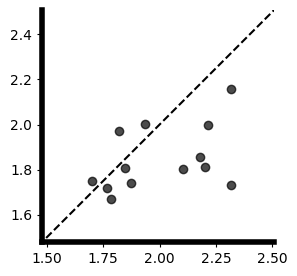

WilcoxonResult(statistic=14.0, pvalue=0.026611328125)


In [238]:
min_firstN_all=np.zeros((len(Mice),40))
min_firstN_all[:]=np.nan

min_earlylate_all=np.zeros((len(Mice),2))
min_earlylate_all[:]=np.nan
for mouse_ind, mouse in enumerate(Mice):
    min_firstN_=np.nanmin(reldist_dic[mouse],axis=1)
    min_firstN=np.hstack((min_firstN_,np.repeat(np.nan,40-len(min_firstN_))))
    min_firstN_all[mouse_ind]=min_firstN
    
    early_tasks_min=np.nanmin(reldist_dic['Early_tasks'][mouse])
    late_tasks_min=np.nanmin(reldist_dic['Late_tasks'][mouse])
    min_earlylate_all[mouse_ind]=np.asarray([early_tasks_min,late_tasks_min])
    
num_bins_perf=4
factor_perf=int(40/num_bins_perf)
binned_perf=np.zeros((len(Mice),num_bins_perf))
binned_perf[:]=np.nan
for bin_ in np.arange(num_bins_perf):
    min_per_mouse=np.nanmin(min_firstN_all[:,bin_*factor_perf:(bin_+1)*factor_perf],axis=1)
    binned_perf[:,bin_]=min_per_mouse
    
bar_plotX(binned_perf.T,'none',0,5,'points','paired',0.025)
plt.show()

bar_plotX(min_earlylate_all.T,'none',0,5,'points','paired',0.025)
plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_reldist_min_bar.svg')
plt.show()
noplot_scatter(min_earlylate_all[:,0],min_earlylate_all[:,1],color='black')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_reldist_min_scatter.svg')
plt.show()
print(st.wilcoxon(min_earlylate_all[:,0],min_earlylate_all[:,1]))

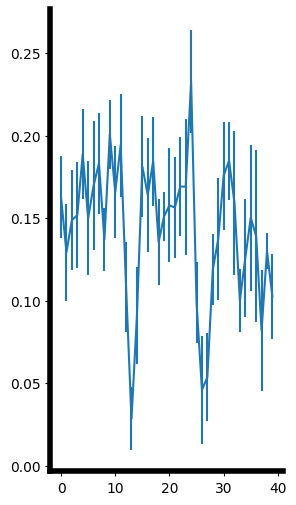

C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))


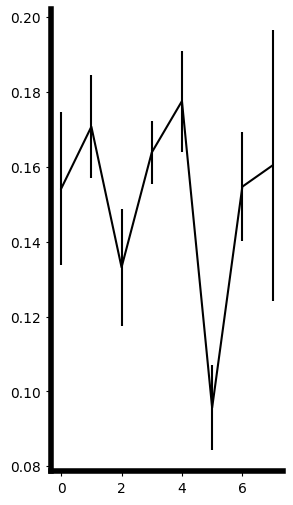

In [240]:
Prop_firsttrial_all=np.vstack(([np.hstack((np.asarray(dict_to_array(Nodes_trials_dic\
                                                                    ['Prop_outofturn_rewardvisits_firsttrial']\
                                                         [mouse])[:40]),\
                np.repeat(np.nan,\
                int(40-len(dict_to_array(Nodes_trials_dic['Prop_outofturn_rewardvisits_firsttrial'][mouse])[:40])))))\
                for mouse in Mice]))

plt.errorbar(np.arange(40),np.nanmean(Prop_firsttrial_all,axis=0),\
             yerr=st.sem(Prop_firsttrial_all,axis=0,nan_policy='omit'))
plt.show()
Prop_firsttrial_all_binned=bin_arrayX(Prop_firsttrial_all,5)

plt.errorbar(np.arange(len(Prop_firsttrial_all_binned.T)),np.nanmean(Prop_firsttrial_all_binned,axis=0),\
             st.sem(Prop_firsttrial_all_binned,axis=0,nan_policy='omit'),color='black')
#plt.ylim(0,10)
#plt.savefig(Behaviour_output_folder_dropbox+'EarlyvsLate_timeline_distances.svg')
plt.savefig(Behaviour_output_folder_dropbox+'Firsttrial_outofturn_props.svg')
plt.show()

In [ ]:
Prop_firsttrial_all_binned

In [ ]:
np.shape(rel_dist_first_complete)

In [241]:
###note - stats only on mice that spanned full 40 tasks
rel_dist_first_complete=Prop_firsttrial_all_binned[4:,:-1]
Distance=np.hstack((rel_dist_first_complete))
Mouse=np.repeat(np.arange(len(rel_dist_first_complete)),np.shape(rel_dist_first_complete)[1])
Task=np.tile(np.arange(np.shape(rel_dist_first_complete)[1]),np.shape(rel_dist_first_complete)[0])


dataframe = pd.DataFrame({'Mouse': Mouse,
                          'Task': Task,
                         'Distance':Distance})

for key_ in ['Mouse','Task','Distance']:
    dataframe[[key_]] = dataframe[[key_]].astype(int)



# Compute the 1-way repeated measures ANOVA. This will return a dataframe.
pg.rm_anova(dv='Distance', within=['Task'], subject='Mouse', data=dataframe)

# Optional post-hoc tests
#pg.pairwise_ttests(dv='Distance', within=['Task'], subject='Mouse', data=dataframe)

dataframe.rm_anova(dv='Distance', within=['Task'], subject='Mouse')

C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\pingouin\parametric.py:554: RuntimeWarning: invalid value encountered in double_scalars
  fval = ms_with / ms_reswith
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\pingouin\parametric.py:563: RuntimeWarning: invalid value encountered in double_scalars
  ef = ss_with / (ss_with + ss_reswith)
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\pingouin\distribution.py:946: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\pingouin\distribution.py:682: RuntimeWarning: invalid value encountered in double_scalars
  eps = np.min([num / den, 1])
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\pingouin\parametric.py:554: RuntimeWarning: invalid value encountered in double_scalars
  fval = ms_with / ms_reswith
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\pingouin\parame

Source  ddof1  ddof2
0   Task      6     48

In [319]:
###Final performance calculation
performance_last_dic=rec_dd()
reldist_last_dic=rec_dd()
num_trials_last=20
num_states=len(states)
for mouse in Mice:
    print(mouse)
    cohort=Mice_cohort_dic[mouse]
    if cohort<=2:
        num_tasks_mouse=10
    else:
        num_tasks_mouse=40

    excluded_tasks=exclusions_dic[mouse]

    performance_array=np.zeros((num_tasks_mouse,num_trials_last,num_states))
    performance_array[:]=np.nan
    
    relative_distance_array=np.zeros((num_tasks_mouse,num_trials_last))
    relative_distance_array[:]=np.nan
    for task_num in np.arange(num_tasks_mouse):
        print(task_num+1)
        try:
            sessions=np.sort(list(scores_dic[mouse][task_num+1]['ALL'].keys()))
            Num_trials_allses=Num_trials_dic[mouse][task_num+1]
            num_Num_trials_allses=len(Num_trials_allses)

            scores_all=[]
            for session_ind, session in enumerate(sessions):
                if session_ind+1>num_Num_trials_allses:
                    print('Note: mismatch between num sessions in Num_trials_dic and scores_dic')
                    continue
                scores_session=scores_dic[mouse][task_num+1]['ALL'][session]
                if len(scores_session)>0:
                    scores_all.append(scores_session)

            scores_all=np.vstack((scores_all))
            scores_N=scores_all[-num_trials_last:]
            if len(scores_N)<num_trials_last:
                added_array=np.zeros((num_trials_last-len(scores_N),4))
                added_array[:]=np.nan
                scores_N=np.vstack((added_array,scores_N))
            performance_array[task_num]=scores_N
            
            
            
            
            ###distances
            dists_task_=dict_to_array(scores_dic['dists'][mouse][task_num+1]['ALL'])
            if len(dists_task_)==1:
                dists_task=np.vstack((dists_task_))
            else:
                if len(dists_task_[1])==0:
                    dists_task=dists_task_[0]
                else:
                    dists_task=np.vstack((dists_task_))
            
            min_dists_task=dict_to_array(scores_dic['mindist'][mouse][task_num+1]['ALL'])[0]
            
            min_dists_task_sum=np.sum(min_dists_task)
            if min_dists_task_sum==0:
                min_dists_task_sum=np.nan
            relative_dists_task=(np.sum(dists_task,axis=1)/min_dists_task_sum)[-num_trials_last:]
            if len(relative_dists_task)<num_trials_last:
                added_array=np.zeros((num_trials_last-len(relative_dists_task)))
                added_array[:]=np.nan
                relative_dists_task=np.concatenate((added_array,relative_dists_task))
            
            relative_distance_array[task_num]=relative_dists_task
            
        except Exception as e:
            print('Not calculated - non-existent')
            print(e)
            exc_type, exc_obj, exc_tb = sys.exc_info()
            fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
            print(exc_type, fname, exc_tb.tb_lineno)

    early_tasks=np.nanmean(performance_array[:num_tasks_mouse//2],axis=0)
    late_tasks=np.nanmean(performance_array[num_tasks_mouse//2:],axis=0)
    
    early_tasks_reldists=np.nanmean(relative_distance_array[:num_tasks_mouse//2],axis=0)
    late_tasks_reldists=np.nanmean(relative_distance_array[num_tasks_mouse//2:],axis=0)

    performance_last_dic[mouse]=performance_array
    performance_last_dic['Early_tasks'][mouse]=early_tasks
    performance_last_dic['Late_tasks'][mouse]=late_tasks
    
    reldist_last_dic[mouse]=relative_distance_array
    reldist_last_dic['Early_tasks'][mouse]=early_tasks_reldists
    reldist_last_dic['Late_tasks'][mouse]=late_tasks_reldists

me03
1
Not calculated - non-existent
all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 5 has size 0
<class 'ValueError'> 3795838254.py 56
2
3
4
5
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Not calculated - non-existent
all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 4
<class 'ValueError'> 3795838254.py 56
6
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Note: mismatch between num sessions in Num_trials_dic and scores_dic
7
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Note: mismatch between num sessions in Num_trials_dic and scores_dic
8
Note: mismatch between

C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1347984989.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(dictlist))


C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1336863480.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rel_dist_first_=np.asarray([reldist_dic[mouse][:,0] for mouse in Mice])
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\sci

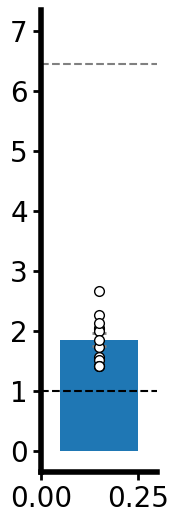

TtestResult(statistic=-43.199556813253636, pvalue=1.5386458133580157e-14, df=12)
6.444423076923077


In [414]:
mean_last_trials=np.hstack(([np.nanmean(reldist_last_dic[mouse][:10]) for mouse in Mice]))

plt.rcParams["figure.figsize"] = (4,8)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

bar_plotX([mean_last_trials],'none', 0, 7, 'points', 'paired', 0.025)


rel_dist_first_=np.asarray([reldist_dic[mouse][:,0] for mouse in Mice])
rel_dist_first=np.vstack(([np.hstack((rel_dist_first_[ii],np.repeat(np.nan,int(40-len(rel_dist_first_[ii])))))\
 for ii in range(len(rel_dist_first_))]))
rel_dist_first_binned=np.vstack(([st.binned_statistic(np.arange(len(rel_dist_first.T)),rel_dist_first[ii],\
                            bins=bins,statistic=np.nanmean)[0] for ii in np.arange(len(rel_dist_first))]))
chance=np.nanmean(rel_dist_first_binned,axis=0)[0]

plt.axhline(chance,color='grey',ls='dashed')
plt.axhline(1,color='black',ls='dashed')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Last20trials.svg')
plt.show()
print(st.ttest_1samp(mean_last_trials,chance))
print(chance)

In [260]:
###baseline probability vs re;ative distance (i.e. effect of baseline biases on mistakes)
prob_corr_incorr_dic=rec_dd()
corr_dist_pr_dic=rec_dd()
max_steps=4

'''
on a given trial - 
1-take all 1,2 3 and 4 step transitons taken (loop over each seperately)
2-calculate baseline probability that this transition wouldve been taken in pre-task exploration
3-compare this to mean relative path distance for the entire trial - i.e. a seperate correlation per number of steps



'''
for step_no in np.arange(4)+1:
    for mouse in Mice:
        cohort=Mice_cohort_dic[mouse]
        tasks_=list(structure_dic[mouse]['ABCD'].keys())[:40]
        prob_corr_incorr_all=np.zeros((len(tasks_),2))
        prob_corr_incorr_all[:]=np.nan
        
        corr_dist_pr_all=np.zeros((len(tasks_)))
        corr_dist_pr_all[:]=np.nan
        
        xy_corr_dist_pr_all=[]
        for task_ind,task_num in enumerate(tasks_):

            if cohort<3 and task_num>10:
                continue

            structure=dict_to_array(structure_dic[mouse]['ABCD'][task_num])[0]
            
            if cohort<=4:
                N_step_pr=structure_probabilities_exp[mouse][str(step_no)].values
                N_step_pr[:,0]=(N_step_pr[:,0]).astype(int)
            elif cohort>=5:
                trans_mat_mean=np.load(Intermediate_object_folder_dropbox+'/'+\
                                                   mouse+'_Exploration_Transition_matrix.npy')
                #prob=trans_mat_mean[min_dist-1][portX-1,portY-1]
                #N_step_pr=rec_dd()
                #for min_dist in np.arange(4):
                N_step_pr=[]
                for portX in np.arange(num_nodes):
                    for portY in np.arange(num_nodes):
                        N_step_pr.append([portX+1,portY+1,trans_mat_mean[step_no-1][portX,portY],\
                                          trans_mat_mean[step_no-1][portX,portY]])
                N_step_pr=np.vstack((N_step_pr))
                #N_step_pr[str(min_dist+1)]=probs_all
                    
                    
            if len(Nodes_trials_dic['Nodes_pertrial_perstate_all'][mouse][task_num])==0:
                continue
            Nodes_pertrial_perstate_task=np.vstack((Nodes_trials_dic['Nodes_pertrial_perstate_all'][mouse][task_num]))
            Nodes_pertrial_task=np.asarray(Nodes_trials_dic['Nodes_pertrial_all'][mouse][task_num])

            num_trials=len(Nodes_pertrial_perstate_task)
            prob_exp_actual_state=np.zeros((num_trials,num_states))
            prob_exp_actual_state[:]=np.nan
            
            prob_exp_actual=np.zeros((num_trials))
            prob_exp_actual[:]=np.nan
            for trial in np.arange(num_trials):
                
                if trial> len(Nodes_pertrial_task)-1:
                    continue
                
                if step_no==1:
                    transitions_=np.column_stack((Nodes_pertrial_task[trial][:-1],
                    Nodes_pertrial_task[trial][1:]))
                else:
                    transitions_=np.column_stack((Nodes_pertrial_task[trial][:-(step_no)],
                    Nodes_pertrial_task[trial][step_no:]))
                    
                mean_pr=np.nanmean([N_step_pr[np.logical_and(N_step_pr[:,0]==transitions_[ii,0],\
                                               N_step_pr[:,1]==transitions_[ii,1]),3][0] if \
                     len(N_step_pr[np.logical_and(N_step_pr[:,0]==transitions_[ii,0],\
                                               N_step_pr[:,1]==transitions_[ii,1]),3])>0 else np.nan
                     for ii in range(len(transitions_))])
                
                prob_exp_actual[trial]=mean_pr
                
                for state in np.arange(len(states)):
                    if len(Nodes_pertrial_perstate_task[trial][state])==0:
                        continue
                        
                    if step_no==1:
                        transitions_=np.column_stack((Nodes_pertrial_perstate_task[trial][state],np.hstack((\
                        Nodes_pertrial_perstate_task[trial][state][1:],structure[(state+1)%4]))))
                    else:
                        transitions_=np.column_stack((Nodes_pertrial_perstate_task[trial][state][:-(step_no-1)],\
                                                      np.hstack((\
                        Nodes_pertrial_perstate_task[trial][state][1:],structure[(state+1)%4]))[step_no-1:]))
                        
                    mean_pr=np.nanmean([N_step_pr[np.logical_and(N_step_pr[:,0]==transitions_[ii,0],\
                                               N_step_pr[:,1]==transitions_[ii,1]),3][0] if \
                     len(N_step_pr[np.logical_and(N_step_pr[:,0]==transitions_[ii,0],\
                                               N_step_pr[:,1]==transitions_[ii,1]),3])>0 else np.nan
                     for ii in range(len(transitions_))])

                    prob_exp_actual_state[trial,state]=mean_pr

            Scores=performance_dic[mouse][task_num-1]
            prob_exp_actual_trunc=prob_exp_actual_state[:len(Scores)]
            Scores=Scores[:len(prob_exp_actual_trunc)]
            Scores_conc=np.concatenate(Scores)
            prob_exp_actual_conc=np.concatenate(prob_exp_actual_trunc)
            prob_exp_actual_corr=np.nanmean(prob_exp_actual_conc[Scores_conc==1])
            prob_exp_actual_incorr=np.nanmean(prob_exp_actual_conc[Scores_conc==0])
            
            
            dists_task=reldist_dic[mouse][task_num-1]
            prob_exp_actual=prob_exp_actual[:len(dists_task)]
            dists_task=dists_task[:len(prob_exp_actual)]
            xy=column_stack_clean(prob_exp_actual,dists_task)
            if len(xy)>2:
                corr_dist_pr=st.pearsonr(xy[:,0],xy[:,1])[0]
            else:
                corr_dist_pr=np.nan
                

            prob_corr_incorr_all[task_ind]=prob_exp_actual_corr,prob_exp_actual_incorr
            corr_dist_pr_all[task_ind]=corr_dist_pr
            xy_corr_dist_pr_all.append(xy)
        
        prob_corr_incorr_dic[step_no][mouse]=prob_corr_incorr_all
        corr_dist_pr_dic[step_no][mouse]=corr_dist_pr_all
        corr_dist_pr_dic['xy'][step_no][mouse]=xy_corr_dist_pr_all

C:\Users\moham\AppData\Local\Temp\ipykernel_28064\4042111473.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Nodes_pertrial_task=np.asarray(Nodes_trials_dic['Nodes_pertrial_all'][mouse][task_num])
C:\Users\moham\AppData\Local\Temp\ipykernel_28064\4042111473.py:83: RuntimeWarning: Mean of empty slice
  mean_pr=np.nanmean([N_step_pr[np.logical_and(N_step_pr[:,0]==transitions_[ii,0],\
C:\Users\moham\AppData\Local\Temp\ipykernel_28064\4042111473.py:63: RuntimeWarning: Mean of empty slice
  mean_pr=np.nanmean([N_step_pr[np.logical_and(N_step_pr[:,0]==transitions_[ii,0],\
C:\Users\moham\AppData\Local\Temp\ipykernel_28064\4042111473.py:96: RuntimeWarning: Mean of empty slice
  prob_exp_actual_corr=np.nanmean(prob_exp_actual_conc[Scores_conc==1])


In [262]:
all_trials_allstepno=[]
for step_no in np.arange(4)+1:
    all_trials=np.vstack(([np.vstack((dict_to_array(corr_dist_pr_dic['xy'][step_no])[ii]))\
                           for ii in range(len(Mice))]))
    all_trials_allstepno.append(all_trials)
    xy=column_stack_clean(all_trials[:,0],all_trials[:,1])
    #sns.regplot(xy[:,0],xy[:,1])
    plt.show()
    print(st.pearsonr(xy[:,0],xy[:,1]))


PearsonRResult(statistic=0.03971051615621344, pvalue=0.0017741526303965422)
PearsonRResult(statistic=0.019875395799674785, pvalue=0.11783042415322248)
PearsonRResult(statistic=0.042565663393929774, pvalue=0.0008064442569045059)
PearsonRResult(statistic=0.07423497875104804, pvalue=4.963631673747032e-09)


C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1347984989.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(dictlist))


1


C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1347984989.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(dictlist))


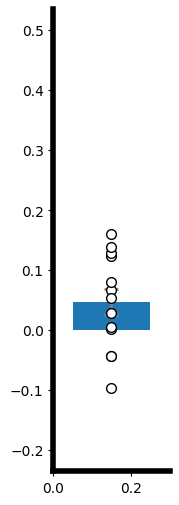

2


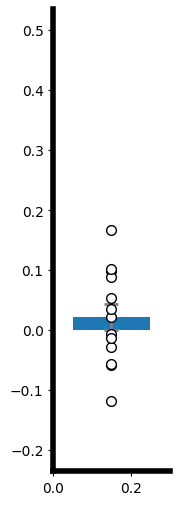

3


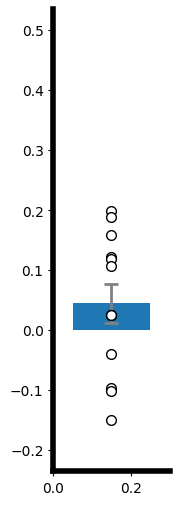

4


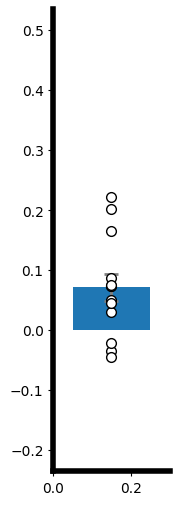

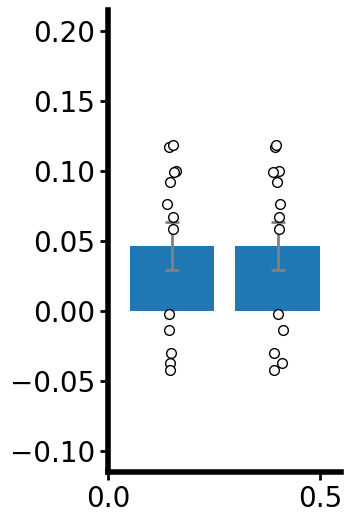

TtestResult(statistic=2.6969434388995457, pvalue=0.019418855979697565, df=12)

In [390]:
corr_dist_pr_N_mean_all=[]
for step_no in np.arange(4)+1:
    print(step_no)
    corr_dist_pr_N=dict_to_array(corr_dist_pr_dic[step_no])#[mouse]
    corr_dist_pr_N_mean=np.asarray([[np.nanmean(corr_dist_pr_N[ii]) for ii in range(len(corr_dist_pr_N))]])
    corr_dist_pr_N_mean_all.append(corr_dist_pr_N_mean)
    bar_plotX(corr_dist_pr_N_mean,'none',-0.2,0.5,'points','paired',0.025)
    plt.show()

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False



corr_dist_pr_N_mean_all_mean_=np.nanmean(np.vstack((corr_dist_pr_N_mean_all)),axis=0)
corr_dist_pr_N_mean_all_mean=[corr_dist_pr_N_mean_all_mean_,corr_dist_pr_N_mean_all_mean_]
bar_plotX(corr_dist_pr_N_mean_all_mean,'none',-0.1,0.2,'points','unpaired',0.025)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Distance_vs_baseline_pr.svg')
plt.show()
st.ttest_1samp(corr_dist_pr_N_mean_all_mean_,0)

In [467]:
del(structure_dic['me05']['ABCD'][40])


In [468]:
Num_trials_all_dic=rec_dd()
Num_trials_mean_dic=rec_dd()
for mouse in Mice:
    tasks_=list(structure_dic[mouse]['ABCD'].keys())
    if len(tasks_)>40:
        tasks_=tasks_[:40]
    num_trials_all=np.zeros(len(tasks_))
    num_trials_all[:]=np.nan
    num_trials_mean_all=np.zeros(len(tasks_))
    num_trials_mean_all[:]=np.nan
    for task_ind,task_num in enumerate(tasks_):
        num_trials=np.sum(Num_trials_dic[mouse][task_num])
        num_trials_mean=np.mean(Num_trials_dic[mouse][task_num])
        num_trials_all[task_ind]=num_trials
        num_trials_mean_all[task_ind]=num_trials_mean
    Num_trials_all_dic[mouse]=num_trials_all
    Num_trials_mean_dic[mouse]=num_trials_mean_all

In [469]:
Num_trials_all_=dict_to_array(Num_trials_all_dic)
first_10_tasks=[Num_trials_all_[ii][:10] for ii in range(len(Num_trials_all_))]
print('Number of trials per task - first 10')
print(np.nanmean(first_10_tasks))
print(st.sem(np.hstack((first_10_tasks))))


tasks_11_onwards=[Num_trials_all_[ii][10:] for ii in np.arange(len(Num_trials_all_)-4)+4]
print('Number of trials per task - 11 onwards (3 task days)')
print(np.nanmean(tasks_11_onwards))
print(st.sem(np.hstack((tasks_11_onwards))))

Number of trials per task - first 10
335.2923076923077
16.38826916631535
Number of trials per task - 11 onwards (3 task days)
35.903703703703705
2.1598182247172293


C:\Users\moham\Code\Manuscript1\mBaseFunctions.py:325: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(dictlist))


In [446]:
Num_trials_mean_=dict_to_array(Num_trials_mean_dic)
first_10_tasks=[Num_trials_mean_[ii][:10] for ii in range(len(Num_trials_mean_))]
print('Number of trials per task - first 10')
print(np.nanmean(first_10_tasks))
print(st.sem(np.hstack((first_10_tasks))))


tasks_11_onwards=[Num_trials_mean_[ii][10:] for ii in np.arange(len(Num_trials_mean_)-4)+4]
print('Number of trials per task - 11 onwards (3 task days)')
print(np.nanmean(tasks_11_onwards))
print(st.sem(np.hstack((tasks_11_onwards))))

NameError: name 'Num_trials_mean_dic' is not defined

1


C:\Users\moham\AppData\Local\Temp\ipykernel_28064\1347984989.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return(np.asarray(dictlist))


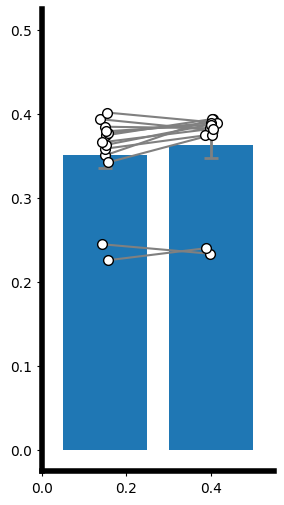

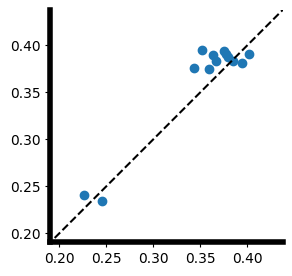

WilcoxonResult(statistic=14.0, pvalue=0.026611328125)
2


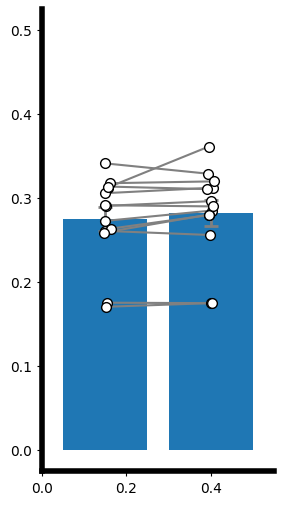

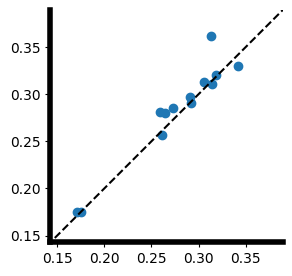

WilcoxonResult(statistic=22.0, pvalue=0.10986328125)
3


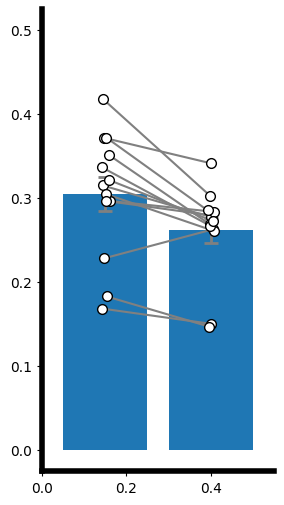

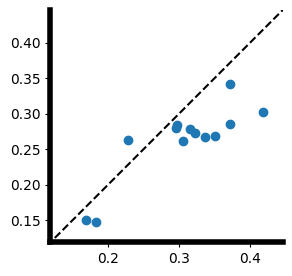

WilcoxonResult(statistic=5.0, pvalue=0.00244140625)
4


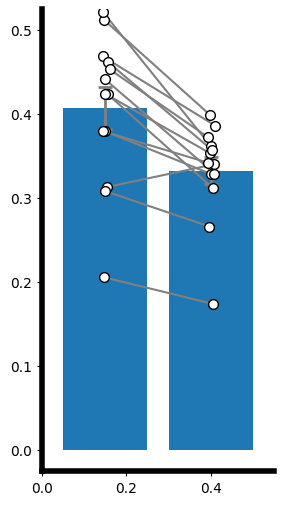

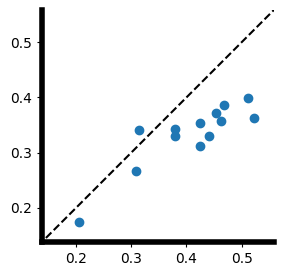

WilcoxonResult(statistic=1.0, pvalue=0.00048828125)


In [268]:
for step_no in np.arange(4)+1:
    print(step_no)
    prob_corr_incorr_all_=dict_to_array(prob_corr_incorr_dic[step_no])
    corr_incorr_pr=np.vstack(([np.nanmean(prob_corr_incorr_all_[ii],axis=0) for ii in range(len(prob_corr_incorr_all_))]))

    bar_plotX(corr_incorr_pr.T,'none',0,0.5,'points','paired',0.025)
    plt.show()
    plot_scatter(corr_incorr_pr[:,0],corr_incorr_pr[:,1])
    plt.show()
    print(st.wilcoxon(corr_incorr_pr[:,0],corr_incorr_pr[:,1]))

In [484]:
###Initial performance calculation - tone no tone
performance_notone_dic=rec_dd()
reldist_notone_dic=rec_dd()
num_trials_first=20
abstract_structure='ABCD'
num_states=len(abstract_structure)
for mouse in Mice:
    
    cohort=Mice_cohort_dic[mouse]
    if cohort!=4 or mouse=='ah05':
        continue
    print(mouse)
    
    abstract_structure_=Variable_dic[mouse]['Structure_abstract']
    structure_no_=Variable_dic[mouse]['Structure_no']
    structure_=Variable_dic[mouse]['Structure']
    omitted_tone_bool=np.hstack((['ot' in structure_[ii] for ii in range(len(structure_))]))
    ABCD_bool=abstract_structure_=='ABCD'
    no_tone_structures=np.unique((structure_no_[np.logical_and(omitted_tone_bool,ABCD_bool)]).astype(int))
    
    
    #if cohort<=2:
    #    num_tasks_mouse=10
    #else:
    #    num_tasks_mouse=40

    #excluded_tasks=exclusions_dic[mouse]
    num_tasks_mouse=len(no_tone_structures)

    performance_array=np.zeros((num_tasks_mouse,num_trials_first,num_states))
    performance_array[:]=np.nan
    
    relative_distance_array=np.zeros((num_tasks_mouse,num_trials_first,num_states))
    relative_distance_array[:]=np.nan
    
    performance_array_tone=[]
    performance_array_notone=[]
    relative_distance_array_tone=[]
    relative_distance_array_notone=[]
    for task_num_ind, task_num in enumerate(no_tone_structures):
        print(task_num)
        try:
            scores__=dict_to_array(scores_dic[mouse][task_num]['ALL'])
            full_sessions_scores=np.hstack(([ii for ii in range(len(scores__)) if len(scores__[ii])>0]))
            num_full_sessions_scores=len(full_sessions_scores)
            sessions=np.sort(np.hstack((list(scores_dic[mouse][task_num]['ALL'].keys())))[list(full_sessions_scores)])
            Num_trials_allses=Num_trials_dic[abstract_structure][mouse][task_num]
            num_Num_trials_allses=len(Num_trials_allses)

            scores_all=[]
            tone_trial_bool_all=[]
            for session_ind, session in enumerate(sessions):
                if session_ind+1>num_Num_trials_allses:
                    print('Note: mismatch between num sessions in Num_trials_dic and scores_dic')
                    continue
                scores_session=scores_dic[mouse][task_num]['ALL'][session]
                if len(scores_session)>0:
                    scores_all.append(scores_session)
                else:
                    continue
                    
                    
                ###finding tone and no tone trials
                struc_=times_dic[mouse][abstract_structure][task_num]
                session_struc=struc_[session]

                if 'A_on_first' in session_struc.keys():
                    trial_starts=np.hstack((session_struc['A_on_first'],session_struc['A_on']))
                else:
                    trial_starts=session_struc['A_on']

                tone_times=session_struc['tone']

                tone_times_=((tone_times-10) +9) // 10 *10
                trial_starts_=(trial_starts+9) // 10 *10
                trial_starts_minus10_=trial_starts_-10
                trial_starts_plus10_=trial_starts_+10
                tone_trial_bool_=np.in1d(trial_starts_,tone_times_)
                tone_trial_minus10_bool=np.in1d(trial_starts_minus10_,tone_times_)
                tone_trial_plus10_bool=np.in1d(trial_starts_plus10_,tone_times_)
                tone_trial_bool=np.logical_or(np.logical_or(tone_trial_bool_,tone_trial_minus10_bool),\
                                              tone_trial_plus10_bool)
                
                tone_trial_bool_all.append(tone_trial_bool[:len(scores_session)])

                if np.sum(tone_trial_bool)!=len(tone_times_):
                    print('Not all tone times found')

                print(np.max(trial_starts[tone_trial_bool]-tone_times))
                print(np.min(trial_starts[tone_trial_bool]-tone_times))

            scores_all=np.vstack((scores_all))
            tone_trial_bool_all=np.hstack((tone_trial_bool_all))
            
            scores_tone=scores_all[tone_trial_bool_all==True]
            scores_no_tone=scores_all[tone_trial_bool_all==False]
            
            scores_N=scores_all[:num_trials_first]
            if len(scores_N)<num_trials_first:
                added_array=np.zeros((num_trials_first-len(scores_N),num_states))
                added_array[:]=np.nan
                scores_N=np.vstack((scores_N,added_array))
            performance_array[task_num_ind]=scores_N
            
            performance_array_tone.append(scores_tone)
            performance_array_notone.append(scores_no_tone)
            
            
            
            
            ###distances
            dists_task_=dict_to_array(scores_dic['dists'][mouse][task_num]['ALL'])
            if len(dists_task_)==1:
                dists_task=np.vstack((dists_task_))
            else:
                if len(dists_task_[1])==0:
                    dists_task=dists_task_[0]
                else:
                    dists_task=np.vstack((remove_empty(dists_task_)))
            
            min_dists_task=dict_to_array(scores_dic['mindist'][mouse][task_num]['ALL'])[0]
            
            min_dists_task_sum=np.sum(min_dists_task)
            if min_dists_task_sum==0:
                min_dists_task_sum=np.nan
            #relative_dists_task_all=np.sum(dists_task,axis=1)/min_dists_task_sum
            relative_dists_task_all=dists_task/min_dists_task
            relative_dists_task=relative_dists_task_all[:num_trials_first]
            if len(relative_dists_task)<num_trials_first:
                added_array=np.zeros((num_trials_first-len(relative_dists_task),num_states))
                added_array[:]=np.nan
                relative_dists_task=np.vstack((relative_dists_task,added_array))
            
            relative_distance_array[task_num_ind]=relative_dists_task
            
            relative_dists_task_tone=relative_dists_task_all[tone_trial_bool_all==True]
            relative_dists_task_no_tone=relative_dists_task_all[tone_trial_bool_all==False]
            
            relative_distance_array_tone.append(relative_dists_task_tone)
            relative_distance_array_notone.append(relative_dists_task_no_tone)
            
            
            
        except Exception as e:
            print('Not calculated')
            print(e)
            exc_type, exc_obj, exc_tb = sys.exc_info()
            fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
            print(exc_type, fname, exc_tb.tb_lineno)

    performance_notone_dic[mouse]=performance_array
    reldist_notone_dic[mouse]=relative_distance_array
    
    
    performance_notone_dic['tone'][mouse]=performance_array_tone
    reldist_notone_dic['tone'][mouse]=relative_distance_array_tone
    
    performance_notone_dic['no_tone'][mouse]=performance_array_notone
    reldist_notone_dic['no_tone'][mouse]=relative_distance_array_notone





me10
41
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Not calculated
need at least one array to concatenate
<class 'ValueError'> 2788477792.py 92
43
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Not calculated
need at least one array to concatenate
<class 'ValueError'> 2788477792.py 92
44
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Not calculated
need at least one array to concatenate
<class 'ValueError'> 2788477792.py 92
45
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Not calculated
need at least one array to concatenate
<class 'ValueError'> 2788477792.py 92
46
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Not calculated
need at least one array to concatenate
<class 'ValueError'> 2788477792.py 92
47
Note: mismatch between num sessions in Num_trials_dic and scores_dic
Not calculated
need at least one a

In [20]:
performance_notone_dic['tone']['me10']

[array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 0., 0.]]),
 array([[0., 0., 1., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 1.],
        [0., 1., 0., 1.],
        [0., 0., 1., 1.]]),
 array([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 1.],
        [0., 0., 0., 0.]]),
 array([[ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.],
        [ 1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  1.],
        [ 1.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  1.],
        [ 0.,  1.,  0.,  0.],
        [ 1.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
    

C:\Users\moham\AppData\Local\Temp\ipykernel_54036\1831479499.py:6: RuntimeWarning: Mean of empty slice
  means_perf_allmice_notone=np.hstack(([[np.nanmean(performance_notone_dic['no_tone'][mouse][session][1:])\


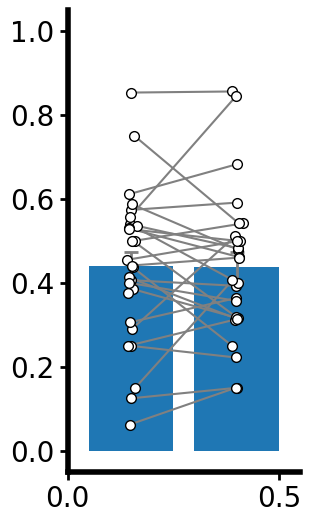

WilcoxonResult(statistic=164.0, pvalue=0.7835337817668915)


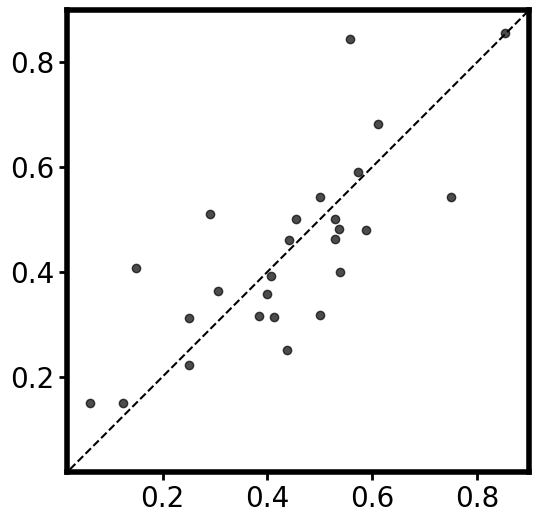

WilcoxonResult(statistic=164.0, pvalue=0.7835337817668915)


C:\Users\moham\AppData\Local\Temp\ipykernel_54036\1831479499.py:39: RuntimeWarning: Mean of empty slice
  means_dist_allmice_notone=np.hstack(([[np.nanmean(reldist_notone_dic['no_tone'][mouse][session][1:])\


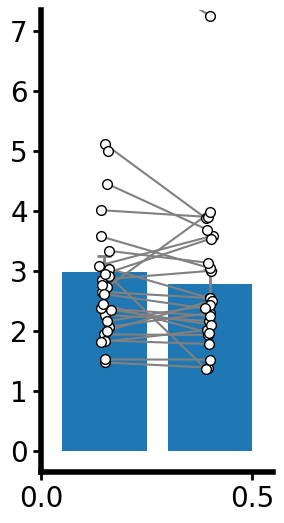

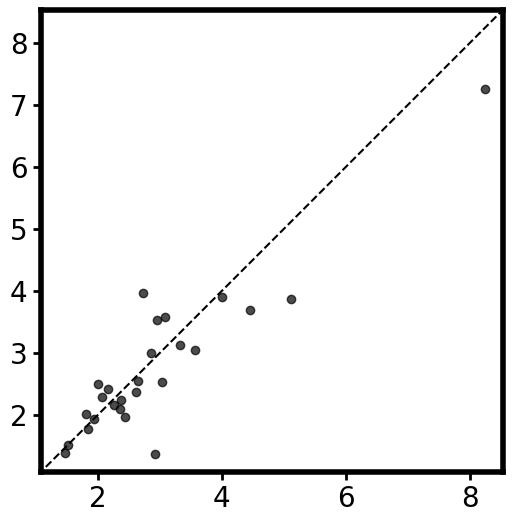

WilcoxonResult(statistic=130.0, pvalue=0.25782257318496704)


In [15]:
###All performance (excluding first trial)
means_perf_allmice_tone=np.hstack(([[np.nanmean(performance_notone_dic['tone'][mouse][session][1:])\
             for session in range(len(performance_notone_dic['tone'][mouse]))]\
 for mouse in performance_notone_dic['tone'].keys()]))

means_perf_allmice_notone=np.hstack(([[np.nanmean(performance_notone_dic['no_tone'][mouse][session][1:])\
             for session in range(len(performance_notone_dic['no_tone'][mouse]))]\
 for mouse in performance_notone_dic['no_tone'].keys()]))

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

bar_plotX([means_perf_allmice_tone,means_perf_allmice_notone], 'none', 0, 1, 'points', 'paired', 0.025)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_All_proportioncorrect.svg')
plt.show()
xy=column_stack_clean(means_perf_allmice_tone,means_perf_allmice_notone)
print(st.wilcoxon(xy[:,0],xy[:,1]))


plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
xy=column_stack_clean(means_perf_allmice_tone,means_perf_allmice_notone)
noplot_scatter(xy[:,0],xy[:,1],'black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_All_proportioncorrect_scatter.svg')
plt.show()
xy=column_stack_clean(means_perf_allmice_tone,means_perf_allmice_notone)
print(st.wilcoxon(xy[:,0],xy[:,1]))

means_dist_allmice_tone=np.hstack(([[np.nanmean(reldist_notone_dic['tone'][mouse][session][1:])\
             for session in range(len(reldist_notone_dic['tone'][mouse]))]\
 for mouse in reldist_notone_dic['tone'].keys()]))

means_dist_allmice_notone=np.hstack(([[np.nanmean(reldist_notone_dic['no_tone'][mouse][session][1:])\
             for session in range(len(reldist_notone_dic['no_tone'][mouse]))]\
 for mouse in reldist_notone_dic['no_tone'].keys()]))

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
bar_plotX([means_dist_allmice_tone,means_dist_allmice_notone], 'none', 0, 7, 'points', 'paired', 0.025)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_All_relativedistance.svg')

plt.show()
xy=column_stack_clean(means_dist_allmice_tone,means_dist_allmice_notone)
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
xy=column_stack_clean(means_dist_allmice_tone,means_dist_allmice_notone)
noplot_scatter(xy[:,0],xy[:,1],'black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_All_relativedistance_scatter.svg')
plt.show()
xy=column_stack_clean(means_dist_allmice_tone,means_dist_allmice_notone)
print(st.wilcoxon(xy[:,0],xy[:,1]))

C:\Users\moham\AppData\Local\Temp\ipykernel_54036\1317878755.py:6: RuntimeWarning: Mean of empty slice
  means_perf_allmice_notone=np.hstack(([[np.nanmean(performance_notone_dic['no_tone'][mouse][session][1:])\


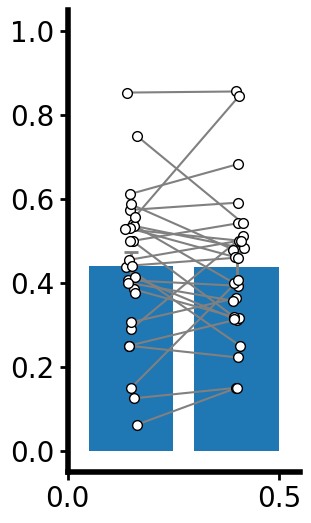

WilcoxonResult(statistic=164.0, pvalue=0.7835337817668915)


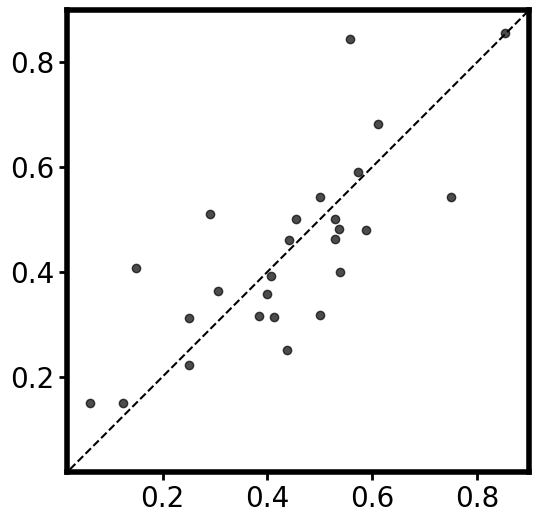

26
WilcoxonResult(statistic=164.0, pvalue=0.7835337817668915)


C:\Users\moham\AppData\Local\Temp\ipykernel_54036\1317878755.py:40: RuntimeWarning: Mean of empty slice
  means_dist_allmice_notone=np.hstack(([[np.nanmean(reldist_notone_dic['no_tone'][mouse][session][1:])\


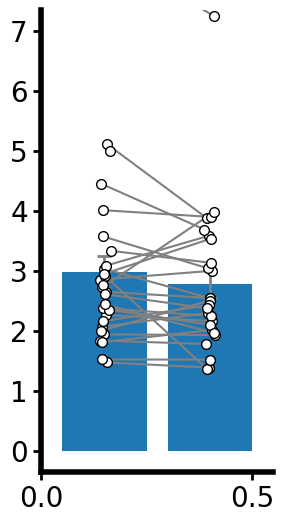

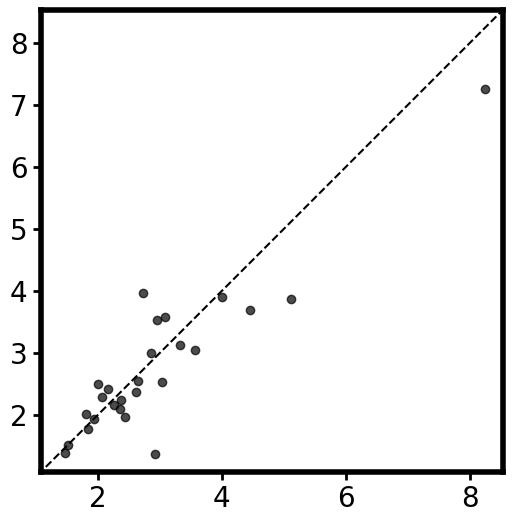

26
WilcoxonResult(statistic=130.0, pvalue=0.25782257318496704)


In [17]:
###All performance (excluding first trial)
means_perf_allmice_tone=np.hstack(([[np.nanmean(performance_notone_dic['tone'][mouse][session][1:])\
             for session in range(len(performance_notone_dic['tone'][mouse]))]\
 for mouse in performance_notone_dic['tone'].keys()]))

means_perf_allmice_notone=np.hstack(([[np.nanmean(performance_notone_dic['no_tone'][mouse][session][1:])\
             for session in range(len(performance_notone_dic['no_tone'][mouse]))]\
 for mouse in performance_notone_dic['no_tone'].keys()]))

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

bar_plotX([means_perf_allmice_tone,means_perf_allmice_notone], 'none', 0, 1, 'points', 'paired', 0.025)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_All_proportioncorrect.svg')
plt.show()
xy=column_stack_clean(means_perf_allmice_tone,means_perf_allmice_notone)
print(st.wilcoxon(xy[:,0],xy[:,1]))


plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
xy=column_stack_clean(means_perf_allmice_tone,means_perf_allmice_notone)
noplot_scatter(xy[:,0],xy[:,1],'black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_All_proportioncorrect_scatter.svg')
plt.show()
xy=column_stack_clean(means_perf_allmice_tone,means_perf_allmice_notone)
print(len(xy))
print(st.wilcoxon(xy[:,0],xy[:,1]))

means_dist_allmice_tone=np.hstack(([[np.nanmean(reldist_notone_dic['tone'][mouse][session][1:])\
             for session in range(len(reldist_notone_dic['tone'][mouse]))]\
 for mouse in reldist_notone_dic['tone'].keys()]))

means_dist_allmice_notone=np.hstack(([[np.nanmean(reldist_notone_dic['no_tone'][mouse][session][1:])\
             for session in range(len(reldist_notone_dic['no_tone'][mouse]))]\
 for mouse in reldist_notone_dic['no_tone'].keys()]))

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
bar_plotX([means_dist_allmice_tone,means_dist_allmice_notone], 'none', 0, 7, 'points', 'paired', 0.025)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_All_relativedistance.svg')

plt.show()
xy=column_stack_clean(means_dist_allmice_tone,means_dist_allmice_notone)
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
xy=column_stack_clean(means_dist_allmice_tone,means_dist_allmice_notone)
noplot_scatter(xy[:,0],xy[:,1],'black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_All_relativedistance_scatter.svg')
plt.show()
xy=column_stack_clean(means_dist_allmice_tone,means_dist_allmice_notone)
print(len(xy))
print(st.wilcoxon(xy[:,0],xy[:,1]))

In [483]:
###DA performance (excluding first trial)
means_perf_allmice_tone=np.hstack(([[np.nanmean(performance_notone_dic['tone'][mouse][session][1:,3])\
             for session in range(len(performance_notone_dic['tone'][mouse]))]\
 for mouse in performance_notone_dic['tone'].keys()]))

means_perf_allmice_notone=np.hstack(([[np.nanmean(performance_notone_dic['no_tone'][mouse][session][1:,3])\
             for session in range(len(performance_notone_dic['no_tone'][mouse]))]\
 for mouse in performance_notone_dic['no_tone'].keys()]))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
bar_plotX([means_perf_allmice_tone,means_perf_allmice_notone], 'none', 0, 1, 'points', 'paired', 0.025)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_DA_proportioncorrect.svg')
plt.show()
xy=column_stack_clean(means_perf_allmice_tone,means_perf_allmice_notone)


plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
xy=column_stack_clean(means_perf_allmice_tone,means_perf_allmice_notone)
noplot_scatter(xy[:,0],xy[:,1],'black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_DA_proportioncorrect_scatter.svg')
plt.show()
xy=column_stack_clean(means_perf_allmice_tone,means_perf_allmice_notone)
print(len(xy))
print(st.wilcoxon(xy[:,0],xy[:,1]))

means_dist_allmice_tone=np.hstack(([[np.nanmean(reldist_notone_dic['tone'][mouse][session][1:,3])\
             for session in range(len(reldist_notone_dic['tone'][mouse]))]\
 for mouse in reldist_notone_dic['tone'].keys()]))

means_dist_allmice_notone=np.hstack(([[np.nanmean(reldist_notone_dic['no_tone'][mouse][session][1:,3])\
             for session in range(len(reldist_notone_dic['no_tone'][mouse]))]\
 for mouse in reldist_notone_dic['no_tone'].keys()]))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
bar_plotX([means_dist_allmice_tone,means_dist_allmice_notone], 'none', 0, 25, 'points', 'paired', 0.025)
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_DA_relativedistance.svg')
plt.show()

plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
xy=column_stack_clean(means_dist_allmice_tone,means_dist_allmice_notone)
noplot_scatter(xy[:,0],xy[:,1],'black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'Tone_notone_DA_relativedistance_scatter.svg')
plt.show()
xy=column_stack_clean(means_dist_allmice_tone,means_dist_allmice_notone)
print(len(xy))
print(st.wilcoxon(xy[:,0],xy[:,1]))

NameError: name 'performance_notone_dic' is not defined

###fixing scores_dic indices
for mouse in Mice:
    print('')
    print(mouse)
    tasks_all=np.hstack((list(times_dic[mouse][abstract_structure].keys())))
    for task_num_ind, task_num in enumerate(tasks_all):
        times_task_=times_dic[mouse][abstract_structure][task_num]
        times_task_array=dict_to_array(times_task_)
        if len(times_task_array)==0:
            print('No times_dic for task'+str(task_num))
            continue
        non_zero_bool=np.hstack(([len(times_task_array[ii])>0 for ii in range(len(times_task_array))]))
        sessions=np.sort(np.asarray(list(times_task_.keys()))[non_zero_bool])
        
        sessions_zero=np.sort(np.asarray(list(times_task_.keys()))[~non_zero_bool])
        for session_zero in sessions_zero:
            del(times_dic[mouse][abstract_structure][task_num][session_zero])
        
        dict_all_=scores_dic[mouse][task_num]['ALL']
        scores_array_=dict_to_array(dict_all_)
        
        if len(list(dict_all_.keys()))==0:
            print('Nothing in Scores dic for task'+str(task_num))
            continue
        session_keys_old=np.hstack((list(dict_all_.keys())))
        non_zero_bool=np.hstack(([len(scores_array_[ii])>0 for ii in np.arange(len(scores_array_))]))

        session_keys_old_non_zero=np.sort(session_keys_old[non_zero_bool])
        
        session_keys_old_sorted=np.sort(session_keys_old)
        
        if len(session_keys_old_sorted)!=len(sessions):
            print(len(sessions)-len(session_keys_old_non_zero)) ### positive means more sessions in times_dic
            print('NOT CHANGED: Mismatch between sessions in Scores_dic and times_dic for task'+str(task_num))
            continue
        if len(session_keys_old_sorted)>0:
            for session_ind, session in enumerate(sessions):
                old_session=session_keys_old_sorted[session_ind]
                
                for name in list(scores_dic[mouse][task_num].keys()):
                    scores_dic[mouse][task_num][name][session]=\
                    scores_dic[mouse][task_num][name][old_session]
                    
                for name2 in list(scores_dic.keys()):
                    scores_dic[name2][mouse][task_num][session]=\
                    scores_dic[name2][mouse][task_num][old_session]
                    

        non_overlap_sessions=np.setdiff1d(session_keys_old,sessions)
        for session_notused in non_overlap_sessions:
            for name in list(scores_dic[mouse][task_num].keys()):
                try:
                    del(scores_dic[mouse][task_num][name][session_notused])
                except:
                    x=1
            for name2 in list(scores_dic.keys()):
                try:
                    del(scores_dic[name2][mouse][task_num]['ALL'][session_notused])
                except:
                    x=1
                
            
            
            
            

In [477]:
###ABCDE performance
Tasknum_used_dic=rec_dd()
for mouse_ in ['ab03','ah07']:
    total_task_num_used_start=0
    for mouse_recday in rec_days_:
        
        mouse=mouse_recday.split('_',1)[0]
        
        if mouse!=mouse_:
            continue
        print(mouse_recday)
        
            
        Tasks=np.load(Intermediate_object_folder_dropbox+'Task_data_'+mouse_recday+'.npy',allow_pickle=True)
        non_repeat_ses=non_repeat_ses_maker(mouse_recday)
        
        num_states=np.hstack(([len(Task)for Task  in Tasks]))
        non_repeat_ses_ABCDE=np.intersect1d(non_repeat_ses,np.where(num_states==5)[0])
        
        total_task_num_used=total_task_num_used_start+np.arange(len(non_repeat_ses_ABCDE))
        total_task_num_used_start=np.max(total_task_num_used)+1
        
        Tasknum_used_dic[mouse_recday]=total_task_num_used


day_type='combined_ABCDE'
rec_days_=day_type_dicX[day_type]
num_nodes=9

Scores_ABCDE_dic=rec_dd()
behbias_mat_ABCDE_dic=rec_dd()
for mouse_recday in rec_days_:
    print(mouse_recday)
    mouse=mouse_recday.split('_',1)[0]
    Tasks=np.load(Intermediate_object_folder_dropbox+'Task_data_'+mouse_recday+'.npy',allow_pickle=True)
    non_repeat_ses=non_repeat_ses_maker(mouse_recday)
    num_states=np.hstack(([len(Task)for Task  in Tasks]))
    non_repeat_ses_ABCDE=np.intersect1d(non_repeat_ses,np.where(num_states==5)[0])
    for ses_ind_ind,ses_ind in enumerate(non_repeat_ses_ABCDE):
        Task=Tasks[ses_ind]
        
        task_num_used=Tasknum_used_dic[mouse_recday][ses_ind_ind]

        num_states=len(Task)


        trial_times=np.load(Intermediate_object_folder+'trialtimes_'+mouse_recday+'_'+str(ses_ind)+'.npy')//25
        Location=np.load(Intermediate_object_folder+'Location_raw_'+mouse_recday+'_'+str(ses_ind)+'.npy')
        Nodes=np.copy(Location)
        Nodes[Nodes>num_nodes]=np.nan

        minimum_distances=[mindistance_mat[Task[state_ind]-1,np.roll(Task,-1)[state_ind]-1]\
        for state_ind in np.arange(num_states)]
        
        paths=np.vstack(([[unique_adjacent(remove_nan(Nodes[trial_times\
            [trial_ind,state_ind]:trial_times[trial_ind,state_ind+1]]))\
            for state_ind in np.arange(num_states)] for trial_ind in np.arange(len(trial_times))]))

        path_lengths=np.vstack(([[len(unique_adjacent(remove_nan(Nodes[trial_times\
            [trial_ind,state_ind]:trial_times[trial_ind,state_ind+1]]))[1:])\
            for state_ind in np.arange(num_states)] for trial_ind in np.arange(len(trial_times))]))
        relative_distances=(path_lengths/minimum_distances)
        mean_relative_distances=np.nanmean(relative_distances,axis=1)
        
        mean_relative_distances_20=np.hstack((mean_relative_distances[:20],\
                                                  np.repeat(np.nan,20-len(mean_relative_distances[:20]))))
        
        meanofmeans_relative_distances_20=np.nanmean(mean_relative_distances_20)
        Prop_correct=np.sum(np.concatenate(relative_distances[:20])==1)/len(np.concatenate(relative_distances[:20]))
        
        
        
        Scores_ABCDE_dic['Mean'][mouse][task_num_used]=mean_relative_distances_20
        Scores_ABCDE_dic['Mean_of_means'][mouse][task_num_used]=meanofmeans_relative_distances_20
        Scores_ABCDE_dic['Prop_correct'][mouse][task_num_used]=Prop_correct
        
        ###Chance levels
        Probs=[]
        for state_ind in np.arange(num_states):
            portX=Task[state_ind]
            portY=np.roll(Task,-1)[state_ind]
            min_dist=mindistance_mat[portX-1,portY-1]
            trans_mat_mean=np.load(Intermediate_object_folder_dropbox+'/'+\
                                   mouse+'_Exploration_Transition_matrix.npy')
            prob=trans_mat_mean[min_dist-1][portX-1,portY-1]
            Probs.append(prob)
            
        Probs=np.hstack(Probs)

        Scores_ABCDE_dic['beh_bias'][mouse][task_num_used]=np.nanmean(Probs)

ab03_21112023_22112023
ab03_23112023_24112023
ah07_21112023_22112023
ah07_23112023_24112023
ab03_21112023_22112023
ab03_23112023_24112023
ah07_21112023_22112023
ah07_23112023_24112023


C:\Users\moham\anaconda3\lib\site-packages\numpy\core\shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


0.37

C:\Users\moham\AppData\Local\Temp\ipykernel_12740\1213156377.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rel_dist_first_=np.asarray([reldist_dic[mouse][:,0] for mouse in Mice])
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
C:\Users\moham\AppData\Roaming\Python\Python38\site-packages\scip

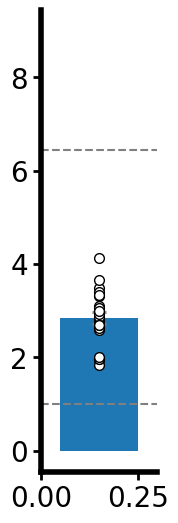

24
TtestResult(statistic=-29.969724351902485, pvalue=6.184269188316399e-20, df=23)


In [444]:
total_scores_ABCDE=flatten(Scores_ABCDE_dic['Mean_of_means'])

rel_dist_first_=np.asarray([reldist_dic[mouse][:,0] for mouse in Mice])
factor=5
bins=np.arange(len(rel_dist_first.T)//factor+1)*factor
rel_dist_first=np.vstack(([np.hstack((rel_dist_first_[ii],np.repeat(np.nan,int(40-len(rel_dist_first_[ii])))))\
 for ii in range(len(rel_dist_first_))]))
rel_dist_first_binned=np.vstack(([st.binned_statistic(np.arange(len(rel_dist_first.T)),rel_dist_first[ii],\
                            bins=bins,statistic=np.nanmean)[0] for ii in np.arange(len(rel_dist_first))]))
chance=np.nanmean(rel_dist_first_binned,axis=0)[0]


plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

bar_plotX(np.asarray([total_scores_ABCDE]),'none', 0, 9, 'points', 'unpaired',0.025)
plt.axhline(chance,ls='dashed',color='grey')
plt.axhline(1,ls='dashed',color='grey')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)

plt.savefig(Behaviour_output_folder_dropbox+'ABCDE_relativedistance.svg')
plt.show()
print(len(total_scores_ABCDE))
print(st.ttest_1samp(total_scores_ABCDE,chance))

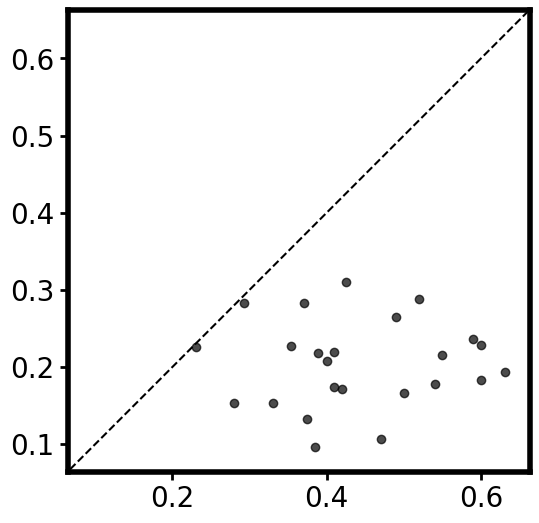

24
WilcoxonResult(statistic=0.0, pvalue=1.1920928955078125e-07)


In [485]:
Prop_correct=flatten(Scores_ABCDE_dic['Prop_correct'])
Chance_prop_correct=flatten(Scores_ABCDE_dic['beh_bias'])

plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
xy=column_stack_clean(Prop_correct,Chance_prop_correct)
noplot_scatter(xy[:,0],xy[:,1],'black')
plt.tick_params(axis='both',  labelsize=20)
plt.tick_params(width=2, length=6)
plt.savefig(Behaviour_output_folder_dropbox+'ABCDE_propcorrect.svg')
plt.show()
print(len(xy))
print(st.wilcoxon(xy[:,0],xy[:,1]))

array([0.17356946, 0.17738055, 0.23597763, 0.17195027, 0.10697673,
       0.15348485, 0.2180057 , 0.13278296, 0.183187  , 0.28753382,
       0.22816739, 0.22602148, 0.20771747, 0.21585074, 0.22670887,
       0.15277392, 0.31013078, 0.19391864, 0.26496104, 0.28235153,
       0.21888889, 0.16657896, 0.09620899, 0.28299878])

In [604]:
Mice

array(['me03', 'me04', 'me05', 'me06', 'me08', 'ah02', 'ah03', 'me10',
       'me11', 'ah04', 'ah05', 'ab03', 'ah07'], dtype='<U4')

In [31]:
###Example trajectories

mouse_recday='me11_01122021_02122021'
ses_ind=2

xy=np.load(Intermediate_object_folder+'XY_raw_'+mouse_recday+'_'+str(ses_ind)+'.npy')
trial_times=np.load(Intermediate_object_folder+'trialtimes_'+mouse_recday+'_'+str(ses_ind)+'.npy')//25
Tasks=np.load(Intermediate_object_folder+'Task_data_'+mouse_recday+'.npy')
Tasks

array([[7, 6, 3, 5],
       [3, 1, 7, 2],
       [4, 6, 2, 7],
       [7, 6, 3, 5],
       [3, 4, 8, 1],
       [7, 3, 1, 5],
       [8, 5, 6, 3],
       [7, 8, 4, 1]])

[4 6 2 7]
9
10
11
12
13


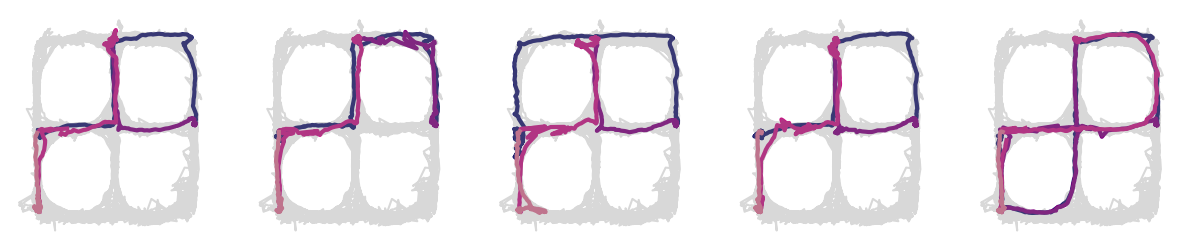

In [32]:
print(Tasks[ses_ind])

thr=10
xy_clean=xy#[xy[:,0]>1]
x_change=np.hstack((0,abs(np.diff(xy[:,0]))))
y_change=np.hstack((0,abs(np.diff(xy[:,1]))))
xy_clean=xy_clean[np.logical_and(x_change<np.mean(x_change)+np.std(x_change)*thr,\
                                 y_change<np.mean(y_change)+np.std(y_change)*thr)]





xy[np.logical_or(x_change>np.mean(x_change)+np.std(x_change)*thr,\
                                 y_change>np.mean(y_change)+np.std(y_change)*thr)]=np.nan

xy[xy[:,0]<=100]=[np.nan,np.nan]
xy_clean[xy_clean[:,0]<=100]=[np.nan,np.nan]
xy[xy[:,0]>=1100]=[np.nan,np.nan]
xy_clean[xy_clean[:,0]>=1100]=[np.nan,np.nan]


plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

colors=['midnightblue','purple','mediumvioletred','palevioletred']
num_trials=5
start_trial=9
fig, axs = plt.subplots(1, num_trials, figsize=(15, 3), sharey=True)
for trial_ind, trial_no in enumerate(np.arange(num_trials)+start_trial):
    print(trial_no)
    for state in np.arange(4):
        traj_trial=xy[trial_times[trial_no,state]:trial_times[trial_no,state+1]]
        axs[trial_ind].plot(traj_trial[:,0],traj_trial[:,1],color=colors[state],linewidth=3)
    axs[trial_ind].plot(xy_clean[:,0],xy_clean[:,1],color='grey',alpha=0.3)
    

    
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.savefig(Behaviour_output_folder_dropbox+'Exampletrajectories'+mouse_recday+'_ses'+str(ses_ind)+'trial_'+\
            str(start_trial)+'_'+str(start_trial+num_trials-1)+'.png', bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [442]:
'''
used in Figure 1:
ah03_18082021_19082021 - ses6 - trials 26-30 - task: 8312

ah04_05122021_06122021 - ses0 - trials 22-26 - task: 5189

me11_01122021_02122021 - ses2 - trials 9-13 - task: 4627



Others:
ah03_18082021_19082021 - ses2 - trials 30-34 - task: 6125


me08_10092021_11092021 - ses1 - trials 11-15 - task: 9641

ah04_05122021_06122021 - ses4 - trials 21-25 - task: 9387

-

'''

array([[      0,    8186,   15158,   29692,   36900],
       [  36900,   47748,   56214,   82739,  104480],
       [ 104480,  115334,  130294,  141143,  153749],
       [ 153749,  162762,  166810,  179426,  204786],
       [ 204786,  211833,  215875,  232966,  244261],
       [ 244261,  252439,  258279,  270234,  283872],
       [ 283872,  292388,  296596,  304624,  321284],
       [ 321284,  330791,  335653,  353466,  367099],
       [ 367099,  373903,  378473,  392012,  414253],
       [ 414253,  422070,  426160,  431810,  440039],
       [ 440039,  447523,  451397,  464968,  479819],
       [ 479819,  487717,  490950,  501388,  519290],
       [ 519290,  526355,  530050,  537421,  547032],
       [ 547032,  555052,  567144,  578264,  586561],
       [ 586561,  594820,  605205,  614585,  633461],
       [ 633461,  641767,  645256,  656476,  667741],
       [ 667741,  674519,  678638,  686924,  702044],
       [ 702044,  710722,  727426,  734204,  750490],
       [ 750490,  759364,  7

In [538]:
len(np.logical_and(x_change<np.mean(x_change)+np.std(x_change)*5,\
                                 y_change<np.mean(y_change)+np.std(y_change)*5))

46003

In [541]:
len(y_change)

46003

In [ ]:
##############below is old code###########

In [ ]:
##Importing files and calculating scores AB

tt=time.time()
#times_oversampledAB_dic=rec_dd()
#nodes_cut_oversampledAB_dic=rec_dd()
#nodes_cutAB_dic=rec_dd()

#trialtimes_stateAB_dic=rec_dd()
#scoresAB_dic=rec_dd()

state_indAB_dic={'A':0,'B':1}
state_nextstateAB_dic={'A':'B','B':'A'}

abstract_structure_type='AB'

A_trial_indx=['A_on','B_on']
B_trial_indx=['B_on','A_on']
All_trialsAB_indx=np.vstack((A_trial_indx,B_trial_indx))

tracking_oversampling_factor=50 ##oversampling of nodes_cut_dic
behaviour_oversampling_factor=3 ##oversampling of trialtimes_dic



for mouse in Mice:
    print(mouse)
    cohort=Mice_cohort_dic[mouse[:4]]
    data_directory='/Taskspace_abstraction/Data/cohort'+str(cohort)+'/'+mouse[:4]+'/'
    Variables=Variable_dic[mouse]
    Structure_no=(Variables['Structure_no']).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    AB_structure_no=Structure_no[Structure_abstract==abstract_structure_type]

    for structure_num in np.unique(AB_structure_no):
        print(structure_num)

        for structure_ses, (session, content) in enumerate(times_dic[mouse][abstract_structure_type]\
                                                           [structure_num].items()):
            
            session_Date=Variables['Date'][session]
            session_timestamp=Variables['Behaviour'][session]
            
            
            if len(scoresAB_dic[mouse][structure_num]['ALL'][session])==0 or\
            len(trialtimes_stateAB_dic[mouse][structure_num][session]['B'])==0 or\
            len(nodes_cutAB_dic[mouse][structure_num][session])==0:
                
                ##Importing pinstate and ROI files##

                try:
                    pinstatefile_path=data_directory+'/Behaviour/'+str(mouse)+'_pinstate_'+\
                    str(Variables['Date'][session])+'-'+str(Variables['Tracking'][session])+'.csv'

                    #file_path='me04-2020-11-12-145650.txt'
                    with open(pinstatefile_path, 'r') as f:
                        print('Importing data file: '+os.path.split(pinstatefile_path)[1])
                        ttl_tracking = np.asarray([line.strip() for line in f.readlines() if line.strip()]).astype(int)
                    ttl_binary=create_binary(ttl_tracking)

                    #pinstate_dic[mouse][session]=ttl_binary

                except FileNotFoundError:
                    print("File: "+pinstatefile_path+" Not Found")



                try:
                    ROIfile_path=data_directory+'/Behaviour/ROIs_'+str(mouse)+'_'+str(Variables['Date'][session])+'-'+\
                    str(Variables['Tracking'][session])+'.csv' ##change this!

                    #file_path='me04-2020-11-12-145650.txt'
                    with open(ROIfile_path, 'r') as f:
                        print('Importing data file: '+os.path.split(ROIfile_path)[1])
                        data = np.genfromtxt(f, delimiter=',',dtype=str)
                    #body_part = data[1:, 4]
                    #Majority = data[1:, 9]

                    body_part_name='majority'#'betweenShoulders' ###choice of what point on animal to track
                    body_part_namex='Majority'
                    body_part_name_used = \
                    np.asarray([body_part_name,body_part_namex])[[body_part_name in data[0], body_part_namex in data[0]]][0]

                    body_part=(data[1:,data[0]==body_part_name_used]).squeeze()


                except FileNotFoundError:
                    print("File: "+ROIfile_path+" Not Found")
                    continue


                ###Matching ROI and behaviour timestamps###

                structure=structure_dic[mouse]['AB'][structure_num][session]
                times=times_dic[mouse]['AB'][structure_num][session]
                #body_part=ROI_dic[mouse][session]['body_part']
                #ttl_binary=pinstate_dic[mouse][session]


                
                if len(body_part)>0:
                    print(len(ttl_binary)/len(body_part))
                    if (len(ttl_binary)/len(body_part))==2:
                        body_part=np.repeat(body_part,2)

                    elif (len(ttl_binary)/len(body_part))>1.99 and (len(ttl_binary)/len(body_part))!=2:
                        body_part=np.repeat(body_part,2)[:len(ttl_binary)]

                    nodes=[np.nan if body_part[ii][:4]!='node' else int(body_part[ii][-1]) for ii in range(len(body_part)) ]
                    edges=[np.nan if body_part[ii][:4]!='edge' else [int(body_part[ii][-3]),int(body_part[ii][-1])]\
                           for ii in range(len(body_part)) ]

                    ##Aligning behaviour and tracking
                    times_oversampled=rec_dd()
                    for index,item in times.items():
                        times_oversampled[index]=item*behaviour_oversampling_factor
                        
                    if 'A_on_first' in times_oversampled.keys():
                        times_oversampled['A_on']=np.hstack((times_oversampled['A_on_first'],times_oversampled['A_on']))

                    diff_behTrack=len(times['rsync'])-len(np.where(unique_adjacent(ttl_binary)==1)[0])
                    if diff_behTrack<0:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date+\
                                                                                   '-'+str(session_timestamp)+\
                              ': more rsync pulses in pinstate than in behaviour files - SESSION NOT USED')
                        continue
                    num_sync_missed=times_oversampled['rsync'][diff_behTrack]

                    ttl_first=np.where(ttl_binary==1)[0][diff_behTrack]
                    nodes_cut=nodes[ttl_first:]
                    nodes_cut_oversampledx=np.repeat(nodes_cut,tracking_oversampling_factor)
                    nodes_cut_oversampled=np.hstack((np.repeat(np.nan,num_sync_missed),nodes_cut_oversampledx))               

                    ##checks
                    if diff_behTrack>0:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date+\
                                                                                   '-'+str(session_timestamp)+\
                              ': less rsync pulses in pinstate than in behaviour files')
                        print('Realigned ROI timestamps')


                    if len(ttl_binary)-len(body_part)!=0:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date\
                              +'-'+str(session_timestamp)+\
                              ': mismatch between length of pinstate file and ROI file')
                        if len(ttl_binary)-len(body_part)==1:
                            ttl_binary=ttl_binary[:-1]
                            print('But only one off so cut end of ttl_binary')
                        else:
                            continue

                    tracking_length_mins=(len(ttl_binary))/(60*60)
                    behaviour_length_mins=times['rsync'][-1]/(1000*60)
                    metaData_length_mins=int(Variable_dic[mouse]['Session_time'][session])

                    if np.abs(tracking_length_mins-metaData_length_mins)>10 or np.abs\
                    (behaviour_length_mins-metaData_length_mins)>10:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+\
                              session_Date+'-'+str(session_timestamp)+\
                              ': session length does not match metaData file')
                        #continue
                        print('Error Ignored')

                    numdigits_times_oversampled=len(str(times_oversampled['rsync'][-1]))
                    numdigits_nodes_cut_oversampled=len(str(len(nodes_cut_oversampled)))

                    if (numdigits_nodes_cut_oversampled-numdigits_times_oversampled)>1:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date\
                              +'-'+str(session_timestamp)+\
                              ': Oversampling causes mismatch between tracking and behaviour')
                        continue

                    print(mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date\
                              +'-'+str(session_timestamp)+\
                              ': Passed all checks')
                    ##ADD EXTRA CHECK THAT SYNC PULSES AND TTL PULSES RECEIVED BY CAMERA ARE AN EXACT MATCH

                    #times_oversampled_dic[mouse][structure_num][session]=times_oversampled
                    nodes_cutAB_dic[mouse][structure_num][session]=nodes_cut


                    ###Scoring###

                    All_scores=[]
                    All_scoresx=[]
                    for state, indx in state_indAB_dic.items():

                        ##Trail times per state
                        X=state
                        Y=state_nextstateAB_dic[X]
                        if len(times_oversampled[All_trialsAB_indx[indx,0]])>0:
                            if state != 'B':
                                if len(times_oversampled[All_trialsAB_indx[indx,0]])==\
                                len(times_oversampled[All_trialsAB_indx[indx,1]]):
                                    trialtimes_=\
                                    np.column_stack((times_oversampled[All_trialsAB_indx[indx,0]],\
                                                     times_oversampled[All_trialsAB_indx[indx,1]]))
                                else:

                                    trialtimes_=\
                                    np.column_stack((times_oversampled[All_trialsAB_indx[indx,0]][:-1],\
                                                     times_oversampled[All_trialsAB_indx[indx,1]]))
                            else:
                                trialtimes_=\
                                np.column_stack((times_oversampled['B_on'][:len(times_oversampled['A_on'])-1],\
                                                 times_oversampled['A_on'][1:len(times_oversampled['A_on'])]))

                            trialtimes_stateAB_dic[mouse][structure_num][session][state]=trialtimes_

                            ##scoring
                            state_timesx=indicesX2(trialtimes_,0)
                            state_times =np.asarray([(state_timesx[ii]).astype(int) for ii in range(len(state_timesx))])
                            state_times_mask = [state_times[ii][-1]<len(nodes_cut_oversampled)\
                                                for ii in range(len(state_times))]
                            state_times=state_times[state_times_mask]
                            
                            portX=structure[state_indAB_dic[X]]
                            portY=structure[state_indAB_dic[Y]]
                            ###remove first instances of start node from node_times_trial


                            if len(nodes_cut_oversampled)>0 and len(state_times)>0:

                                all_trials=np.asarray([(nodes_cut_oversampled[state_times[ii]]).astype(int)\
                                                       for ii in range(len(state_times))])
                                #all_trials[0][all_trials[0]>=0]

                                dists=np.asarray([len(unique_adjacent(trial[trial>=0])[1:]) for trial in all_trials])
                                mindist=mindistance_mat[portX-1,portY-1]

                                scores=dists==mindist
                                exec(X+'_scores=scores')

                                All_scores.append(scores)
                                scoresAB_dic[mouse][structure_num][X][session]=len(np.where(scores==True)[0])/len(scores)

                            else:
                                All_scores=[]

                    if len(All_scores)>0 and len(A_scores)>=len(B_scores):      
                        All_scores=np.concatenate(All_scores)
                        Overall_score=len(np.where(All_scores==True)[0])/len(All_scores)

                        stacked_scores=np.column_stack((A_scores[:len(B_scores)],B_scores))

                    else:
                        Overall_score=np.nan
                        num_trials=Num_trials_dic[mouse][structure_num][structure_ses]#[session]
                        stacked_scores=np.asarray([[np.nan for x in range(len(All_trialsAB_indx))]\
                                                   for y in range(int(num_trials))])

                    scoresAB_dic[mouse][structure_num]['Mean'][session]=Overall_score 
                    scoresAB_dic[mouse][structure_num]['ALL'][session]=stacked_scores






                else:
                    #del(ROI_dic[mouse][session]['body_part'])
                    print(mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date+'-'+\
                          str(session_timestamp)+' ROI file not found')
                
            else:
                print(mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date+'-'+\
                          str(session_timestamp)+' Already Analyzed!')    
print(time.time()-tt) 

In [ ]:
#times_oversampledAB_dic=rec_dd()
#nodes_cut_oversampledAB_dic=rec_dd()
#nodes_cutAB_dic=rec_dd()

#trialtimes_stateAB_dic=rec_dd()
#scoresAB_dic=rec_dd()

In [14]:
#SAVING FILES - tracking and behaviour


output_folder = Intermediate_object_folder
try:
    os.mkdir(Intermediate_object_folder)
except FileExistsError:
    pass

dictionaries_dic={'structure_dic':structure_dic, 'scores_dic': scores_dic, 'Variable_dic':Variable_dic,\
                  'times_dic':times_dic,'nodes_cut_dic':nodes_cut_dic, 'trialtimes_state_dic':trialtimes_state_dic,\
                 'Nodes_trials_dic':Nodes_trials_dic}


for name, dicX in dictionaries_dic.items():
    data=dicX
    data_filename_memmap = os.path.join(Intermediate_object_folder, name)
    dump(data, data_filename_memmap)

In [ ]:
name

In [ ]:
##Importing files and calculating scores ABCAD
tt=time.time()
times_oversampledABCAD_dic=rec_dd()
nodes_cut_oversampledABCAD_dic=rec_dd()
nodes_cutABCAD_dic=rec_dd()

trialtimes_stateABCAD_dic=rec_dd()
scoresABCAD_dic=rec_dd()

abstract_structure_type='ABCAD'

state_indABCAD_dic={'A':0,'B':1,'C':2,'D':3,'E':4}
state_nextstateABCAD_dic={'A':'B','B':'C','C':'D','D':'E','E':'A'}


A1_trial_indx=['A_on','B_on']
B_trial_indx=['B_on','C_on']
C_trial_indx=['C_on','D_on']
A2_trial_indx=['D_on','E_on']
D_trial_indx=['E_on','A_on']
All_trialsABCAD_indx=np.vstack((A1_trial_indx,B_trial_indx,C_trial_indx,A2_trial_indx,D_trial_indx))




for mouse in Mice:
    print(mouse)
    cohort=Mice_cohort_dic[mouse[:4]]
    data_directory='/Taskspace_abstraction/Data/cohort'+str(cohort)+'/'+mouse[:4]+'/'

    Variables=Variable_dic[mouse]
    Structure_no=(Variables['Structure_no']).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract==abstract_structure_type]

    for structure_num in np.unique(ABCD_structure_no):
        print(structure_num)

        for structure_ses, (session, content) in enumerate(times_dic[mouse][abstract_structure_type]\
                                                           [structure_num].items()):
            session_Date=Variables['Date'][session]
            session_timestamp=Variables['Behaviour'][session]
            
            if len(scoresABCAD_dic[mouse][structure_num]['ALL'][session])==0 or\
            len(trialtimes_stateABCAD_dic[mouse][structure_num][session]['D'])==0 or\
            len(nodes_cutABCAD_dic[mouse][structure_num][session])==0:
            
                ##Importing pinstate and ROI files##

                try:
                    pinstatefile_path=data_directory+'/Behaviour/'+str(mouse)+'_pinstate_'+str(Variables['Date']\
                                                                                               [session])+'-'+\
                    str(Variables['Tracking'][session])+'.csv'

                    #file_path='me04-2020-11-12-145650.txt'
                    with open(pinstatefile_path, 'r') as f:
                        print('Importing data file: '+os.path.split(pinstatefile_path)[1])
                        ttl_tracking = np.asarray([line.strip() for line in f.readlines() if line.strip()]).astype(int)
                    ttl_binary=create_binary(ttl_tracking)

                    #pinstate_dic[mouse][session]=ttl_binary

                except FileNotFoundError:
                    print("File: "+pinstatefile_path+" Not Found")



                try:
                    ROIfile_path=data_directory+'/Behaviour/ROIs_'+str(mouse)+'_'+str(Variables['Date'][session])+'-'+\
                    str(Variables['Tracking'][session])+'.csv' ##change this!

                    #file_path='me04-2020-11-12-145650.txt'
                    with open(ROIfile_path, 'r') as f:
                        print('Importing data file: '+os.path.split(ROIfile_path)[1])
                        data = np.genfromtxt(f, delimiter=',',dtype=str)
                    #backHead = data[1:, 4]
                    #betweenShoulders = data[1:, 5]
                    #Majority = data[1:, 9]

                    body_part_name='majority'#'betweenShoulders' ###choice of what point on animal to track
                    body_part_namex='Majority'
                    body_part_name_used = \
                    np.asarray([body_part_name,body_part_namex])[[body_part_name in data[0], body_part_namex in data[0]]][0]

                    body_part=(data[1:,data[0]==body_part_name_used]).squeeze()



                except FileNotFoundError:
                    print("File: "+ROIfile_path+" Not Found")
                    continue




                ###Matching ROI and behaviour timestamps###

                structure=structure_dic[mouse][abstract_structure_type][structure_num][session]
                times=times_dic[mouse][abstract_structure_type][structure_num][session]
                #body_part=ROI_dic[mouse][session]['body_part']
                #ttl_binary=pinstate_dic[mouse][session]


                
                if len(body_part)>0:
                    print(len(ttl_binary)/len(body_part))
                    if (len(ttl_binary)/len(body_part))==2:
                        body_part=np.repeat(body_part,2)

                    elif (len(ttl_binary)/len(body_part))>1.99 and (len(ttl_binary)/len(body_part))!=2:
                        body_part=np.repeat(body_part,2)[:len(ttl_binary)]

                    nodes=[np.nan if body_part[ii][:4]!='node' else int(body_part[ii][-1]) for ii in range(len(body_part)) ]
                    edges=[np.nan if body_part[ii][:4]!='edge' else [int(body_part[ii][-3]),int(body_part[ii][-1])]\
                           for ii in range(len(body_part)) ]

                    ##Aligning behaviour and tracking
                    times_oversampled=rec_dd()
                    for index,item in times.items():
                        times_oversampled[index]=item*3

                    diff_behTrack=len(times['rsync'])-len(np.where(unique_adjacent(ttl_binary)==1)[0])
                    if diff_behTrack<0:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date+\
                                                                                   '-'+str(session_timestamp)+\
                              ': more rsync pulses in pinstate than in behaviour files - SESSION NOT USED')
                        continue
                    num_sync_missed=times_oversampled['rsync'][diff_behTrack]

                    ttl_first=np.where(ttl_binary==1)[0][diff_behTrack]
                    nodes_cut=nodes[ttl_first:]
                    nodes_cut_oversampledx=np.repeat(nodes_cut,50)
                    nodes_cut_oversampled=np.hstack((np.repeat(np.nan,num_sync_missed),nodes_cut_oversampledx))               

                    ##checks
                    if diff_behTrack>0:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date+\
                                                                                   '-'+str(session_timestamp)+\
                              ': less rsync pulses in pinstate than in behaviour files')
                        print('Realigned ROI timestamps')


                    if len(ttl_binary)-len(body_part)!=0:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date\
                              +'-'+str(session_timestamp)+\
                              ': mismatch between length of pinstate file and ROI file')
                        if len(ttl_binary)-len(body_part)==1:
                            ttl_binary=ttl_binary[:-1]
                            print('But only one off so cut end of ttl_binary')
                        else:
                            continue

                    tracking_length_mins=(len(ttl_binary))/(60*60)
                    behaviour_length_mins=times['rsync'][-1]/(1000*60)
                    metaData_length_mins=int(Variable_dic[mouse]['Session_time'][session])

                    if np.abs(tracking_length_mins-metaData_length_mins)>10 or np.abs\
                    (behaviour_length_mins-metaData_length_mins)>10:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+\
                              session_Date+'-'+str(session_timestamp)+\
                              ': session length does not match metaData file')
                        #continue
                        print('Error Ignored')

                    numdigits_times_oversampled=len(str(times_oversampled['rsync'][-1]))
                    numdigits_nodes_cut_oversampled=len(str(len(nodes_cut_oversampled)))

                    if (numdigits_nodes_cut_oversampled-numdigits_times_oversampled)>1:
                        print('ERROR: '+mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date\
                              +'-'+str(session_timestamp)+\
                              ': Oversampling causes mismatch between tracking and behaviour')
                        continue

                    print(mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date\
                              +'-'+str(session_timestamp)+\
                              ': Passed all checks')
                    ##ADD EXTRA CHECK THAT SYNC PULSES AND TTL PULSES RECEIVED BY CAMERA ARE AN EXACT MATCH

                    #times_oversampledABCAD_dic[mouse][structure_num][session]=times_oversampled
                    nodes_cutABCAD_dic[mouse][structure_num][session]=nodes_cut



                    ## Scoring ##
                    All_scores=[]
                    All_scoresx=[]
                    for state, indx in state_indABCAD_dic.items():
                        
                        #if 'A' in state:
                        #    tonelag=11.5*3 ##11.5 ms between tone and A_on
                        #else:
                        #    tonelag=0
                        #if state in ['C','D']:
                        #    tonelag_end=11.5*3 ##11.5 ms between tone and A_on
                        #else:
                        #    tonelag_end=0
                            

                        ##Trail times per state
                        X=state
                        Y=state_nextstateABCAD_dic[X]
                        if len(times_oversampled[All_trialsABCAD_indx[indx,0]])>0:
                            if state != 'E':
                                if len(times_oversampled[All_trialsABCAD_indx[indx,0]])==\
                                len(times_oversampled[All_trialsABCAD_indx[indx,1]]):
                                    trialtimes_=\
                                    np.column_stack((times_oversampled[All_trialsABCAD_indx[indx,0]],\
                                                     times_oversampled[All_trialsABCAD_indx[indx,1]]))
                                else:

                                    trialtimes_=\
                                    np.column_stack((times_oversampled[All_trialsABCAD_indx[indx,0]][:-1],\
                                                     times_oversampled[All_trialsABCAD_indx[indx,1]]))
                            else:
                                trialtimes_=\
                                np.column_stack((times_oversampled['E_on'][:len(times_oversampled['A_on'])-1],\
                                                 times_oversampled['A_on'][1:len(times_oversampled['A_on'])]))

                            trialtimes_state_dic[mouse][structure_num][session][state]=trialtimes_


                            ###scoring
                            state_timesx=indicesX2(trialtimes_,0)
                            state_times =[(state_timesx[ii]).astype(int) for ii in range(len(state_timesx))]
                            
                            if len(state_times)>0: 
                                if state_times[-1][-1]>len(nodes_cut_oversampled):
                                    print(mouse+' structure'+str(structure_num)+' session'+str(session)+\
                                          ' '+session_Date+'-'+str(session_timestamp)+' Behaviour longer than tracking')
                                    state_times =[(state_timesx[ii]).astype(int)\
                                                  for ii in range(len(state_timesx))\
                                                 if state_timesx[ii][-1]<len(nodes_cut_oversampled)]

                            portX=structure[state_indABCAD_dic[X]]
                            portY=structure[state_indABCAD_dic[Y]]
                            ###remove first instances of start node from node_times_trial


                            if len(nodes_cut_oversampled)>0 and len(state_times)>0:

                                all_trials=np.asarray([(nodes_cut_oversampled[state_times[ii]]).astype(int)\
                                                       for ii in range(len(state_times))])
                                #all_trials[0][all_trials[0]>=0]

                                dists=np.asarray([len(unique_adjacent(trial[trial>=0])[1:]) for trial in all_trials])
                                mindist=mindistance_mat[portX-1,portY-1]

                                scores=dists==mindist
                                exec(X+'_scores=scores')

                                All_scores.append(scores)
                                scoresABCAD_dic[mouse][structure_num][X][session]=len(np.where(scores==True)[0])/len(scores)

                                ##scoring non-task transitions (e.g. CA,BA,DB,DC...etc)
                                trial_nodes=[unique_adjacent(trial[trial>=0])[1:] for trial in all_trials]
                                for state_, indx_ in state_indABCAD_dic.items():
                                    port_state=structure[indx_]
                                    distancesX_state=[np.where(trial_nodes[ii]==port_state)[0]+1 \
                                                      for ii in range(len(trial_nodes))]
                                    mindistX_state=mindistance_mat[portX-1,port_state-1]
                                    exec('X_state_score=X'+str(state_)+\
                                         '_score=np.asarray([mindistX_state in distancesX_state[ii] \
                                         for ii in range(len(trial_nodes))])')


                            else:
                                All_scores=[]
                                for state_, indx_ in state_indABCAD_dic.items():
                                    exec('X'+str(state_)+'_score=[]')

                            for state_, indx_ in state_indABCAD_dic.items():
                                exec('scoresABCAD_dic[mouse][structure_num][X+state_][session]=X'+str(state_)+'_score')




                    if len(All_scores)>0:        
                        All_scores=np.concatenate(All_scores)
                        Overall_score=len(np.where(All_scores==True)[0])/len(All_scores)

                        stacked_scores=np.column_stack((A_scores[:len(E_scores)],B_scores[:len(E_scores)],\
                                                        C_scores[:len(E_scores)],E_scores[:len(E_scores)],E_scores))

                    else:
                        Overall_score=np.nan
                        num_trials=Num_trials_dic[mouse][structure_num][structure_ses]#[session]
                        stacked_scores=np.asarray([[np.nan for x in range(len(All_trialsABCAD_indx))] \
                                                   for y in range(int(num_trials))])

                    scoresABCAD_dic[mouse][structure_num]['Mean'][session]=Overall_score 
                    scoresABCAD_dic[mouse][structure_num]['ALL'][session]=stacked_scores


                else:
                    print(mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date+'-'+\
                          str(session_timestamp)+' ROI file not found')

            else:
                print(mouse+' structure'+str(structure_num)+' session'+str(session)+' '+session_Date+'-'+\
                          str(session_timestamp)+' Already Analyzed!')
print(time.time()-tt)          

#Checks - remake!

mouse='me04'
file_path='me05-2020-11-12-143144.txt'
Variables=Variable_dic[mouse]
session=0


pinstatefile_path='me05_pinstate_2020-11-12-143140.csv'
#pinstatefile_path=str(mouse)+'_pinstate_'+str(Variables['Date'][session])+'-'+str(Variables['Tracking'][session])+'.csv'
#pinstatefile_path='me04_pinstate_2020-11-12-145646.csv'

with open(pinstatefile_path, 'r') as f:
    #print('Importing data file: '+os.path.split(pinstatefile_path)[1])
    ttl_tracking = np.asarray([line.strip() for line in f.readlines() if line.strip()]).astype(int)

ttl_binary=create_binary(ttl_tracking)

#Importing ROI info
ROIfile_path='ROIs_me05_2020-11-12-143140.csv'
#ROIfile_path=str(mouse)+'_'+str(Variables['Date'][session])+'-'+str(Variables['Tracking'][session])+'.csv' ##change this!
#ROIfile_path='me04_2020-11-12-145646.csv'

with open(ROIfile_path, 'r') as f:
    data = np.genfromtxt(f, delimiter=',',dtype=str)
backHead = data[1:, 4]
Majority = data[1:, 9]

###Checks    
    
plt.plot(ttl_binary[:3000])
plt.show()

plt.eventplot(times['rsync'][:12])
plt.show()

print('these two numbers should be exactly equal')
print(len(np.where(unique_adjacent(ttl_binary)==1)[0]))
print(len(times['rsync']))

print('these two numbers should be exactly equal')
print(len(ttl_binary))
print(len(backHead))

print('these numbers should be roughly session time: i.e. 20 mins')

print((len(ttl_tracking))/(60*60))
print(times['rsync'][-1]/(1000*60))

nodes=[np.nan if backHead[ii][:4]!='node' else int(backHead[ii][-1]) for ii in range(len(backHead)) ]
edges=[np.nan if backHead[ii][:4]!='edge' else [int(backHead[ii][-3]),int(backHead[ii][-1])]\
       for ii in range(len(backHead)) ]

##Aligning behaviour and tracking
ttl_first=np.where(ttl_binary==1)[0][0]
ttl_first

nodes_cut=nodes[ttl_first:]
nodes_cut_oversampled=np.repeat(nodes_cut,1000)

times_oversampled=rec_dd()
for index,item in times.items():
    times_oversampled[index]=item*60
    
print('These two numbers should be close')
print(times_oversampled['rsync'][-1])

print(len(nodes_cut_oversampled))

In [ ]:
##Task state vs physical state transitions and distances 
state_nextstate_dic
mindist_state_dic=rec_dd()
state_transition_mat_dic=rec_dd()
for X, Y in state_nextstate_dic.items():
    state_transition_mat=np.zeros((9,9))
    for mouse in Mice:
        
        state_transition_mat_mouse=np.zeros((9,9))

        Variables=Variable_dic[mouse]
        Structure_no=(Variables['Structure_no']).astype(int)
        Structure_abstract=Variables['Structure_abstract']
        ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']

        for structure_num in structure_nums:
            structurex=dict_to_array(structure_dic[mouse]['ABCD'][structure_num])
            if len(structurex)==0:
                structurex=dict_to_array(structure_dic[mouse]['ABCD'][int(str(structure_num)+'3')])
            if len(structurex)==0:
                structurex=dict_to_array(structure_dic[mouse]['ABCD'][int(str(structure_num)+'2')])
            if len(structurex)==0:
                structurex=dict_to_array(structure_dic[mouse]['ABCD'][int(str(structure_num)+'1')])
            
                
            if len(structurex)>0:
                structure=structurex[0]
                portX=structure[state_ind_dic[X]]
                portY=structure[state_ind_dic[Y]]
                
                state_transition_mat[portX-1,portY-1]+=1
                state_transition_mat_mouse[portX-1,portY-1]+=1


                min_dist=mindistance_mat[portX-1,portY-1]

                mindist_state_dic[X+Y][structure_num][mouse]=min_dist
                for XX, YY in state_nextstate_dic.items():
                    if X!=XX and XX!=Y:
                        portXX=structure[state_ind_dic[XX]]

                        min_dist=mindistance_mat[portX-1,portXX-1]

                        mindist_state_dic[X+XX][structure_num][mouse]=min_dist
        state_transition_mat_dic[X+Y][mouse]=state_transition_mat_mouse
    state_transition_mat_dic[X+Y]['All']=state_transition_mat

##Mask for repeated transitions
repeat_transition_dic=rec_dd()
for mouse in Mice:
    transitions_mouse=[]
    repeat_transition=[]
    for structure_num in structure_nums:
        structurex=dict_to_array(structure_dic[mouse]['ABCD'][structure_num])
        if len(structurex)==0:
            structurex=dict_to_array(structure_dic[mouse]['ABCD'][int(str(structure_num)+'3')])
        if len(structurex)==0:
            structurex=dict_to_array(structure_dic[mouse]['ABCD'][int(str(structure_num)+'2')])
        if len(structurex)==0:
            structurex=dict_to_array(structure_dic[mouse]['ABCD'][int(str(structure_num)+'1')])
        if len(structurex)>0:
            structure=structurex[0]
            
            repeat_transition_structurenum=[]
            for X, Y in state_nextstate_dic.items():
                portX=structure[state_ind_dic[X]]
                portY=structure[state_ind_dic[Y]]
                transitionx=[portX,portY]
                
                
                if transitionx in transitions_mouse:
                    repeat_transition_structurenum.append(False)
                else:
                    repeat_transition_structurenum.append(True)
                transitions_mouse.append([portX,portY])
            repeat_transition.append(repeat_transition_structurenum)
    repeat_transition_dic[mouse]=np.asarray(repeat_transition)

In [ ]:
mouse

In [ ]:
dict_to_array(mindist_state_dic[X+Y][1])

In [ ]:
##Distances
for X, Y in state_nextstate_dic.items():
    exec(X+Y+'_dists=flatten(mindist_state_dic[X+Y])')
    exec(X+Y+'_dists_all=np.zeros((len(structure_nums),len(Mice)))')
    for structure_num in structure_nums:
        mindistsx=dict_to_array(mindist_state_dic[X+Y][structure_num])
        exec(X+Y+\
             '_dists_all[structure_num-1]=np.hstack((mindistsx,np.repeat(np.nan,len(Mice)-len(mindistsx))))')
    
All_dists_one=np.vstack((AB_dists,BC_dists,CD_dists,DA_dists))

bar_plotX(All_dists_one,'none',0,4,'points','paired',0.02)
plt.show()


print('last 5 -  AB,BC,CD,DA')
All_dists_last5=np.vstack((np.nanmean(AB_dists_all[5:],axis=0),\
                           np.nanmean(BC_dists_all[5:],axis=0),\
                           np.nanmean(CD_dists_all[5:],axis=0),\
                           np.nanmean(DA_dists_all[5:],axis=0)))

bar_plotX(All_dists_last5,'none',0,4,'points','paired',0.02)
plt.show()




for X, Y in state_nextstate_dic.items():
    for XX, YY in state_nextstate_dic.items():
        if X!=XX and XX!=Y:
            exec(X+XX+'_dists=flatten(mindist_state_dic[X+XX])')
            exec(X+XX+'_dists_all=np.zeros((len(structure_nums),len(Mice)))')
            for structure_num in structure_nums:
                mindistsxx=dict_to_array(mindist_state_dic[X+Y][structure_num])
                exec(X+XX+'_dists_all[structure_num-1]=np.hstack((mindistsxx,np.repeat(np.nan,len(Mice)-len(mindistsxx))))')
            
All_dists_two=np.vstack((AC_dists,BD_dists,CA_dists,DB_dists))
bar_plotX(All_dists_two,'none',0,4,'points','paired',0.02)
plt.show()



print('last 5 -  BA,CA,DA')
AllXA_dists_last5=np.vstack((np.nanmean(BA_dists_all[5:],axis=0),\
                           np.nanmean(CA_dists_all[5:],axis=0),\
                           np.nanmean(DA_dists_all[5:],axis=0)))

bar_plotX(AllXA_dists_last5,'none',0,4,'points','paired',0.02)
plt.show()

for X, Y in state_nextstate_dic.items():
    print(X+Y)
    matXY=state_transition_mat_dic[X+Y]['All']
    np.fill_diagonal(matXY,np.nan)
    plt.matshow(matXY)
    plt.show()
    
print('_______')
for mouse in Mice:
    print(mouse)
    matXY_mouse=np.zeros((9,9))
    for X, Y in state_nextstate_dic.items():
        matXY=state_transition_mat_dic[X+Y][mouse]
        matXY_mouse+=matXY
    np.fill_diagonal(matXY_mouse,np.nan)
    plt.matshow(matXY_mouse)
    plt.show()

In [ ]:
file = open(Intermediate_object_folder+"full_session_summary_1back.pickle",'rb')
structure_probabilities = pickle.load(file)
file.close()

file = open(Intermediate_object_folder+"ab_full_session_summary_1back.pickle",'rb')
structure_probabilitiesAB = pickle.load(file)
file.close()

#file = open(Intermediate_object_folder+"exp_session_summary_1back.pickle",'rb')
#structure_probabilities_exp = pickle.load(file)
#file.close()



file = open(Intermediate_object_folder+'all_mice_exp.pickle','rb')
structure_probabilities_exp = pickle.load(file)
file.close()

In [ ]:
structure_probabilities_exp.keys()

In [ ]:
'''
Stereotypy calculation

1-take all correct (shortest path) transition (either in entire session or in subset of session)
2-calculate frequency of visiting each possible path 
3-calculate entropy per transition and average across all transitions for a task

extension
-10 trial windows and watch fall in entopy

'''

In [ ]:
###random structure generator
'''
pass1 eligble structures:
1-random sequence of 4 numbers between 1 and 9
2-80% contain node 5
3-no rotations
4-A and D equally likely to be any of 9 ports

5(posthoc)-check zero correlation between task and physical spaces


pass2: order
1-adjacent structures dont share a transition
2-adjacent structures share 1-3 nodes in different state 
'''

###Task generator
from itertools import product
import random
"""
adam harris
2021
code to generate list of structures and check distribution of nodes for each state and correlation between task and physical space
"""

savepath = '/Taskspace_abstraction/Data/Intermediate_objects/Tasks/'
# parametrs

num_tasks = 40
num_must_inc_5 = 2


###From Mohamady's notebook, calculating shortest distances #########
x = (0, 1, 2)
Task_grid = np.asarray(list(product(x, x)))

mapping_pyth = {2: 2, 5: 3, 8: 4}

distance_mat_raw = distance_matrix(Task_grid, Task_grid)
len_matrix = len(distance_mat_raw)
distance_mat = np.zeros((len_matrix, len_matrix))
for ii in range(len_matrix):
    for jj in range(len_matrix):
        if (distance_mat_raw[ii, jj]).is_integer() == False:
            hyp = int((distance_mat_raw[ii, jj])**2)
            distance_mat[ii, jj] = mapping_pyth[hyp]
        else:
            distance_mat[ii, jj] = distance_mat_raw[ii, jj]
mindistance_mat = distance_mat.astype(int)

# dictionaries  used for converting list to mat and checking for
# degenerate solutions to tasks

node_coords = {
    1: [0, 0],
    2: [0, 1],
    3: [0, 2],
    4: [1, 0],
    5: [1, 1],
    6: [1, 2],
    7: [2, 0],
    8: [2, 1],
    9: [2, 2]}

anticlockwise_loops = {
    0: "12369874",
    1: "123654",
    2: "125874",
    3: "236985",
    4: "456987",
    5: "1254",
    6: "2365",
    7: "4587",
    8: "5698"
}

clockwise_loops = {
    i: anticlockwise_loops[i][::-1] for i in anticlockwise_loops.keys()
}


# converts sequence list of rewarding states to matrix


def list_to_mat(nodes_list):
    mat = np.zeros((3, 3))
    #print(f'nodes_list = {nodes_list}')
    for i, j in enumerate(nodes_list):
        #print(i, j)
        mat[node_coords[j][0], node_coords[j][1]] = i + 1

    return(mat)

# Checks if any rotations of the current  sequence appears in the list of accepted sequences


def check_rotations(sample, tasks):
    sample_mat = list_to_mat(sample)
    sample_mats = []
    for i in range(4):
        sample_mats.append(np.rot90(sample_mat, k=i, axes=(0, 1)))
    tasks_mats = []
    if tasks:
        for i in range(len(tasks)):
            tasks_mats.append(list_to_mat(tasks[i]))

        #check = any([item in tasks_mats for item in sample_mats])
        check = any((a == x).all() for x in tasks_mats for a in sample_mats)
        return(check)
    else:
        return(False)

# uses the dictionary of degenerate loops to check that structures arent 75% solvable using a looping strategy


def degenerate_solutions(sample):
    transitions_task = [str(sample[i % len(sample)]) + str(sample[(i + 1) % len(sample)]) for i in range(len(sample))]
    # print(transitions_task)

    # check clockwise solutions

    for i in clockwise_loops.values():
        bool_arr = np.zeros((len(sample),))
        if all([str(item) in i for item in sample]):
            #print(i + " ALL")
            for ind, transition in enumerate(transitions_task):
                degen_dist = (i.find(transition[1]) - i.find(transition[0])) % len(i)
                optimal_dist = mindistance_mat[int(transition[0]) - 1, int(transition[1]) - 1]
                #print("clockwise", transition, degen_dist, optimal_dist, degen_dist == optimal_dist)
                if degen_dist == optimal_dist:
                    bool_arr[ind] = 1
            if sum(bool_arr) / len(sample) >= 0.75:
                return(False)

    # check anticlockwise solutions

    for i in anticlockwise_loops.values():
        bool_arr = np.zeros((len(sample),))
        if all([str(item) in i for item in sample]):
            #print(i + " ALL")
            for ind, transition in enumerate(transitions_task):
                degen_dist = (i.find(transition[1]) - i.find(transition[0])) % len(i)
                optimal_dist = mindistance_mat[int(transition[0]) - 1, int(transition[1]) - 1]
                #print("anticlockwise", transition, degen_dist, optimal_dist, degen_dist == optimal_dist)
                if degen_dist == optimal_dist:
                    bool_arr[ind] = 1
            if sum(bool_arr) / len(sample) >= 0.75:
                return(False)

    return(True)


# Makes sure that none of the current transitions appear in the directly previous structure
def check_transitions(sample, tasks):
    if tasks:
        transitions_task = [str(sample[i % len(sample)]) + str(sample[(i + 1) % len(sample)]) for i in range(len(sample))]
        transitions_task_min1 = [str(tasks[-1][i % len(tasks[-1])]) + str(tasks[-1][(i + 1) % len(tasks[-1])]) for i in range(len(tasks[-1]))]
        check = any([item in transitions_task_min1 for item in transitions_task])
        return(check)
    else:
        return(False)
    pass

# makes sure no greater than max_same = 2 nodes are in the same state as the previous structure
def check_nodes_in_state(sample, tasks):
    if tasks:
        return(sum([sample[i] == tasks[-1][i] for i in range(len(sample))]) > 0)
    else:
        return(False)

###checks 
def check_nodes(sample, tasks, num_same=2):
    if tasks:
        return(sum([sample[i] in tasks[-1] for i in range(len(sample))]) > num_same)

    
    
# main function that generates and filters potential structures. If any of the tests fail the function 
#calls iteself to start again.


def sample_nodes(num, inc_5, tasks):
    sample = random.sample(list(range(1, 10)), num)
    # print(sample)
    if inc_5:
        if 5 not in sample:
            sample = sample_nodes(num, inc_5, tasks)
            return(sample)
    if sample in tasks:
        sample = sample_nodes(num, inc_5, tasks)
        return(sample)
    if check_transitions(sample, tasks):
        sample = sample_nodes(num, inc_5, tasks)
        return(sample)
    if check_nodes(sample, tasks):
        sample = sample_nodes(num, inc_5, tasks)
        return(sample)
    if check_rotations(sample, tasks):
        sample = sample_nodes(num, inc_5, tasks)
        return(sample)
    if check_nodes_in_state(sample, tasks):
        sample = sample_nodes(num, inc_5, tasks)
        return(sample)
    if not degenerate_solutions(sample):
        sample = sample_nodes(num, inc_5, tasks)
        return(sample)

    return(sample)

# generates task and spatial distances for each transition in each task to check they are uncorraleted


def distances(tasks):
    spatial_distances = []
    task_distances = []
    for task in tasks:
        for i in range(len(task)):
            for j in range(len(task)):
                if i == j:
                    pass
                else:
                    spatial_distances.append(mindistance_mat[task[i] - 1, task[j] - 1])
                    if abs(i - j) == 2:
                        task_distances.append(2)
                    else:
                        task_distances.append(1)
    return(spatial_distances, task_distances)


# main function
def task_generator(num, node_5_extent, seed):
    tasks = seed
    offset = len(tasks)
    for i in range(num - offset):
        task_i = sample_nodes(4, i < (node_5_extent - offset), tasks)
        #print(f'added task {task_i}')
        tasks.append(task_i)

    return(tasks)

mouse_seed_dic={'me10':[[7,5,1,9],[5,4,8,3]],'ah04':[[3,4,7,5],[6,5,9,3],[2,4,9,5],[5,9,1,8]],\
                'me11':[[5,9,3,1],[2,4,9,5],[6,5,9,3],[2,7,6,4]],\
                'ah05':[[9,5,1,6],[5,2,8,4]]}


##Running task generator

#structures_mouse_dic=rec_dd()
for mouse,seed in mouse_seed_dic.items():

    if mouse not in ['me10','me11','ah04']:
        print(mouse)

        tasks = task_generator(num_tasks, num_must_inc_5, seed)
        structures_mouse_dic[mouse]=tasks

    

In [ ]:
#structures_mouse_dic['me10']

for mouse,seed in mouse_seed_dic.items():
    print(mouse)

    tasks=structures_mouse_dic[mouse]

    ###########################
    nowx = datetime.now()
    now = nowx.strftime("%d_%m_%Y_time%H_%M_%S")
    with open(savepath+mouse+'_tasks_'+now+'.txt','w',newline='') as fou:
        cw = csv.writer(fou)
        cw.writerows(tasks)

    with open(savepath+mouse+'_tasks.txt','w',newline='') as fou:
        cw = csv.writer(fou)
        cw.writerows(tasks)


    #save_folder = f"{savepath}/{now}"
    #os.mkdir(save_folder)

    #with open(f"{save_folder}/tasks.txt", "w") as f:
    #    wr = csv.writer(f)
    #    wr.writerows(tasks)

    fig, axs = plt.subplots(int(num_tasks / 10), 10, figsize=(20, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace=.5, wspace=0.5)

    axs = axs.ravel()

    for i in range(len(tasks)):

        axs[i].matshow(list_to_mat(tasks[i]))
        axs[i].set_title(f'Task {i+1}')

    fig.savefig(savepath+mouse+'_tasks_'+now+'.pdf')
    plt.show()

    s, t = distances(tasks)

    fig, ax = plt.subplots()
    sns.violinplot(x=t, y=s)


    plt.title('spatial vs task distances')
    fig.savefig(savepath+mouse+'_distances_'+now+'.pdf')
    plt.show()

    sns.regplot(x=t, y=s)
    plt.show()

    fig, axs = plt.subplots(2, 2, figsize=(20, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace=.5, wspace=0.5)

    axs = axs.ravel()

    states = ["A", "B", "C", "D"]

    for i in range(len(tasks[0])):

        sns.histplot(np.array(tasks)[:, i], kde=False, ax=axs[i], bins=np.arange(0, 11))
        axs[i].set_title(f'state {states[i]}')
    fig.savefig(savepath+mouse+'_distributions_'+now+'.pdf')
    plt.show()

    # plt.show()
    # sns.distplot(np.array(tasks)[:, 0], kde=False)
    # plt.title('A')
    # plt.show()
    # sns.distplot(np.array(tasks)[:, 3], kde=False)
    # plt.title('D')
    # plt.show()

    ##############################

In [ ]:
##calculating chance levels for pre-determined structures (cohort 3 onwards)
chance_dic_pre=rec_dd()
for mouse in Mice:
    if Mice_cohort_dic[mouse]>=3:
        #print(mouse)
        file_name=Intermediate_object_folder+'Tasks/'+mouse+'_tasks.txt'
        file = open(file_name, 'r')

        structures_mouse=[]
        for line in file.readlines():
            structure = (np.asarray(line.rstrip().split(','))).astype(int) #using rstrip to remove the \n
            structures_mouse.append(structure)
        structures_mouse=np.vstack(structures_mouse)
        ##structures_mouse=structures_mouse_dic[mouse]
        file.close()

        for structure_num, structure in enumerate(structures_mouse):


            All_probs=[]
            for X, Y in state_nextstate_dic.items():

                portX=structure[state_ind_dic[X]]
                portY=structure[state_ind_dic[Y]]

                portA=structure[0]

                prob=prob_mat[portX-1,portY-1]
                All_probs.append(prob)

                probXA=prob_mat[portX-1,portA-1]
                chance_dic_pre[X+'A'][mouse][structure_num]=probXA
            overall_prob=np.product(All_probs)
            mean_prob=np.mean(All_probs)


            chance_dic_pre[mouse][structure_num]=All_probs
            
#####################################

In [ ]:
chance_dic_pre.keys()

In [ ]:
##calculating behavioural biases for pre-determined structures (cohort 3 onwards)
behbias_dic_pre=rec_dd()
#for typex in ('exploration','prev_structure'):
typex='exploration'
for mouse in Mice:
    if Mice_cohort_dic[mouse]>=3:
        #print(mouse)
        file_name=Intermediate_object_folder+'Tasks/'+mouse+'_tasks.txt'
        file = open(file_name, 'r')

        structures_mouse=[]
        for line in file.readlines():
            structure = (np.asarray(line.rstrip().split(','))).astype(int) #using rstrip to remove the \n
            structures_mouse.append(structure)
        structures_mouse=np.vstack(structures_mouse)
        ##structures_mouse=structures_mouse_dic[mouse]
        
        file.close()

        for structure_num, structure in enumerate(structures_mouse):
            All_probs=[]
            for X, Y in state_nextstate_dic.items():

                portX=structure[state_ind_dic[X]]
                portY=structure[state_ind_dic[Y]]
                portA=structure[0]

                min_dist=mindistance_mat[portX-1,portY-1]
                min_distXA=mindistance_mat[portX-1,portA-1]


                if typex=='exploration':
                    structure_probdicX=structure_probabilities_exp[mouse][str(min_dist)]
                    if X!='A':
                        structure_probdicXA=structure_probabilities_exp[mouse][str(min_distXA)]

                elif typex=='prev_structure':
                    if structure_num>1:
                        structure_probdicX=structure_probabilities[mouse][structure_num-1][str(min_dist)]
                        if X!='A':
                            structure_probdicXA=structure_probabilities[mouse][structure_num-1][str(min_distXA)]
                    elif structure_num==1:
                        #chance_behbias_dic[mouse][structure_num]=chance_dic[mouse][structure_num]
                        #continue
                        structure_probdicX=structure_probabilitiesAB[mouse][1][str(min_dist)]
                        if X!='A':
                            structure_probdicXA=structure_probabilitiesAB[mouse][1][str(min_distXA)]
                portXs=(structure_probdicX['past_nodes']).values
                portYs=(structure_probdicX['next_state']).values
                probs=(structure_probdicX['prob']).values

                mask1=[portXs==str(portX)]
                mask2=[portYs==portY]

                prob=probs[(np.asarray(mask1) & np.asarray(mask2)).squeeze()][0]
                All_probs.append(prob)

                if X!='A':
                    portXAs=(structure_probdicXA['past_nodes']).values
                    portYAs=(structure_probdicXA['next_state']).values
                    probsXA=(structure_probdicXA['prob']).values
                    mask1XA=[portXAs==str(portX)]
                    mask2XA=[portYAs==portA]

                    probXA=probsXA[(np.asarray(mask1XA) & np.asarray(mask2XA)).squeeze()][0]
                    behbias_dic_pre[X+'A'][typex][mouse][structure_num]=probXA


            mean_prob=np.mean(All_probs)
            overall_prob=np.product(All_probs)
            mean_prob=np.mean(All_probs)


            behbias_dic_pre[typex][mouse][structure_num]=[mean_prob,overall_prob,All_probs]

In [ ]:
Mice

In [ ]:
chance_levelsXA=np.zeros((len(Mice),3,10))
behbias_levelsXA_exp=np.zeros((len(Mice),3,10))
behbias_levelsXA_prev=np.zeros((len(Mice),3,10))

for mouse_ind, mouse in enumerate(Mice):
    len_structures=len(dict_to_array(chance_dic['BA'][mouse]))
    chance_levelsXA[mouse_ind,0]=np.hstack((dict_to_array(chance_dic['BA'][mouse]),np.repeat(np.nan,10-len_structures)))
    chance_levelsXA[mouse_ind,1]=np.hstack((dict_to_array(chance_dic['CA'][mouse]),np.repeat(np.nan,10-len_structures)))
    chance_levelsXA[mouse_ind,2]=np.hstack((dict_to_array(chance_dic['DA'][mouse]),np.repeat(np.nan,10-len_structures)))

    #if mouse in ['me03','me04','me05','me06']:
    #for typex,arr in {'exploration':behbias_levelsXA_exp,'prev_structure':behbias_levelsXA_prev}.items():
    typex,arr='exploration',behbias_levelsXA_exp
    arr[mouse_ind,0]=np.hstack((dict_to_array(behbias_dic['BA'][typex][mouse]),np.repeat(np.nan,10-len_structures)))
    arr[mouse_ind,1]=np.hstack((dict_to_array(behbias_dic['CA'][typex][mouse]),np.repeat(np.nan,10-len_structures)))
    arr[mouse_ind,2]=np.hstack((dict_to_array(behbias_dic['DA'][typex][mouse]),np.repeat(np.nan,10-len_structures)))

    
    
###first 5
print('First 5 Tasks')
print('Diffusion')
BA_chance_first5=np.nanmean(chance_levelsXA[:,0,:5],axis=1)
CA_chance_first5=np.nanmean(chance_levelsXA[:,1,:5],axis=1)
DA_chance_first5=np.nanmean(chance_levelsXA[:,2,:5],axis=1)
xxx=np.vstack((BA_chance_first5,CA_chance_first5,DA_chance_first5))
bar_plotX(xxx,'none',0,1,'points','paired',0.02)
plt.show()

print('Exploration')
BA_chance_expfirst5=np.nanmean(behbias_levelsXA_exp[:,0,:5],axis=1)
CA_chance_expfirst5=np.nanmean(behbias_levelsXA_exp[:,1,:5],axis=1)
DA_chance_expfirst5=np.nanmean(behbias_levelsXA_exp[:,2,:5],axis=1)
xxx=np.vstack((BA_chance_expfirst5,CA_chance_expfirst5,DA_chance_expfirst5))
bar_plotX(xxx,'none',0,1,'points','paired',0.02)
plt.show()

BA_chance_prevfirst5=np.nanmean(behbias_levelsXA_prev[:,0,:5],axis=1)
CA_chance_prevfirst5=np.nanmean(behbias_levelsXA_prev[:,1,:5],axis=1)
DA_chance_prevfirst5=np.nanmean(behbias_levelsXA_prev[:,2,:5],axis=1)
xxx=np.vstack((BA_chance_prevfirst5,CA_chance_prevfirst5,DA_chance_prevfirst5))
#bar_plotX(xxx,'none',0,1,'points','paired',0.02)

    
###last 5
print('Last 5 Tasks')
print('Diffusion')
BA_chance_last5=np.nanmean(chance_levelsXA[:,0,5:],axis=1)
CA_chance_last5=np.nanmean(chance_levelsXA[:,1,5:],axis=1)
DA_chance_last5=np.nanmean(chance_levelsXA[:,2,5:],axis=1)
xxx=np.vstack((BA_chance_last5,CA_chance_last5,DA_chance_last5))
bar_plotX(xxx,'none',0,1,'points','paired',0.02)
plt.show()

print('Exploration')
BA_chance_explast5=np.nanmean(behbias_levelsXA_exp[:,0,5:],axis=1)
CA_chance_explast5=np.nanmean(behbias_levelsXA_exp[:,1,5:],axis=1)
DA_chance_explast5=np.nanmean(behbias_levelsXA_exp[:,2,5:],axis=1)
xxx=np.vstack((BA_chance_explast5,CA_chance_explast5,DA_chance_explast5))
bar_plotX(xxx,'none',0,1,'points','paired',0.02)

plt.show()

BA_chance_prevlast5=np.nanmean(behbias_levelsXA_prev[:,0,5:],axis=1)
CA_chance_prevlast5=np.nanmean(behbias_levelsXA_prev[:,1,5:],axis=1)
DA_chance_prevlast5=np.nanmean(behbias_levelsXA_prev[:,2,5:],axis=1)
xxx=np.vstack((BA_chance_prevlast5,CA_chance_prevlast5,DA_chance_prevlast5))
#bar_plotX(xxx,'none',0,1,'points','paired',0.02)



In [ ]:
Mice_cohort3plus=[mouse for mouse in Mice if Mice_cohort_dic[mouse]>=3]
print(Mice_cohort3plus)
chance_levelsXA=np.zeros((len(Mice_cohort3plus),3,40))
behbias_levelsXA_exp=np.zeros((len(Mice_cohort3plus),3,40))
behbias_levelsXA_prev=np.zeros((len(Mice_cohort3plus),3,40))

for mouse_ind, mouse in enumerate(Mice_cohort3plus):
    #if Mice_cohort_dic[mouse]>=3:
    len_structures=len(dict_to_array(chance_dic_pre['BA'][mouse]))
    chance_levelsXA[mouse_ind,0]=dict_to_array(chance_dic_pre['BA'][mouse])
    chance_levelsXA[mouse_ind,1]=dict_to_array(chance_dic_pre['CA'][mouse])
    chance_levelsXA[mouse_ind,2]=dict_to_array(chance_dic_pre['DA'][mouse])
    #if mouse in ['me03','me04','me05','me06']:
    #for typex,arr in {'exploration':behbias_levelsXA_exp,'prev_structure':behbias_levelsXA_prev}.items():
    typex,arr='exploration',behbias_levelsXA_exp
    arr[mouse_ind,0]=dict_to_array(behbias_dic_pre['BA'][typex][mouse])
    arr[mouse_ind,1]=dict_to_array(behbias_dic_pre['CA'][typex][mouse])
    arr[mouse_ind,2]=dict_to_array(behbias_dic_pre['DA'][typex][mouse])

    
###First 20
start_task=0
end_task=19
print('Tasks '+str(start_task)+' to '+str(end_task))
print('Diffusion')
BA_chance_first_=np.nanmean(chance_levelsXA[:,0,start_task:end_task],axis=1)
CA_chance_first_=np.nanmean(chance_levelsXA[:,1,start_task:end_task],axis=1)
DA_chance_first_=np.nanmean(chance_levelsXA[:,2,start_task:end_task],axis=1)
xxx=np.vstack((BA_chance_first_,CA_chance_first_,DA_chance_first_))
bar_plotX(xxx,'none',0,1,'points','paired',0.02)

plt.show()

print('Exploration')
BA_chance_expfirst_=np.nanmean(behbias_levelsXA_exp[:,0,start_task:end_task],axis=1)
CA_chance_expfirst_=np.nanmean(behbias_levelsXA_exp[:,1,start_task:end_task],axis=1)
DA_chance_expfirst_=np.nanmean(behbias_levelsXA_exp[:,2,start_task:end_task],axis=1)
xxx=np.vstack((BA_chance_expfirst_,CA_chance_expfirst_,DA_chance_expfirst_))
bar_plotX(xxx,'none',0,1,'points','paired',0.02)

plt.show()

###last 20
start_task=20
end_task=41
print('Tasks '+str(start_task)+' to '+str(end_task))
print('Diffusion')
BA_chance_last_=np.nanmean(chance_levelsXA[:,0,start_task:end_task],axis=1)
CA_chance_last_=np.nanmean(chance_levelsXA[:,1,start_task:end_task],axis=1)
DA_chance_last_=np.nanmean(chance_levelsXA[:,2,start_task:end_task],axis=1)
xxx=np.vstack((BA_chance_last_,CA_chance_last_,DA_chance_last_))
bar_plotX(xxx,'none',0,1,'points','paired',0.02)

plt.show()

print('Exploration')
BA_chance_explast_=np.nanmean(behbias_levelsXA_exp[:,0,start_task:end_task],axis=1)
CA_chance_explast_=np.nanmean(behbias_levelsXA_exp[:,1,start_task:end_task],axis=1)
DA_chance_explast_=np.nanmean(behbias_levelsXA_exp[:,2,start_task:end_task],axis=1)
xxx=np.vstack((BA_chance_explast_,CA_chance_explast_,DA_chance_explast_))
bar_plotX(xxx,'none',0,1,'points','paired',0.02)

plt.show()

In [ ]:
cohort2_chance_last5=np.vstack((BA_chance_last5,CA_chance_last5,DA_chance_last5))[:,:4]
cohort2_chance_explast5=np.vstack((BA_chance_explast5,CA_chance_explast5,DA_chance_explast5))[:,:4]

cohort3plus_chance_last20=np.vstack((BA_chance_last_,CA_chance_last_,DA_chance_last_))
cohort3plus_chance_explast20=np.vstack((BA_chance_explast_,CA_chance_explast_,DA_chance_explast_))

ALL_chance_lasthalf=np.hstack((cohort2_chance_last5,cohort3plus_chance_last20))
ALL_chance_explasthalf=np.hstack((cohort2_chance_explast5,cohort3plus_chance_explast20))

bar_plotX(ALL_chance_lasthalf,'none',0,1,'points','paired',0.02)
plt.savefig(Behaviour_output_folder+'Chance_levels_diffusion.svg')
plt.show()

bar_plotX(ALL_chance_explasthalf,'none',0,1,'points','paired',0.02)
plt.savefig(Behaviour_output_folder+'Chance_levels_exploration.svg')
plt.show()

In [ ]:
##calculating chance levels
chance_dic=rec_dd()
for mouse in Mice:
    #print(mouse)
    Variables=Variable_dic[mouse]
    Structure_no=(Variables['Structure_no']).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']
    
    for structure_num in np.unique(ABCD_structure_no):
        if structure_num<=10 and structure_num>0:
            #for session, content in times_dic[mouse]['ABCD'][structure_num].items():
            structurex=dict_to_array(structure_dic[mouse]['ABCD'][structure_num])
            if len(structurex)>0 :
                #print(structure_num)
                structure=structurex[0]#[session]


                All_probs=[]
                for X, Y in state_nextstate_dic.items():

                    portX=structure[state_ind_dic[X]]
                    portY=structure[state_ind_dic[Y]]

                    portA=structure[0]

                    prob=prob_mat[portX-1,portY-1]
                    All_probs.append(prob)

                    probXA=prob_mat[portX-1,portA-1]
                    chance_dic[X+'A'][mouse][structure_num]=probXA
                overall_prob=np.product(All_probs)
                mean_prob=np.mean(All_probs)



                #chance_dic[mouse][structure_num]=[mean_prob,overall_prob,All_probs]
            else:
                overall_prob=np.nan
                mean_prob=np.nan
                All_probs=np.repeat(np.nan,4)


            chance_dic[mouse][structure_num]=[mean_prob,overall_prob,All_probs]

                

            


In [ ]:
##calculating behavioural biases
behbias_dic=rec_dd()
#for typex in ('exploration','prev_structure'):
typex='exploration'
for mouse in Mice:
    #print(mouse)
    Variables=Variable_dic[mouse]
    Structure_no=(Variables['Structure_no']).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']

    for structure_num in np.unique(ABCD_structure_no):
        #for session, content in times_dic[mouse]['ABCD'][structure_num].items():
        structurex=dict_to_array(structure_dic[mouse]['ABCD'][structure_num])
        if len(structurex)>0 and structure_num<=10 and structure_num>0:
            #print(structure_num)
            structure=structurex[0]#[session]




            All_probs=[]
            for X, Y in state_nextstate_dic.items():

                portX=structure[state_ind_dic[X]]
                portY=structure[state_ind_dic[Y]]
                portA=structure[0]

                min_dist=mindistance_mat[portX-1,portY-1]
                min_distXA=mindistance_mat[portX-1,portA-1]


                if typex=='exploration':
                    structure_probdicX=structure_probabilities_exp[mouse][str(min_dist)]
                    if X!='A':
                        structure_probdicXA=structure_probabilities_exp[mouse][str(min_distXA)]

                elif typex=='prev_structure':
                    if structure_num>1:
                        structure_probdicX=structure_probabilities[mouse][structure_num-1][str(min_dist)]
                        if X!='A':
                            structure_probdicXA=structure_probabilities[mouse][structure_num-1][str(min_distXA)]
                    elif structure_num==1:
                        #chance_behbias_dic[mouse][structure_num]=chance_dic[mouse][structure_num]
                        #continue
                        structure_probdicX=structure_probabilitiesAB[mouse][1][str(min_dist)]
                        if X!='A':
                            structure_probdicXA=structure_probabilitiesAB[mouse][1][str(min_distXA)]
                portXs=(structure_probdicX['past_nodes']).values
                portYs=(structure_probdicX['next_state']).values
                probs=(structure_probdicX['prob']).values

                mask1=[portXs==str(portX)]
                mask2=[portYs==portY]

                prob=probs[(np.asarray(mask1) & np.asarray(mask2)).squeeze()][0]
                All_probs.append(prob)

                if X!='A':
                    portXAs=(structure_probdicXA['past_nodes']).values
                    portYAs=(structure_probdicXA['next_state']).values
                    probsXA=(structure_probdicXA['prob']).values
                    mask1XA=[portXAs==str(portX)]
                    mask2XA=[portYAs==portA]

                    probXA=probsXA[(np.asarray(mask1XA) & np.asarray(mask2XA)).squeeze()][0]
                    behbias_dic[X+'A'][typex][mouse][structure_num]=probXA


            mean_prob=np.mean(All_probs)
            overall_prob=np.product(All_probs)
            mean_prob=np.mean(All_probs)

            #chance_dic[mouse][structure_num]=[mean_prob,overall_prob,All_probs]
        else:
            overall_prob=np.nan
            mean_prob=np.nan
            All_probs=np.repeat(np.nan,4)

        behbias_dic[typex][mouse][structure_num]=[mean_prob,overall_prob,All_probs]


In [ ]:
##calculating chance levels AB
chanceAB_dic=rec_dd()
for mouse in Mice:
    Variables=Variable_dic[mouse]
    Structure_no=(Variables['Structure_no']).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    AB_structure_no=Structure_no[Structure_abstract=='AB']
    
    for structure_num in np.unique(AB_structure_no):
        #for session, content in times_dic[mouse]['ABCD'][structure_num].items():
        structurex=dict_to_array(structure_dic[mouse]['AB'][structure_num])
        if len(structurex)>0:
            structure=structurex[0]#[session]


            All_probs=[]
            for X, Y in state_nextstateAB_dic.items():

                portX=structure[state_ind_dic[X]]
                portY=structure[state_ind_dic[Y]]

                prob=prob_mat[portX-1,portY-1]
                All_probs.append(prob)
            overall_prob=np.product(All_probs)
            mean_prob=np.mean(All_probs)
        else:
            overall_prob=np.nan
            mean_prob=np.nan
            All_probs=np.repeat(np.nan,4)

        chanceAB_dic[mouse][structure_num]=[mean_prob,overall_prob,All_probs]

In [ ]:
###here yad

In [ ]:
##Farst/last trials analyses
first_trials_dic=rec_dd()
last_trials_dic=rec_dd()



chance_level_flipped_dic=rec_dd()
behbias_level_flipped_dic=rec_dd()

for start_trial_cutoff in [1,2,10,20,30,50,100,200]:
    last_trial_cutoff=start_trial_cutoff
    for mouse in Mice:
        print(mouse)
        Variables=Variable_dic[mouse]
        Structure_no=(Variables['Structure_no']).astype(int)
        Structure_abstract=Variables['Structure_abstract']
        ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']
        Structure_session_no=Variables['Structure_session']
        #for structure_num in np.unique(ABCD_structure_no):
        for structure_num in structure_nums:
            print('structure_num'+str(structure_num))
            
            stacked_scores_dic_=scores_dic[mouse][structure_num]['ALL']
            #if mouse in Mice:
            if len(remove_empty(dict_to_array(stacked_scores_dic_)))>0:
                chance_level=chance_dic[mouse][structure_num][0]
                behbias_level_prev=behbias_dic['prev_structure'][mouse][structure_num][0]
                behbias_level_exp=behbias_dic['exploration'][mouse][structure_num][0]

                chance_level_all=chance_dic[mouse][structure_num][2]
                behbias_level_prev_all=behbias_dic['prev_structure'][mouse][structure_num][2]
                behbias_level_exp_all=behbias_dic['exploration'][mouse][structure_num][2]
                
            chance_level_flipped_dic['Mean'][structure_num][mouse]=chance_level
            chance_level_flipped_dic['ALL'][structure_num][mouse]=chance_level_all
            behbias_level_flipped_dic['exploration'][structure_num][mouse]=behbias_level_exp
            behbias_level_flipped_dic['exploration']['Mean'][structure_num][mouse]=behbias_level_exp
            behbias_level_flipped_dic['exploration']['ALL'][structure_num][mouse]=behbias_level_exp_all
            behbias_level_flipped_dic['prev_structure']['Mean'][structure_num][mouse]=behbias_level_prev
            behbias_level_flipped_dic['prev_structure']['ALL'][structure_num][mouse]=behbias_level_prev_all


            
            
            for name,dicX in {'scores':scores_dic, 'dists':scores_dic['dists']}.items():
            
                stacked_scores_dic=dicX[mouse][structure_num]['ALL']
                #if mouse in Mice:
                if len(remove_empty(dict_to_array(stacked_scores_dic)))>0:
                    if name=='scores':
                        All_stacked_scores=np.vstack(remove_empty(dict_to_array(stacked_scores_dic)))

                    elif name=='dists':
                        All_stacked_dists=np.vstack(remove_empty(dict_to_array(stacked_scores_dic)))
                        min_dists=remove_empty(dict_to_array(scores_dic['mindist'][mouse][structure_num]['ALL']))[0]
                        All_stacked_scores=All_stacked_dists/min_dists

                    mean_per_run=np.nanmean(All_stacked_scores,axis=1)

                    chance_level=chance_dic[mouse][structure_num][0]
                    behbias_level_prev=behbias_dic['prev_structure'][mouse][structure_num][0]
                    behbias_level_exp=behbias_dic['exploration'][mouse][structure_num][0]

                    chance_level_all=chance_dic[mouse][structure_num][2]
                    behbias_level_prev_all=behbias_dic['prev_structure'][mouse][structure_num][2]
                    behbias_level_exp_all=behbias_dic['exploration'][mouse][structure_num][2]

                    #if len(mean_per_run)>0:
                    start=mean_per_run[:start_trial_cutoff]
                    end=mean_per_run[-start_trial_cutoff:]

                    if start_trial_cutoff == 1: ##this is just to plot everything once
                        
                        if name=='scores':
                            plt.ylim(0.1,0.9)
                        elif name=='dists':
                            plt.ylim(1,10)
                        plt.plot(mean_per_run,color='grey',alpha=0.5)
                        plt.plot(gaussian_filter1d(mean_per_run,10))
                        plt.axhline(0.7,color='black',ls='dashed')
                        plt.show()

                    first_trials_all=All_stacked_scores[:start_trial_cutoff]
                    first_trials_mean=np.nanmean(start)
                    startx=start[~np.isnan(start)]
                    if len(startx)>0:
                        first_trials_slope=linregress(np.arange(len(startx)),startx)[0]
                    else:
                        first_trials_slope=np.nan

                    last_trials=np.nanmean(end)

                else:
                    first_trials_mean=np.nan
                    first_trials_all=np.repeat([np.repeat(np.nan,4)],start_trial_cutoff,axis=0)
                    first_trials_slope=np.nan
                    last_trials=np.nan  
                    chance_level=np.nan
                    chance_level_all=[np.repeat(np.nan,4)]

                first_trials_dic[name][start_trial_cutoff]['Mean'][structure_num][mouse]=first_trials_mean
                first_trials_dic[name][start_trial_cutoff]['ALL'][structure_num][mouse]=first_trials_all
                first_trials_dic[name][start_trial_cutoff]['Slope'][structure_num][mouse]=first_trials_slope
                last_trials_dic[name][start_trial_cutoff]['Mean'][structure_num][mouse]=last_trials 



                


In [ ]:
start_trial_cutoff=200
xxx_mean_all=np.zeros((10,len(Mice),start_trial_cutoff))
xxxDA_all=np.zeros((10,len(Mice),start_trial_cutoff))
xxxAB_BC_CD_all=np.zeros((10,len(Mice),start_trial_cutoff))

behbias_level_prev_all=np.zeros((10,len(Mice)))
behbias_level_exp_all=np.zeros((10,len(Mice)))
behbias_level_prev_DA=np.zeros((10,len(Mice)))
behbias_level_exp_DA=np.zeros((10,len(Mice)))
behbias_level_prev_AB_BC_CD=np.zeros((10,len(Mice)))
behbias_level_exp_AB_BC_CD=np.zeros((10,len(Mice)))
for structure_num_indx,structure_num in enumerate(structure_nums):
    for mouse_indx, mouse in enumerate(Mice):
        xxx=first_trials_dic['scores'][start_trial_cutoff]['ALL'][structure_num][mouse]
        xxx_mean=np.nanmean(xxx,axis=1)
        xxxDA=(xxx[:,-1]).astype(int)
        xxxAB_BC_CD=np.nanmean((xxx[:,:-1]).astype(int),axis=1)
        
        if len(xxx_mean)<start_trial_cutoff:
            xxx_mean=np.hstack((xxx_mean,np.repeat(np.nan,start_trial_cutoff-len(xxx_mean))))
            xxxDA=np.hstack((xxxDA,np.repeat(np.nan,start_trial_cutoff-len(xxxDA))))
            xxxAB_BC_CD=np.hstack((xxxAB_BC_CD,np.repeat(np.nan,start_trial_cutoff-len(xxxAB_BC_CD))))
        xxx_mean_all[structure_num_indx,mouse_indx]=xxx_mean
        xxxDA_all[structure_num_indx,mouse_indx]=xxxDA
        xxxAB_BC_CD_all[structure_num_indx,mouse_indx]=xxxAB_BC_CD
        
        
        #behbias_level_prev_all[structure_num_indx,mouse_indx]=\
        #behbias_level_flipped_dic['prev_structure']['Mean'][structure_num][mouse]
        
        behbias_level_exp_all[structure_num_indx,mouse_indx]=\
        behbias_level_flipped_dic['exploration']['Mean'][structure_num][mouse]
        
        
        #behbias_level_prev_DA[structure_num_indx,mouse_indx]=\
        #behbias_level_flipped_dic['prev_structure']['ALL'][structure_num][mouse][-1]
        
        behbias_level_exp_DA[structure_num_indx,mouse_indx]=\
        behbias_level_flipped_dic['exploration']['ALL'][structure_num][mouse][-1]
        
        #behbias_level_prev_AB_BC_CD[structure_num_indx,mouse_indx]=\
        #np.nanmean(behbias_level_flipped_dic['prev_structure']['ALL'][structure_num][mouse][:-1])
        
        behbias_level_exp_AB_BC_CD[structure_num_indx,mouse_indx]=\
        np.nanmean(behbias_level_flipped_dic['exploration']['ALL'][structure_num][mouse][:-1])
        

In [ ]:
dicX={'All':(xxx_mean_all,behbias_level_prev_all,behbias_level_exp_all),\
      'DA':(xxxDA_all,behbias_level_prev_DA,behbias_level_exp_DA),\
      'AB_BC_CD':(xxxAB_BC_CD_all,behbias_level_prev_AB_BC_CD,behbias_level_exp_AB_BC_CD)}

for name, content in dicX.items():
    print('______')
    print(name)
    xxx_mean_=(np.nanmean(content[0],axis=1)).T
    xxx_mean_first5=xxx_mean_[:,:5]
    xxx_mean_last5=xxx_mean_[:,5:]

    beh_bias_prev_first5=np.nanmean(content[1][:5],axis=0)
    beh_bias_prev_last5=np.nanmean(content[1][5:],axis=0)

    beh_bias_exp_first5=np.nanmean(content[2][:5],axis=0)
    beh_bias_exp_last5=np.nanmean(content[2][5:],axis=0)



    plt.plot(xxx_mean_first5,color='grey',alpha=0.5)
    plt.plot(gaussian_filter1d(np.nanmean(xxx_mean_first5,axis=1),3),color='green')

    #plt.axhline(np.nanmean(beh_bias_prev_first5))
    plt.axhline(np.nanmean(beh_bias_exp_first5),color='red')
    plt.ylim(0.0,0.7)
    plt.show()


    plt.plot(xxx_mean_last5,color='grey',alpha=0.5)
    plt.plot(gaussian_filter1d(np.nanmean(xxx_mean_last5,axis=1),3),color='green')
    #plt.axhline(np.nanmean(beh_bias_prev_last5))
    plt.axhline(np.nanmean(beh_bias_exp_last5),color='red')

    plt.ylim(0.0,0.7)
    plt.show()

    noplot_timecourseBx(np.arange(start_trial_cutoff),np.asarray(xxx_mean_first5),'black')
    #plt.axhline(np.nanmean(beh_bias_prev_first5))
    plt.axhline(np.nanmean(beh_bias_exp_first5),color='red')
    plt.plot(gaussian_filter1d(np.nanmean(xxx_mean_first5,axis=1),3),color='purple')
    plt.ylim(0.0,0.7)
    plt.show()

    noplot_timecourseBx(np.arange(start_trial_cutoff),np.asarray(xxx_mean_last5),'blue')
    #plt.axhline(np.nanmean(beh_bias_prev_last5))
    plt.axhline(np.nanmean(beh_bias_exp_last5),color='red')
    plt.plot(gaussian_filter1d(np.nanmean(xxx_mean_last5,axis=1),3),color='purple')
    plt.ylim(0.0,0.7)
    plt.show()

In [ ]:
##First/last trials non-task transition (BA, CA,DA,DB,DC...etc) analyses

for start_trial_cutoff in [1,2,10,20,30,50,100,200]:
    last_trial_cutoff=start_trial_cutoff
    for mouse in Mice:
        #print(mouse)
        Variables=Variable_dic[mouse]
        Structure_no=(Variables['Structure_no']).astype(int)
        Structure_abstract=Variables['Structure_abstract']
        ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']
        Structure_session_no=Variables['Structure_session']
        #for structure_num in np.unique(ABCD_structure_no):
        
        structure_numsX=np.asarray(list(scores_dic[mouse].keys()))
        for structure_num in structure_numsX:
            #print('structure_num'+str(structure_num))

            for X, Y in state_nextstate_dic.items():
                for XX, YY in state_nextstate_dic.items():
                    #print(X+XX)
                    
                    for name, dicX in {'scores':scores_dic,'dists':scores_dic['dists']}.items():
                        stacked_scores_dic=dicX[mouse][structure_num][X+XX]
                        #if mouse in Mice:
                        if len(remove_empty(dict_to_array(stacked_scores_dic)))>0:
                            if name=='scores':
                                All_stacked_scores=np.concatenate(remove_empty(dict_to_array(stacked_scores_dic)))
                                #mean_per_run=np.nanmean(All_stacked_scores)
                            elif name=='dists':
                                All_stacked_dists_=dict_to_array(stacked_scores_dic)
                                min_dists=dict_to_array(scores_dic['mindist'][mouse][structure_num][X+XX])
                                All_stacked_scores=np.concatenate([All_stacked_dists_[ii]/min_dists[ii]\
                                                               if np.logical_not(isinstance(min_dists[ii], list))\
                                                               else [np.nan] for ii in range(len(All_stacked_dists_))])


                            start=All_stacked_scores[:start_trial_cutoff]
                            end=All_stacked_scores[-start_trial_cutoff:]

                            first_trials_dic[name][start_trial_cutoff][X+XX][structure_num][mouse]=\
                            All_stacked_scores[:start_trial_cutoff]
                            startx=start[~np.isnan(start)]

                            last_trials_dic[start_trial_cutoff][X+XX][structure_num][mouse]=np.nanmean(end)

                        else:
                            first_trials_dic[name][start_trial_cutoff][X+XX][structure_num][mouse]=\
                        last_trials_dic[name][start_trial_cutoff][X+XX][structure_num][mouse]=\
                        np.repeat(np.nan,start_trial_cutoff)






In [ ]:
np.shape(start)

In [ ]:
start[~np.isnan(start)]

In [ ]:
##First/Last trials AB

first_trialsAB_dic=rec_dd()
last_trialsAB_dic=rec_dd()

chance_level_flippedAB_dic=rec_dd()

structure_numsAB=[1,2]
for start_trial_cutoff in [1,2,10,20,30,50,100]:
    last_trial_cutoff=start_trial_cutoff
    for mouse in Mice:
        print(mouse)
        Variables=Variable_dic[mouse]
        Structure_no=(Variables['Structure_no']).astype(int)
        Structure_abstract=Variables['Structure_abstract']
        AB_structure_no=Structure_no[Structure_abstract=='AB']
        Structure_session_no=Variables['Structure_session']
        for structure_num in structure_numsAB:
            print('structure_num'+str(structure_num))

            stacked_scores_dic=scoresAB_dic[mouse][structure_num]['ALL']
            #if mouse in Mice:
            if len(stacked_scores_dic)>0:
                All_stacked_scores=np.vstack(remove_empty(dict_to_array(stacked_scores_dic)))
                mean_per_run=np.nanmean(All_stacked_scores,axis=1)
                chance_level=chance_dic[mouse][structure_num][0]

                #if len(mean_per_run)>0:
                start=mean_per_run[:start_trial_cutoff]
                end=mean_per_run[-start_trial_cutoff:]

                first_trialsAB_dic[start_trial_cutoff]['ALL'][structure_num][mouse]=All_stacked_scores[:start_trial_cutoff]
                first_trialsAB_dic[start_trial_cutoff]['Mean'][structure_num][mouse]=np.nanmean(start)
                startx=start[~np.isnan(start)]
                if len(startx)>0:
                    first_trialsAB_dic[start_trial_cutoff]['Slope'][structure_num][mouse]=linregress(np.arange(len(startx)),\
                                                                                                     startx)[0]
                else:
                    first_trialsAB_dic[start_trial_cutoff]['Slope'][structure_num][mouse]=np.nan

                last_trialsAB_dic[structure_num][mouse]=np.nanmean(end)

                chance_level_flippedAB_dic[structure_num][mouse]=chance_level
            else:
                first_trialsAB_dic[start_trial_cutoff]['Mean'][structure_num][mouse]=np.nan
                first_trialsAB_dic[start_trial_cutoff]['Slope'][structure_num][mouse]=np.nan
                first_trialsAB_dic[start_trial_cutoff]['ALL'][structure_num][mouse]=\
                np.repeat([np.repeat(np.nan,2)],start_trial_cutoff,axis=0)
                last_trialsAB_dic[start_trial_cutoff][structure_num][mouse]=np.nan
                chance_level_flippedAB_dic[structure_num][mouse]=np.nan




In [ ]:
##Importing me02 scores (manual scores)
mouse='me02'
me02file_path=Intermediate_object_folder+mouse+'_scores.csv'
with open(me02file_path, 'r') as f:
    data = np.genfromtxt(f, delimiter=',',dtype=str)
me02_scores=data[1:]


In [ ]:
'''
1-Add me06 automated scores (from 6/11/20 onwards) - DONE
2-Score DA transitions for me02 structures 2 onwards (only need first 10 trials) - DONE
3-Score all transitions for me02's first and fifth structures
4-calculate chance probabilities for me02 structures and add to chance plot
'''

In [ ]:
##First trials

start_trial_cutoff=20

all_firsttrial_scores=[]
chancelevel=[]   
structure_numsx=structure_nums#[:-1]
for structure_num in structure_numsx:
    me02_scoresxx=me02_scores[(me02_scores[:,0]==str(structure_num)),np.where(data[0]=='score')[0]]
    if len (me02_scoresxx)>0:
        me02_scoresx=np.nanmean(((me02_scoresxx).astype(float))[:start_trial_cutoff])

    else:
        me02_scoresx=np.nan
    first_trial_scoresx=np.asarray(dict_to_array(first_trials_dic['scores'][start_trial_cutoff]['Mean'][structure_num]))
    
    if len(first_trial_scoresx)>0:
        chancelevel.append(dict_to_array(chance_level_flipped_dic['Mean'][structure_num]))
    else:
        first_trial_scoresx=np.repeat(np.nan,len(Mice))
    #me02_scoresx=[]
    all_firsttrial_scores.append(np.hstack((me02_scoresx,first_trial_scoresx)))
        

first_trial_scoresAB=np.asarray(dict_to_array(first_trialsAB_dic[start_trial_cutoff]['Mean'][1]))
chancelevelAB=dict_to_array(chance_level_flippedAB_dic[1])

first_trial_scoresAB2=np.asarray(dict_to_array(first_trialsAB_dic[start_trial_cutoff]['Mean'][2]))
chancelevelAB2=dict_to_array(chance_level_flippedAB_dic[2])
    
all_firsttrial_scores=np.asarray(all_firsttrial_scores)
all_firsttrial_scores[0,3]=np.nan

post_probe=dict_to_array(first_trials_dic['scores'][start_trial_cutoff]['Mean'][11])
post_probe_chance=dict_to_array(chance_level_flipped_dic['Mean'][11])


plt.plot(structure_numsx,np.asarray(all_firsttrial_scores))
plt.legend(np.hstack(('me02',Mice)))



noplot_timecourseBx(structure_numsx,np.asarray(all_firsttrial_scores),'black')
#noplot_timecourseBx(structure_numsx,np.asarray(chancelevel),'grey')
#noplot_timecourseBx(structure_numsx,np.asarray(behbias_level_exp_all),'grey')
plt.axhline(np.nanmean(behbias_level_exp_all),ls='dashed', color='black')
#noplot_timecourseBx([1,2],np.column_stack((first_trial_scoresAB,np.repeat(np.nan,len(first_trial_scoresAB)))).T,'green')
#noplot_timecourseBx([1,2],np.column_stack((chancelevelAB,np.repeat(np.nan,len(first_trial_scoresAB)))).T,'lightgreen')

#noplot_timecourseBx([10,11],np.column_stack((first_trial_scoresAB2,\
#                                             np.repeat(np.nan,len(first_trial_scoresAB2)))).T,'green')
#noplot_timecourseBx([10,11],np.column_stack((chancelevelAB2,np.repeat(np.nan,len(first_trial_scoresAB2)))).T,'lightgreen')

plt.ylim(0,0.8)
plt.savefig(Behaviour_output_folder+'Performance_first'+str(start_trial_cutoff)+'trials_meanandALL.svg')
plt.show()


In [ ]:
means_all=[]
num_tasks_max=41
num_trials=10

means_startend=np.zeros((len(Mice),2))
for mouse_ind, mouse in enumerate(Mice):
    print(mouse)
    means_=[]
    for structure_num in np.arange(num_tasks_max)+1:
        scoresX=dict_to_array(scores_dic[mouse][structure_num]['ALL'])
        if len(remove_empty(scoresX))>0:
            means_.append(np.nanmean(np.vstack(remove_empty(scoresX))[:num_trials]))
        else:
            means_.append(np.nan)
    means_=np.asarray(means_)
    means_all.append(means_)
    plt.plot(means_,color='black')
    plt.plot(gaussian_filter1d(means_,3),color='blue')
    plt.show()
    
    num_tasks=len(remove_nan(means_))
    means_startend[mouse_ind]=[np.nanmean(means_[:int(num_tasks/2)]),np.nanmean(means_[int(num_tasks/2):])]


noplot_timecourseBx(np.arange(num_tasks_max),np.vstack(means_all).T,'black')
plt.axhline(np.nanmean(behbias_level_exp_all),ls='dashed', color='black')
plt.axvline(9.5, color='green')
plt.savefig(Behaviour_output_folder+'Performance_first'+str(num_trials)+'trials_timecourse.svg')
plt.show()


bar_plotX(means_startend.T,'none',0,1,'points','paired',0.04)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

plot_scatter(means_startend[:,0],means_startend[:,1])
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig(Behaviour_output_folder+'Performance_first'+str(num_trials)+'trials_scatter.svg')
plt.show()
print(st.ttest_rel(means_startend[:,0],means_startend[:,1]))
print(st.wilcoxon(means_startend[:,0],means_startend[:,1]))
print(np.column_stack((means_startend[:,0],means_startend[:,1])))

In [ ]:
##ABCD vs AB
first_AB_mean_all=np.zeros(len(Mice))
last_AB_mean_all=np.zeros(len(Mice))
last_ABCD_mean_all=np.zeros(len(Mice))
num_trials=num_trialsABfirst=20
limit_structures=41 ##after which animal sees more than one structure type
for mouse_ind, mouse in enumerate(Mice):
    if mouse=='ah02':
        num_trialsABfirst=num_trials-1 ###ah02 first AB session crashed after first AB transition (wrong config file)
    else:
        num_trialsABfirst=num_trials
        
    if len(scoresAB_dic[mouse][1]['ALL'])>0:
        if list(scoresAB_dic[mouse][1]['ALL'].keys())[0]>1: ##i.e. mice with ABs done only after ABCDs
            ses_ind=1
            first_AB_mean=np.nan
        else: ##i.e. mice where ABs done both before and after
            ses_ind_first=1
            ses_ind=2
            
            all_trials=np.vstack(dict_to_array(scoresAB_dic[mouse][ses_ind_first]['ALL']))
            all_trials=all_trials[~np.isnan(all_trials[:,0])]
            first_AB_mean=np.mean(all_trials[:num_trialsABfirst])
            
        all_trials=np.vstack(dict_to_array(scoresAB_dic[mouse][ses_ind]['ALL']))
        all_trials=all_trials[~np.isnan(all_trials[:,0])]
        last_AB_mean=np.mean(all_trials[:num_trialsABfirst])
        
        
    else:
        last_AB_mean=np.nan
    last_AB_mean_all[mouse_ind]=last_AB_mean
    first_AB_mean_all[mouse_ind]=first_AB_mean    
    Completed_tasks=np.asarray(list(scores_dic[mouse].keys()))[[len(scores_dic[mouse][structure_num]['ALL'])>0\
                              for structure_num in scores_dic[mouse].keys()]]
    
    Completed_tasks=Completed_tasks[Completed_tasks<limit_structures+1]
    
    num_structures=int(len(Completed_tasks)/2)
        
    last_structures=Completed_tasks[-num_structures:]
    
    last_ABCD=[]
    for structure_num in last_structures:
        xxx=dict_to_array(scores_dic[mouse][structure_num]['ALL'])
        xxx=np.asarray(xxx)[[len(xxx[ii])>0 for ii in range(len(xxx))]]
        last_ABCD.append(np.mean(np.vstack(xxx)[:num_trials]))
    last_ABCD_mean=np.nanmean(last_ABCD)
    
    last_ABCD_mean_all[mouse_ind]=last_ABCD_mean


In [ ]:
# Last ABCDs vs first post task AB
y=np.column_stack((last_ABCD_mean_all,last_AB_mean_all))
figname=Behaviour_output_folder+'Performance_first'+str(num_trials)+'trials_'
bar_plotX(y.T,figname+'ABvsABCD_bar.svg',0,0.6,'points','paired',0.04)
plt.show()
xy=column_stack_clean(last_ABCD_mean_all,last_AB_mean_all)
print(st.ttest_rel(xy[:,0],xy[:,1]))
print(y)

plot_scatter(xy[:,1],xy[:,0])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(figname+'ABvsABCD_scatter.svg')
plt.show()

# first ABs vs first post task AB
y=np.column_stack((last_AB_mean_all,first_AB_mean_all))
bar_plotX(y.T,figname+'ABlastvsABfirst_bar.svg',0,0.6,'points','paired',0.04)
plt.show()
xy=column_stack_clean(last_AB_mean_all,first_AB_mean_all)
print(st.ttest_rel(xy[:,0],xy[:,1]))
print(y)

plot_scatter(xy[:,1],xy[:,0])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(figname+'ABlastvsABfirst_scatter.svg')
plt.show()


In [ ]:
structure_start=5

first5_all=np.nanmean(np.asarray(all_firsttrial_scores)[:5],axis=0)[1:] ###as me02 not included in transition probs
first5_prev=np.nanmean(np.asarray(chancelevel)[:5],axis=0)

last5_all=np.nanmean(np.asarray(all_firsttrial_scores)[5:],axis=0)[1:] ###as me02 not included in transition probs
last5_prev=np.nanmean(np.asarray(chancelevel)[5:],axis=0)

y=np.asarray([first5_all,first5_prev,last5_all,last5_prev])
figname='Performance_first100trials_'+str(structure_start)+'structures_bar.svg'
bar_plotX(y,figname,0,0.6,'points','paired',0.04)

In [ ]:

dicX={'ALL':all_firsttrial_scores}

ids=np.tile(np.arange(len(Mice)+1),10)
rearrangedx=rearrange_for_ANOVAX(dicX)

structure_numsxx=(rearrangedx[:,1]).astype(int)
values=(rearrangedx[:,2]).astype(float)
datax=pd.DataFrame({"id":ids, "structure_num": structure_numsxx, "value":values})

formula = 'value ~ C(structure_num)'
model = ols(formula, datax).fit()
aov_table = anova_lm(model, typ=2)
aov_table

aov_table = AnovaRM(datax, 'value', 'id', within=['structure_num'], between=None,aggregate_func='mean')

In [ ]:
aov_results=aov_table.fit()
print(aov_results)

xy=column_stack_clean(structure_numsxx, values)
print(st.linregress((xy[:,0], xy[:,1])))

In [ ]:
##First trials DA transition - ONLY FIRST TRIAL
start_trial_cutoff=1


for start_state, state_ind in state_ind_dic.items():
    all_firsttrial_scores=[]
    chancelevel=[]
    end_state=state_nextstate_dic[start_state]
    print(start_state+end_state)

    for structure_num in structure_numsx:
        me02_scoresxx=np.asarray(remove_empty(me02_scores[(me02_scores[:,0]==str(structure_num)),\
                                                          np.where(data[0]==start_state+end_state)[0]]))
        if len (me02_scoresxx)>0:
            me02_scoresx=np.nanmean(((me02_scoresxx).astype(float))[:start_trial_cutoff])            
        else:
            me02_scoresx=np.nan

        if start_trial_cutoff>1:
            xxx=dict_to_array(first_trials_dic['scores'][start_trial_cutoff]['ALL'][structure_num])#[:,-1]
            first_trial_scoresx=np.asarray([np.nanmean(xxx[ii][:,state_ind]) for ii in range(len(xxx))])
        else:
            first_trial_scoresx=np.asarray(np.vstack((dict_to_array(first_trials_dic['scores'][start_trial_cutoff]['ALL']\
                                                                    [structure_num])))[:,state_ind])

        if len(first_trial_scoresx)>0:
            chancelevel.append(np.vstack((dict_to_array(chance_level_flipped_dic['ALL'][structure_num])))[:,state_ind])
        else:
            first_trial_scoresx=np.repeat(np.nan,len(Mice))
        #me02_scoresx=[]
        all_firsttrial_scores.append(np.hstack((me02_scoresx,first_trial_scoresx)))

    #if start_trial_cutoff>1:
    #    xxx=dict_to_array(first_trialsAB_dic[start_trial_cutoff]['ALL'][1])
    #    first_trial_scoresAB=np.asarray([xxx[ii][:,1] for ii in range(len(xxx))])
    #else:
    #    first_trial_scoresAB=np.vstack(dict_to_array(first_trialsAB_dic[start_trial_cutoff]['ALL'][1]))[:,1]

    #chancelevelAB=dict_to_array(chance_level_flippedAB_dic[1])


    #difference=np.asarray(all_firsttrial_scores)-np.asarray(chancelevel)
    all_firsttrial_scores=np.asarray(all_firsttrial_scores)


    #all_firsttrial_scores[0,3]=np.nan

    plt.plot(np.asarray(all_firsttrial_scores))
    #plt.plot(np.asarray(chancelevel))
    plt.legend(np.hstack(('me02',Mice)))
    #plt.legend(Mice)
    #plt.scatter(np.repeat(0,len(first_trial_scoresAB)),np.asarray(first_trial_scoresAB))
    plt.show()



    ###ensure these are actually the first n trials of each structure

    noplot_timecourseBx(structure_numsx,np.asarray(all_firsttrial_scores),'black')
    noplot_timecourseBx(structure_numsx,np.asarray(chancelevel),'grey')



    #if start_trial_cutoff>1:
    #    noplot_timecourseBx([1,2],np.vstack(((np.nanmean(first_trial_scoresAB,axis=1)).T,\
    #                                         (np.repeat(np.nan,len(first_trial_scoresAB))))),'green')

    #else:
    #    noplot_timecourseBx([1,2],np.vstack(((first_trial_scoresAB).T,(np.repeat(np.nan,\
    #                                                                                                len(first_trial_scoresAB))))),'green')
    #noplot_timecourseBx([1,2],np.column_stack((chancelevelAB,np.repeat(np.nan,len(first_trial_scoresAB)))).T,'lightgreen')
    plt.ylim(-0.01,1)
    plt.savefig('Performance_first'+str(start_trial_cutoff)+'trials_'+start_state+end_state+'.svg')
    plt.show()

    exec('mean_first_'+start_state+end_state+'_permouse=np.nanmean(all_firsttrial_scores[1:],axis=0)')
    exec('mean_first_'+start_state+end_state+'_perstructure=np.nanmean(all_firsttrial_scores[1:],axis=1)')
    exec('Chance_mean_first_'+start_state+end_state+'_permouse=np.nanmean(chancelevel[1:],axis=0)')
    exec('Chance_mean_first_'+start_state+end_state+'_perstructure=np.nanmean(chancelevel[1:],axis=1)')
    


In [ ]:
Chance_mean_first_DA_permousex=np.hstack((Chance_mean_first_DA_permouse,np.mean(Chance_mean_first_DA_permouse)))
y=np.asarray([mean_first_DA_permouse,Chance_mean_first_DA_permousex])
bar_plotX(y,'none',0,1,'points','paired',0.05)
plt.savefig('Performance_first_trial_DA_bar.svg')
plt.show()
print(st.ttest_rel(mean_first_DA_permouse,Chance_mean_first_DA_permousex))


y=np.asarray([mean_first_DA_perstructure,Chance_mean_first_DA_perstructure])
bar_plotX(y,'none',0,1,'points','paired',0.05)

plt.show()
print(st.ttest_rel(mean_first_DA_perstructure,Chance_mean_first_DA_perstructure))

In [ ]:
Chance_mean_first_AB_permousex=np.hstack((Chance_mean_first_AB_permouse,np.nanmean(Chance_mean_first_AB_permouse)))
Chance_mean_first_BC_permousex=np.hstack((Chance_mean_first_BC_permouse,np.nanmean(Chance_mean_first_BC_permouse)))
Chance_mean_first_CD_permousex=np.hstack((Chance_mean_first_CD_permouse,np.nanmean(Chance_mean_first_CD_permouse)))
Chance_mean_first_DA_permousex=np.hstack((Chance_mean_first_DA_permouse,np.nanmean(Chance_mean_first_DA_permouse)))

chance_levels=np.asarray([Chance_mean_first_AB_permousex,Chance_mean_first_BC_permousex\
                          ,Chance_mean_first_CD_permousex,Chance_mean_first_DA_permousex])

In [ ]:
y=np.asarray([mean_first_AB_permouse,mean_first_BC_permouse,mean_first_CD_permouse,mean_first_DA_permouse])
figname='Performance_first_trial_alltransitions_bar.svg'
bar_plotX(y,figname,0,1,'points','paired',0.02)


DAvsother_mean=np.asarray([mean_first_DA_permouse,np.nanmean(y[:-1],axis=0)])
bar_plotX(DAvsother_mean,'none',0,1,'points','paired',0.02)

other_mean_vschance=np.asarray([np.nanmean(y[:-1],axis=0),np.nanmean(chance_levels[:-1],axis=0)])
figname='Performance_first_trial_AB_BC_CDvschance_bar.svg'
bar_plotX(other_mean_vschance,figname,0,1,'points','paired',0.02)


y=np.asarray([mean_first_AB_perstructure,mean_first_BC_perstructure,mean_first_CD_perstructure,mean_first_DA_perstructure])
bar_plotX(y,'none',0,1,'points','paired',0.02)



In [ ]:
start_trial_cutoff=1
for start_state, next_state in state_nextstate_dic.items():
    scores_all=[]
    for structure_num in structure_nums:
        score=dict_to_array(first_trials_dic['scores'][start_trial_cutoff][start_state+next_state][structure_num])
        scores_all.append(score)
    exec('scores_'+start_state+next_state+'_first'+str(start_trial_cutoff)+'=(np.hstack((scores_all))).astype(float)')
    
##me05 triggered A with its foot and then only consumed A after B - add automated esxclusion criteria
scores_AB_first1[2,8]=np.nan
scores_BC_first1[2,8]=np.nan
scores_CD_first1[2,8]=np.nan
scores_DA_first1[2,8]=np.nan

structure_start=5
AB_scores=np.nanmean(scores_AB_first1[:,structure_start:],axis=1)
BC_scores=np.nanmean(scores_BC_first1[:,structure_start:],axis=1)
CD_scores=np.nanmean(scores_CD_first1[:,structure_start:],axis=1)
DA_scores=np.nanmean(scores_DA_first1[:,structure_start:],axis=1)

y=np.asarray([AB_scores,BC_scores,CD_scores,DA_scores])
figname='Performance_first_trial_AB_BC_CD_DA_last'+str(structure_start)+'structures_bar.svg'
bar_plotX(y,figname,0,1,'points','paired',0.04)

AB_scores=np.nanmean(scores_AB_first1[:,:structure_start],axis=1)
BC_scores=np.nanmean(scores_BC_first1[:,:structure_start],axis=1)
CD_scores=np.nanmean(scores_CD_first1[:,:structure_start],axis=1)
DA_scores=np.nanmean(scores_DA_first1[:,:structure_start],axis=1)

y=np.asarray([AB_scores,BC_scores,CD_scores,DA_scores])
figname='Performance_first_trial_AB_BC_CD_DA_first'+str(structure_start)+'structures_bar.svg'
bar_plotX(y,figname,0,1,'points','paired',0.02)

In [ ]:
#first_trials_dic[1]['DA']

In [ ]:
start_trial_cutoff=1
for start_state, state_ind in state_ind_dic.items():
    for end_state, state_ind in state_ind_dic.items():
        scores_all=[]
        for structure_num in structure_nums:
            score=dict_to_array(first_trials_dic['scores'][start_trial_cutoff][start_state+end_state][structure_num])
            scores_all.append(score)
        exec('scores_'+start_state+end_state+'_first'+str(start_trial_cutoff)+'=(np.hstack((scores_all))).astype(float)')
    
##me05 triggered A with its foot and then only consumed A after B - add automated esxclusion criteria
scores_DA_first1[2,8]=np.nan
scores_CA_first1[2,8]=np.nan
scores_BA_first1[2,8]=np.nan

    
##me05 triggered A with its foot and then only consumed A after B - add automated exclusion criteria
scores_DB_first1[2,8]=np.nan
scores_CB_first1[2,8]=np.nan
scores_AB_first1[2,8]=np.nan




structure_start=5
DA_scores=np.nanmean(scores_DA_first1[:,structure_start:],axis=1)
CA_scores=np.nanmean(scores_CA_first1[:,structure_start:],axis=1)
BA_scores=np.nanmean(scores_BA_first1[:,structure_start:],axis=1)

y=yx=np.asarray([BA_scores,CA_scores,DA_scores])
print('Performance_first_trial_DA_CA_BA_last')
figname='Performance_first_trial_DA_CA_BA_last'+str(structure_start)+'structures_bar.svg'
bar_plotX(y,figname,0,1,'points','paired',0.04)
plt.show()
print(y)

DA_scores=np.nanmean(scores_DA_first1[:,:structure_start],axis=1)
CA_scores=np.nanmean(scores_CA_first1[:,:structure_start],axis=1)
BA_scores=np.nanmean(scores_BA_first1[:,:structure_start],axis=1)

y=np.asarray([BA_scores,CA_scores,DA_scores])
print('Performance_first_trial_DA_CA_BA_first')
figname='Performance_first_trial_DA_CA_BA_first'+str(structure_start)+'structures_bar.svg'
bar_plotX(y,figname,0,1,'points','paired',0.02)
plt.show()
print(y)

##exclusions - 

'''
me05: 9 triggered first A by foot 
me08: 37 task was a shifted version of another task on same day
ah02: 23 had to check during trialwhether node was delivering reliably
'''

exclusions_dic={'me03':[],'me04':[],'me05':[9],'me06':[],'me08':[37],'ah02':[23],'ah03':[19,24,32], 'me10':[10,13,28,37],\
                'me11':[],'ah04':[16,22,31,33,34],'ah05':[24,37,38,39,40],'ab03':[],'ah07':[]}


    

In [ ]:
first_trials_dic['dists'][start_trial_cutoff].keys()

In [ ]:
first_trials_dic['dists'][start_trial_cutoff]['AB'].keys()

In [ ]:
###zero shots (updated)
start_trial_cutoff=1
zero_shot_dic=rec_dd()
remove_excluded=False
num_trials_min=2
 
for mouse in Mice:
    cohort=Mice_cohort_dic[mouse]
    if cohort==2:
        end=10
    else:
        end=41
    
    
    
    
    for name in ['scores','dists']:
        structure_numsX=np.asarray(list(scores_dic[mouse].keys()))
        structure_numsX=structure_numsX[(structure_numsX>0) & (structure_numsX<end+1)]
        zero_shots=np.zeros((len(structure_numsX),3))
        zero_shots2=np.zeros((len(structure_numsX),4))
        inclusion_mask=np.zeros(len(structure_numsX))
        
        zero_shots[:]=np.nan
        zero_shots2[:]=np.nan
        inclusion_mask[:]=np.nan
        for structure_num in structure_numsX:
            
            if len(Num_trials_dic[mouse][structure_num])==0:
                continue

            if structure_num<end+1 and structure_num>0 and len(scores_dic[mouse][structure_num]['ALL'])>0\
            and np.sum(Num_trials_dic[mouse][structure_num])>num_trials_min:
                zero_shots[structure_num-1]=[first_trials_dic[name][start_trial_cutoff]['BA'][structure_num][mouse]\
                                             [start_trial_cutoff-1],\
                                           first_trials_dic[name][start_trial_cutoff]['CA'][structure_num][mouse]\
                                             [start_trial_cutoff-1],\
                                           first_trials_dic[name][start_trial_cutoff]['DA'][structure_num][mouse]\
                                             [start_trial_cutoff-1]]
                
                zero_shots2[structure_num-1]=[first_trials_dic[name][start_trial_cutoff]['AB'][structure_num][mouse]\
                                             [start_trial_cutoff-1],\
                                           first_trials_dic[name][start_trial_cutoff]['BC'][structure_num][mouse]\
                                             [start_trial_cutoff-1],\
                                           first_trials_dic[name][start_trial_cutoff]['CD'][structure_num][mouse]\
                                             [start_trial_cutoff-1],\
                                              first_trials_dic[name][start_trial_cutoff]['DA'][structure_num][mouse]\
                                             [start_trial_cutoff-1]]

                num_trialsx=Num_trials_dic[mouse][structure_num]
                num_trials=num_trialsx[num_trialsx!=0]

                if num_trials[0]<2:
                    zero_shots[structure_num-1]=np.repeat(np.nan,3)
                    zero_shots2[structure_num-1]=np.repeat(np.nan,4)


            else:
                zero_shots[structure_num-1]=np.repeat(np.nan,3)
                zero_shots2[structure_num-1]=np.repeat(np.nan,4)
                num_trials=[0]

            if structure_num in exclusions_dic[mouse] and remove_excluded==True:
                zero_shots[structure_num-1]=np.repeat(np.nan,3)
                zero_shots2[structure_num-1]=np.repeat(np.nan,4)


            #if Num_trials_dic[mouse][structure_num][0]>5:
            #    inclusion_mask[structure_num-1]=1


        zero_shot_dic['BA_CA_DA'][name][mouse]=zero_shots
        zero_shot_dic['AB_BC_CD_DA'][name][mouse]=zero_shots2


In [ ]:
zero_shot_dic['BA_CA_DA']['scores']['ah05'][20:]

In [ ]:
name='scores'
type_='BA_CA_DA'
print(name)
if name=='scores':
    min_=0
    max_=1
elif name=='dists':
    min_=0.8
    max_=10
    
if type_=='BA_CA_DA':
    len_=3
elif type_=='AB_BC_CD_DA':
    len_=4
    
zero_shot_secondhalf=np.zeros((len(Mice),len_))
zero_shot_firsthalf=np.zeros((len(Mice),len_))
zero_shot_all=np.zeros((len(Mice),len_))
zero_shot_first=np.zeros((len(Mice),len_))
for mouse_ind, mouse in enumerate(Mice):
    print(mouse)
    half_len=int(len(zero_shot_dic[type_][name][mouse])/2)
    zero_shot_secondhalf[mouse_ind]=np.nanmean(zero_shot_dic[type_][name][mouse][half_len:],axis=0)
    zero_shot_firsthalf[mouse_ind]=np.nanmean(zero_shot_dic[type_][name][mouse][:half_len],axis=0)
    zero_shot_all[mouse_ind]=np.nanmean(zero_shot_dic[type_][name][mouse][1:],axis=0) 
    ##no zero shot is possible on first task
    zero_shot_first[mouse_ind]=zero_shot_dic[type_][name][mouse][0]

print('')
print('first half')

figname=Behaviour_output_folder+'zeroshot_'+name+'_'+type_+'_'

bar_plotX(zero_shot_firsthalf.T,figname+'first_half_bar.svg',min_,max_,'points','paired',0.04)
plt.show()
plot_scatter(np.nanmean(zero_shot_firsthalf[:,:len_-1],axis=1),zero_shot_firsthalf[:,len_-1])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(figname+'first_half_scatter.svg')
plt.show()

print(st.ttest_rel(np.nanmean(zero_shot_firsthalf[:,:len_-1],axis=1),zero_shot_firsthalf[:,len_-1]))
print(st.wilcoxon(np.nanmean(zero_shot_firsthalf[:,:len_-1],axis=1),zero_shot_firsthalf[:,len_-1]))
print(zero_shot_firsthalf)

print('')
print('Second half')

bar_plotX(zero_shot_secondhalf.T,figname+'second_half_bar.svg',min_,max_,'points','paired',0.04)
plt.show()
plot_scatter(np.nanmean(zero_shot_secondhalf[:,:len_-1],axis=1),zero_shot_secondhalf[:,len_-1])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(figname+'second_half_scatter.svg')
plt.show()
print(st.ttest_rel(np.nanmean(zero_shot_secondhalf[:,:len_-1],axis=1),zero_shot_secondhalf[:,len_-1]))
print(st.wilcoxon(np.nanmean(zero_shot_secondhalf[:,:len_-1],axis=1),zero_shot_secondhalf[:,len_-1]))
print(zero_shot_secondhalf)
print(np.column_stack((np.mean(zero_shot_secondhalf[:,:len_-1],axis=1),zero_shot_secondhalf[:,len_-1])))

#######################

#print('')
#print('All')


#bar_plotX(zero_shot_all.T,figname+'ALL_bar.svg',min_,max_,'points','paired',0.04)
#plt.show()
#plot_scatter(np.nanmean(zero_shot_all[:,:len_-1],axis=1),zero_shot_all[:,len_-1])
#plt.gca().set_aspect('equal', adjustable='box')
#plt.savefig(figname+'ALL_scatter.svg')
#plt.show()
#print(st.ttest_rel(np.nanmean(zero_shot_all[:,:len_-1],axis=1),zero_shot_all[:,len_-1]))
#print(zero_shot_all)

#print('')

#print('first half vs second half')

#bar_plotX((zero_shot_firsthalf[:,len_-1],zero_shot_secondhalf[:,len_-1]),figname+'firstvslasthalf_bar.svg',min_,max_,\
#          'points','paired',0.04)
#plt.gca().set_aspect('equal', adjustable='box')

#plt.show()

#plot_scatter(zero_shot_firsthalf[:,len_-1],zero_shot_secondhalf[:,len_-1])
#plt.gca().set_aspect('equal', adjustable='box')
#print(st.ttest_rel(zero_shot_firsthalf[:,len_-1],zero_shot_secondhalf[:,len_-1]))
#plt.savefig(figname+'firstvslasthalf_scatter.svg')
#plt.show()
#print(np.column_stack((zero_shot_firsthalf[:,len_-1],zero_shot_secondhalf[:,len_-1])))


##Replication
print('Replication')
start_mouse_ind=4
zero_shot_secondhalf_combined=np.column_stack((np.mean(zero_shot_secondhalf[:,:len_-1],axis=1)\
                                                   ,zero_shot_secondhalf[:,len_-1]))
xx=zero_shot_secondhalf_combined[start_mouse_ind:,0]
yy=zero_shot_secondhalf_combined[start_mouse_ind:,1]
plot_scatter(xx,yy)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
print(np.column_stack((xx,yy)))
print(st.ttest_rel(xx,yy))
print(st.wilcoxon(xx,yy))

In [ ]:
##XB
DB_scores=np.nanmean(scores_DB_first1[:,structure_start:],axis=1)
CB_scores=np.nanmean(scores_CB_first1[:,structure_start:],axis=1)
AB_scores=np.nanmean(scores_AB_first1[:,structure_start:],axis=1)

y=np.asarray([AB_scores,CB_scores,DB_scores])
print('Performance_first_trial_AB_CB_DB_last')
figname='Performance_first_trial_AB_CB_DB_last'+str(structure_start)+'structures_bar.svg'
bar_plotX(y,figname,0,1,'points','paired',0.04)
plt.show()
print(y)


DB_scores=np.nanmean(scores_DB_first1[:,:structure_start],axis=1)
CB_scores=np.nanmean(scores_CB_first1[:,:structure_start],axis=1)
AB_scores=np.nanmean(scores_AB_first1[:,:structure_start],axis=1)

y=np.asarray([AB_scores,CB_scores,DB_scores])
print('Performance_first_trial_AB_CB_DB_first')
figname='Performance_first_trial_AB_CB_DB_first'+str(structure_start)+'structures_bar.svg'
bar_plotX(y,figname,0,1,'points','paired',0.02)
plt.show()

In [ ]:
##DX
DA_scores=np.nanmean(scores_DA_first1[:,structure_start:],axis=1)
DB_scores=np.nanmean(scores_DB_first1[:,structure_start:],axis=1)
DC_scores=np.nanmean(scores_DC_first1[:,structure_start:],axis=1)

y=np.asarray([DA_scores,DB_scores,DC_scores])
print('Performance_first_trial_DA_DB_DC_last')
figname='Performance_first_trial_DA_DB_DC_last'+str(structure_start)+'structures_bar.svg'
bar_plotX(y,figname,0,1,'points','paired',0.04)
plt.show()
print(y)



DA_scores=np.nanmean(scores_DA_first1[:,:structure_start],axis=1)
DB_scores=np.nanmean(scores_DB_first1[:,:structure_start],axis=1)
DC_scores=np.nanmean(scores_DC_first1[:,:structure_start],axis=1)

y=np.asarray([DA_scores,DB_scores,DC_scores])
print('Performance_first_trial_DA_DB_DC_first')
figname='Performance_first_trial_DA_DB_DC_first'+str(structure_start)+'structures_bar.svg'
bar_plotX(y,figname,0,1,'points','paired',0.02)
plt.show()
print(y)

In [ ]:
### chance levels first 5 structures
'''cohorts 2 and 3

'''

    
    nowx = datetime.now()
    now = nowx.strftime("%d_%m_%Y_time%H_%M_%S")
    #with open(savepath+mouse+'_tasks_'+now+'.txt','w',newline='') as fou:
    #    cw = csv.writer(fou)
    #    cw.writerows(tasks)


    
    #save_folder = f"{savepath}/{now}"
    #os.mkdir(save_folder)

    #with open(f"{save_folder}/tasks.txt", "w") as f:
    #    wr = csv.writer(f)
    #    wr.writerows(tasks)

    fig, axs = plt.subplots(int(num_tasks / 10), 10, figsize=(20, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace=.5, wspace=0.5)

    axs = axs.ravel()

    for i in range(len(tasks)):

        axs[i].matshow(list_to_mat(tasks[i]))
        axs[i].set_title(f'Task {i+1}')

    #fig.savefig(savepath+mouse+'_tasks_'+now+'.pdf')
    plt.show()

    s, t = distances(tasks)

    fig, ax = plt.subplots()
    sns.violinplot(x=t, y=s)


    plt.title('spatial vs task distances')
    #fig.savefig(savepath+mouse+'_distances_'+now+'.pdf')
    plt.show()

    # sns.regplot(x=t, y=s)
    # plt.show()

    fig, axs = plt.subplots(2, 2, figsize=(20, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace=.5, wspace=0.5)

    axs = axs.ravel()

    states = ["A", "B", "C", "D"]

    for i in range(len(tasks[0])):

        sns.histplot(np.array(tasks)[:, i], kde=False, ax=axs[i], bins=np.arange(0, 11))
        axs[i].set_title(f'state {states[i]}')
    #fig.savefig(savepath+mouse+'_distributions_'+now+'.pdf')
    plt.show()

    # plt.show()
    # sns.distplot(np.array(tasks)[:, 0], kde=False)
    # plt.title('A')
    # plt.show()
    # sns.distplot(np.array(tasks)[:, 3], kde=False)
    # plt.title('D')
    # plt.show()

In [ ]:
xxx=[]
xxx_mean=[]
DA_=[]
CA_=[]
BA_=[]
for structure_num in np.arange(5):
    xxx.append(dict_to_array(chance_dic_pre[structure_num]))
    xxx_mean.append(np.mean(dict_to_array(chance_dic_pre[structure_num]),axis=1))
    
    DA_.append(dict_to_array(chance_dic_pre['DA'][structure_num]))
    CA_.append(dict_to_array(chance_dic_pre['CA'][structure_num]))
    BA_.append(dict_to_array(chance_dic_pre['BA'][structure_num]))

bar_plotX(np.asarray(xxx_mean).T,'none',0,0.5,'points','paired',0.025)
bar_plotX((np.vstack((np.hstack(DA_),np.hstack(CA_),np.hstack(BA_)))),'none',0,0.5,'points','paired',0.025)

xxx=[]
xxx_mean=[]
DA_=[]
CA_=[]
BA_=[]
for structure_num in np.arange(5):
    structure_num=structure_num+5
    xxx.append(dict_to_array(chance_dic_pre[structure_num]))
    xxx_mean.append(np.mean(dict_to_array(chance_dic_pre[structure_num]),axis=1))
    
    DA_.append(dict_to_array(chance_dic_pre['DA'][structure_num]))
    CA_.append(dict_to_array(chance_dic_pre['CA'][structure_num]))
    BA_.append(dict_to_array(chance_dic_pre['BA'][structure_num]))

bar_plotX(np.asarray(xxx_mean).T,'none',0,0.5,'points','paired',0.025)
bar_plotX((np.vstack((np.hstack(DA_),np.hstack(CA_),np.hstack(BA_)))),'none',0,0.5,'points','paired',0.025)

In [ ]:
repeat_transition_dic['me03']

DA_first_half1=((scores_DA_first1)[:,:structure_start]).T
DA_first_half2=((scores_DA_first1)[:,structure_start:]).T
DA_first_norepeatmask_half1_all=[]
DA_first_norepeatmask_half2_all=[]
for indx, mouse in enumerate(Mice):
    DA_first_norepeatmask_half1=DA_first_half1[:,indx][repeat_transition_dic[mouse][:structure_start,-1]]
    DA_first_norepeatmask_half2=DA_first_half2[:,indx][repeat_transition_dic[mouse][structure_start:,-1]]
    
    DA_first_norepeatmask_half1_all.append(DA_first_norepeatmask_half1)
    DA_first_norepeatmask_half2_all.append(DA_first_norepeatmask_half2)
DA_first_norepeatmask_half1_all=np.asarray(DA_first_norepeatmask_half1_all)
DA_first_norepeatmask_half2_all=np.asarray(DA_first_norepeatmask_half2_all)

In [ ]:
###mask to remove transitions seen at any point before

DA_masked_half1=mean_complex2(DA_first_norepeatmask_half1_all)
DA_unmasked_half1=np.nanmean(DA_first_half1,axis=0)

DA_masked_half2=mean_complex2(DA_first_norepeatmask_half2_all)
DA_unmasked_half2=np.nanmean(DA_first_half2,axis=0)



bar_plotX(np.vstack((DA_unmasked_half1,DA_unmasked_half2,DA_masked_half1,DA_masked_half2)),\
          'none',0,1,'points','paired',0.02)
plt.show()

In [ ]:
DA_unmasked_half2

In [ ]:
##Quantifying visits to each port type
Node_visits_dic=rec_dd()
Num_visits_dic=rec_dd()

#for start_trial_cutoff in [1,'ALL']:
start_trial_cutoff=1
print(start_trial_cutoff)
for state, state_indx in state_ind_dic.items():
    print(state)
    for mouse in Mice:
        print(mouse)
        Variables=Variable_dic[mouse]
        Structure_no=(Variables['Structure_no']).astype(int)
        Structure_abstract=Variables['Structure_abstract']
        ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']
        Structure_session_no=Variables['Structure_session']

        for structure_num in structure_nums:
            for structure_ses, (session, content) in enumerate(times_dic[mouse]['ABCD'][structure_num].items()):
                #if structure_ses==0:
                structure=structure_dic[mouse]['ABCD'][structure_num][session]

                nodes_cut_oversampled=nodes_cut_oversampled_dic[mouse][structure_num][session]


                trialtimes_=trialtimes_state_dic[mouse][structure_num][session]   
                if len(trialtimes_['A'])>1:
                    if start_trial_cutoff==1:
                        #print('sup')
                        firstn_trial_times_=np.asarray([trialtimes_['A'][0,0],trialtimes_['A'][start_trial_cutoff,0]])
                        firstn_trial_times=(np.linspace(firstn_trial_times_[0],firstn_trial_times_[1],\
                                                        (firstn_trial_times_[1]-firstn_trial_times_[0])+1))\
                        .astype(int)
                        nodes_cut_oversampled_firstntrials=nodes_cut_oversampled[firstn_trial_times]
                    elif start_trial_cutoff=='ALL':
                        nodes_cut_oversampled_firstntrials=nodes_cut_oversampled

                    node_visits=unique_adjacent(nodes_cut_oversampled_firstntrials\
                                                [~np.isnan(nodes_cut_oversampled_firstntrials)])

                    structure=structure_dic[mouse]['ABCD'][structure_num][session]
                    node=structure[state_indx]
                    num_visits=len(np.where(node_visits==node)[0])

                else:
                    node_visits=[]
                    num_visits=np.nan



                Num_visits_dic[start_trial_cutoff][state][structure_num][structure_ses][mouse]=num_visits
                Node_visits_dic[start_trial_cutoff][state][structure_num][structure_ses][mouse]=node_visits

            if len(times_dic[mouse]['ABCD'][structure_num])==0:
                node_visits=[]
                num_visits=np.nan

                for structure_ses in [0,1,2,3]:
                    Num_visits_dic[start_trial_cutoff][state][structure_num][structure_ses][mouse]=num_visits
                    Node_visits_dic[start_trial_cutoff][state][structure_num][structure_ses][mouse]=node_visits

In [ ]:
Num_visits_dic[1]['A'][7][0]['me03']


In [ ]:
visits_plot_dic=rec_dd()
start_trial_cutoff =1
for state, state_indx in state_ind_dic.items():
    for structure_num in structure_nums:
        xxx0=dict_to_array(Num_visits_dic[start_trial_cutoff][state][structure_num][0])
        xxx1=dict_to_array(Num_visits_dic[start_trial_cutoff][state][structure_num][1])
        xxx2=dict_to_array(Num_visits_dic[start_trial_cutoff][state][structure_num][2])
        
        xxx=xxx0
        if len(xxx1)==len(xxx):
            xxx[np.isnan(xxx)]=xxx1[np.isnan(xxx)]
        if len(xxx2)==len(xxx):
            xxx[np.isnan(xxx)]=xxx2[np.isnan(xxx)]
        visits_plot_dic['Mean'][state][structure_num]=np.nanmean(xxx)
        visits_plot_dic['ALL'][state][structure_num]=xxx
    exec(str(state)+'_visits=np.asarray(dict_to_array(visits_plot_dic["Mean"]["'+str(state)+'"]))')
    exec(str(state)+'_visits_ALL=np.asarray(dict_to_array(visits_plot_dic["ALL"]["'+str(state)+'"]))')

In [ ]:
np.nanmean(A_visits_ALL[1:],axis=0)

In [ ]:


y=np.asarray([np.nanmean(A_visits_ALL[1:],axis=0),np.nanmean(B_visits_ALL[1:],axis=0),\
              np.nanmean(C_visits_ALL[1:],axis=0),np.nanmean(D_visits_ALL[1:],axis=0)])

figname='Visits_ABCD_bar.svg'


bar_plotX(y,figname,0,15,'points','paired',0.02)
plt.show()

yy=np.asarray(np.nanmean(y[:-1],axis=0))


print(np.nanmean(A_visits[1:]))
print(np.nanmean(B_visits[1:]))
print(np.nanmean(C_visits[1:]))
print(np.nanmean(D_visits[1:]))

print(np.nanmean([B_visits[1:],C_visits[1:],D_visits[1:]]))

y=np.asarray([A_visits[1:],B_visits[1:],C_visits[1:],D_visits[1:]])
bar_plotX(y,'none',0,15,'points','paired',0.02)

plt.show()

yy=np.asarray(np.nanmean(y[:-1],axis=0))

In [ ]:
##Last trials
start_trial_cutoff=20

all_firsttrial_scores=[]
chancelevel=[]   
for structure_num in structure_nums:
    me02_scoresxx=me02_scores[(me02_scores[:,0]==str(structure_num)),np.where(data[0]=='score')[0]]
    if len (me02_scoresxx)>0:
        me02_scoresx=np.nanmean(((me02_scoresxx).astype(float))[:start_trial_cutoff])

    else:
        me02_scoresx=np.nan
    first_trial_scoresx=np.asarray(dict_to_array(last_trials_dic[start_trial_cutoff]['Mean'][structure_num]))
    
    if len(first_trial_scoresx)>0:
        chancelevel.append(dict_to_array(chance_level_flipped_dic['Mean'][structure_num]))
    else:
        first_trial_scoresx=np.repeat(np.nan,len(Mice))
    me02_scoresx=[]
    all_firsttrial_scores.append(np.hstack((me02_scoresx,first_trial_scoresx)))
        

first_trial_scoresAB=np.asarray(dict_to_array(first_trialsAB_dic[start_trial_cutoff]['Mean'][1]))
chancelevelAB=dict_to_array(chance_level_flippedAB_dic[1])
    
    
#difference=np.asarray(all_firsttrial_scores)-np.asarray(chancelevel)
all_firsttrial_scores=np.asarray(all_firsttrial_scores)

all_firsttrial_scores[0,3]=np.nan

plt.plot(structure_nums,np.asarray(all_firsttrial_scores))
#plt.plot(np.asarray(chancelevel))
plt.legend(np.hstack((Mice)))
#plt.legend(Mice)
#plt.scatter(np.repeat(0,len(first_trial_scoresAB)),np.asarray(first_trial_scoresAB))
#plt.show()



###ensure these are actually the first n trials of each structure

noplot_timecourseBx(structure_nums,np.asarray(all_firsttrial_scores),'black')
noplot_timecourseBx(structure_nums,np.asarray(chancelevel),'grey')

plt.ylim(0,0.9)
plt.savefig('Performance_last'+str(start_trial_cutoff)+'trials.svg')
plt.show()


In [ ]:
for mouse in Mice:
    print(mouse)
    Variables=Variable_dic[mouse]
    Structure_no=(Variables['Structure_no']).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']
    Structure_session_no=Variables['Structure_session']
    for structure_num in np.unique(ABCD_structure_no):
        print('structure_num'+str(structure_num))
        #if mouse in Mice:
        mouse_scores=scores_dic[mouse][structure_num]['Mean']#[38]
        #else:
        #exec('mouse_scores='+mouse+'_scores[structure_num]["Mean"]')
        num_trials=Num_trials_dic[mouse][structure_num]
        
        if len(np.asarray([*mouse_scores]))>0:
            xx=np.asarray(Structure_session_no[np.asarray([*mouse_scores])]).astype(int)
            yy=np.hstack([dict_to_array(mouse_scores)])
            
            yy[num_trials[xx-1]<3]=np.nan

            chance_level=chance_dic[mouse][structure_num][0]
            
            
            

            
            plt.ylim(0,1)
            plt.xlim(1,np.max(xx))
            plt.plot(xx,yy)
            plt.axhline(chance_level, color='red')
            plt.axhline(0.5, color='pink')
            plt.show()
            print('')

In [ ]:
###AB structure

In [ ]:
for indx, state in enumerate(['A','B','C','D']):
    print('____________________')
    print('____________________')
    print(state)
    print('____________________')
    print('____________________')
    
    for mouse in Mice:
        print(mouse)
        Variables=Variable_dic[mouse]
        Structure_no=(Variables['Structure_no']).astype(int)
        Structure_abstract=Variables['Structure_abstract']
        ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']
        Structure_session_no=Variables['Structure_session']
        for structure_num in np.unique(ABCD_structure_no):
            print('structure_num'+str(structure_num))
            #if mouse in Mice:
            mouse_scores=scores_dic[mouse][structure_num]['Mean']#[38]
            #else:
            #exec('mouse_scores='+mouse+'_scores[structure_num]["'+state+'"]')

            if len(np.asarray([*mouse_scores]))>0:
                xx=np.asarray(Structure_session_no[np.asarray([*mouse_scores])]).astype(int)
                yy=np.hstack([dict_to_array(mouse_scores)])

                chance_level=chance_dic[mouse][structure_num][2][indx]


                plt.ylim(0,1)
                plt.xlim(1,np.max(xx))
                plt.plot(xx,yy)
                plt.axhline(chance_level, color='red')
                #plt.axhline(0.5, color='pink')
                plt.show()
                print('')

In [ ]:
#Number of trials to criteria
criteria=0.5
numTrials_criteria_dic=rec_dd()
for mouse in Mice:
    Variables=Variable_dic[mouse]
    Structure_no=(Variables['Structure_no']).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']
    
    for structure_num in np.unique(ABCD_structure_no):
        #exec('scores='+mouse+'_scores[structure_num]["Mean"]')
        scores=scores_dic[mouse][structure_num]['Mean']
        num_trials_structure=Num_trials_dic[mouse][structure_num]
        num_trials_structure_cumulative=np.cumsum(num_trials_structure)
        session_criteria=[]
        for indx, score in scores.items():
            if score>criteria:
                session_criteria.append(indx)
        session_criteria=np.asarray(session_criteria)
        if len(session_criteria)>0:
            first_session_criteria=np.where((Session_structure_dic[mouse][structure_num])==session_criteria[0])[0][0]
            num_trials_criteria=int(num_trials_structure_cumulative[first_session_criteria])
        
        else:
            num_trials_criteria=[]
            
        
        numTrials_criteria_dic[structure_num][mouse]=num_trials_criteria

In [ ]:
trials_all=[]
for structure_num in structure_nums:
    trials_all.append(dict_to_array(numTrials_criteria_dic[structure_num]))

In [ ]:
mean_complex2(trials_all)

##debugging
mouse='me05'
structure_num=1
session=19
All_scores=[]
structure=structure_dic[mouse]['ABCD'][structure_num][session]
for X, Y in state_nextstate_dic.items():
    trialtimes_=trialtimes_state_dic[mouse][structure_num][session]

    state_timesx=indicesX2(trialtimes_[X],0)
    state_times =[(state_timesx[ii]).astype(int) for ii in range(len(state_timesx))]

    portX=structure[state_ind_dic[X]]
    portY=structure[state_ind_dic[Y]]
    ###remove first instances of start node from node_times_trial

    nodes_cut_oversampled=nodes_cut_oversampled_dic[mouse][structure_num][session]

    if len(nodes_cut_oversampled)>0:

        all_trials=np.asarray([(nodes_cut_oversampled[state_times[ii]]).astype(int)\
                               for ii in range(len(state_times))])
        #all_trials[0][all_trials[0]>=0]

        dists=np.asarray([len(unique_adjacent(trial[trial>=0])[1:]) for trial in all_trials])
        mindist=mindistance_mat[portX-1,portY-1]

        scores=dists==mindist
        All_scores.append(scores)
    else:
        All_scores=[]
if len(All_scores)>0:        
    All_scores=np.concatenate(All_scores)
    Overall_score=len(np.where(All_scores==True)[0])/len(All_scores)


In [ ]:
'''To do
1-number of trials to criteria (70%) - DONE
2-Performance first n sessions - DONE
3-first trial one-step inference - DONE
4-performance break down by transition type (especially D-A) - DONE
5-animal using model of space? (less-preferred shortest routes taken more than chance?)
6-quantify speed when reward is behind animal (animal definitely hesitates 
when this is the case even if it doesn't turn around and take shortest route to reward
7-pokes in wrong ports/in wrong order

'''

In [ ]:
portX

In [ ]:
##Port poke-based scoring

'''
1-array with pokes during each state
2-remove repeats
3a-total number of pokes should be 2 (except when animal only poked once in one port)
3b-the only poke other than the current ports poke is the next rewarded ports poke'''

In [ ]:
##Making array with poke times
scores_pokes_dic = rec_dd()
for mouse in Mice:
    Variables=Variable_dic[mouse]
    Structure_no=(Variables['Structure_no']).astype(int)
    Structure_abstract=Variables['Structure_abstract']
    ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']
    Structure_session_no=Variables['Structure_session']
    
    for structure_num in np.unique(ABCD_structure_no):
        for structure_ses, (session, content) in enumerate(times_dic[mouse]['ABCD'][structure_num].items()):
            D_times=trialtimes_state_dic[mouse][structure_num][session]['D']
            if len(D_times)>0:
                END=np.nanmax(np.concatenate(dict_to_array(trialtimes_state_dic[mouse][structure_num][session])))
                pokes_all=np.repeat(np.nan,END+1)
                for poke_nox in range(9):
                    poke_no=poke_nox+1
                    All_events=times_oversampled_dic[mouse][structure_num][session]
                    pokesindx=All_events['poke_'+str(poke_no)]
                    pokesindxx=pokesindx[pokesindx<END+1]
                    if len(pokesindxx)>0:
                        pokes_all[pokesindxx]=poke_no
                
                trialtimes_=trialtimes_state_dic[mouse][structure_num][session]
                All_scores=[]
                All_scoresx=[]
                for X, Y in state_nextstate_dic.items():
                    

                    state_timesx=indicesX2(trialtimes_[X],0)
                    state_times =[(state_timesx[ii]).astype(int) for ii in range(len(state_timesx))]

                    portX=structure[state_ind_dic[X]]
                    portY=structure[state_ind_dic[Y]]
                    ###remove first instances of start node from node_times_trial

                    All_scores=[]
                    if len(pokes_all)>0 and len(state_times)>0:

                        all_trials=np.asarray([(remove_nan(pokes_all[state_times[ii]])).astype(int)\
                                               for ii in range(len(state_times))])
                        #scores=np.repeat(False,len(all_trials))
                        scores=np.asarray([all_trials[ii][all_trials[ii]!=portX][0]==portY\
                                           if len(all_trials[ii][all_trials[ii]!=portX])>0 \
                                           else False \
                                           for ii in range(len(all_trials))])
                        
                        exec(X+'_scores=scores')
                    
                        All_scores.append(scores)
                        scores_pokes_dic[mouse][structure_num][X][session]=len(np.where(scores==True)[0])/len(scores)
                        
                        ##scoring CA,BA transitions
                        portA=structure[state_ind_dic['A']]
                        #XA_score=np.repeat(False,len(all_trials))
                        XA_score=np.asarray([all_trials[ii][all_trials[ii]!=portX][0]==portA\
                                             if len(all_trials[ii][all_trials[ii]!=portX])>0\
                                             else False\
                                             for ii in range(len(all_trials))])

                    else:
                        All_scores=[]
                        XA_score=[]
                    
                    
                scores_pokes_dic[mouse][structure_num][X+'A'][session]=XA_score
            if len(All_scores)>0:
                
                All_scores=np.hstack((All_scores))
                Overall_score=len(np.where(All_scores==True)[0])/len(All_scores)
                
                stacked_scores=np.column_stack((A_scores[:len(D_scores)],B_scores[:len(D_scores)],\
                                                C_scores[:len(D_scores)],D_scores))
            
            else:
                Overall_score=np.nan
                num_trials=Num_trials_dic[mouse][structure_num][structure_ses]#[session]
                stacked_scores=np.asarray([[np.nan for x in range(4)] for y in range(int(num_trials))])
            
            scores_pokes_dic[mouse][structure_num]['Mean'][session]=Overall_score 
            scores_pokes_dic[mouse][structure_num]['ALL'][session]=stacked_scores

In [ ]:
scores_pokes_dic['me05'][9]['Mean']

In [ ]:
##Farst/last trials analyses
first_trials_pokes_dic=rec_dd()
last_trials_pokes_dic=rec_dd()

structure_nums=[1,2,3,4,5,6,7,8,9,10]#,11]

for start_trial_cutoff in [1,2,10,20,30,50]:
    last_trial_cutoff=start_trial_cutoff
    for mouse in Mice:
        print(mouse)
        Variables=Variable_dic[mouse]
        Structure_no=(Variables['Structure_no']).astype(int)
        Structure_abstract=Variables['Structure_abstract']
        ABCD_structure_no=Structure_no[Structure_abstract=='ABCD']
        Structure_session_no=Variables['Structure_session']
        #for structure_num in np.unique(ABCD_structure_no):
        for structure_num in structure_nums:
            print('structure_num'+str(structure_num))

            stacked_scores_dic=scores_pokes_dic[mouse][structure_num]['ALL']
            #if mouse in Mice:
            if len(remove_empty(dict_to_array(stacked_scores_dic)))>0:
                All_stacked_scores=np.vstack(remove_empty(dict_to_array(stacked_scores_dic)))
                mean_per_run=np.nanmean(All_stacked_scores,axis=1)

                #if len(mean_per_run)>0:
                start=mean_per_run[:start_trial_cutoff]
                end=mean_per_run[-start_trial_cutoff:]
                
                if start_trial_cutoff == 1:
                    plt.ylim(0.1,0.8)
                    plt.plot(mean_per_run,color='grey',alpha=0.5)
                    plt.plot(gaussian_filter1d(mean_per_run,10))
                    plt.show()

                ALL_first=All_stacked_scores[:start_trial_cutoff]
                Mean_first=np.nanmean(start)
                startx=start[~np.isnan(start)]
                if len(startx)>0:
                    Slope_first=linregress(np.arange(len(startx)),startx)[0]
                else:
                    Slope_first=np.nan

                Mean_last=np.nanmean(end)

            else:
                Mean_first=np.nan
                ALL_first=np.repeat([np.repeat(np.nan,4)],start_trial_cutoff,axis=0)
                Slope_first=np.nan
                Mean_last=np.nan               
                
            first_trials_pokes_dic[start_trial_cutoff]['ALL'][structure_num][mouse]=ALL_first
            first_trials_pokes_dic[start_trial_cutoff]['Mean'][structure_num][mouse]=Mean_first
            first_trials_pokes_dic[start_trial_cutoff]['Slope'][structure_num][mouse]=Slope_first
            last_trials_pokes_dic[start_trial_cutoff]['Mean'][structure_num][mouse]=Mean_last




In [ ]:
##First trials


##Add me02
start_trial_cutoff=20

all_firsttrial_scores=[]
chancelevel=[]   
structure_numsx=structure_nums#[:-1]
for structure_num in structure_numsx:
    first_trial_scoresx=np.asarray(dict_to_array(first_trials_pokes_dic[start_trial_cutoff]['Mean'][structure_num]))
    
    if len(first_trial_scoresx)==0:
        first_trial_scoresx=np.repeat(np.nan,len(Mice))
        
    me02_scoresx=[]
    all_firsttrial_scores.append(np.hstack((me02_scoresx,first_trial_scoresx)))
        

#first_trial_scoresAB=np.asarray(dict_to_array(first_trialsAB_dic[start_trial_cutoff]['Mean'][1]))
#first_trial_scoresAB2=np.asarray(dict_to_array(first_trialsAB_dic[start_trial_cutoff]['Mean'][2]))
all_firsttrial_scores=np.asarray(all_firsttrial_scores)
all_firsttrial_scores[0,2]=np.nan ## experience transition before


plt.plot(structure_numsx,np.asarray(all_firsttrial_scores))
#plt.plot(np.asarray(chancelevel))
plt.legend(np.hstack((Mice)))
#plt.legend(Mice)
#plt.scatter(np.repeat(0,len(first_trial_scoresAB)),np.asarray(first_trial_scoresAB))
#plt.savefig('Performance_first'+str(start_trial_cutoff)+'trialsALL.svg')
#plt.show()



###ensure these are actually the first n trials of each structure

noplot_timecourseBx(structure_numsx,np.asarray(all_firsttrial_scores),'black')
#noplot_timecourseBx(structure_numsx,np.asarray(chancelevel),'grey')
#noplot_timecourseBx([1,2],np.column_stack((first_trial_scoresAB,np.repeat(np.nan,len(first_trial_scoresAB)))).T,'green')
#noplot_timecourseBx([1,2],np.column_stack((chancelevelAB,np.repeat(np.nan,len(first_trial_scoresAB)))).T,'lightgreen')

#noplot_timecourseBx([10,11],np.column_stack((first_trial_scoresAB2,\
#                                             np.repeat(np.nan,len(first_trial_scoresAB2)))).T,'green')
#noplot_timecourseBx([10,11],np.column_stack((chancelevelAB2,np.repeat(np.nan,len(first_trial_scoresAB2)))).T,'lightgreen')

plt.ylim(0,0.4)
plt.savefig('Performance_first'+str(start_trial_cutoff)+'trials_meanandALL_pokes.svg')
plt.show()


In [ ]:
##First trials DA transition - ONLY FIRST TRIAL
start_trial_cutoff=1


for start_state, state_ind in state_ind_dic.items():
    all_firsttrial_scores=[]
    #chancelevel=[]
    end_state=state_nextstate_dic[start_state]
    print(start_state+end_state)

    for structure_num in structure_numsx:
        #me02_scoresxx=np.asarray(remove_empty(me02_scores[(me02_scores[:,0]==str(structure_num)),\
        #                                                  np.where(data[0]==start_state+end_state)[0]]))
        #if len (me02_scoresxx)>0:
        #    me02_scoresx=np.nanmean(((me02_scoresxx).astype(float))[:start_trial_cutoff])            
        #else:
        #    me02_scoresx=np.nan

        if start_trial_cutoff>1:
            xxx=dict_to_array(first_trials_pokes_dic[start_trial_cutoff]['ALL'][structure_num])#[:,-1]
            first_trial_scoresx=np.asarray([np.nanmean(xxx[ii][:,state_ind]) for ii in range(len(xxx))])
        else:
            first_trial_scoresx=np.asarray(np.vstack((dict_to_array(first_trials_pokes_dic[start_trial_cutoff]['ALL']\
                                                                    [structure_num])))[:,state_ind])

        if len(first_trial_scoresx)==0:
            first_trial_scoresx=np.repeat(np.nan,len(Mice))
            #chancelevel.append(np.vstack((dict_to_array(chance_level_flipped_dic['ALL'][structure_num])))[:,state_ind])
        #else:
        #    first_trial_scoresx=np.repeat(np.nan,len(Mice))
        me02_scoresx=[]
        all_firsttrial_scores.append(np.hstack((me02_scoresx,first_trial_scoresx)))

    #if start_trial_cutoff>1:
    #    xxx=dict_to_array(first_trialsAB_dic[start_trial_cutoff]['ALL'][1])
    #    first_trial_scoresAB=np.asarray([xxx[ii][:,1] for ii in range(len(xxx))])
    #else:
    #    first_trial_scoresAB=np.vstack(dict_to_array(first_trialsAB_dic[start_trial_cutoff]['ALL'][1]))[:,1]

    #chancelevelAB=dict_to_array(chance_level_flippedAB_dic[1])


    #difference=np.asarray(all_firsttrial_scores)-np.asarray(chancelevel)
    all_firsttrial_scores=np.asarray(all_firsttrial_scores)


    #all_firsttrial_scores[0,3]=np.nan

    plt.plot(np.asarray(all_firsttrial_scores))
    #plt.plot(np.asarray(chancelevel))
    plt.legend(np.hstack((Mice)))
    #plt.legend(Mice)
    #plt.scatter(np.repeat(0,len(first_trial_scoresAB)),np.asarray(first_trial_scoresAB))
    plt.show()



    ###ensure these are actually the first n trials of each structure

    noplot_timecourseBx(structure_numsx,np.asarray(all_firsttrial_scores),'black')
    #noplot_timecourseBx(structure_numsx,np.asarray(chancelevel),'grey')



    #if start_trial_cutoff>1:
    #    noplot_timecourseBx([1,2],np.vstack(((np.nanmean(first_trial_scoresAB,axis=1)).T,\
    #                                         (np.repeat(np.nan,len(first_trial_scoresAB))))),'green')

    #else:
    #    noplot_timecourseBx([1,2],np.vstack(((first_trial_scoresAB).T,(np.repeat(np.nan,\
    #                                                                                                len(first_trial_scoresAB))))),'green')
    #noplot_timecourseBx([1,2],np.column_stack((chancelevelAB,np.repeat(np.nan,len(first_trial_scoresAB)))).T,'lightgreen')
    plt.ylim(-0.01,1)
    plt.savefig('Performance_first'+str(start_trial_cutoff)+'trials_'+start_state+end_state+'.svg')
    plt.show()

    exec('mean_first_'+start_state+end_state+'_permouse=np.nanmean(all_firsttrial_scores[1:],axis=0)')
    exec('mean_first_'+start_state+end_state+'_perstructure=np.nanmean(all_firsttrial_scores[1:],axis=1)')
    #exec('Chance_mean_first_'+start_state+end_state+'_permouse=np.nanmean(chancelevel[1:],axis=0)')
    #exec('Chance_mean_first_'+start_state+end_state+'_perstructure=np.nanmean(chancelevel[1:],axis=1)')
    


In [ ]:
#SAVING FILES - tracking and behaviour


output_folder = Intermediate_object_folder
try:
    os.mkdir(Intermediate_object_folder)
except FileExistsError:
    pass

dictionaries_dic={'structure_dic':structure_dic, 'trialtimes_state_dic':trialtimes_state_dic,\
             'scores_dic': scores_dic, 'Variable_dic':Variable_dic, 'times_dic':times_dic, 'Num_trials_dic':Num_trials_dic}

for name, dicX in dictionaries_dic.items():
    data=dicX
    data_filename_memmap = os.path.join(Intermediate_object_folder, name)
    dump(data, data_filename_memmap)


In [ ]:
name='structure_dic'
data=structure_dic
data_filename_memmap = os.path.join(Intermediate_object_folder, name)
dump(data, data_filename_memmap)

In [ ]:
trialtimes_state_dic['ah04'].keys()

In [ ]:
Intermediate_object_folder

In [ ]:
Intermediate_object_folder = Data_folder_dropbox+'/Intermediate_objects'
